# TSB-UAD: An End-to-End Benchmark Suite for Univariate Time-Series Anomaly Detection

- Source and description: https://github.com/TheDatumOrg/TSB-UAD
- Paper: https://dl.acm.org/doi/pdf/10.14778/3529337.3529354

In [1]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from config import data_raw_folder, data_processed_folder
from timeeval import DatasetManager, Datasets
from timeeval.datasets import DatasetAnalyzer, DatasetRecord

In [2]:
plt.rcParams["figure.figsize"] = (20, 10)

In [3]:
def find_datasets(folder):
    if not isinstance(folder, Path):
        folder = Path(folder)
    return sorted([f for f in folder.glob("*.out") if f.is_file()])

In [4]:
dataset_collection_name = "TSB-UAD"
source_folder = Path(data_raw_folder) / "TSB-UAD"
target_folder = Path(data_processed_folder)

print(f"Looking for source datasets in {Path(source_folder).absolute()} and\nsaving processed datasets in {Path(target_folder).absolute()}")

Looking for source datasets in /home/projects/akita/data/benchmark-data/data-raw/TSB-UAD and
saving processed datasets in /home/projects/akita/data/benchmark-data/data-processed


In [5]:
# shared by all datasets
dataset_type = "synthetic"
input_type = "univariate"
datetime_index = False
split_at = None
train_is_normal = False
train_type = "unsupervised"

dm = DatasetManager(target_folder, create_if_missing=False)

In [6]:
def process_dataset(dm: DatasetManager, idx: int, f: Path, name_prefix: str = "") -> None:
    print(f"> Processing source dataset {idx}")
    dataset_name = f"{name_prefix}-{f.stem}"
    test_filename = f"{dataset_name}.test.csv"
    test_path = dataset_subfolder / test_filename
    target_test_filepath = target_subfolder / test_filename
    target_meta_filepath = target_test_filepath.parent / f"{dataset_name}.{Datasets.METADATA_FILENAME_SUFFIX}"

    # Prepare datasets
    if not target_test_filepath.exists() or not target_meta_filepath.exists():
        df_test = pd.read_csv(f, header=None)
        df_test.columns = ["value", "is_anomaly"]
        df_test.insert(0, "timestamp", df_test.index)
        df_test.to_csv(target_test_filepath, index=False)
        print(f"  written dataset {idx}")
    else:
        df_test = None
        print(f"  skipped writing dataset {idx} to disk, because it already exists.")

    # Prepare metadata
    def analyze(df_test):
        da = DatasetAnalyzer((dataset_collection_name, dataset_name), is_train=False, df=df_test)
        da.save_to_json(target_meta_filepath, overwrite=True)
        meta = da.metadata
        print(f"  analyzed test dataset {idx}")
        return meta

    if target_meta_filepath.exists():
        try:
            meta = DatasetAnalyzer.load_from_json(target_meta_filepath, train=False)
            print(f"  skipped analyzing dataset {idx}, because metadata already exists.")
        except ValueError:
            if df_test is None:
                df_test = pd.read_csv(target_test_filepath)
            meta = analyze(df_test)
    else:
        meta = analyze(df_test)

    dm.add_dataset(DatasetRecord(
          collection_name=dataset_collection_name,
          dataset_name=dataset_name,
          train_path=None,
          test_path=test_path,
          dataset_type=dataset_type,
          datetime_index=datetime_index,
          split_at=split_at,
          train_type=train_type,
          train_is_normal=train_is_normal,
          input_type=input_type,
          length=meta.length,
          dimensions=meta.dimensions,
          contamination=meta.contamination,
          num_anomalies=meta.num_anomalies,
          min_anomaly_length=meta.anomaly_length.min,
          median_anomaly_length=meta.anomaly_length.median,
          max_anomaly_length=meta.anomaly_length.max,
          mean=meta.mean,
          stddev=meta.stddev,
          trend=meta.trend,
          stationarity=meta.get_stationarity_name(),
          period_size=np.nan
    ))
    print(f"... processed source dataset {idx}: {name_prefix}-{f.name} -> {target_test_filepath}")

subcollection = "artificial"

print("#############")
print(f"# Processing sub-collection {subcollection}")
print("#############")

# create target directory
dataset_subfolder = Path(input_type) / f"{dataset_collection_name}-{subcollection}"
target_subfolder = target_folder / dataset_subfolder
target_subfolder.mkdir(parents=True, exist_ok=True)
print(f"Created directories {target_subfolder}")

folder = source_folder / subcollection

i = 0
for file in find_datasets(folder):
    process_dataset(dm, i, file)
    i += 1
dm.save()


subcollection = "synthetic"

print("#############")
print(f"# Processing sub-collection {subcollection}")
print("#############")

# create target directory
dataset_subfolder = Path(input_type) / f"{dataset_collection_name}-{subcollection}"
target_subfolder = target_folder / dataset_subfolder
target_subfolder.mkdir(parents=True, exist_ok=True)
print(f"Created directories {target_subfolder}")

folder = source_folder / subcollection

for subfolder in folder.iterdir():
    if subfolder.is_dir():
        for file in find_datasets(subfolder):
            process_dataset(dm, i, file, name_prefix=subfolder.name)
            i += 1
dm.save()

#############
# Processing sub-collection artificial
#############
Created directories /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-artificial
> Processing source dataset 0
  skipped writing dataset 0 to disk, because it already exists.
  skipped analyzing dataset 0, because metadata already exists.
... processed source dataset 0: -0_2_0.01_5.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-artificial/-0_2_0.01_5.test.csv
> Processing source dataset 1
  skipped writing dataset 1 to disk, because it already exists.
  skipped analyzing dataset 1, because metadata already exists.
... processed source dataset 1: -0_2_0.02_11.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-artificial/-0_2_0.02_11.test.csv
> Processing source dataset 2
  skipped writing dataset 2 to disk, because it already exists.
  skipped analyzing dataset 2, because metadata already exists.
... processed source dataset 2: -0_

... processed source dataset 28: -102_2_0.02_15.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-artificial/-102_2_0.02_15.test.csv
> Processing source dataset 29
  skipped writing dataset 29 to disk, because it already exists.
  skipped analyzing dataset 29, because metadata already exists.
... processed source dataset 29: -102_2_0.02_25.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-artificial/-102_2_0.02_25.test.csv
> Processing source dataset 30
  skipped writing dataset 30 to disk, because it already exists.
  skipped analyzing dataset 30, because metadata already exists.
... processed source dataset 30: -102_2_0.02_35.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-artificial/-102_2_0.02_35.test.csv
> Processing source dataset 31
  skipped writing dataset 31 to disk, because it already exists.
  skipped analyzing dataset 31, because metadata already exists.
... processed source d

... processed source dataset 55: -106_2_0.02_11.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-artificial/-106_2_0.02_11.test.csv
> Processing source dataset 56
  skipped writing dataset 56 to disk, because it already exists.
  skipped analyzing dataset 56, because metadata already exists.
... processed source dataset 56: -106_2_0.02_15.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-artificial/-106_2_0.02_15.test.csv
> Processing source dataset 57
  skipped writing dataset 57 to disk, because it already exists.
  skipped analyzing dataset 57, because metadata already exists.
... processed source dataset 57: -106_2_0.02_25.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-artificial/-106_2_0.02_25.test.csv
> Processing source dataset 58
  skipped writing dataset 58 to disk, because it already exists.
  skipped analyzing dataset 58, because metadata already exists.
... processed source d

... processed source dataset 82: -109_2_0.02_15.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-artificial/-109_2_0.02_15.test.csv
> Processing source dataset 83
  skipped writing dataset 83 to disk, because it already exists.
  skipped analyzing dataset 83, because metadata already exists.
... processed source dataset 83: -109_2_0.02_3.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-artificial/-109_2_0.02_3.test.csv
> Processing source dataset 84
  skipped writing dataset 84 to disk, because it already exists.
  skipped analyzing dataset 84, because metadata already exists.
... processed source dataset 84: -10_2_0.01_5.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-artificial/-10_2_0.01_5.test.csv
> Processing source dataset 85
  skipped writing dataset 85 to disk, because it already exists.
  skipped analyzing dataset 85, because metadata already exists.
... processed source dataset

... processed source dataset 108: -111_2_0.02_6.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-artificial/-111_2_0.02_6.test.csv
> Processing source dataset 109
  skipped writing dataset 109 to disk, because it already exists.
  skipped analyzing dataset 109, because metadata already exists.
... processed source dataset 109: -111_2_0.02_7.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-artificial/-111_2_0.02_7.test.csv
> Processing source dataset 110
  skipped writing dataset 110 to disk, because it already exists.
  skipped analyzing dataset 110, because metadata already exists.
... processed source dataset 110: -111_2_0.02_9.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-artificial/-111_2_0.02_9.test.csv
> Processing source dataset 111
  skipped writing dataset 111 to disk, because it already exists.
  skipped analyzing dataset 111, because metadata already exists.
... processed so

... processed source dataset 134: -114_2_0.02_35.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-artificial/-114_2_0.02_35.test.csv
> Processing source dataset 135
  skipped writing dataset 135 to disk, because it already exists.
  skipped analyzing dataset 135, because metadata already exists.
... processed source dataset 135: -114_2_0.02_6.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-artificial/-114_2_0.02_6.test.csv
> Processing source dataset 136
  skipped writing dataset 136 to disk, because it already exists.
  skipped analyzing dataset 136, because metadata already exists.
... processed source dataset 136: -114_2_0.02_7.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-artificial/-114_2_0.02_7.test.csv
> Processing source dataset 137
  skipped writing dataset 137 to disk, because it already exists.
  skipped analyzing dataset 137, because metadata already exists.
... processed 

... processed source dataset 161: -117_2_0.02_35.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-artificial/-117_2_0.02_35.test.csv
> Processing source dataset 162
  skipped writing dataset 162 to disk, because it already exists.
  skipped analyzing dataset 162, because metadata already exists.
... processed source dataset 162: -117_2_0.02_6.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-artificial/-117_2_0.02_6.test.csv
> Processing source dataset 163
  skipped writing dataset 163 to disk, because it already exists.
  skipped analyzing dataset 163, because metadata already exists.
... processed source dataset 163: -117_2_0.02_7.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-artificial/-117_2_0.02_7.test.csv
> Processing source dataset 164
  skipped writing dataset 164 to disk, because it already exists.
  skipped analyzing dataset 164, because metadata already exists.
... processed 

... processed source dataset 188: -120_2_0.02_11.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-artificial/-120_2_0.02_11.test.csv
> Processing source dataset 189
  skipped writing dataset 189 to disk, because it already exists.
  skipped analyzing dataset 189, because metadata already exists.
... processed source dataset 189: -120_2_0.02_25.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-artificial/-120_2_0.02_25.test.csv
> Processing source dataset 190
  skipped writing dataset 190 to disk, because it already exists.
  skipped analyzing dataset 190, because metadata already exists.
... processed source dataset 190: -120_2_0.02_7.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-artificial/-120_2_0.02_7.test.csv
> Processing source dataset 191
  skipped writing dataset 191 to disk, because it already exists.
  skipped analyzing dataset 191, because metadata already exists.
... processe

... processed source dataset 214: -124_2_0.02_25.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-artificial/-124_2_0.02_25.test.csv
> Processing source dataset 215
  skipped writing dataset 215 to disk, because it already exists.
  skipped analyzing dataset 215, because metadata already exists.
... processed source dataset 215: -124_2_0.02_3.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-artificial/-124_2_0.02_3.test.csv
> Processing source dataset 216
  skipped writing dataset 216 to disk, because it already exists.
  skipped analyzing dataset 216, because metadata already exists.
... processed source dataset 216: -124_2_0.02_35.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-artificial/-124_2_0.02_35.test.csv
> Processing source dataset 217
  skipped writing dataset 217 to disk, because it already exists.
  skipped analyzing dataset 217, because metadata already exists.
... processe

... processed source dataset 241: -12_2_0.01_5.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-artificial/-12_2_0.01_5.test.csv
> Processing source dataset 242
  skipped writing dataset 242 to disk, because it already exists.
  skipped analyzing dataset 242, because metadata already exists.
... processed source dataset 242: -12_2_0.02_11.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-artificial/-12_2_0.02_11.test.csv
> Processing source dataset 243
  skipped writing dataset 243 to disk, because it already exists.
  skipped analyzing dataset 243, because metadata already exists.
... processed source dataset 243: -12_2_0.02_15.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-artificial/-12_2_0.02_15.test.csv
> Processing source dataset 244
  skipped writing dataset 244 to disk, because it already exists.
  skipped analyzing dataset 244, because metadata already exists.
... processed sour

... processed source dataset 268: -15_2_0.02_7.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-artificial/-15_2_0.02_7.test.csv
> Processing source dataset 269
  skipped writing dataset 269 to disk, because it already exists.
  skipped analyzing dataset 269, because metadata already exists.
... processed source dataset 269: -15_2_0.02_9.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-artificial/-15_2_0.02_9.test.csv
> Processing source dataset 270
  skipped writing dataset 270 to disk, because it already exists.
  skipped analyzing dataset 270, because metadata already exists.
... processed source dataset 270: -16_2_0.01_5.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-artificial/-16_2_0.01_5.test.csv
> Processing source dataset 271
  skipped writing dataset 271 to disk, because it already exists.
  skipped analyzing dataset 271, because metadata already exists.
... processed source d

... processed source dataset 294: -19_2_0.02_3.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-artificial/-19_2_0.02_3.test.csv
> Processing source dataset 295
  skipped writing dataset 295 to disk, because it already exists.
  skipped analyzing dataset 295, because metadata already exists.
... processed source dataset 295: -19_2_0.02_35.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-artificial/-19_2_0.02_35.test.csv
> Processing source dataset 296
  skipped writing dataset 296 to disk, because it already exists.
  skipped analyzing dataset 296, because metadata already exists.
... processed source dataset 296: -19_2_0.02_6.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-artificial/-19_2_0.02_6.test.csv
> Processing source dataset 297
  skipped writing dataset 297 to disk, because it already exists.
  skipped analyzing dataset 297, because metadata already exists.
... processed source

... processed source dataset 321: -22_2_0.01_5.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-artificial/-22_2_0.01_5.test.csv
> Processing source dataset 322
  skipped writing dataset 322 to disk, because it already exists.
  skipped analyzing dataset 322, because metadata already exists.
... processed source dataset 322: -22_2_0.02_11.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-artificial/-22_2_0.02_11.test.csv
> Processing source dataset 323
  skipped writing dataset 323 to disk, because it already exists.
  skipped analyzing dataset 323, because metadata already exists.
... processed source dataset 323: -22_2_0.02_15.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-artificial/-22_2_0.02_15.test.csv
> Processing source dataset 324
  skipped writing dataset 324 to disk, because it already exists.
  skipped analyzing dataset 324, because metadata already exists.
... processed sour

... processed source dataset 350: -26_2_0.02_25.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-artificial/-26_2_0.02_25.test.csv
> Processing source dataset 351
  skipped writing dataset 351 to disk, because it already exists.
  skipped analyzing dataset 351, because metadata already exists.
... processed source dataset 351: -26_2_0.02_3.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-artificial/-26_2_0.02_3.test.csv
> Processing source dataset 352
  skipped writing dataset 352 to disk, because it already exists.
  skipped analyzing dataset 352, because metadata already exists.
... processed source dataset 352: -26_2_0.02_35.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-artificial/-26_2_0.02_35.test.csv
> Processing source dataset 353
  skipped writing dataset 353 to disk, because it already exists.
  skipped analyzing dataset 353, because metadata already exists.
... processed sour

... processed source dataset 381: -2_2_0.01_5.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-artificial/-2_2_0.01_5.test.csv
> Processing source dataset 382
  skipped writing dataset 382 to disk, because it already exists.
  skipped analyzing dataset 382, because metadata already exists.
... processed source dataset 382: -2_2_0.02_11.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-artificial/-2_2_0.02_11.test.csv
> Processing source dataset 383
  skipped writing dataset 383 to disk, because it already exists.
  skipped analyzing dataset 383, because metadata already exists.
... processed source dataset 383: -2_2_0.02_25.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-artificial/-2_2_0.02_25.test.csv
> Processing source dataset 384
  skipped writing dataset 384 to disk, because it already exists.
  skipped analyzing dataset 384, because metadata already exists.
... processed source dat

... processed source dataset 407: -32_2_0.02_25.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-artificial/-32_2_0.02_25.test.csv
> Processing source dataset 408
  skipped writing dataset 408 to disk, because it already exists.
  skipped analyzing dataset 408, because metadata already exists.
... processed source dataset 408: -32_2_0.02_3.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-artificial/-32_2_0.02_3.test.csv
> Processing source dataset 409
  skipped writing dataset 409 to disk, because it already exists.
  skipped analyzing dataset 409, because metadata already exists.
... processed source dataset 409: -32_2_0.02_35.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-artificial/-32_2_0.02_35.test.csv
> Processing source dataset 410
  skipped writing dataset 410 to disk, because it already exists.
  skipped analyzing dataset 410, because metadata already exists.
... processed sour

... processed source dataset 434: -36_2_0.02_15.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-artificial/-36_2_0.02_15.test.csv
> Processing source dataset 435
  skipped writing dataset 435 to disk, because it already exists.
  skipped analyzing dataset 435, because metadata already exists.
... processed source dataset 435: -36_2_0.02_25.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-artificial/-36_2_0.02_25.test.csv
> Processing source dataset 436
  skipped writing dataset 436 to disk, because it already exists.
  skipped analyzing dataset 436, because metadata already exists.
... processed source dataset 436: -36_2_0.02_3.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-artificial/-36_2_0.02_3.test.csv
> Processing source dataset 437
  skipped writing dataset 437 to disk, because it already exists.
  skipped analyzing dataset 437, because metadata already exists.
... processed sour

... processed source dataset 461: -39_2_0.02_15.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-artificial/-39_2_0.02_15.test.csv
> Processing source dataset 462
  skipped writing dataset 462 to disk, because it already exists.
  skipped analyzing dataset 462, because metadata already exists.
... processed source dataset 462: -39_2_0.02_25.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-artificial/-39_2_0.02_25.test.csv
> Processing source dataset 463
  skipped writing dataset 463 to disk, because it already exists.
  skipped analyzing dataset 463, because metadata already exists.
... processed source dataset 463: -39_2_0.02_3.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-artificial/-39_2_0.02_3.test.csv
> Processing source dataset 464
  skipped writing dataset 464 to disk, because it already exists.
  skipped analyzing dataset 464, because metadata already exists.
... processed sour

... processed source dataset 487: -43_2_0.02_35.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-artificial/-43_2_0.02_35.test.csv
> Processing source dataset 488
  skipped writing dataset 488 to disk, because it already exists.
  skipped analyzing dataset 488, because metadata already exists.
... processed source dataset 488: -43_2_0.02_6.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-artificial/-43_2_0.02_6.test.csv
> Processing source dataset 489
  skipped writing dataset 489 to disk, because it already exists.
  skipped analyzing dataset 489, because metadata already exists.
... processed source dataset 489: -43_2_0.02_7.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-artificial/-43_2_0.02_7.test.csv
> Processing source dataset 490
  skipped writing dataset 490 to disk, because it already exists.
  skipped analyzing dataset 490, because metadata already exists.
... processed source

... processed source dataset 513: -46_2_0.02_3.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-artificial/-46_2_0.02_3.test.csv
> Processing source dataset 514
  skipped writing dataset 514 to disk, because it already exists.
  skipped analyzing dataset 514, because metadata already exists.
... processed source dataset 514: -46_2_0.02_35.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-artificial/-46_2_0.02_35.test.csv
> Processing source dataset 515
  skipped writing dataset 515 to disk, because it already exists.
  skipped analyzing dataset 515, because metadata already exists.
... processed source dataset 515: -46_2_0.02_7.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-artificial/-46_2_0.02_7.test.csv
> Processing source dataset 516
  skipped writing dataset 516 to disk, because it already exists.
  skipped analyzing dataset 516, because metadata already exists.
... processed source

... processed source dataset 543: -50_2_0.01_5.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-artificial/-50_2_0.01_5.test.csv
> Processing source dataset 544
  skipped writing dataset 544 to disk, because it already exists.
  skipped analyzing dataset 544, because metadata already exists.
... processed source dataset 544: -50_2_0.02_11.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-artificial/-50_2_0.02_11.test.csv
> Processing source dataset 545
  skipped writing dataset 545 to disk, because it already exists.
  skipped analyzing dataset 545, because metadata already exists.
... processed source dataset 545: -50_2_0.02_15.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-artificial/-50_2_0.02_15.test.csv
> Processing source dataset 546
  skipped writing dataset 546 to disk, because it already exists.
  skipped analyzing dataset 546, because metadata already exists.
... processed sour

... processed source dataset 574: -53_2_0.02_3.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-artificial/-53_2_0.02_3.test.csv
> Processing source dataset 575
  skipped writing dataset 575 to disk, because it already exists.
  skipped analyzing dataset 575, because metadata already exists.
... processed source dataset 575: -53_2_0.02_35.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-artificial/-53_2_0.02_35.test.csv
> Processing source dataset 576
  skipped writing dataset 576 to disk, because it already exists.
  skipped analyzing dataset 576, because metadata already exists.
... processed source dataset 576: -53_2_0.02_6.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-artificial/-53_2_0.02_6.test.csv
> Processing source dataset 577
  skipped writing dataset 577 to disk, because it already exists.
  skipped analyzing dataset 577, because metadata already exists.
... processed source

... processed source dataset 600: -57_2_0.02_35.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-artificial/-57_2_0.02_35.test.csv
> Processing source dataset 601
  skipped writing dataset 601 to disk, because it already exists.
  skipped analyzing dataset 601, because metadata already exists.
... processed source dataset 601: -57_2_0.02_6.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-artificial/-57_2_0.02_6.test.csv
> Processing source dataset 602
  skipped writing dataset 602 to disk, because it already exists.
  skipped analyzing dataset 602, because metadata already exists.
... processed source dataset 602: -57_2_0.02_7.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-artificial/-57_2_0.02_7.test.csv
> Processing source dataset 603
  skipped writing dataset 603 to disk, because it already exists.
  skipped analyzing dataset 603, because metadata already exists.
... processed source

... processed source dataset 627: -5_2_0.02_35.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-artificial/-5_2_0.02_35.test.csv
> Processing source dataset 628
  skipped writing dataset 628 to disk, because it already exists.
  skipped analyzing dataset 628, because metadata already exists.
... processed source dataset 628: -5_2_0.02_6.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-artificial/-5_2_0.02_6.test.csv
> Processing source dataset 629
  skipped writing dataset 629 to disk, because it already exists.
  skipped analyzing dataset 629, because metadata already exists.
... processed source dataset 629: -5_2_0.02_7.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-artificial/-5_2_0.02_7.test.csv
> Processing source dataset 630
  skipped writing dataset 630 to disk, because it already exists.
  skipped analyzing dataset 630, because metadata already exists.
... processed source datas

... processed source dataset 653: -62_2_0.02_35.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-artificial/-62_2_0.02_35.test.csv
> Processing source dataset 654
  skipped writing dataset 654 to disk, because it already exists.
  skipped analyzing dataset 654, because metadata already exists.
... processed source dataset 654: -62_2_0.02_6.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-artificial/-62_2_0.02_6.test.csv
> Processing source dataset 655
  skipped writing dataset 655 to disk, because it already exists.
  skipped analyzing dataset 655, because metadata already exists.
... processed source dataset 655: -62_2_0.02_7.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-artificial/-62_2_0.02_7.test.csv
> Processing source dataset 656
  skipped writing dataset 656 to disk, because it already exists.
  skipped analyzing dataset 656, because metadata already exists.
... processed source

... processed source dataset 679: -65_2_0.02_35.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-artificial/-65_2_0.02_35.test.csv
> Processing source dataset 680
  skipped writing dataset 680 to disk, because it already exists.
  skipped analyzing dataset 680, because metadata already exists.
... processed source dataset 680: -65_2_0.02_6.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-artificial/-65_2_0.02_6.test.csv
> Processing source dataset 681
  skipped writing dataset 681 to disk, because it already exists.
  skipped analyzing dataset 681, because metadata already exists.
... processed source dataset 681: -65_2_0.02_7.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-artificial/-65_2_0.02_7.test.csv
> Processing source dataset 682
  skipped writing dataset 682 to disk, because it already exists.
  skipped analyzing dataset 682, because metadata already exists.
... processed source

... processed source dataset 707: -68_2_0.02_6.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-artificial/-68_2_0.02_6.test.csv
> Processing source dataset 708
  skipped writing dataset 708 to disk, because it already exists.
  skipped analyzing dataset 708, because metadata already exists.
... processed source dataset 708: -68_2_0.02_7.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-artificial/-68_2_0.02_7.test.csv
> Processing source dataset 709
  skipped writing dataset 709 to disk, because it already exists.
  skipped analyzing dataset 709, because metadata already exists.
... processed source dataset 709: -68_2_0.02_9.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-artificial/-68_2_0.02_9.test.csv
> Processing source dataset 710
  skipped writing dataset 710 to disk, because it already exists.
  skipped analyzing dataset 710, because metadata already exists.
... processed source d

... processed source dataset 733: -70_2_0.02_9.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-artificial/-70_2_0.02_9.test.csv
> Processing source dataset 734
  skipped writing dataset 734 to disk, because it already exists.
  skipped analyzing dataset 734, because metadata already exists.
... processed source dataset 734: -71_2_0.02_11.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-artificial/-71_2_0.02_11.test.csv
> Processing source dataset 735
  skipped writing dataset 735 to disk, because it already exists.
  skipped analyzing dataset 735, because metadata already exists.
... processed source dataset 735: -71_2_0.02_15.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-artificial/-71_2_0.02_15.test.csv
> Processing source dataset 736
  skipped writing dataset 736 to disk, because it already exists.
  skipped analyzing dataset 736, because metadata already exists.
... processed sour

... processed source dataset 760: -76_2_0.01_5.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-artificial/-76_2_0.01_5.test.csv
> Processing source dataset 761
  skipped writing dataset 761 to disk, because it already exists.
  skipped analyzing dataset 761, because metadata already exists.
... processed source dataset 761: -76_2_0.02_11.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-artificial/-76_2_0.02_11.test.csv
> Processing source dataset 762
  skipped writing dataset 762 to disk, because it already exists.
  skipped analyzing dataset 762, because metadata already exists.
... processed source dataset 762: -76_2_0.02_15.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-artificial/-76_2_0.02_15.test.csv
> Processing source dataset 763
  skipped writing dataset 763 to disk, because it already exists.
  skipped analyzing dataset 763, because metadata already exists.
... processed sour

... processed source dataset 786: -79_2_0.02_15.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-artificial/-79_2_0.02_15.test.csv
> Processing source dataset 787
  skipped writing dataset 787 to disk, because it already exists.
  skipped analyzing dataset 787, because metadata already exists.
... processed source dataset 787: -79_2_0.02_25.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-artificial/-79_2_0.02_25.test.csv
> Processing source dataset 788
  skipped writing dataset 788 to disk, because it already exists.
  skipped analyzing dataset 788, because metadata already exists.
... processed source dataset 788: -79_2_0.02_3.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-artificial/-79_2_0.02_3.test.csv
> Processing source dataset 789
  skipped writing dataset 789 to disk, because it already exists.
  skipped analyzing dataset 789, because metadata already exists.
... processed sour

... processed source dataset 812: -81_2_0.02_7.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-artificial/-81_2_0.02_7.test.csv
> Processing source dataset 813
  skipped writing dataset 813 to disk, because it already exists.
  skipped analyzing dataset 813, because metadata already exists.
... processed source dataset 813: -81_2_0.02_9.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-artificial/-81_2_0.02_9.test.csv
> Processing source dataset 814
  skipped writing dataset 814 to disk, because it already exists.
  skipped analyzing dataset 814, because metadata already exists.
... processed source dataset 814: -82_2_0.01_5.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-artificial/-82_2_0.01_5.test.csv
> Processing source dataset 815
  skipped writing dataset 815 to disk, because it already exists.
  skipped analyzing dataset 815, because metadata already exists.
... processed source d

  skipped analyzing dataset 840, because metadata already exists.
... processed source dataset 840: -86_2_0.01_5.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-artificial/-86_2_0.01_5.test.csv
> Processing source dataset 841
  skipped writing dataset 841 to disk, because it already exists.
  skipped analyzing dataset 841, because metadata already exists.
... processed source dataset 841: -86_2_0.02_11.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-artificial/-86_2_0.02_11.test.csv
> Processing source dataset 842
  skipped writing dataset 842 to disk, because it already exists.
  skipped analyzing dataset 842, because metadata already exists.
... processed source dataset 842: -86_2_0.02_15.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-artificial/-86_2_0.02_15.test.csv
> Processing source dataset 843
  skipped writing dataset 843 to disk, because it already exists.
  skipped analyzin

... processed source dataset 866: -88_2_0.02_9.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-artificial/-88_2_0.02_9.test.csv
> Processing source dataset 867
  skipped writing dataset 867 to disk, because it already exists.
  skipped analyzing dataset 867, because metadata already exists.
... processed source dataset 867: -89_2_0.01_5.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-artificial/-89_2_0.01_5.test.csv
> Processing source dataset 868
  skipped writing dataset 868 to disk, because it already exists.
  skipped analyzing dataset 868, because metadata already exists.
... processed source dataset 868: -89_2_0.02_11.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-artificial/-89_2_0.02_11.test.csv
> Processing source dataset 869
  skipped writing dataset 869 to disk, because it already exists.
  skipped analyzing dataset 869, because metadata already exists.
... processed source

... processed source dataset 893: -90_2_0.02_9.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-artificial/-90_2_0.02_9.test.csv
> Processing source dataset 894
  skipped writing dataset 894 to disk, because it already exists.
  skipped analyzing dataset 894, because metadata already exists.
... processed source dataset 894: -91_2_0.01_5.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-artificial/-91_2_0.01_5.test.csv
> Processing source dataset 895
  skipped writing dataset 895 to disk, because it already exists.
  skipped analyzing dataset 895, because metadata already exists.
... processed source dataset 895: -91_2_0.02_11.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-artificial/-91_2_0.02_11.test.csv
> Processing source dataset 896
  skipped writing dataset 896 to disk, because it already exists.
  skipped analyzing dataset 896, because metadata already exists.
... processed source

... processed source dataset 922: -94_2_0.02_7.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-artificial/-94_2_0.02_7.test.csv
> Processing source dataset 923
  skipped writing dataset 923 to disk, because it already exists.
  skipped analyzing dataset 923, because metadata already exists.
... processed source dataset 923: -94_2_0.02_9.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-artificial/-94_2_0.02_9.test.csv
> Processing source dataset 924
  skipped writing dataset 924 to disk, because it already exists.
  skipped analyzing dataset 924, because metadata already exists.
... processed source dataset 924: -95_2_0.01_5.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-artificial/-95_2_0.01_5.test.csv
> Processing source dataset 925
  skipped writing dataset 925 to disk, because it already exists.
  skipped analyzing dataset 925, because metadata already exists.
... processed source d

... processed source dataset 953: -9_2_0.02_3.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-artificial/-9_2_0.02_3.test.csv
> Processing source dataset 954
  skipped writing dataset 954 to disk, because it already exists.
  skipped analyzing dataset 954, because metadata already exists.
... processed source dataset 954: -9_2_0.02_35.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-artificial/-9_2_0.02_35.test.csv
> Processing source dataset 955
  skipped writing dataset 955 to disk, because it already exists.
  skipped analyzing dataset 955, because metadata already exists.
... processed source dataset 955: -9_2_0.02_6.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-artificial/-9_2_0.02_6.test.csv
> Processing source dataset 956
  skipped writing dataset 956 to disk, because it already exists.
  skipped analyzing dataset 956, because metadata already exists.
... processed source datas

  skipped analyzing dataset 976, because metadata already exists.
... processed source dataset 976: ECG_add_point_outlier_0.02-MBA_ECG14046_data_25.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/ECG_add_point_outlier_0.02-MBA_ECG14046_data_25.test.csv
> Processing source dataset 977
  skipped writing dataset 977 to disk, because it already exists.
  skipped analyzing dataset 977, because metadata already exists.
... processed source dataset 977: ECG_add_point_outlier_0.02-MBA_ECG14046_data_26.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/ECG_add_point_outlier_0.02-MBA_ECG14046_data_26.test.csv
> Processing source dataset 978
  skipped writing dataset 978 to disk, because it already exists.
  skipped analyzing dataset 978, because metadata already exists.
... processed source dataset 978: ECG_add_point_outlier_0.02-MBA_ECG14046_data_27.out -> /home/projects/akita/data/benchmark-data/data-processed

... processed source dataset 999: ECG_add_point_outlier_0.02-MBA_ECG14046_data_46.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/ECG_add_point_outlier_0.02-MBA_ECG14046_data_46.test.csv
> Processing source dataset 1000
  skipped writing dataset 1000 to disk, because it already exists.
  skipped analyzing dataset 1000, because metadata already exists.
... processed source dataset 1000: ECG_add_point_outlier_0.02-MBA_ECG14046_data_5.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/ECG_add_point_outlier_0.02-MBA_ECG14046_data_5.test.csv
> Processing source dataset 1001
  skipped writing dataset 1001 to disk, because it already exists.
  skipped analyzing dataset 1001, because metadata already exists.
... processed source dataset 1001: ECG_add_point_outlier_0.02-MBA_ECG14046_data_6.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/ECG_add_point_outlier_0.02-MBA_

... processed source dataset 1025: YAHOO_filter_fft_11-YahooA3Benchmark-TS23_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_filter_fft_11-YahooA3Benchmark-TS23_data.test.csv
> Processing source dataset 1026
  skipped writing dataset 1026 to disk, because it already exists.
  skipped analyzing dataset 1026, because metadata already exists.
... processed source dataset 1026: YAHOO_filter_fft_11-YahooA3Benchmark-TS24_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_filter_fft_11-YahooA3Benchmark-TS24_data.test.csv
> Processing source dataset 1027
  skipped writing dataset 1027 to disk, because it already exists.
  skipped analyzing dataset 1027, because metadata already exists.
... processed source dataset 1027: YAHOO_filter_fft_11-YahooA3Benchmark-TS25_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_filter_fft_11-YahooA3Bench

... processed source dataset 1052: YAHOO_filter_fft_11-YahooA3Benchmark-TS48_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_filter_fft_11-YahooA3Benchmark-TS48_data.test.csv
> Processing source dataset 1053
  skipped writing dataset 1053 to disk, because it already exists.
  skipped analyzing dataset 1053, because metadata already exists.
... processed source dataset 1053: YAHOO_filter_fft_11-YahooA3Benchmark-TS49_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_filter_fft_11-YahooA3Benchmark-TS49_data.test.csv
> Processing source dataset 1054
  skipped writing dataset 1054 to disk, because it already exists.
  skipped analyzing dataset 1054, because metadata already exists.
... processed source dataset 1054: YAHOO_filter_fft_11-YahooA3Benchmark-TS4_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_filter_fft_11-YahooA3Benchm

... processed source dataset 1077: YAHOO_filter_fft_11-YahooA3Benchmark-TS70_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_filter_fft_11-YahooA3Benchmark-TS70_data.test.csv
> Processing source dataset 1078
  skipped writing dataset 1078 to disk, because it already exists.
  skipped analyzing dataset 1078, because metadata already exists.
... processed source dataset 1078: YAHOO_filter_fft_11-YahooA3Benchmark-TS71_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_filter_fft_11-YahooA3Benchmark-TS71_data.test.csv
> Processing source dataset 1079
  skipped writing dataset 1079 to disk, because it already exists.
  skipped analyzing dataset 1079, because metadata already exists.
... processed source dataset 1079: YAHOO_filter_fft_11-YahooA3Benchmark-TS72_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_filter_fft_11-YahooA3Bench

... processed source dataset 1098: YAHOO_filter_fft_11-YahooA3Benchmark-TS8_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_filter_fft_11-YahooA3Benchmark-TS8_data.test.csv
> Processing source dataset 1099
  skipped writing dataset 1099 to disk, because it already exists.
  skipped analyzing dataset 1099, because metadata already exists.
... processed source dataset 1099: YAHOO_filter_fft_11-YahooA3Benchmark-TS90_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_filter_fft_11-YahooA3Benchmark-TS90_data.test.csv
> Processing source dataset 1100
  skipped writing dataset 1100 to disk, because it already exists.
  skipped analyzing dataset 1100, because metadata already exists.
... processed source dataset 1100: YAHOO_filter_fft_11-YahooA3Benchmark-TS91_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_filter_fft_11-YahooA3Benchma

... processed source dataset 1119: YAHOO_filter_fft_11-YahooA4Benchmark-TS18_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_filter_fft_11-YahooA4Benchmark-TS18_data.test.csv
> Processing source dataset 1120
  skipped writing dataset 1120 to disk, because it already exists.
  skipped analyzing dataset 1120, because metadata already exists.
... processed source dataset 1120: YAHOO_filter_fft_11-YahooA4Benchmark-TS19_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_filter_fft_11-YahooA4Benchmark-TS19_data.test.csv
> Processing source dataset 1121
  skipped writing dataset 1121 to disk, because it already exists.
  skipped analyzing dataset 1121, because metadata already exists.
... processed source dataset 1121: YAHOO_filter_fft_11-YahooA4Benchmark-TS1_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_filter_fft_11-YahooA4Benchm

... processed source dataset 1145: YAHOO_filter_fft_11-YahooA4Benchmark-TS41_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_filter_fft_11-YahooA4Benchmark-TS41_data.test.csv
> Processing source dataset 1146
  skipped writing dataset 1146 to disk, because it already exists.
  skipped analyzing dataset 1146, because metadata already exists.
... processed source dataset 1146: YAHOO_filter_fft_11-YahooA4Benchmark-TS42_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_filter_fft_11-YahooA4Benchmark-TS42_data.test.csv
> Processing source dataset 1147
  skipped writing dataset 1147 to disk, because it already exists.
  skipped analyzing dataset 1147, because metadata already exists.
... processed source dataset 1147: YAHOO_filter_fft_11-YahooA4Benchmark-TS43_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_filter_fft_11-YahooA4Bench

... processed source dataset 1170: YAHOO_filter_fft_11-YahooA4Benchmark-TS64_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_filter_fft_11-YahooA4Benchmark-TS64_data.test.csv
> Processing source dataset 1171
  skipped writing dataset 1171 to disk, because it already exists.
  skipped analyzing dataset 1171, because metadata already exists.
... processed source dataset 1171: YAHOO_filter_fft_11-YahooA4Benchmark-TS65_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_filter_fft_11-YahooA4Benchmark-TS65_data.test.csv
> Processing source dataset 1172
  skipped writing dataset 1172 to disk, because it already exists.
  skipped analyzing dataset 1172, because metadata already exists.
... processed source dataset 1172: YAHOO_filter_fft_11-YahooA4Benchmark-TS66_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_filter_fft_11-YahooA4Bench

... processed source dataset 1191: YAHOO_filter_fft_11-YahooA4Benchmark-TS83_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_filter_fft_11-YahooA4Benchmark-TS83_data.test.csv
> Processing source dataset 1192
  skipped writing dataset 1192 to disk, because it already exists.
  skipped analyzing dataset 1192, because metadata already exists.
... processed source dataset 1192: YAHOO_filter_fft_11-YahooA4Benchmark-TS84_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_filter_fft_11-YahooA4Benchmark-TS84_data.test.csv
> Processing source dataset 1193
  skipped writing dataset 1193 to disk, because it already exists.
  skipped analyzing dataset 1193, because metadata already exists.
... processed source dataset 1193: YAHOO_filter_fft_11-YahooA4Benchmark-TS85_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_filter_fft_11-YahooA4Bench

... processed source dataset 1218: YAHOO_filter_fft_11-Yahoo_A1real_18_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_filter_fft_11-Yahoo_A1real_18_data.test.csv
> Processing source dataset 1219
  skipped writing dataset 1219 to disk, because it already exists.
  skipped analyzing dataset 1219, because metadata already exists.
... processed source dataset 1219: YAHOO_filter_fft_11-Yahoo_A1real_19_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_filter_fft_11-Yahoo_A1real_19_data.test.csv
> Processing source dataset 1220
  skipped writing dataset 1220 to disk, because it already exists.
  skipped analyzing dataset 1220, because metadata already exists.
... processed source dataset 1220: YAHOO_filter_fft_11-Yahoo_A1real_1_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_filter_fft_11-Yahoo_A1real_1_data.test.csv
> Processing s

... processed source dataset 1241: YAHOO_filter_fft_11-Yahoo_A1real_39_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_filter_fft_11-Yahoo_A1real_39_data.test.csv
> Processing source dataset 1242
  skipped writing dataset 1242 to disk, because it already exists.
  skipped analyzing dataset 1242, because metadata already exists.
... processed source dataset 1242: YAHOO_filter_fft_11-Yahoo_A1real_3_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_filter_fft_11-Yahoo_A1real_3_data.test.csv
> Processing source dataset 1243
  skipped writing dataset 1243 to disk, because it already exists.
  skipped analyzing dataset 1243, because metadata already exists.
... processed source dataset 1243: YAHOO_filter_fft_11-Yahoo_A1real_40_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_filter_fft_11-Yahoo_A1real_40_data.test.csv
> Processing s

... processed source dataset 1265: YAHOO_filter_fft_11-Yahoo_A1real_60_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_filter_fft_11-Yahoo_A1real_60_data.test.csv
> Processing source dataset 1266
  skipped writing dataset 1266 to disk, because it already exists.
  skipped analyzing dataset 1266, because metadata already exists.
... processed source dataset 1266: YAHOO_filter_fft_11-Yahoo_A1real_61_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_filter_fft_11-Yahoo_A1real_61_data.test.csv
> Processing source dataset 1267
  skipped writing dataset 1267 to disk, because it already exists.
  skipped analyzing dataset 1267, because metadata already exists.
... processed source dataset 1267: YAHOO_filter_fft_11-Yahoo_A1real_62_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_filter_fft_11-Yahoo_A1real_62_data.test.csv
> Processing

... processed source dataset 1291: YAHOO_filter_fft_11-Yahoo_A2synthetic_22_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_filter_fft_11-Yahoo_A2synthetic_22_data.test.csv
> Processing source dataset 1292
  skipped writing dataset 1292 to disk, because it already exists.
  skipped analyzing dataset 1292, because metadata already exists.
... processed source dataset 1292: YAHOO_filter_fft_11-Yahoo_A2synthetic_23_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_filter_fft_11-Yahoo_A2synthetic_23_data.test.csv
> Processing source dataset 1293
  skipped writing dataset 1293 to disk, because it already exists.
  skipped analyzing dataset 1293, because metadata already exists.
... processed source dataset 1293: YAHOO_filter_fft_11-Yahoo_A2synthetic_24_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_filter_fft_11-Yahoo_A2synthetic

... processed source dataset 1317: YAHOO_filter_fft_11-Yahoo_A2synthetic_46_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_filter_fft_11-Yahoo_A2synthetic_46_data.test.csv
> Processing source dataset 1318
  skipped writing dataset 1318 to disk, because it already exists.
  skipped analyzing dataset 1318, because metadata already exists.
... processed source dataset 1318: YAHOO_filter_fft_11-Yahoo_A2synthetic_47_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_filter_fft_11-Yahoo_A2synthetic_47_data.test.csv
> Processing source dataset 1319
  skipped writing dataset 1319 to disk, because it already exists.
  skipped analyzing dataset 1319, because metadata already exists.
... processed source dataset 1319: YAHOO_filter_fft_11-Yahoo_A2synthetic_48_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_filter_fft_11-Yahoo_A2synthetic

... processed source dataset 1341: YAHOO_filter_fft_11-Yahoo_A2synthetic_68_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_filter_fft_11-Yahoo_A2synthetic_68_data.test.csv
> Processing source dataset 1342
  skipped writing dataset 1342 to disk, because it already exists.
  skipped analyzing dataset 1342, because metadata already exists.
... processed source dataset 1342: YAHOO_filter_fft_11-Yahoo_A2synthetic_69_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_filter_fft_11-Yahoo_A2synthetic_69_data.test.csv
> Processing source dataset 1343
  skipped writing dataset 1343 to disk, because it already exists.
  skipped analyzing dataset 1343, because metadata already exists.
... processed source dataset 1343: YAHOO_filter_fft_11-Yahoo_A2synthetic_6_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_filter_fft_11-Yahoo_A2synthetic_

... processed source dataset 1364: YAHOO_filter_fft_11-Yahoo_A2synthetic_89_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_filter_fft_11-Yahoo_A2synthetic_89_data.test.csv
> Processing source dataset 1365
  skipped writing dataset 1365 to disk, because it already exists.
  skipped analyzing dataset 1365, because metadata already exists.
... processed source dataset 1365: YAHOO_filter_fft_11-Yahoo_A2synthetic_8_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_filter_fft_11-Yahoo_A2synthetic_8_data.test.csv
> Processing source dataset 1366
  skipped writing dataset 1366 to disk, because it already exists.
  skipped analyzing dataset 1366, because metadata already exists.
... processed source dataset 1366: YAHOO_filter_fft_11-Yahoo_A2synthetic_90_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_filter_fft_11-Yahoo_A2synthetic_9

... processed source dataset 1390: SensorScope_add_random_walk_trend_0.2-stb-13.test.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/SensorScope_add_random_walk_trend_0.2-stb-13.test.test.csv
> Processing source dataset 1391
  skipped writing dataset 1391 to disk, because it already exists.
  skipped analyzing dataset 1391, because metadata already exists.
... processed source dataset 1391: SensorScope_add_random_walk_trend_0.2-stb-14.test.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/SensorScope_add_random_walk_trend_0.2-stb-14.test.test.csv
> Processing source dataset 1392
  skipped writing dataset 1392 to disk, because it already exists.
  skipped analyzing dataset 1392, because metadata already exists.
... processed source dataset 1392: SensorScope_add_random_walk_trend_0.2-stb-15.test.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/SensorScope_add_r

... processed source dataset 1411: YAHOO_add_point_outlier_0.02-YahooA3Benchmark-TS10_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_add_point_outlier_0.02-YahooA3Benchmark-TS10_data.test.csv
> Processing source dataset 1412
  skipped writing dataset 1412 to disk, because it already exists.
  skipped analyzing dataset 1412, because metadata already exists.
... processed source dataset 1412: YAHOO_add_point_outlier_0.02-YahooA3Benchmark-TS11_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_add_point_outlier_0.02-YahooA3Benchmark-TS11_data.test.csv
> Processing source dataset 1413
  skipped writing dataset 1413 to disk, because it already exists.
  skipped analyzing dataset 1413, because metadata already exists.
... processed source dataset 1413: YAHOO_add_point_outlier_0.02-YahooA3Benchmark-TS12_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-U

... processed source dataset 1431: YAHOO_add_point_outlier_0.02-YahooA3Benchmark-TS29_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_add_point_outlier_0.02-YahooA3Benchmark-TS29_data.test.csv
> Processing source dataset 1432
  skipped writing dataset 1432 to disk, because it already exists.
  skipped analyzing dataset 1432, because metadata already exists.
... processed source dataset 1432: YAHOO_add_point_outlier_0.02-YahooA3Benchmark-TS2_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_add_point_outlier_0.02-YahooA3Benchmark-TS2_data.test.csv
> Processing source dataset 1433
  skipped writing dataset 1433 to disk, because it already exists.
  skipped analyzing dataset 1433, because metadata already exists.
... processed source dataset 1433: YAHOO_add_point_outlier_0.02-YahooA3Benchmark-TS30_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD

... processed source dataset 1451: YAHOO_add_point_outlier_0.02-YahooA3Benchmark-TS47_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_add_point_outlier_0.02-YahooA3Benchmark-TS47_data.test.csv
> Processing source dataset 1452
  skipped writing dataset 1452 to disk, because it already exists.
  skipped analyzing dataset 1452, because metadata already exists.
... processed source dataset 1452: YAHOO_add_point_outlier_0.02-YahooA3Benchmark-TS48_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_add_point_outlier_0.02-YahooA3Benchmark-TS48_data.test.csv
> Processing source dataset 1453
  skipped writing dataset 1453 to disk, because it already exists.
  skipped analyzing dataset 1453, because metadata already exists.
... processed source dataset 1453: YAHOO_add_point_outlier_0.02-YahooA3Benchmark-TS49_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-U

... processed source dataset 1471: YAHOO_add_point_outlier_0.02-YahooA3Benchmark-TS65_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_add_point_outlier_0.02-YahooA3Benchmark-TS65_data.test.csv
> Processing source dataset 1472
  skipped writing dataset 1472 to disk, because it already exists.
  skipped analyzing dataset 1472, because metadata already exists.
... processed source dataset 1472: YAHOO_add_point_outlier_0.02-YahooA3Benchmark-TS66_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_add_point_outlier_0.02-YahooA3Benchmark-TS66_data.test.csv
> Processing source dataset 1473
  skipped writing dataset 1473 to disk, because it already exists.
  skipped analyzing dataset 1473, because metadata already exists.
... processed source dataset 1473: YAHOO_add_point_outlier_0.02-YahooA3Benchmark-TS67_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-U

... processed source dataset 1494: YAHOO_add_point_outlier_0.02-YahooA3Benchmark-TS86_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_add_point_outlier_0.02-YahooA3Benchmark-TS86_data.test.csv
> Processing source dataset 1495
  skipped writing dataset 1495 to disk, because it already exists.
  skipped analyzing dataset 1495, because metadata already exists.
... processed source dataset 1495: YAHOO_add_point_outlier_0.02-YahooA3Benchmark-TS87_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_add_point_outlier_0.02-YahooA3Benchmark-TS87_data.test.csv
> Processing source dataset 1496
  skipped writing dataset 1496 to disk, because it already exists.
  skipped analyzing dataset 1496, because metadata already exists.
... processed source dataset 1496: YAHOO_add_point_outlier_0.02-YahooA3Benchmark-TS88_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-U

... processed source dataset 1515: YAHOO_add_point_outlier_0.02-YahooA4Benchmark-TS14_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_add_point_outlier_0.02-YahooA4Benchmark-TS14_data.test.csv
> Processing source dataset 1516
  skipped writing dataset 1516 to disk, because it already exists.
  skipped analyzing dataset 1516, because metadata already exists.
... processed source dataset 1516: YAHOO_add_point_outlier_0.02-YahooA4Benchmark-TS15_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_add_point_outlier_0.02-YahooA4Benchmark-TS15_data.test.csv
> Processing source dataset 1517
  skipped writing dataset 1517 to disk, because it already exists.
  skipped analyzing dataset 1517, because metadata already exists.
... processed source dataset 1517: YAHOO_add_point_outlier_0.02-YahooA4Benchmark-TS16_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-U

... processed source dataset 1537: YAHOO_add_point_outlier_0.02-YahooA4Benchmark-TS34_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_add_point_outlier_0.02-YahooA4Benchmark-TS34_data.test.csv
> Processing source dataset 1538
  skipped writing dataset 1538 to disk, because it already exists.
  skipped analyzing dataset 1538, because metadata already exists.
... processed source dataset 1538: YAHOO_add_point_outlier_0.02-YahooA4Benchmark-TS35_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_add_point_outlier_0.02-YahooA4Benchmark-TS35_data.test.csv
> Processing source dataset 1539
  skipped writing dataset 1539 to disk, because it already exists.
  skipped analyzing dataset 1539, because metadata already exists.
... processed source dataset 1539: YAHOO_add_point_outlier_0.02-YahooA4Benchmark-TS36_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-U

... processed source dataset 1560: YAHOO_add_point_outlier_0.02-YahooA4Benchmark-TS55_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_add_point_outlier_0.02-YahooA4Benchmark-TS55_data.test.csv
> Processing source dataset 1561
  skipped writing dataset 1561 to disk, because it already exists.
  skipped analyzing dataset 1561, because metadata already exists.
... processed source dataset 1561: YAHOO_add_point_outlier_0.02-YahooA4Benchmark-TS56_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_add_point_outlier_0.02-YahooA4Benchmark-TS56_data.test.csv
> Processing source dataset 1562
  skipped writing dataset 1562 to disk, because it already exists.
  skipped analyzing dataset 1562, because metadata already exists.
... processed source dataset 1562: YAHOO_add_point_outlier_0.02-YahooA4Benchmark-TS57_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-U

... processed source dataset 1584: YAHOO_add_point_outlier_0.02-YahooA4Benchmark-TS77_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_add_point_outlier_0.02-YahooA4Benchmark-TS77_data.test.csv
> Processing source dataset 1585
  skipped writing dataset 1585 to disk, because it already exists.
  skipped analyzing dataset 1585, because metadata already exists.
... processed source dataset 1585: YAHOO_add_point_outlier_0.02-YahooA4Benchmark-TS78_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_add_point_outlier_0.02-YahooA4Benchmark-TS78_data.test.csv
> Processing source dataset 1586
  skipped writing dataset 1586 to disk, because it already exists.
  skipped analyzing dataset 1586, because metadata already exists.
... processed source dataset 1586: YAHOO_add_point_outlier_0.02-YahooA4Benchmark-TS79_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-U

... processed source dataset 1604: YAHOO_add_point_outlier_0.02-YahooA4Benchmark-TS95_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_add_point_outlier_0.02-YahooA4Benchmark-TS95_data.test.csv
> Processing source dataset 1605
  skipped writing dataset 1605 to disk, because it already exists.
  skipped analyzing dataset 1605, because metadata already exists.
... processed source dataset 1605: YAHOO_add_point_outlier_0.02-YahooA4Benchmark-TS96_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_add_point_outlier_0.02-YahooA4Benchmark-TS96_data.test.csv
> Processing source dataset 1606
  skipped writing dataset 1606 to disk, because it already exists.
  skipped analyzing dataset 1606, because metadata already exists.
... processed source dataset 1606: YAHOO_add_point_outlier_0.02-YahooA4Benchmark-TS97_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-U

... processed source dataset 1630: YAHOO_add_point_outlier_0.02-Yahoo_A1real_29_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_add_point_outlier_0.02-Yahoo_A1real_29_data.test.csv
> Processing source dataset 1631
  skipped writing dataset 1631 to disk, because it already exists.
  skipped analyzing dataset 1631, because metadata already exists.
... processed source dataset 1631: YAHOO_add_point_outlier_0.02-Yahoo_A1real_2_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_add_point_outlier_0.02-Yahoo_A1real_2_data.test.csv
> Processing source dataset 1632
  skipped writing dataset 1632 to disk, because it already exists.
  skipped analyzing dataset 1632, because metadata already exists.
... processed source dataset 1632: YAHOO_add_point_outlier_0.02-Yahoo_A1real_30_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_add_point_out

... processed source dataset 1652: YAHOO_add_point_outlier_0.02-Yahoo_A1real_49_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_add_point_outlier_0.02-Yahoo_A1real_49_data.test.csv
> Processing source dataset 1653
  skipped writing dataset 1653 to disk, because it already exists.
  skipped analyzing dataset 1653, because metadata already exists.
... processed source dataset 1653: YAHOO_add_point_outlier_0.02-Yahoo_A1real_4_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_add_point_outlier_0.02-Yahoo_A1real_4_data.test.csv
> Processing source dataset 1654
  skipped writing dataset 1654 to disk, because it already exists.
  skipped analyzing dataset 1654, because metadata already exists.
... processed source dataset 1654: YAHOO_add_point_outlier_0.02-Yahoo_A1real_50_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_add_point_out

... processed source dataset 1676: YAHOO_add_point_outlier_0.02-Yahoo_A1real_9_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_add_point_outlier_0.02-Yahoo_A1real_9_data.test.csv
> Processing source dataset 1677
  skipped writing dataset 1677 to disk, because it already exists.
  skipped analyzing dataset 1677, because metadata already exists.
... processed source dataset 1677: YAHOO_add_point_outlier_0.02-Yahoo_A2synthetic_100_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_add_point_outlier_0.02-Yahoo_A2synthetic_100_data.test.csv
> Processing source dataset 1678
  skipped writing dataset 1678 to disk, because it already exists.
  skipped analyzing dataset 1678, because metadata already exists.
... processed source dataset 1678: YAHOO_add_point_outlier_0.02-Yahoo_A2synthetic_10_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YA

... processed source dataset 1696: YAHOO_add_point_outlier_0.02-Yahoo_A2synthetic_27_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_add_point_outlier_0.02-Yahoo_A2synthetic_27_data.test.csv
> Processing source dataset 1697
  skipped writing dataset 1697 to disk, because it already exists.
  skipped analyzing dataset 1697, because metadata already exists.
... processed source dataset 1697: YAHOO_add_point_outlier_0.02-Yahoo_A2synthetic_28_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_add_point_outlier_0.02-Yahoo_A2synthetic_28_data.test.csv
> Processing source dataset 1698
  skipped writing dataset 1698 to disk, because it already exists.
  skipped analyzing dataset 1698, because metadata already exists.
... processed source dataset 1698: YAHOO_add_point_outlier_0.02-Yahoo_A2synthetic_29_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-sy

... processed source dataset 1717: YAHOO_add_point_outlier_0.02-Yahoo_A2synthetic_46_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_add_point_outlier_0.02-Yahoo_A2synthetic_46_data.test.csv
> Processing source dataset 1718
  skipped writing dataset 1718 to disk, because it already exists.
  skipped analyzing dataset 1718, because metadata already exists.
... processed source dataset 1718: YAHOO_add_point_outlier_0.02-Yahoo_A2synthetic_47_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_add_point_outlier_0.02-Yahoo_A2synthetic_47_data.test.csv
> Processing source dataset 1719
  skipped writing dataset 1719 to disk, because it already exists.
  skipped analyzing dataset 1719, because metadata already exists.
... processed source dataset 1719: YAHOO_add_point_outlier_0.02-Yahoo_A2synthetic_48_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-sy

... processed source dataset 1737: YAHOO_add_point_outlier_0.02-Yahoo_A2synthetic_64_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_add_point_outlier_0.02-Yahoo_A2synthetic_64_data.test.csv
> Processing source dataset 1738
  skipped writing dataset 1738 to disk, because it already exists.
  skipped analyzing dataset 1738, because metadata already exists.
... processed source dataset 1738: YAHOO_add_point_outlier_0.02-Yahoo_A2synthetic_65_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_add_point_outlier_0.02-Yahoo_A2synthetic_65_data.test.csv
> Processing source dataset 1739
  skipped writing dataset 1739 to disk, because it already exists.
  skipped analyzing dataset 1739, because metadata already exists.
... processed source dataset 1739: YAHOO_add_point_outlier_0.02-Yahoo_A2synthetic_66_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-sy

... processed source dataset 1757: YAHOO_add_point_outlier_0.02-Yahoo_A2synthetic_82_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_add_point_outlier_0.02-Yahoo_A2synthetic_82_data.test.csv
> Processing source dataset 1758
  skipped writing dataset 1758 to disk, because it already exists.
  skipped analyzing dataset 1758, because metadata already exists.
... processed source dataset 1758: YAHOO_add_point_outlier_0.02-Yahoo_A2synthetic_83_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_add_point_outlier_0.02-Yahoo_A2synthetic_83_data.test.csv
> Processing source dataset 1759
  skipped writing dataset 1759 to disk, because it already exists.
  skipped analyzing dataset 1759, because metadata already exists.
... processed source dataset 1759: YAHOO_add_point_outlier_0.02-Yahoo_A2synthetic_84_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-sy

  skipped writing dataset 1779 to disk, because it already exists.
  skipped analyzing dataset 1779, because metadata already exists.
... processed source dataset 1779: YAHOO_add_white_noise_1-YahooA3Benchmark-TS11_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_add_white_noise_1-YahooA3Benchmark-TS11_data.test.csv
> Processing source dataset 1780
  skipped writing dataset 1780 to disk, because it already exists.
  skipped analyzing dataset 1780, because metadata already exists.
... processed source dataset 1780: YAHOO_add_white_noise_1-YahooA3Benchmark-TS12_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_add_white_noise_1-YahooA3Benchmark-TS12_data.test.csv
> Processing source dataset 1781
  skipped writing dataset 1781 to disk, because it already exists.
  skipped analyzing dataset 1781, because metadata already exists.
... processed source dataset 1781: YAHOO_add_white_noise

... processed source dataset 1803: YAHOO_add_white_noise_1-YahooA3Benchmark-TS33_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_add_white_noise_1-YahooA3Benchmark-TS33_data.test.csv
> Processing source dataset 1804
  skipped writing dataset 1804 to disk, because it already exists.
  skipped analyzing dataset 1804, because metadata already exists.
... processed source dataset 1804: YAHOO_add_white_noise_1-YahooA3Benchmark-TS34_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_add_white_noise_1-YahooA3Benchmark-TS34_data.test.csv
> Processing source dataset 1805
  skipped writing dataset 1805 to disk, because it already exists.
  skipped analyzing dataset 1805, because metadata already exists.
... processed source dataset 1805: YAHOO_add_white_noise_1-YahooA3Benchmark-TS35_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_add_wh

... processed source dataset 1830: YAHOO_add_white_noise_1-YahooA3Benchmark-TS58_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_add_white_noise_1-YahooA3Benchmark-TS58_data.test.csv
> Processing source dataset 1831
  skipped writing dataset 1831 to disk, because it already exists.
  skipped analyzing dataset 1831, because metadata already exists.
... processed source dataset 1831: YAHOO_add_white_noise_1-YahooA3Benchmark-TS59_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_add_white_noise_1-YahooA3Benchmark-TS59_data.test.csv
> Processing source dataset 1832
  skipped writing dataset 1832 to disk, because it already exists.
  skipped analyzing dataset 1832, because metadata already exists.
... processed source dataset 1832: YAHOO_add_white_noise_1-YahooA3Benchmark-TS5_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_add_whi

... processed source dataset 1856: YAHOO_add_white_noise_1-YahooA3Benchmark-TS81_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_add_white_noise_1-YahooA3Benchmark-TS81_data.test.csv
> Processing source dataset 1857
  skipped writing dataset 1857 to disk, because it already exists.
  skipped analyzing dataset 1857, because metadata already exists.
... processed source dataset 1857: YAHOO_add_white_noise_1-YahooA3Benchmark-TS82_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_add_white_noise_1-YahooA3Benchmark-TS82_data.test.csv
> Processing source dataset 1858
  skipped writing dataset 1858 to disk, because it already exists.
  skipped analyzing dataset 1858, because metadata already exists.
... processed source dataset 1858: YAHOO_add_white_noise_1-YahooA3Benchmark-TS83_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_add_wh

... processed source dataset 1883: YAHOO_add_white_noise_1-YahooA4Benchmark-TS15_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_add_white_noise_1-YahooA4Benchmark-TS15_data.test.csv
> Processing source dataset 1884
  skipped writing dataset 1884 to disk, because it already exists.
  skipped analyzing dataset 1884, because metadata already exists.
... processed source dataset 1884: YAHOO_add_white_noise_1-YahooA4Benchmark-TS16_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_add_white_noise_1-YahooA4Benchmark-TS16_data.test.csv
> Processing source dataset 1885
  skipped writing dataset 1885 to disk, because it already exists.
  skipped analyzing dataset 1885, because metadata already exists.
... processed source dataset 1885: YAHOO_add_white_noise_1-YahooA4Benchmark-TS17_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_add_wh

... processed source dataset 1910: YAHOO_add_white_noise_1-YahooA4Benchmark-TS3_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_add_white_noise_1-YahooA4Benchmark-TS3_data.test.csv
> Processing source dataset 1911
  skipped writing dataset 1911 to disk, because it already exists.
  skipped analyzing dataset 1911, because metadata already exists.
... processed source dataset 1911: YAHOO_add_white_noise_1-YahooA4Benchmark-TS40_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_add_white_noise_1-YahooA4Benchmark-TS40_data.test.csv
> Processing source dataset 1912
  skipped writing dataset 1912 to disk, because it already exists.
  skipped analyzing dataset 1912, because metadata already exists.
... processed source dataset 1912: YAHOO_add_white_noise_1-YahooA4Benchmark-TS41_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_add_whit

... processed source dataset 1936: YAHOO_add_white_noise_1-YahooA4Benchmark-TS63_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_add_white_noise_1-YahooA4Benchmark-TS63_data.test.csv
> Processing source dataset 1937
  skipped writing dataset 1937 to disk, because it already exists.
  skipped analyzing dataset 1937, because metadata already exists.
... processed source dataset 1937: YAHOO_add_white_noise_1-YahooA4Benchmark-TS64_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_add_white_noise_1-YahooA4Benchmark-TS64_data.test.csv
> Processing source dataset 1938
  skipped writing dataset 1938 to disk, because it already exists.
  skipped analyzing dataset 1938, because metadata already exists.
... processed source dataset 1938: YAHOO_add_white_noise_1-YahooA4Benchmark-TS65_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_add_wh

... processed source dataset 1962: YAHOO_add_white_noise_1-YahooA4Benchmark-TS87_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_add_white_noise_1-YahooA4Benchmark-TS87_data.test.csv
> Processing source dataset 1963
  skipped writing dataset 1963 to disk, because it already exists.
  skipped analyzing dataset 1963, because metadata already exists.
... processed source dataset 1963: YAHOO_add_white_noise_1-YahooA4Benchmark-TS88_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_add_white_noise_1-YahooA4Benchmark-TS88_data.test.csv
> Processing source dataset 1964
  skipped writing dataset 1964 to disk, because it already exists.
  skipped analyzing dataset 1964, because metadata already exists.
... processed source dataset 1964: YAHOO_add_white_noise_1-YahooA4Benchmark-TS89_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_add_wh

... processed source dataset 1983: YAHOO_add_white_noise_1-Yahoo_A1real_16_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_add_white_noise_1-Yahoo_A1real_16_data.test.csv
> Processing source dataset 1984
  skipped writing dataset 1984 to disk, because it already exists.
  skipped analyzing dataset 1984, because metadata already exists.
... processed source dataset 1984: YAHOO_add_white_noise_1-Yahoo_A1real_17_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_add_white_noise_1-Yahoo_A1real_17_data.test.csv
> Processing source dataset 1985
  skipped writing dataset 1985 to disk, because it already exists.
  skipped analyzing dataset 1985, because metadata already exists.
... processed source dataset 1985: YAHOO_add_white_noise_1-Yahoo_A1real_18_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_add_white_noise_1-Yahoo_A1real_18_da

... processed source dataset 2009: YAHOO_add_white_noise_1-Yahoo_A1real_3_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_add_white_noise_1-Yahoo_A1real_3_data.test.csv
> Processing source dataset 2010
  skipped writing dataset 2010 to disk, because it already exists.
  skipped analyzing dataset 2010, because metadata already exists.
... processed source dataset 2010: YAHOO_add_white_noise_1-Yahoo_A1real_40_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_add_white_noise_1-Yahoo_A1real_40_data.test.csv
> Processing source dataset 2011
  skipped writing dataset 2011 to disk, because it already exists.
  skipped analyzing dataset 2011, because metadata already exists.
... processed source dataset 2011: YAHOO_add_white_noise_1-Yahoo_A1real_41_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_add_white_noise_1-Yahoo_A1real_41_data

... processed source dataset 2036: YAHOO_add_white_noise_1-Yahoo_A1real_64_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_add_white_noise_1-Yahoo_A1real_64_data.test.csv
> Processing source dataset 2037
  skipped writing dataset 2037 to disk, because it already exists.
  skipped analyzing dataset 2037, because metadata already exists.
... processed source dataset 2037: YAHOO_add_white_noise_1-Yahoo_A1real_65_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_add_white_noise_1-Yahoo_A1real_65_data.test.csv
> Processing source dataset 2038
  skipped writing dataset 2038 to disk, because it already exists.
  skipped analyzing dataset 2038, because metadata already exists.
... processed source dataset 2038: YAHOO_add_white_noise_1-Yahoo_A1real_66_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_add_white_noise_1-Yahoo_A1real_66_da

... processed source dataset 2062: YAHOO_add_white_noise_1-Yahoo_A2synthetic_26_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_add_white_noise_1-Yahoo_A2synthetic_26_data.test.csv
> Processing source dataset 2063
  skipped writing dataset 2063 to disk, because it already exists.
  skipped analyzing dataset 2063, because metadata already exists.
... processed source dataset 2063: YAHOO_add_white_noise_1-Yahoo_A2synthetic_27_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_add_white_noise_1-Yahoo_A2synthetic_27_data.test.csv
> Processing source dataset 2064
  skipped writing dataset 2064 to disk, because it already exists.
  skipped analyzing dataset 2064, because metadata already exists.
... processed source dataset 2064: YAHOO_add_white_noise_1-Yahoo_A2synthetic_28_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_add_white_n

... processed source dataset 2088: YAHOO_add_white_noise_1-Yahoo_A2synthetic_4_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_add_white_noise_1-Yahoo_A2synthetic_4_data.test.csv
> Processing source dataset 2089
  skipped writing dataset 2089 to disk, because it already exists.
  skipped analyzing dataset 2089, because metadata already exists.
... processed source dataset 2089: YAHOO_add_white_noise_1-Yahoo_A2synthetic_50_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_add_white_noise_1-Yahoo_A2synthetic_50_data.test.csv
> Processing source dataset 2090
  skipped writing dataset 2090 to disk, because it already exists.
  skipped analyzing dataset 2090, because metadata already exists.
... processed source dataset 2090: YAHOO_add_white_noise_1-Yahoo_A2synthetic_51_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_add_white_noi

... processed source dataset 2109: YAHOO_add_white_noise_1-Yahoo_A2synthetic_69_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_add_white_noise_1-Yahoo_A2synthetic_69_data.test.csv
> Processing source dataset 2110
  skipped writing dataset 2110 to disk, because it already exists.
  skipped analyzing dataset 2110, because metadata already exists.
... processed source dataset 2110: YAHOO_add_white_noise_1-Yahoo_A2synthetic_6_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_add_white_noise_1-Yahoo_A2synthetic_6_data.test.csv
> Processing source dataset 2111
  skipped writing dataset 2111 to disk, because it already exists.
  skipped analyzing dataset 2111, because metadata already exists.
... processed source dataset 2111: YAHOO_add_white_noise_1-Yahoo_A2synthetic_70_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_add_white_noi

... processed source dataset 2136: YAHOO_add_white_noise_1-Yahoo_A2synthetic_93_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_add_white_noise_1-Yahoo_A2synthetic_93_data.test.csv
> Processing source dataset 2137
  skipped writing dataset 2137 to disk, because it already exists.
  skipped analyzing dataset 2137, because metadata already exists.
... processed source dataset 2137: YAHOO_add_white_noise_1-Yahoo_A2synthetic_94_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_add_white_noise_1-Yahoo_A2synthetic_94_data.test.csv
> Processing source dataset 2138
  skipped writing dataset 2138 to disk, because it already exists.
  skipped analyzing dataset 2138, because metadata already exists.
... processed source dataset 2138: YAHOO_add_white_noise_1-Yahoo_A2synthetic_95_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_add_white_n

... processed source dataset 2162: SensorScope_add_white_noise_0.5-stb-5.test.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/SensorScope_add_white_noise_0.5-stb-5.test.test.csv
> Processing source dataset 2163
  skipped writing dataset 2163 to disk, because it already exists.
  skipped analyzing dataset 2163, because metadata already exists.
... processed source dataset 2163: SensorScope_add_white_noise_0.5-stb-6.test.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/SensorScope_add_white_noise_0.5-stb-6.test.test.csv
> Processing source dataset 2164
  skipped writing dataset 2164 to disk, because it already exists.
  skipped analyzing dataset 2164, because metadata already exists.
... processed source dataset 2164: SensorScope_add_white_noise_0.5-stb-7.test.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/SensorScope_add_white_noise_0.5-stb-7.test.test.csv


... processed source dataset 2188: SensorScope_add_white_noise_1-stb-8.test.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/SensorScope_add_white_noise_1-stb-8.test.test.csv
> Processing source dataset 2189
  skipped writing dataset 2189 to disk, because it already exists.
  skipped analyzing dataset 2189, because metadata already exists.
... processed source dataset 2189: SensorScope_add_white_noise_1-stb-9.test.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/SensorScope_add_white_noise_1-stb-9.test.test.csv
> Processing source dataset 2190
  skipped writing dataset 2190 to disk, because it already exists.
  skipped analyzing dataset 2190, because metadata already exists.
... processed source dataset 2190: Dodgers_change_segment_add_scale_0.08-101-freeway-traffic.test.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/Dodgers_change_segment_add_scale_0.08-10

... processed source dataset 2208: KDD21_flat_region_0.02-017_UCR_Anomaly_DISTORTEDECG4_5000_17000_17100.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/KDD21_flat_region_0.02-017_UCR_Anomaly_DISTORTEDECG4_5000_17000_17100.test.csv
> Processing source dataset 2209
  skipped writing dataset 2209 to disk, because it already exists.
  skipped analyzing dataset 2209, because metadata already exists.
... processed source dataset 2209: KDD21_flat_region_0.02-018_UCR_Anomaly_DISTORTEDECG4_8000_17000_17100.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/KDD21_flat_region_0.02-018_UCR_Anomaly_DISTORTEDECG4_8000_17000_17100.test.csv
> Processing source dataset 2210
  skipped writing dataset 2210 to disk, because it already exists.
  skipped analyzing dataset 2210, because metadata already exists.
... processed source dataset 2210: KDD21_flat_region_0.02-019_UCR_Anomaly_DISTORTEDGP711MarkerLFM5z1_5000_6168_621

... processed source dataset 2229: KDD21_flat_region_0.02-038_UCR_Anomaly_DISTORTEDLab2Cmac011215EPG2_5000_27862_27932.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/KDD21_flat_region_0.02-038_UCR_Anomaly_DISTORTEDLab2Cmac011215EPG2_5000_27862_27932.test.csv
> Processing source dataset 2230
  skipped writing dataset 2230 to disk, because it already exists.
  skipped analyzing dataset 2230, because metadata already exists.
... processed source dataset 2230: KDD21_flat_region_0.02-039_UCR_Anomaly_DISTORTEDLab2Cmac011215EPG3_5000_16390_16420.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/KDD21_flat_region_0.02-039_UCR_Anomaly_DISTORTEDLab2Cmac011215EPG3_5000_16390_16420.test.csv
> Processing source dataset 2231
  skipped writing dataset 2231 to disk, because it already exists.
  skipped analyzing dataset 2231, because metadata already exists.
... processed source dataset 2231: KDD21_flat_region_0.02-

... processed source dataset 2249: KDD21_flat_region_0.02-058_UCR_Anomaly_DISTORTEDapneaecg_10000_12240_12308.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/KDD21_flat_region_0.02-058_UCR_Anomaly_DISTORTEDapneaecg_10000_12240_12308.test.csv
> Processing source dataset 2250
  skipped writing dataset 2250 to disk, because it already exists.
  skipped analyzing dataset 2250, because metadata already exists.
... processed source dataset 2250: KDD21_flat_region_0.02-059_UCR_Anomaly_DISTORTEDgait1_20000_38500_38800.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/KDD21_flat_region_0.02-059_UCR_Anomaly_DISTORTEDgait1_20000_38500_38800.test.csv
> Processing source dataset 2251
  skipped writing dataset 2251 to disk, because it already exists.
  skipped analyzing dataset 2251, because metadata already exists.
... processed source dataset 2251: KDD21_flat_region_0.02-060_UCR_Anomaly_DISTORTEDgait2_22000_46500

... processed source dataset 2268: KDD21_flat_region_0.02-077_UCR_Anomaly_DISTORTEDresperation11_58000_110800_110801.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/KDD21_flat_region_0.02-077_UCR_Anomaly_DISTORTEDresperation11_58000_110800_110801.test.csv
> Processing source dataset 2269
  skipped writing dataset 2269 to disk, because it already exists.
  skipped analyzing dataset 2269, because metadata already exists.
... processed source dataset 2269: KDD21_flat_region_0.02-078_UCR_Anomaly_DISTORTEDresperation1_100000_110260_110412.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/KDD21_flat_region_0.02-078_UCR_Anomaly_DISTORTEDresperation1_100000_110260_110412.test.csv
> Processing source dataset 2270
  skipped writing dataset 2270 to disk, because it already exists.
  skipped analyzing dataset 2270, because metadata already exists.
... processed source dataset 2270: KDD21_flat_region_0.02-079_UCR_

... processed source dataset 2289: KDD21_flat_region_0.02-098_UCR_Anomaly_NOISEInternalBleeding16_1200_4187_4199.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/KDD21_flat_region_0.02-098_UCR_Anomaly_NOISEInternalBleeding16_1200_4187_4199.test.csv
> Processing source dataset 2290
  skipped writing dataset 2290 to disk, because it already exists.
  skipped analyzing dataset 2290, because metadata already exists.
... processed source dataset 2290: KDD21_flat_region_0.02-099_UCR_Anomaly_NOISEInternalBleeding6_1500_3474_3629.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/KDD21_flat_region_0.02-099_UCR_Anomaly_NOISEInternalBleeding6_1500_3474_3629.test.csv
> Processing source dataset 2291
  skipped writing dataset 2291 to disk, because it already exists.
  skipped analyzing dataset 2291, because metadata already exists.
... processed source dataset 2291: KDD21_flat_region_0.02-100_UCR_Anomaly_NOISELab2C

... processed source dataset 2309: KDD21_flat_region_0.02-118_UCR_Anomaly_CIMIS44AirTemperature6_4000_6006_6054.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/KDD21_flat_region_0.02-118_UCR_Anomaly_CIMIS44AirTemperature6_4000_6006_6054.test.csv
> Processing source dataset 2310
  skipped writing dataset 2310 to disk, because it already exists.
  skipped analyzing dataset 2310, because metadata already exists.
... processed source dataset 2310: KDD21_flat_region_0.02-119_UCR_Anomaly_ECG1_10000_11800_12100.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/KDD21_flat_region_0.02-119_UCR_Anomaly_ECG1_10000_11800_12100.test.csv
> Processing source dataset 2311
  skipped writing dataset 2311 to disk, because it already exists.
  skipped analyzing dataset 2311, because metadata already exists.
... processed source dataset 2311: KDD21_flat_region_0.02-120_UCR_Anomaly_ECG2_15000_16000_16100.out -> /home/projec

... processed source dataset 2331: KDD21_flat_region_0.02-140_UCR_Anomaly_InternalBleeding4_1000_4675_5033.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/KDD21_flat_region_0.02-140_UCR_Anomaly_InternalBleeding4_1000_4675_5033.test.csv
> Processing source dataset 2332
  skipped writing dataset 2332 to disk, because it already exists.
  skipped analyzing dataset 2332, because metadata already exists.
... processed source dataset 2332: KDD21_flat_region_0.02-141_UCR_Anomaly_InternalBleeding5_4000_6200_6370.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/KDD21_flat_region_0.02-141_UCR_Anomaly_InternalBleeding5_4000_6200_6370.test.csv
> Processing source dataset 2333
  skipped writing dataset 2333 to disk, because it already exists.
  skipped analyzing dataset 2333, because metadata already exists.
... processed source dataset 2333: KDD21_flat_region_0.02-142_UCR_Anomaly_InternalBleeding6_1500_3474_3629

... processed source dataset 2352: KDD21_flat_region_0.02-161_UCR_Anomaly_WalkingAceleration1_1500_2764_2995.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/KDD21_flat_region_0.02-161_UCR_Anomaly_WalkingAceleration1_1500_2764_2995.test.csv
> Processing source dataset 2353
  skipped writing dataset 2353 to disk, because it already exists.
  skipped analyzing dataset 2353, because metadata already exists.
... processed source dataset 2353: KDD21_flat_region_0.02-162_UCR_Anomaly_WalkingAceleration5_2700_5920_5979.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/KDD21_flat_region_0.02-162_UCR_Anomaly_WalkingAceleration5_2700_5920_5979.test.csv
> Processing source dataset 2354
  skipped writing dataset 2354 to disk, because it already exists.
  skipped analyzing dataset 2354, because metadata already exists.
... processed source dataset 2354: KDD21_flat_region_0.02-163_UCR_Anomaly_apneaecg2_10000_20950_21

... processed source dataset 2375: KDD21_flat_region_0.02-184_UCR_Anomaly_resperation10_48000_130700_131880.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/KDD21_flat_region_0.02-184_UCR_Anomaly_resperation10_48000_130700_131880.test.csv
> Processing source dataset 2376
  skipped writing dataset 2376 to disk, because it already exists.
  skipped analyzing dataset 2376, because metadata already exists.
... processed source dataset 2376: KDD21_flat_region_0.02-185_UCR_Anomaly_resperation11_58000_110800_110801.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/KDD21_flat_region_0.02-185_UCR_Anomaly_resperation11_58000_110800_110801.test.csv
> Processing source dataset 2377
  skipped writing dataset 2377 to disk, because it already exists.
  skipped analyzing dataset 2377, because metadata already exists.
... processed source dataset 2377: KDD21_flat_region_0.02-186_UCR_Anomaly_resperation1_100000_110260_1

... processed source dataset 2395: KDD21_flat_region_0.02-204_UCR_Anomaly_CHARISfive_12412_15000_15070.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/KDD21_flat_region_0.02-204_UCR_Anomaly_CHARISfive_12412_15000_15070.test.csv
> Processing source dataset 2396
  skipped writing dataset 2396 to disk, because it already exists.
  skipped analyzing dataset 2396, because metadata already exists.
... processed source dataset 2396: KDD21_flat_region_0.02-205_UCR_Anomaly_CHARISfive_9812_28995_29085.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/KDD21_flat_region_0.02-205_UCR_Anomaly_CHARISfive_9812_28995_29085.test.csv
> Processing source dataset 2397
  skipped writing dataset 2397 to disk, because it already exists.
  skipped analyzing dataset 2397, because metadata already exists.
... processed source dataset 2397: KDD21_flat_region_0.02-206_UCR_Anomaly_CHARISten_25130_29080_29140.out -> /home/projects/

... processed source dataset 2415: KDD21_flat_region_0.02-224_UCR_Anomaly_mit14046longtermecg_76123_191200_191700.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/KDD21_flat_region_0.02-224_UCR_Anomaly_mit14046longtermecg_76123_191200_191700.test.csv
> Processing source dataset 2416
  skipped writing dataset 2416 to disk, because it already exists.
  skipped analyzing dataset 2416, because metadata already exists.
... processed source dataset 2416: KDD21_flat_region_0.02-225_UCR_Anomaly_mit14046longtermecg_81214_143000_143300.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/KDD21_flat_region_0.02-225_UCR_Anomaly_mit14046longtermecg_81214_143000_143300.test.csv
> Processing source dataset 2417
  skipped writing dataset 2417 to disk, because it already exists.
  skipped analyzing dataset 2417, because metadata already exists.
... processed source dataset 2417: KDD21_flat_region_0.02-226_UCR_Anomaly_mit1

... processed source dataset 2434: KDD21_flat_region_0.02-243_UCR_Anomaly_tilt12744mtable_100000_203355_203400.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/KDD21_flat_region_0.02-243_UCR_Anomaly_tilt12744mtable_100000_203355_203400.test.csv
> Processing source dataset 2435
  skipped writing dataset 2435 to disk, because it already exists.
  skipped analyzing dataset 2435, because metadata already exists.
... processed source dataset 2435: KDD21_flat_region_0.02-244_UCR_Anomaly_tilt12754table_100013_104630_104890.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/KDD21_flat_region_0.02-244_UCR_Anomaly_tilt12754table_100013_104630_104890.test.csv
> Processing source dataset 2436
  skipped writing dataset 2436 to disk, because it already exists.
  skipped analyzing dataset 2436, because metadata already exists.
... processed source dataset 2436: KDD21_flat_region_0.02-245_UCR_Anomaly_tilt12754table_100

... processed source dataset 2457: YAHOO_flat_region_0.08-YahooA3Benchmark-TS23_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_flat_region_0.08-YahooA3Benchmark-TS23_data.test.csv
> Processing source dataset 2458
  skipped writing dataset 2458 to disk, because it already exists.
  skipped analyzing dataset 2458, because metadata already exists.
... processed source dataset 2458: YAHOO_flat_region_0.08-YahooA3Benchmark-TS24_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_flat_region_0.08-YahooA3Benchmark-TS24_data.test.csv
> Processing source dataset 2459
  skipped writing dataset 2459 to disk, because it already exists.
  skipped analyzing dataset 2459, because metadata already exists.
... processed source dataset 2459: YAHOO_flat_region_0.08-YahooA3Benchmark-TS25_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_flat_region

... processed source dataset 2481: YAHOO_flat_region_0.08-YahooA3Benchmark-TS45_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_flat_region_0.08-YahooA3Benchmark-TS45_data.test.csv
> Processing source dataset 2482
  skipped writing dataset 2482 to disk, because it already exists.
  skipped analyzing dataset 2482, because metadata already exists.
... processed source dataset 2482: YAHOO_flat_region_0.08-YahooA3Benchmark-TS46_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_flat_region_0.08-YahooA3Benchmark-TS46_data.test.csv
> Processing source dataset 2483
  skipped writing dataset 2483 to disk, because it already exists.
  skipped analyzing dataset 2483, because metadata already exists.
... processed source dataset 2483: YAHOO_flat_region_0.08-YahooA3Benchmark-TS47_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_flat_region

... processed source dataset 2508: YAHOO_flat_region_0.08-YahooA3Benchmark-TS6_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_flat_region_0.08-YahooA3Benchmark-TS6_data.test.csv
> Processing source dataset 2509
  skipped writing dataset 2509 to disk, because it already exists.
  skipped analyzing dataset 2509, because metadata already exists.
... processed source dataset 2509: YAHOO_flat_region_0.08-YahooA3Benchmark-TS70_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_flat_region_0.08-YahooA3Benchmark-TS70_data.test.csv
> Processing source dataset 2510
  skipped writing dataset 2510 to disk, because it already exists.
  skipped analyzing dataset 2510, because metadata already exists.
... processed source dataset 2510: YAHOO_flat_region_0.08-YahooA3Benchmark-TS71_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_flat_region_0

... processed source dataset 2535: YAHOO_flat_region_0.08-YahooA3Benchmark-TS94_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_flat_region_0.08-YahooA3Benchmark-TS94_data.test.csv
> Processing source dataset 2536
  skipped writing dataset 2536 to disk, because it already exists.
  skipped analyzing dataset 2536, because metadata already exists.
... processed source dataset 2536: YAHOO_flat_region_0.08-YahooA3Benchmark-TS95_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_flat_region_0.08-YahooA3Benchmark-TS95_data.test.csv
> Processing source dataset 2537
  skipped writing dataset 2537 to disk, because it already exists.
  skipped analyzing dataset 2537, because metadata already exists.
... processed source dataset 2537: YAHOO_flat_region_0.08-YahooA3Benchmark-TS96_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_flat_region

... processed source dataset 2557: YAHOO_flat_region_0.08-YahooA4Benchmark-TS23_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_flat_region_0.08-YahooA4Benchmark-TS23_data.test.csv
> Processing source dataset 2558
  skipped writing dataset 2558 to disk, because it already exists.
  skipped analyzing dataset 2558, because metadata already exists.
... processed source dataset 2558: YAHOO_flat_region_0.08-YahooA4Benchmark-TS24_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_flat_region_0.08-YahooA4Benchmark-TS24_data.test.csv
> Processing source dataset 2559
  skipped writing dataset 2559 to disk, because it already exists.
  skipped analyzing dataset 2559, because metadata already exists.
... processed source dataset 2559: YAHOO_flat_region_0.08-YahooA4Benchmark-TS25_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_flat_region

... processed source dataset 2581: YAHOO_flat_region_0.08-YahooA4Benchmark-TS45_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_flat_region_0.08-YahooA4Benchmark-TS45_data.test.csv
> Processing source dataset 2582
  skipped writing dataset 2582 to disk, because it already exists.
  skipped analyzing dataset 2582, because metadata already exists.
... processed source dataset 2582: YAHOO_flat_region_0.08-YahooA4Benchmark-TS46_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_flat_region_0.08-YahooA4Benchmark-TS46_data.test.csv
> Processing source dataset 2583
  skipped writing dataset 2583 to disk, because it already exists.
  skipped analyzing dataset 2583, because metadata already exists.
... processed source dataset 2583: YAHOO_flat_region_0.08-YahooA4Benchmark-TS47_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_flat_region

... processed source dataset 2608: YAHOO_flat_region_0.08-YahooA4Benchmark-TS6_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_flat_region_0.08-YahooA4Benchmark-TS6_data.test.csv
> Processing source dataset 2609
  skipped writing dataset 2609 to disk, because it already exists.
  skipped analyzing dataset 2609, because metadata already exists.
... processed source dataset 2609: YAHOO_flat_region_0.08-YahooA4Benchmark-TS70_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_flat_region_0.08-YahooA4Benchmark-TS70_data.test.csv
> Processing source dataset 2610
  skipped writing dataset 2610 to disk, because it already exists.
  skipped analyzing dataset 2610, because metadata already exists.
... processed source dataset 2610: YAHOO_flat_region_0.08-YahooA4Benchmark-TS71_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_flat_region_0

... processed source dataset 2630: YAHOO_flat_region_0.08-YahooA4Benchmark-TS8_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_flat_region_0.08-YahooA4Benchmark-TS8_data.test.csv
> Processing source dataset 2631
  skipped writing dataset 2631 to disk, because it already exists.
  skipped analyzing dataset 2631, because metadata already exists.
... processed source dataset 2631: YAHOO_flat_region_0.08-YahooA4Benchmark-TS90_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_flat_region_0.08-YahooA4Benchmark-TS90_data.test.csv
> Processing source dataset 2632
  skipped writing dataset 2632 to disk, because it already exists.
  skipped analyzing dataset 2632, because metadata already exists.
... processed source dataset 2632: YAHOO_flat_region_0.08-YahooA4Benchmark-TS91_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_flat_region_0

... processed source dataset 2654: YAHOO_flat_region_0.08-Yahoo_A1real_21_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_flat_region_0.08-Yahoo_A1real_21_data.test.csv
> Processing source dataset 2655
  skipped writing dataset 2655 to disk, because it already exists.
  skipped analyzing dataset 2655, because metadata already exists.
... processed source dataset 2655: YAHOO_flat_region_0.08-Yahoo_A1real_22_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_flat_region_0.08-Yahoo_A1real_22_data.test.csv
> Processing source dataset 2656
  skipped writing dataset 2656 to disk, because it already exists.
  skipped analyzing dataset 2656, because metadata already exists.
... processed source dataset 2656: YAHOO_flat_region_0.08-Yahoo_A1real_23_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_flat_region_0.08-Yahoo_A1real_23_data.tes

... processed source dataset 2681: YAHOO_flat_region_0.08-Yahoo_A1real_46_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_flat_region_0.08-Yahoo_A1real_46_data.test.csv
> Processing source dataset 2682
  skipped writing dataset 2682 to disk, because it already exists.
  skipped analyzing dataset 2682, because metadata already exists.
... processed source dataset 2682: YAHOO_flat_region_0.08-Yahoo_A1real_47_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_flat_region_0.08-Yahoo_A1real_47_data.test.csv
> Processing source dataset 2683
  skipped writing dataset 2683 to disk, because it already exists.
  skipped analyzing dataset 2683, because metadata already exists.
... processed source dataset 2683: YAHOO_flat_region_0.08-Yahoo_A1real_48_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_flat_region_0.08-Yahoo_A1real_48_data.tes

... processed source dataset 2707: YAHOO_flat_region_0.08-Yahoo_A1real_8_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_flat_region_0.08-Yahoo_A1real_8_data.test.csv
> Processing source dataset 2708
  skipped writing dataset 2708 to disk, because it already exists.
  skipped analyzing dataset 2708, because metadata already exists.
... processed source dataset 2708: YAHOO_flat_region_0.08-Yahoo_A1real_9_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_flat_region_0.08-Yahoo_A1real_9_data.test.csv
> Processing source dataset 2709
  skipped writing dataset 2709 to disk, because it already exists.
  skipped analyzing dataset 2709, because metadata already exists.
... processed source dataset 2709: YAHOO_flat_region_0.08-Yahoo_A2synthetic_100_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_flat_region_0.08-Yahoo_A2synthetic_100_

... processed source dataset 2734: YAHOO_flat_region_0.08-Yahoo_A2synthetic_32_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_flat_region_0.08-Yahoo_A2synthetic_32_data.test.csv
> Processing source dataset 2735
  skipped writing dataset 2735 to disk, because it already exists.
  skipped analyzing dataset 2735, because metadata already exists.
... processed source dataset 2735: YAHOO_flat_region_0.08-Yahoo_A2synthetic_33_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_flat_region_0.08-Yahoo_A2synthetic_33_data.test.csv
> Processing source dataset 2736
  skipped writing dataset 2736 to disk, because it already exists.
  skipped analyzing dataset 2736, because metadata already exists.
... processed source dataset 2736: YAHOO_flat_region_0.08-Yahoo_A2synthetic_34_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_flat_region_0.08

... processed source dataset 2758: YAHOO_flat_region_0.08-Yahoo_A2synthetic_54_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_flat_region_0.08-Yahoo_A2synthetic_54_data.test.csv
> Processing source dataset 2759
  skipped writing dataset 2759 to disk, because it already exists.
  skipped analyzing dataset 2759, because metadata already exists.
... processed source dataset 2759: YAHOO_flat_region_0.08-Yahoo_A2synthetic_55_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_flat_region_0.08-Yahoo_A2synthetic_55_data.test.csv
> Processing source dataset 2760
  skipped writing dataset 2760 to disk, because it already exists.
  skipped analyzing dataset 2760, because metadata already exists.
... processed source dataset 2760: YAHOO_flat_region_0.08-Yahoo_A2synthetic_56_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_flat_region_0.08

... processed source dataset 2780: YAHOO_flat_region_0.08-Yahoo_A2synthetic_74_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_flat_region_0.08-Yahoo_A2synthetic_74_data.test.csv
> Processing source dataset 2781
  skipped writing dataset 2781 to disk, because it already exists.
  skipped analyzing dataset 2781, because metadata already exists.
... processed source dataset 2781: YAHOO_flat_region_0.08-Yahoo_A2synthetic_75_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_flat_region_0.08-Yahoo_A2synthetic_75_data.test.csv
> Processing source dataset 2782
  skipped writing dataset 2782 to disk, because it already exists.
  skipped analyzing dataset 2782, because metadata already exists.
... processed source dataset 2782: YAHOO_flat_region_0.08-Yahoo_A2synthetic_76_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_flat_region_0.08

... processed source dataset 2801: YAHOO_flat_region_0.08-Yahoo_A2synthetic_93_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_flat_region_0.08-Yahoo_A2synthetic_93_data.test.csv
> Processing source dataset 2802
  skipped writing dataset 2802 to disk, because it already exists.
  skipped analyzing dataset 2802, because metadata already exists.
... processed source dataset 2802: YAHOO_flat_region_0.08-Yahoo_A2synthetic_94_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_flat_region_0.08-Yahoo_A2synthetic_94_data.test.csv
> Processing source dataset 2803
  skipped writing dataset 2803 to disk, because it already exists.
  skipped analyzing dataset 2803, because metadata already exists.
... processed source dataset 2803: YAHOO_flat_region_0.08-Yahoo_A2synthetic_95_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_flat_region_0.08

... processed source dataset 2827: YAHOO_change_segment_resampling_0.02-YahooA3Benchmark-TS26_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_change_segment_resampling_0.02-YahooA3Benchmark-TS26_data.test.csv
> Processing source dataset 2828
  skipped writing dataset 2828 to disk, because it already exists.
  skipped analyzing dataset 2828, because metadata already exists.
... processed source dataset 2828: YAHOO_change_segment_resampling_0.02-YahooA3Benchmark-TS27_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_change_segment_resampling_0.02-YahooA3Benchmark-TS27_data.test.csv
> Processing source dataset 2829
  skipped writing dataset 2829 to disk, because it already exists.
  skipped analyzing dataset 2829, because metadata already exists.
... processed source dataset 2829: YAHOO_change_segment_resampling_0.02-YahooA3Benchmark-TS28_data.out -> /home/projects/akita/data/benchm

... processed source dataset 2850: YAHOO_change_segment_resampling_0.02-YahooA3Benchmark-TS47_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_change_segment_resampling_0.02-YahooA3Benchmark-TS47_data.test.csv
> Processing source dataset 2851
  skipped writing dataset 2851 to disk, because it already exists.
  skipped analyzing dataset 2851, because metadata already exists.
... processed source dataset 2851: YAHOO_change_segment_resampling_0.02-YahooA3Benchmark-TS48_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_change_segment_resampling_0.02-YahooA3Benchmark-TS48_data.test.csv
> Processing source dataset 2852
  skipped writing dataset 2852 to disk, because it already exists.
  skipped analyzing dataset 2852, because metadata already exists.
... processed source dataset 2852: YAHOO_change_segment_resampling_0.02-YahooA3Benchmark-TS49_data.out -> /home/projects/akita/data/benchm

... processed source dataset 2871: YAHOO_change_segment_resampling_0.02-YahooA3Benchmark-TS66_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_change_segment_resampling_0.02-YahooA3Benchmark-TS66_data.test.csv
> Processing source dataset 2872
  skipped writing dataset 2872 to disk, because it already exists.
  skipped analyzing dataset 2872, because metadata already exists.
... processed source dataset 2872: YAHOO_change_segment_resampling_0.02-YahooA3Benchmark-TS67_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_change_segment_resampling_0.02-YahooA3Benchmark-TS67_data.test.csv
> Processing source dataset 2873
  skipped writing dataset 2873 to disk, because it already exists.
  skipped analyzing dataset 2873, because metadata already exists.
... processed source dataset 2873: YAHOO_change_segment_resampling_0.02-YahooA3Benchmark-TS68_data.out -> /home/projects/akita/data/benchm

... processed source dataset 2894: YAHOO_change_segment_resampling_0.02-YahooA3Benchmark-TS87_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_change_segment_resampling_0.02-YahooA3Benchmark-TS87_data.test.csv
> Processing source dataset 2895
  skipped writing dataset 2895 to disk, because it already exists.
  skipped analyzing dataset 2895, because metadata already exists.
... processed source dataset 2895: YAHOO_change_segment_resampling_0.02-YahooA3Benchmark-TS88_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_change_segment_resampling_0.02-YahooA3Benchmark-TS88_data.test.csv
> Processing source dataset 2896
  skipped writing dataset 2896 to disk, because it already exists.
  skipped analyzing dataset 2896, because metadata already exists.
... processed source dataset 2896: YAHOO_change_segment_resampling_0.02-YahooA3Benchmark-TS89_data.out -> /home/projects/akita/data/benchm

... processed source dataset 2914: YAHOO_change_segment_resampling_0.02-YahooA4Benchmark-TS14_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_change_segment_resampling_0.02-YahooA4Benchmark-TS14_data.test.csv
> Processing source dataset 2915
  skipped writing dataset 2915 to disk, because it already exists.
  skipped analyzing dataset 2915, because metadata already exists.
... processed source dataset 2915: YAHOO_change_segment_resampling_0.02-YahooA4Benchmark-TS15_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_change_segment_resampling_0.02-YahooA4Benchmark-TS15_data.test.csv
> Processing source dataset 2916
  skipped writing dataset 2916 to disk, because it already exists.
  skipped analyzing dataset 2916, because metadata already exists.
... processed source dataset 2916: YAHOO_change_segment_resampling_0.02-YahooA4Benchmark-TS16_data.out -> /home/projects/akita/data/benchm

... processed source dataset 2934: YAHOO_change_segment_resampling_0.02-YahooA4Benchmark-TS32_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_change_segment_resampling_0.02-YahooA4Benchmark-TS32_data.test.csv
> Processing source dataset 2935
  skipped writing dataset 2935 to disk, because it already exists.
  skipped analyzing dataset 2935, because metadata already exists.
... processed source dataset 2935: YAHOO_change_segment_resampling_0.02-YahooA4Benchmark-TS33_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_change_segment_resampling_0.02-YahooA4Benchmark-TS33_data.test.csv
> Processing source dataset 2936
  skipped writing dataset 2936 to disk, because it already exists.
  skipped analyzing dataset 2936, because metadata already exists.
... processed source dataset 2936: YAHOO_change_segment_resampling_0.02-YahooA4Benchmark-TS34_data.out -> /home/projects/akita/data/benchm

... processed source dataset 2960: YAHOO_change_segment_resampling_0.02-YahooA4Benchmark-TS56_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_change_segment_resampling_0.02-YahooA4Benchmark-TS56_data.test.csv
> Processing source dataset 2961
  skipped writing dataset 2961 to disk, because it already exists.
  skipped analyzing dataset 2961, because metadata already exists.
... processed source dataset 2961: YAHOO_change_segment_resampling_0.02-YahooA4Benchmark-TS57_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_change_segment_resampling_0.02-YahooA4Benchmark-TS57_data.test.csv
> Processing source dataset 2962
  skipped writing dataset 2962 to disk, because it already exists.
  skipped analyzing dataset 2962, because metadata already exists.
... processed source dataset 2962: YAHOO_change_segment_resampling_0.02-YahooA4Benchmark-TS58_data.out -> /home/projects/akita/data/benchm

... processed source dataset 2980: YAHOO_change_segment_resampling_0.02-YahooA4Benchmark-TS74_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_change_segment_resampling_0.02-YahooA4Benchmark-TS74_data.test.csv
> Processing source dataset 2981
  skipped writing dataset 2981 to disk, because it already exists.
  skipped analyzing dataset 2981, because metadata already exists.
... processed source dataset 2981: YAHOO_change_segment_resampling_0.02-YahooA4Benchmark-TS75_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_change_segment_resampling_0.02-YahooA4Benchmark-TS75_data.test.csv
> Processing source dataset 2982
  skipped writing dataset 2982 to disk, because it already exists.
  skipped analyzing dataset 2982, because metadata already exists.
... processed source dataset 2982: YAHOO_change_segment_resampling_0.02-YahooA4Benchmark-TS76_data.out -> /home/projects/akita/data/benchm

... processed source dataset 3000: YAHOO_change_segment_resampling_0.02-YahooA4Benchmark-TS92_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_change_segment_resampling_0.02-YahooA4Benchmark-TS92_data.test.csv
> Processing source dataset 3001
  skipped writing dataset 3001 to disk, because it already exists.
  skipped analyzing dataset 3001, because metadata already exists.
... processed source dataset 3001: YAHOO_change_segment_resampling_0.02-YahooA4Benchmark-TS93_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_change_segment_resampling_0.02-YahooA4Benchmark-TS93_data.test.csv
> Processing source dataset 3002
  skipped writing dataset 3002 to disk, because it already exists.
  skipped analyzing dataset 3002, because metadata already exists.
... processed source dataset 3002: YAHOO_change_segment_resampling_0.02-YahooA4Benchmark-TS94_data.out -> /home/projects/akita/data/benchm

... processed source dataset 3021: YAHOO_change_segment_resampling_0.02-Yahoo_A1real_21_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_change_segment_resampling_0.02-Yahoo_A1real_21_data.test.csv
> Processing source dataset 3022
  skipped writing dataset 3022 to disk, because it already exists.
  skipped analyzing dataset 3022, because metadata already exists.
... processed source dataset 3022: YAHOO_change_segment_resampling_0.02-Yahoo_A1real_22_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_change_segment_resampling_0.02-Yahoo_A1real_22_data.test.csv
> Processing source dataset 3023
  skipped writing dataset 3023 to disk, because it already exists.
  skipped analyzing dataset 3023, because metadata already exists.
... processed source dataset 3023: YAHOO_change_segment_resampling_0.02-Yahoo_A1real_23_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univar

... processed source dataset 3046: YAHOO_change_segment_resampling_0.02-Yahoo_A1real_44_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_change_segment_resampling_0.02-Yahoo_A1real_44_data.test.csv
> Processing source dataset 3047
  skipped writing dataset 3047 to disk, because it already exists.
  skipped analyzing dataset 3047, because metadata already exists.
... processed source dataset 3047: YAHOO_change_segment_resampling_0.02-Yahoo_A1real_45_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_change_segment_resampling_0.02-Yahoo_A1real_45_data.test.csv
> Processing source dataset 3048
  skipped writing dataset 3048 to disk, because it already exists.
  skipped analyzing dataset 3048, because metadata already exists.
... processed source dataset 3048: YAHOO_change_segment_resampling_0.02-Yahoo_A1real_46_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univar

... processed source dataset 3066: YAHOO_change_segment_resampling_0.02-Yahoo_A1real_62_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_change_segment_resampling_0.02-Yahoo_A1real_62_data.test.csv
> Processing source dataset 3067
  skipped writing dataset 3067 to disk, because it already exists.
  skipped analyzing dataset 3067, because metadata already exists.
... processed source dataset 3067: YAHOO_change_segment_resampling_0.02-Yahoo_A1real_63_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_change_segment_resampling_0.02-Yahoo_A1real_63_data.test.csv
> Processing source dataset 3068
  skipped writing dataset 3068 to disk, because it already exists.
  skipped analyzing dataset 3068, because metadata already exists.
... processed source dataset 3068: YAHOO_change_segment_resampling_0.02-Yahoo_A1real_64_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univar

  skipped analyzing dataset 3086, because metadata already exists.
... processed source dataset 3086: YAHOO_change_segment_resampling_0.02-Yahoo_A2synthetic_19_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_change_segment_resampling_0.02-Yahoo_A2synthetic_19_data.test.csv
> Processing source dataset 3087
  skipped writing dataset 3087 to disk, because it already exists.
  skipped analyzing dataset 3087, because metadata already exists.
... processed source dataset 3087: YAHOO_change_segment_resampling_0.02-Yahoo_A2synthetic_1_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_change_segment_resampling_0.02-Yahoo_A2synthetic_1_data.test.csv
> Processing source dataset 3088
  skipped writing dataset 3088 to disk, because it already exists.
  skipped analyzing dataset 3088, because metadata already exists.
... processed source dataset 3088: YAHOO_change_segment_resampling_0.02-Yahoo

... processed source dataset 3106: YAHOO_change_segment_resampling_0.02-Yahoo_A2synthetic_37_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_change_segment_resampling_0.02-Yahoo_A2synthetic_37_data.test.csv
> Processing source dataset 3107
  skipped writing dataset 3107 to disk, because it already exists.
  skipped analyzing dataset 3107, because metadata already exists.
... processed source dataset 3107: YAHOO_change_segment_resampling_0.02-Yahoo_A2synthetic_38_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_change_segment_resampling_0.02-Yahoo_A2synthetic_38_data.test.csv
> Processing source dataset 3108
  skipped writing dataset 3108 to disk, because it already exists.
  skipped analyzing dataset 3108, because metadata already exists.
... processed source dataset 3108: YAHOO_change_segment_resampling_0.02-Yahoo_A2synthetic_39_data.out -> /home/projects/akita/data/benchmark-d

... processed source dataset 3126: YAHOO_change_segment_resampling_0.02-Yahoo_A2synthetic_55_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_change_segment_resampling_0.02-Yahoo_A2synthetic_55_data.test.csv
> Processing source dataset 3127
  skipped writing dataset 3127 to disk, because it already exists.
  skipped analyzing dataset 3127, because metadata already exists.
... processed source dataset 3127: YAHOO_change_segment_resampling_0.02-Yahoo_A2synthetic_56_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_change_segment_resampling_0.02-Yahoo_A2synthetic_56_data.test.csv
> Processing source dataset 3128
  skipped writing dataset 3128 to disk, because it already exists.
  skipped analyzing dataset 3128, because metadata already exists.
... processed source dataset 3128: YAHOO_change_segment_resampling_0.02-Yahoo_A2synthetic_57_data.out -> /home/projects/akita/data/benchmark-d

... processed source dataset 3146: YAHOO_change_segment_resampling_0.02-Yahoo_A2synthetic_73_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_change_segment_resampling_0.02-Yahoo_A2synthetic_73_data.test.csv
> Processing source dataset 3147
  skipped writing dataset 3147 to disk, because it already exists.
  skipped analyzing dataset 3147, because metadata already exists.
... processed source dataset 3147: YAHOO_change_segment_resampling_0.02-Yahoo_A2synthetic_74_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_change_segment_resampling_0.02-Yahoo_A2synthetic_74_data.test.csv
> Processing source dataset 3148
  skipped writing dataset 3148 to disk, because it already exists.
  skipped analyzing dataset 3148, because metadata already exists.
... processed source dataset 3148: YAHOO_change_segment_resampling_0.02-Yahoo_A2synthetic_75_data.out -> /home/projects/akita/data/benchmark-d

... processed source dataset 3166: YAHOO_change_segment_resampling_0.02-Yahoo_A2synthetic_91_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_change_segment_resampling_0.02-Yahoo_A2synthetic_91_data.test.csv
> Processing source dataset 3167
  skipped writing dataset 3167 to disk, because it already exists.
  skipped analyzing dataset 3167, because metadata already exists.
... processed source dataset 3167: YAHOO_change_segment_resampling_0.02-Yahoo_A2synthetic_92_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_change_segment_resampling_0.02-Yahoo_A2synthetic_92_data.test.csv
> Processing source dataset 3168
  skipped writing dataset 3168 to disk, because it already exists.
  skipped analyzing dataset 3168, because metadata already exists.
... processed source dataset 3168: YAHOO_change_segment_resampling_0.02-Yahoo_A2synthetic_93_data.out -> /home/projects/akita/data/benchmark-d

... processed source dataset 3186: SMAP_add_random_walk_trend_0.2-SMAPC-1_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/SMAP_add_random_walk_trend_0.2-SMAPC-1_data.test.csv
> Processing source dataset 3187
  skipped writing dataset 3187 to disk, because it already exists.
  skipped analyzing dataset 3187, because metadata already exists.
... processed source dataset 3187: SMAP_add_random_walk_trend_0.2-SMAPC-2_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/SMAP_add_random_walk_trend_0.2-SMAPC-2_data.test.csv
> Processing source dataset 3188
  skipped writing dataset 3188 to disk, because it already exists.
  skipped analyzing dataset 3188, because metadata already exists.
... processed source dataset 3188: SMAP_add_random_walk_trend_0.2-SMAPD-11_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/SMAP_add_random_walk_trend_0.2-SMAPD-11_data.t

... processed source dataset 3212: SMAP_add_random_walk_trend_0.2-SMAPE-6_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/SMAP_add_random_walk_trend_0.2-SMAPE-6_data.test.csv
> Processing source dataset 3213
  skipped writing dataset 3213 to disk, because it already exists.
  skipped analyzing dataset 3213, because metadata already exists.
... processed source dataset 3213: SMAP_add_random_walk_trend_0.2-SMAPE-7_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/SMAP_add_random_walk_trend_0.2-SMAPE-7_data.test.csv
> Processing source dataset 3214
  skipped writing dataset 3214 to disk, because it already exists.
  skipped analyzing dataset 3214, because metadata already exists.
... processed source dataset 3214: SMAP_add_random_walk_trend_0.2-SMAPE-8_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/SMAP_add_random_walk_trend_0.2-SMAPE-8_data.tes

... processed source dataset 3233: SMAP_add_random_walk_trend_0.2-SMAPM-5_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/SMAP_add_random_walk_trend_0.2-SMAPM-5_data.test.csv
> Processing source dataset 3234
  skipped writing dataset 3234 to disk, because it already exists.
  skipped analyzing dataset 3234, because metadata already exists.
... processed source dataset 3234: SMAP_add_random_walk_trend_0.2-SMAPM-6_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/SMAP_add_random_walk_trend_0.2-SMAPM-6_data.test.csv
> Processing source dataset 3235
  skipped writing dataset 3235 to disk, because it already exists.
  skipped analyzing dataset 3235, because metadata already exists.
... processed source dataset 3235: SMAP_add_random_walk_trend_0.2-SMAPM-7_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/SMAP_add_random_walk_trend_0.2-SMAPM-7_data.tes

... processed source dataset 3259: YAHOO_change_segment_add_scale_0.04-YahooA3Benchmark-TS11_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_change_segment_add_scale_0.04-YahooA3Benchmark-TS11_data.test.csv
> Processing source dataset 3260
  skipped writing dataset 3260 to disk, because it already exists.
  skipped analyzing dataset 3260, because metadata already exists.
... processed source dataset 3260: YAHOO_change_segment_add_scale_0.04-YahooA3Benchmark-TS12_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_change_segment_add_scale_0.04-YahooA3Benchmark-TS12_data.test.csv
> Processing source dataset 3261
  skipped writing dataset 3261 to disk, because it already exists.
  skipped analyzing dataset 3261, because metadata already exists.
... processed source dataset 3261: YAHOO_change_segment_add_scale_0.04-YahooA3Benchmark-TS13_data.out -> /home/projects/akita/data/benchmark-d

... processed source dataset 3279: YAHOO_change_segment_add_scale_0.04-YahooA3Benchmark-TS2_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_change_segment_add_scale_0.04-YahooA3Benchmark-TS2_data.test.csv
> Processing source dataset 3280
  skipped writing dataset 3280 to disk, because it already exists.
  skipped analyzing dataset 3280, because metadata already exists.
... processed source dataset 3280: YAHOO_change_segment_add_scale_0.04-YahooA3Benchmark-TS30_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_change_segment_add_scale_0.04-YahooA3Benchmark-TS30_data.test.csv
> Processing source dataset 3281
  skipped writing dataset 3281 to disk, because it already exists.
  skipped analyzing dataset 3281, because metadata already exists.
... processed source dataset 3281: YAHOO_change_segment_add_scale_0.04-YahooA3Benchmark-TS31_data.out -> /home/projects/akita/data/benchmark-dat

... processed source dataset 3299: YAHOO_change_segment_add_scale_0.04-YahooA3Benchmark-TS48_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_change_segment_add_scale_0.04-YahooA3Benchmark-TS48_data.test.csv
> Processing source dataset 3300
  skipped writing dataset 3300 to disk, because it already exists.
  skipped analyzing dataset 3300, because metadata already exists.
... processed source dataset 3300: YAHOO_change_segment_add_scale_0.04-YahooA3Benchmark-TS49_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_change_segment_add_scale_0.04-YahooA3Benchmark-TS49_data.test.csv
> Processing source dataset 3301
  skipped writing dataset 3301 to disk, because it already exists.
  skipped analyzing dataset 3301, because metadata already exists.
... processed source dataset 3301: YAHOO_change_segment_add_scale_0.04-YahooA3Benchmark-TS4_data.out -> /home/projects/akita/data/benchmark-da

... processed source dataset 3319: YAHOO_change_segment_add_scale_0.04-YahooA3Benchmark-TS66_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_change_segment_add_scale_0.04-YahooA3Benchmark-TS66_data.test.csv
> Processing source dataset 3320
  skipped writing dataset 3320 to disk, because it already exists.
  skipped analyzing dataset 3320, because metadata already exists.
... processed source dataset 3320: YAHOO_change_segment_add_scale_0.04-YahooA3Benchmark-TS67_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_change_segment_add_scale_0.04-YahooA3Benchmark-TS67_data.test.csv
> Processing source dataset 3321
  skipped writing dataset 3321 to disk, because it already exists.
  skipped analyzing dataset 3321, because metadata already exists.
... processed source dataset 3321: YAHOO_change_segment_add_scale_0.04-YahooA3Benchmark-TS68_data.out -> /home/projects/akita/data/benchmark-d

... processed source dataset 3339: YAHOO_change_segment_add_scale_0.04-YahooA3Benchmark-TS84_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_change_segment_add_scale_0.04-YahooA3Benchmark-TS84_data.test.csv
> Processing source dataset 3340
  skipped writing dataset 3340 to disk, because it already exists.
  skipped analyzing dataset 3340, because metadata already exists.
... processed source dataset 3340: YAHOO_change_segment_add_scale_0.04-YahooA3Benchmark-TS85_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_change_segment_add_scale_0.04-YahooA3Benchmark-TS85_data.test.csv
> Processing source dataset 3341
  skipped writing dataset 3341 to disk, because it already exists.
  skipped analyzing dataset 3341, because metadata already exists.
... processed source dataset 3341: YAHOO_change_segment_add_scale_0.04-YahooA3Benchmark-TS86_data.out -> /home/projects/akita/data/benchmark-d

... processed source dataset 3360: YAHOO_change_segment_add_scale_0.04-YahooA4Benchmark-TS12_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_change_segment_add_scale_0.04-YahooA4Benchmark-TS12_data.test.csv
> Processing source dataset 3361
  skipped writing dataset 3361 to disk, because it already exists.
  skipped analyzing dataset 3361, because metadata already exists.
... processed source dataset 3361: YAHOO_change_segment_add_scale_0.04-YahooA4Benchmark-TS13_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_change_segment_add_scale_0.04-YahooA4Benchmark-TS13_data.test.csv
> Processing source dataset 3362
  skipped writing dataset 3362 to disk, because it already exists.
  skipped analyzing dataset 3362, because metadata already exists.
... processed source dataset 3362: YAHOO_change_segment_add_scale_0.04-YahooA4Benchmark-TS14_data.out -> /home/projects/akita/data/benchmark-d

... processed source dataset 3385: YAHOO_change_segment_add_scale_0.04-YahooA4Benchmark-TS35_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_change_segment_add_scale_0.04-YahooA4Benchmark-TS35_data.test.csv
> Processing source dataset 3386
  skipped writing dataset 3386 to disk, because it already exists.
  skipped analyzing dataset 3386, because metadata already exists.
... processed source dataset 3386: YAHOO_change_segment_add_scale_0.04-YahooA4Benchmark-TS36_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_change_segment_add_scale_0.04-YahooA4Benchmark-TS36_data.test.csv
> Processing source dataset 3387
  skipped writing dataset 3387 to disk, because it already exists.
  skipped analyzing dataset 3387, because metadata already exists.
... processed source dataset 3387: YAHOO_change_segment_add_scale_0.04-YahooA4Benchmark-TS37_data.out -> /home/projects/akita/data/benchmark-d

... processed source dataset 3406: YAHOO_change_segment_add_scale_0.04-YahooA4Benchmark-TS54_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_change_segment_add_scale_0.04-YahooA4Benchmark-TS54_data.test.csv
> Processing source dataset 3407
  skipped writing dataset 3407 to disk, because it already exists.
  skipped analyzing dataset 3407, because metadata already exists.
... processed source dataset 3407: YAHOO_change_segment_add_scale_0.04-YahooA4Benchmark-TS55_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_change_segment_add_scale_0.04-YahooA4Benchmark-TS55_data.test.csv
> Processing source dataset 3408
  skipped writing dataset 3408 to disk, because it already exists.
  skipped analyzing dataset 3408, because metadata already exists.
... processed source dataset 3408: YAHOO_change_segment_add_scale_0.04-YahooA4Benchmark-TS56_data.out -> /home/projects/akita/data/benchmark-d

... processed source dataset 3427: YAHOO_change_segment_add_scale_0.04-YahooA4Benchmark-TS73_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_change_segment_add_scale_0.04-YahooA4Benchmark-TS73_data.test.csv
> Processing source dataset 3428
  skipped writing dataset 3428 to disk, because it already exists.
  skipped analyzing dataset 3428, because metadata already exists.
... processed source dataset 3428: YAHOO_change_segment_add_scale_0.04-YahooA4Benchmark-TS74_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_change_segment_add_scale_0.04-YahooA4Benchmark-TS74_data.test.csv
> Processing source dataset 3429
  skipped writing dataset 3429 to disk, because it already exists.
  skipped analyzing dataset 3429, because metadata already exists.
... processed source dataset 3429: YAHOO_change_segment_add_scale_0.04-YahooA4Benchmark-TS75_data.out -> /home/projects/akita/data/benchmark-d

... processed source dataset 3452: YAHOO_change_segment_add_scale_0.04-YahooA4Benchmark-TS96_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_change_segment_add_scale_0.04-YahooA4Benchmark-TS96_data.test.csv
> Processing source dataset 3453
  skipped writing dataset 3453 to disk, because it already exists.
  skipped analyzing dataset 3453, because metadata already exists.
... processed source dataset 3453: YAHOO_change_segment_add_scale_0.04-YahooA4Benchmark-TS97_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_change_segment_add_scale_0.04-YahooA4Benchmark-TS97_data.test.csv
> Processing source dataset 3454
  skipped writing dataset 3454 to disk, because it already exists.
  skipped analyzing dataset 3454, because metadata already exists.
... processed source dataset 3454: YAHOO_change_segment_add_scale_0.04-YahooA4Benchmark-TS98_data.out -> /home/projects/akita/data/benchmark-d

... processed source dataset 3472: YAHOO_change_segment_add_scale_0.04-Yahoo_A1real_24_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_change_segment_add_scale_0.04-Yahoo_A1real_24_data.test.csv
> Processing source dataset 3473
  skipped writing dataset 3473 to disk, because it already exists.
  skipped analyzing dataset 3473, because metadata already exists.
... processed source dataset 3473: YAHOO_change_segment_add_scale_0.04-Yahoo_A1real_25_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_change_segment_add_scale_0.04-Yahoo_A1real_25_data.test.csv
> Processing source dataset 3474
  skipped writing dataset 3474 to disk, because it already exists.
  skipped analyzing dataset 3474, because metadata already exists.
... processed source dataset 3474: YAHOO_change_segment_add_scale_0.04-Yahoo_A1real_26_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/

... processed source dataset 3492: YAHOO_change_segment_add_scale_0.04-Yahoo_A1real_42_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_change_segment_add_scale_0.04-Yahoo_A1real_42_data.test.csv
> Processing source dataset 3493
  skipped writing dataset 3493 to disk, because it already exists.
  skipped analyzing dataset 3493, because metadata already exists.
... processed source dataset 3493: YAHOO_change_segment_add_scale_0.04-Yahoo_A1real_43_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_change_segment_add_scale_0.04-Yahoo_A1real_43_data.test.csv
> Processing source dataset 3494
  skipped writing dataset 3494 to disk, because it already exists.
  skipped analyzing dataset 3494, because metadata already exists.
... processed source dataset 3494: YAHOO_change_segment_add_scale_0.04-Yahoo_A1real_44_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/

... processed source dataset 3512: YAHOO_change_segment_add_scale_0.04-Yahoo_A1real_60_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_change_segment_add_scale_0.04-Yahoo_A1real_60_data.test.csv
> Processing source dataset 3513
  skipped writing dataset 3513 to disk, because it already exists.
  skipped analyzing dataset 3513, because metadata already exists.
... processed source dataset 3513: YAHOO_change_segment_add_scale_0.04-Yahoo_A1real_61_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_change_segment_add_scale_0.04-Yahoo_A1real_61_data.test.csv
> Processing source dataset 3514
  skipped writing dataset 3514 to disk, because it already exists.
  skipped analyzing dataset 3514, because metadata already exists.
... processed source dataset 3514: YAHOO_change_segment_add_scale_0.04-Yahoo_A1real_62_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/

... processed source dataset 3532: YAHOO_change_segment_add_scale_0.04-Yahoo_A2synthetic_17_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_change_segment_add_scale_0.04-Yahoo_A2synthetic_17_data.test.csv
> Processing source dataset 3533
  skipped writing dataset 3533 to disk, because it already exists.
  skipped analyzing dataset 3533, because metadata already exists.
... processed source dataset 3533: YAHOO_change_segment_add_scale_0.04-Yahoo_A2synthetic_18_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_change_segment_add_scale_0.04-Yahoo_A2synthetic_18_data.test.csv
> Processing source dataset 3534
  skipped writing dataset 3534 to disk, because it already exists.
  skipped analyzing dataset 3534, because metadata already exists.
... processed source dataset 3534: YAHOO_change_segment_add_scale_0.04-Yahoo_A2synthetic_19_data.out -> /home/projects/akita/data/benchmark-data/d

... processed source dataset 3552: YAHOO_change_segment_add_scale_0.04-Yahoo_A2synthetic_35_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_change_segment_add_scale_0.04-Yahoo_A2synthetic_35_data.test.csv
> Processing source dataset 3553
  skipped writing dataset 3553 to disk, because it already exists.
  skipped analyzing dataset 3553, because metadata already exists.
... processed source dataset 3553: YAHOO_change_segment_add_scale_0.04-Yahoo_A2synthetic_36_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_change_segment_add_scale_0.04-Yahoo_A2synthetic_36_data.test.csv
> Processing source dataset 3554
  skipped writing dataset 3554 to disk, because it already exists.
  skipped analyzing dataset 3554, because metadata already exists.
... processed source dataset 3554: YAHOO_change_segment_add_scale_0.04-Yahoo_A2synthetic_37_data.out -> /home/projects/akita/data/benchmark-data/d

... processed source dataset 3572: YAHOO_change_segment_add_scale_0.04-Yahoo_A2synthetic_53_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_change_segment_add_scale_0.04-Yahoo_A2synthetic_53_data.test.csv
> Processing source dataset 3573
  skipped writing dataset 3573 to disk, because it already exists.
  skipped analyzing dataset 3573, because metadata already exists.
... processed source dataset 3573: YAHOO_change_segment_add_scale_0.04-Yahoo_A2synthetic_54_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_change_segment_add_scale_0.04-Yahoo_A2synthetic_54_data.test.csv
> Processing source dataset 3574
  skipped writing dataset 3574 to disk, because it already exists.
  skipped analyzing dataset 3574, because metadata already exists.
... processed source dataset 3574: YAHOO_change_segment_add_scale_0.04-Yahoo_A2synthetic_55_data.out -> /home/projects/akita/data/benchmark-data/d

... processed source dataset 3593: YAHOO_change_segment_add_scale_0.04-Yahoo_A2synthetic_72_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_change_segment_add_scale_0.04-Yahoo_A2synthetic_72_data.test.csv
> Processing source dataset 3594
  skipped writing dataset 3594 to disk, because it already exists.
  skipped analyzing dataset 3594, because metadata already exists.
... processed source dataset 3594: YAHOO_change_segment_add_scale_0.04-Yahoo_A2synthetic_73_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_change_segment_add_scale_0.04-Yahoo_A2synthetic_73_data.test.csv
> Processing source dataset 3595
  skipped writing dataset 3595 to disk, because it already exists.
  skipped analyzing dataset 3595, because metadata already exists.
... processed source dataset 3595: YAHOO_change_segment_add_scale_0.04-Yahoo_A2synthetic_74_data.out -> /home/projects/akita/data/benchmark-data/d

... processed source dataset 3618: YAHOO_change_segment_add_scale_0.04-Yahoo_A2synthetic_95_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_change_segment_add_scale_0.04-Yahoo_A2synthetic_95_data.test.csv
> Processing source dataset 3619
  skipped writing dataset 3619 to disk, because it already exists.
  skipped analyzing dataset 3619, because metadata already exists.
... processed source dataset 3619: YAHOO_change_segment_add_scale_0.04-Yahoo_A2synthetic_96_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_change_segment_add_scale_0.04-Yahoo_A2synthetic_96_data.test.csv
> Processing source dataset 3620
  skipped writing dataset 3620 to disk, because it already exists.
  skipped analyzing dataset 3620, because metadata already exists.
... processed source dataset 3620: YAHOO_change_segment_add_scale_0.04-Yahoo_A2synthetic_97_data.out -> /home/projects/akita/data/benchmark-data/d

... processed source dataset 3644: SMAP_add_point_outlier_0.05-SMAPD-14_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/SMAP_add_point_outlier_0.05-SMAPD-14_data.test.csv
> Processing source dataset 3645
  skipped writing dataset 3645 to disk, because it already exists.
  skipped analyzing dataset 3645, because metadata already exists.
... processed source dataset 3645: SMAP_add_point_outlier_0.05-SMAPD-15_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/SMAP_add_point_outlier_0.05-SMAPD-15_data.test.csv
> Processing source dataset 3646
  skipped writing dataset 3646 to disk, because it already exists.
  skipped analyzing dataset 3646, because metadata already exists.
... processed source dataset 3646: SMAP_add_point_outlier_0.05-SMAPD-16_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/SMAP_add_point_outlier_0.05-SMAPD-16_data.test.csv
> Proc

... processed source dataset 3671: SMAP_add_point_outlier_0.05-SMAPF-3_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/SMAP_add_point_outlier_0.05-SMAPF-3_data.test.csv
> Processing source dataset 3672
  skipped writing dataset 3672 to disk, because it already exists.
  skipped analyzing dataset 3672, because metadata already exists.
... processed source dataset 3672: SMAP_add_point_outlier_0.05-SMAPF-4_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/SMAP_add_point_outlier_0.05-SMAPF-4_data.test.csv
> Processing source dataset 3673
  skipped writing dataset 3673 to disk, because it already exists.
  skipped analyzing dataset 3673, because metadata already exists.
... processed source dataset 3673: SMAP_add_point_outlier_0.05-SMAPF-5_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/SMAP_add_point_outlier_0.05-SMAPF-5_data.test.csv
> Processing

... processed source dataset 3695: SMAP_add_point_outlier_0.05-SMAPP-3_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/SMAP_add_point_outlier_0.05-SMAPP-3_data.test.csv
> Processing source dataset 3696
  skipped writing dataset 3696 to disk, because it already exists.
  skipped analyzing dataset 3696, because metadata already exists.
... processed source dataset 3696: SMAP_add_point_outlier_0.05-SMAPP-4_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/SMAP_add_point_outlier_0.05-SMAPP-4_data.test.csv
> Processing source dataset 3697
  skipped writing dataset 3697 to disk, because it already exists.
  skipped analyzing dataset 3697, because metadata already exists.
... processed source dataset 3697: SMAP_add_point_outlier_0.05-SMAPP-7_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/SMAP_add_point_outlier_0.05-SMAPP-7_data.test.csv
> Processing

... processed source dataset 3718: SMAP_add_white_noise_1-SMAPA-9_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/SMAP_add_white_noise_1-SMAPA-9_data.test.csv
> Processing source dataset 3719
  skipped writing dataset 3719 to disk, because it already exists.
  skipped analyzing dataset 3719, because metadata already exists.
... processed source dataset 3719: SMAP_add_white_noise_1-SMAPB-1_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/SMAP_add_white_noise_1-SMAPB-1_data.test.csv
> Processing source dataset 3720
  skipped writing dataset 3720 to disk, because it already exists.
  skipped analyzing dataset 3720, because metadata already exists.
... processed source dataset 3720: SMAP_add_white_noise_1-SMAPC-1_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/SMAP_add_white_noise_1-SMAPC-1_data.test.csv
> Processing source dataset 3721
  skipped

... processed source dataset 3741: SMAP_add_white_noise_1-SMAPE-1_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/SMAP_add_white_noise_1-SMAPE-1_data.test.csv
> Processing source dataset 3742
  skipped writing dataset 3742 to disk, because it already exists.
  skipped analyzing dataset 3742, because metadata already exists.
... processed source dataset 3742: SMAP_add_white_noise_1-SMAPE-2_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/SMAP_add_white_noise_1-SMAPE-2_data.test.csv
> Processing source dataset 3743
  skipped writing dataset 3743 to disk, because it already exists.
  skipped analyzing dataset 3743, because metadata already exists.
... processed source dataset 3743: SMAP_add_white_noise_1-SMAPE-3_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/SMAP_add_white_noise_1-SMAPE-3_data.test.csv
> Processing source dataset 3744
  skipped

... processed source dataset 3765: SMAP_add_white_noise_1-SMAPM-3_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/SMAP_add_white_noise_1-SMAPM-3_data.test.csv
> Processing source dataset 3766
  skipped writing dataset 3766 to disk, because it already exists.
  skipped analyzing dataset 3766, because metadata already exists.
... processed source dataset 3766: SMAP_add_white_noise_1-SMAPM-4_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/SMAP_add_white_noise_1-SMAPM-4_data.test.csv
> Processing source dataset 3767
  skipped writing dataset 3767 to disk, because it already exists.
  skipped analyzing dataset 3767, because metadata already exists.
... processed source dataset 3767: SMAP_add_white_noise_1-SMAPM-5_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/SMAP_add_white_noise_1-SMAPM-5_data.test.csv
> Processing source dataset 3768
  skipped

... processed source dataset 3791: ECG_add_random_walk_trend_0.2-MBA_ECG14046_data_0.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/ECG_add_random_walk_trend_0.2-MBA_ECG14046_data_0.test.csv
> Processing source dataset 3792
  skipped writing dataset 3792 to disk, because it already exists.
  skipped analyzing dataset 3792, because metadata already exists.
... processed source dataset 3792: ECG_add_random_walk_trend_0.2-MBA_ECG14046_data_1.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/ECG_add_random_walk_trend_0.2-MBA_ECG14046_data_1.test.csv
> Processing source dataset 3793
  skipped writing dataset 3793 to disk, because it already exists.
  skipped analyzing dataset 3793, because metadata already exists.
... processed source dataset 3793: ECG_add_random_walk_trend_0.2-MBA_ECG14046_data_10.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/ECG_add_random_w

... processed source dataset 3817: ECG_add_random_walk_trend_0.2-MBA_ECG14046_data_32.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/ECG_add_random_walk_trend_0.2-MBA_ECG14046_data_32.test.csv
> Processing source dataset 3818
  skipped writing dataset 3818 to disk, because it already exists.
  skipped analyzing dataset 3818, because metadata already exists.
... processed source dataset 3818: ECG_add_random_walk_trend_0.2-MBA_ECG14046_data_33.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/ECG_add_random_walk_trend_0.2-MBA_ECG14046_data_33.test.csv
> Processing source dataset 3819
  skipped writing dataset 3819 to disk, because it already exists.
  skipped analyzing dataset 3819, because metadata already exists.
... processed source dataset 3819: ECG_add_random_walk_trend_0.2-MBA_ECG14046_data_34.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/ECG_add_rand

... processed source dataset 3838: ECG_add_random_walk_trend_0.2-MBA_ECG801_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/ECG_add_random_walk_trend_0.2-MBA_ECG801_data.test.csv
> Processing source dataset 3839
  skipped writing dataset 3839 to disk, because it already exists.
  skipped analyzing dataset 3839, because metadata already exists.
... processed source dataset 3839: ECG_add_random_walk_trend_0.2-MBA_ECG803_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/ECG_add_random_walk_trend_0.2-MBA_ECG803_data.test.csv
> Processing source dataset 3840
  skipped writing dataset 3840 to disk, because it already exists.
  skipped analyzing dataset 3840, because metadata already exists.
... processed source dataset 3840: ECG_add_random_walk_trend_0.2-MBA_ECG805_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/ECG_add_random_walk_trend_0.2-MBA_ECG

... processed source dataset 3864: YAHOO_flat_region_0.02-YahooA3Benchmark-TS29_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_flat_region_0.02-YahooA3Benchmark-TS29_data.test.csv
> Processing source dataset 3865
  skipped writing dataset 3865 to disk, because it already exists.
  skipped analyzing dataset 3865, because metadata already exists.
... processed source dataset 3865: YAHOO_flat_region_0.02-YahooA3Benchmark-TS2_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_flat_region_0.02-YahooA3Benchmark-TS2_data.test.csv
> Processing source dataset 3866
  skipped writing dataset 3866 to disk, because it already exists.
  skipped analyzing dataset 3866, because metadata already exists.
... processed source dataset 3866: YAHOO_flat_region_0.02-YahooA3Benchmark-TS30_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_flat_region_0

... processed source dataset 3891: YAHOO_flat_region_0.02-YahooA3Benchmark-TS53_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_flat_region_0.02-YahooA3Benchmark-TS53_data.test.csv
> Processing source dataset 3892
  skipped writing dataset 3892 to disk, because it already exists.
  skipped analyzing dataset 3892, because metadata already exists.
... processed source dataset 3892: YAHOO_flat_region_0.02-YahooA3Benchmark-TS54_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_flat_region_0.02-YahooA3Benchmark-TS54_data.test.csv
> Processing source dataset 3893
  skipped writing dataset 3893 to disk, because it already exists.
  skipped analyzing dataset 3893, because metadata already exists.
... processed source dataset 3893: YAHOO_flat_region_0.02-YahooA3Benchmark-TS55_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_flat_region

... processed source dataset 3917: YAHOO_flat_region_0.02-YahooA3Benchmark-TS77_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_flat_region_0.02-YahooA3Benchmark-TS77_data.test.csv
> Processing source dataset 3918
  skipped writing dataset 3918 to disk, because it already exists.
  skipped analyzing dataset 3918, because metadata already exists.
... processed source dataset 3918: YAHOO_flat_region_0.02-YahooA3Benchmark-TS78_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_flat_region_0.02-YahooA3Benchmark-TS78_data.test.csv
> Processing source dataset 3919
  skipped writing dataset 3919 to disk, because it already exists.
  skipped analyzing dataset 3919, because metadata already exists.
... processed source dataset 3919: YAHOO_flat_region_0.02-YahooA3Benchmark-TS79_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_flat_region

... processed source dataset 3938: YAHOO_flat_region_0.02-YahooA3Benchmark-TS96_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_flat_region_0.02-YahooA3Benchmark-TS96_data.test.csv
> Processing source dataset 3939
  skipped writing dataset 3939 to disk, because it already exists.
  skipped analyzing dataset 3939, because metadata already exists.
... processed source dataset 3939: YAHOO_flat_region_0.02-YahooA3Benchmark-TS97_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_flat_region_0.02-YahooA3Benchmark-TS97_data.test.csv
> Processing source dataset 3940
  skipped writing dataset 3940 to disk, because it already exists.
  skipped analyzing dataset 3940, because metadata already exists.
... processed source dataset 3940: YAHOO_flat_region_0.02-YahooA3Benchmark-TS98_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_flat_region

  skipped analyzing dataset 3963, because metadata already exists.
... processed source dataset 3963: YAHOO_flat_region_0.02-YahooA4Benchmark-TS28_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_flat_region_0.02-YahooA4Benchmark-TS28_data.test.csv
> Processing source dataset 3964
  skipped writing dataset 3964 to disk, because it already exists.
  skipped analyzing dataset 3964, because metadata already exists.
... processed source dataset 3964: YAHOO_flat_region_0.02-YahooA4Benchmark-TS29_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_flat_region_0.02-YahooA4Benchmark-TS29_data.test.csv
> Processing source dataset 3965
  skipped writing dataset 3965 to disk, because it already exists.
  skipped analyzing dataset 3965, because metadata already exists.
... processed source dataset 3965: YAHOO_flat_region_0.02-YahooA4Benchmark-TS2_data.out -> /home/projects/akita/data/benchmark-

... processed source dataset 3984: YAHOO_flat_region_0.02-YahooA4Benchmark-TS47_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_flat_region_0.02-YahooA4Benchmark-TS47_data.test.csv
> Processing source dataset 3985
  skipped writing dataset 3985 to disk, because it already exists.
  skipped analyzing dataset 3985, because metadata already exists.
... processed source dataset 3985: YAHOO_flat_region_0.02-YahooA4Benchmark-TS48_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_flat_region_0.02-YahooA4Benchmark-TS48_data.test.csv
> Processing source dataset 3986
  skipped writing dataset 3986 to disk, because it already exists.
  skipped analyzing dataset 3986, because metadata already exists.
... processed source dataset 3986: YAHOO_flat_region_0.02-YahooA4Benchmark-TS49_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_flat_region

... processed source dataset 4009: YAHOO_flat_region_0.02-YahooA4Benchmark-TS6_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_flat_region_0.02-YahooA4Benchmark-TS6_data.test.csv
> Processing source dataset 4010
  skipped writing dataset 4010 to disk, because it already exists.
  skipped analyzing dataset 4010, because metadata already exists.
... processed source dataset 4010: YAHOO_flat_region_0.02-YahooA4Benchmark-TS70_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_flat_region_0.02-YahooA4Benchmark-TS70_data.test.csv
> Processing source dataset 4011
  skipped writing dataset 4011 to disk, because it already exists.
  skipped analyzing dataset 4011, because metadata already exists.
... processed source dataset 4011: YAHOO_flat_region_0.02-YahooA4Benchmark-TS71_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_flat_region_0

... processed source dataset 4034: YAHOO_flat_region_0.02-YahooA4Benchmark-TS92_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_flat_region_0.02-YahooA4Benchmark-TS92_data.test.csv
> Processing source dataset 4035
  skipped writing dataset 4035 to disk, because it already exists.
  skipped analyzing dataset 4035, because metadata already exists.
... processed source dataset 4035: YAHOO_flat_region_0.02-YahooA4Benchmark-TS93_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_flat_region_0.02-YahooA4Benchmark-TS93_data.test.csv
> Processing source dataset 4036
  skipped writing dataset 4036 to disk, because it already exists.
  skipped analyzing dataset 4036, because metadata already exists.
... processed source dataset 4036: YAHOO_flat_region_0.02-YahooA4Benchmark-TS94_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_flat_region

... processed source dataset 4057: YAHOO_flat_region_0.02-Yahoo_A1real_23_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_flat_region_0.02-Yahoo_A1real_23_data.test.csv
> Processing source dataset 4058
  skipped writing dataset 4058 to disk, because it already exists.
  skipped analyzing dataset 4058, because metadata already exists.
... processed source dataset 4058: YAHOO_flat_region_0.02-Yahoo_A1real_24_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_flat_region_0.02-Yahoo_A1real_24_data.test.csv
> Processing source dataset 4059
  skipped writing dataset 4059 to disk, because it already exists.
  skipped analyzing dataset 4059, because metadata already exists.
... processed source dataset 4059: YAHOO_flat_region_0.02-Yahoo_A1real_25_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_flat_region_0.02-Yahoo_A1real_25_data.tes

... processed source dataset 4083: YAHOO_flat_region_0.02-Yahoo_A1real_47_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_flat_region_0.02-Yahoo_A1real_47_data.test.csv
> Processing source dataset 4084
  skipped writing dataset 4084 to disk, because it already exists.
  skipped analyzing dataset 4084, because metadata already exists.
... processed source dataset 4084: YAHOO_flat_region_0.02-Yahoo_A1real_48_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_flat_region_0.02-Yahoo_A1real_48_data.test.csv
> Processing source dataset 4085
  skipped writing dataset 4085 to disk, because it already exists.
  skipped analyzing dataset 4085, because metadata already exists.
... processed source dataset 4085: YAHOO_flat_region_0.02-Yahoo_A1real_49_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_flat_region_0.02-Yahoo_A1real_49_data.tes

... processed source dataset 4107: YAHOO_flat_region_0.02-Yahoo_A1real_7_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_flat_region_0.02-Yahoo_A1real_7_data.test.csv
> Processing source dataset 4108
  skipped writing dataset 4108 to disk, because it already exists.
  skipped analyzing dataset 4108, because metadata already exists.
... processed source dataset 4108: YAHOO_flat_region_0.02-Yahoo_A1real_8_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_flat_region_0.02-Yahoo_A1real_8_data.test.csv
> Processing source dataset 4109
  skipped writing dataset 4109 to disk, because it already exists.
  skipped analyzing dataset 4109, because metadata already exists.
... processed source dataset 4109: YAHOO_flat_region_0.02-Yahoo_A1real_9_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_flat_region_0.02-Yahoo_A1real_9_data.test.csv


... processed source dataset 4130: YAHOO_flat_region_0.02-Yahoo_A2synthetic_28_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_flat_region_0.02-Yahoo_A2synthetic_28_data.test.csv
> Processing source dataset 4131
  skipped writing dataset 4131 to disk, because it already exists.
  skipped analyzing dataset 4131, because metadata already exists.
... processed source dataset 4131: YAHOO_flat_region_0.02-Yahoo_A2synthetic_29_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_flat_region_0.02-Yahoo_A2synthetic_29_data.test.csv
> Processing source dataset 4132
  skipped writing dataset 4132 to disk, because it already exists.
  skipped analyzing dataset 4132, because metadata already exists.
... processed source dataset 4132: YAHOO_flat_region_0.02-Yahoo_A2synthetic_2_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_flat_region_0.02-

... processed source dataset 4157: YAHOO_flat_region_0.02-Yahoo_A2synthetic_52_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_flat_region_0.02-Yahoo_A2synthetic_52_data.test.csv
> Processing source dataset 4158
  skipped writing dataset 4158 to disk, because it already exists.
  skipped analyzing dataset 4158, because metadata already exists.
... processed source dataset 4158: YAHOO_flat_region_0.02-Yahoo_A2synthetic_53_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_flat_region_0.02-Yahoo_A2synthetic_53_data.test.csv
> Processing source dataset 4159
  skipped writing dataset 4159 to disk, because it already exists.
  skipped analyzing dataset 4159, because metadata already exists.
... processed source dataset 4159: YAHOO_flat_region_0.02-Yahoo_A2synthetic_54_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_flat_region_0.02

... processed source dataset 4183: YAHOO_flat_region_0.02-Yahoo_A2synthetic_76_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_flat_region_0.02-Yahoo_A2synthetic_76_data.test.csv
> Processing source dataset 4184
  skipped writing dataset 4184 to disk, because it already exists.
  skipped analyzing dataset 4184, because metadata already exists.
... processed source dataset 4184: YAHOO_flat_region_0.02-Yahoo_A2synthetic_77_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_flat_region_0.02-Yahoo_A2synthetic_77_data.test.csv
> Processing source dataset 4185
  skipped writing dataset 4185 to disk, because it already exists.
  skipped analyzing dataset 4185, because metadata already exists.
... processed source dataset 4185: YAHOO_flat_region_0.02-Yahoo_A2synthetic_78_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_flat_region_0.02

... processed source dataset 4204: YAHOO_flat_region_0.02-Yahoo_A2synthetic_95_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_flat_region_0.02-Yahoo_A2synthetic_95_data.test.csv
> Processing source dataset 4205
  skipped writing dataset 4205 to disk, because it already exists.
  skipped analyzing dataset 4205, because metadata already exists.
... processed source dataset 4205: YAHOO_flat_region_0.02-Yahoo_A2synthetic_96_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_flat_region_0.02-Yahoo_A2synthetic_96_data.test.csv
> Processing source dataset 4206
  skipped writing dataset 4206 to disk, because it already exists.
  skipped analyzing dataset 4206, because metadata already exists.
... processed source dataset 4206: YAHOO_flat_region_0.02-Yahoo_A2synthetic_97_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_flat_region_0.02

... processed source dataset 4225: YAHOO_flip_segment_0.02-YahooA3Benchmark-TS22_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_flip_segment_0.02-YahooA3Benchmark-TS22_data.test.csv
> Processing source dataset 4226
  skipped writing dataset 4226 to disk, because it already exists.
  skipped analyzing dataset 4226, because metadata already exists.
... processed source dataset 4226: YAHOO_flip_segment_0.02-YahooA3Benchmark-TS23_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_flip_segment_0.02-YahooA3Benchmark-TS23_data.test.csv
> Processing source dataset 4227
  skipped writing dataset 4227 to disk, because it already exists.
  skipped analyzing dataset 4227, because metadata already exists.
... processed source dataset 4227: YAHOO_flip_segment_0.02-YahooA3Benchmark-TS24_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_flip_s

... processed source dataset 4250: YAHOO_flip_segment_0.02-YahooA3Benchmark-TS45_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_flip_segment_0.02-YahooA3Benchmark-TS45_data.test.csv
> Processing source dataset 4251
  skipped writing dataset 4251 to disk, because it already exists.
  skipped analyzing dataset 4251, because metadata already exists.
... processed source dataset 4251: YAHOO_flip_segment_0.02-YahooA3Benchmark-TS46_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_flip_segment_0.02-YahooA3Benchmark-TS46_data.test.csv
> Processing source dataset 4252
  skipped writing dataset 4252 to disk, because it already exists.
  skipped analyzing dataset 4252, because metadata already exists.
... processed source dataset 4252: YAHOO_flip_segment_0.02-YahooA3Benchmark-TS47_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_flip_s

... processed source dataset 4275: YAHOO_flip_segment_0.02-YahooA3Benchmark-TS68_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_flip_segment_0.02-YahooA3Benchmark-TS68_data.test.csv
> Processing source dataset 4276
  skipped writing dataset 4276 to disk, because it already exists.
  skipped analyzing dataset 4276, because metadata already exists.
... processed source dataset 4276: YAHOO_flip_segment_0.02-YahooA3Benchmark-TS69_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_flip_segment_0.02-YahooA3Benchmark-TS69_data.test.csv
> Processing source dataset 4277
  skipped writing dataset 4277 to disk, because it already exists.
  skipped analyzing dataset 4277, because metadata already exists.
... processed source dataset 4277: YAHOO_flip_segment_0.02-YahooA3Benchmark-TS6_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_flip_se

... processed source dataset 4297: YAHOO_flip_segment_0.02-YahooA3Benchmark-TS88_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_flip_segment_0.02-YahooA3Benchmark-TS88_data.test.csv
> Processing source dataset 4298
  skipped writing dataset 4298 to disk, because it already exists.
  skipped analyzing dataset 4298, because metadata already exists.
... processed source dataset 4298: YAHOO_flip_segment_0.02-YahooA3Benchmark-TS89_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_flip_segment_0.02-YahooA3Benchmark-TS89_data.test.csv
> Processing source dataset 4299
  skipped writing dataset 4299 to disk, because it already exists.
  skipped analyzing dataset 4299, because metadata already exists.
... processed source dataset 4299: YAHOO_flip_segment_0.02-YahooA3Benchmark-TS8_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_flip_se

... processed source dataset 4323: YAHOO_flip_segment_0.02-YahooA4Benchmark-TS20_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_flip_segment_0.02-YahooA4Benchmark-TS20_data.test.csv
> Processing source dataset 4324
  skipped writing dataset 4324 to disk, because it already exists.
  skipped analyzing dataset 4324, because metadata already exists.
... processed source dataset 4324: YAHOO_flip_segment_0.02-YahooA4Benchmark-TS21_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_flip_segment_0.02-YahooA4Benchmark-TS21_data.test.csv
> Processing source dataset 4325
  skipped writing dataset 4325 to disk, because it already exists.
  skipped analyzing dataset 4325, because metadata already exists.
... processed source dataset 4325: YAHOO_flip_segment_0.02-YahooA4Benchmark-TS22_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_flip_s

... processed source dataset 4346: YAHOO_flip_segment_0.02-YahooA4Benchmark-TS41_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_flip_segment_0.02-YahooA4Benchmark-TS41_data.test.csv
> Processing source dataset 4347
  skipped writing dataset 4347 to disk, because it already exists.
  skipped analyzing dataset 4347, because metadata already exists.
... processed source dataset 4347: YAHOO_flip_segment_0.02-YahooA4Benchmark-TS42_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_flip_segment_0.02-YahooA4Benchmark-TS42_data.test.csv
> Processing source dataset 4348
  skipped writing dataset 4348 to disk, because it already exists.
  skipped analyzing dataset 4348, because metadata already exists.
... processed source dataset 4348: YAHOO_flip_segment_0.02-YahooA4Benchmark-TS43_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_flip_s

... processed source dataset 4371: YAHOO_flip_segment_0.02-YahooA4Benchmark-TS64_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_flip_segment_0.02-YahooA4Benchmark-TS64_data.test.csv
> Processing source dataset 4372
  skipped writing dataset 4372 to disk, because it already exists.
  skipped analyzing dataset 4372, because metadata already exists.
... processed source dataset 4372: YAHOO_flip_segment_0.02-YahooA4Benchmark-TS65_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_flip_segment_0.02-YahooA4Benchmark-TS65_data.test.csv
> Processing source dataset 4373
  skipped writing dataset 4373 to disk, because it already exists.
  skipped analyzing dataset 4373, because metadata already exists.
... processed source dataset 4373: YAHOO_flip_segment_0.02-YahooA4Benchmark-TS66_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_flip_s

... processed source dataset 4392: YAHOO_flip_segment_0.02-YahooA4Benchmark-TS83_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_flip_segment_0.02-YahooA4Benchmark-TS83_data.test.csv
> Processing source dataset 4393
  skipped writing dataset 4393 to disk, because it already exists.
  skipped analyzing dataset 4393, because metadata already exists.
... processed source dataset 4393: YAHOO_flip_segment_0.02-YahooA4Benchmark-TS84_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_flip_segment_0.02-YahooA4Benchmark-TS84_data.test.csv
> Processing source dataset 4394
  skipped writing dataset 4394 to disk, because it already exists.
  skipped analyzing dataset 4394, because metadata already exists.
... processed source dataset 4394: YAHOO_flip_segment_0.02-YahooA4Benchmark-TS85_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_flip_s

... processed source dataset 4416: YAHOO_flip_segment_0.02-Yahoo_A1real_15_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_flip_segment_0.02-Yahoo_A1real_15_data.test.csv
> Processing source dataset 4417
  skipped writing dataset 4417 to disk, because it already exists.
  skipped analyzing dataset 4417, because metadata already exists.
... processed source dataset 4417: YAHOO_flip_segment_0.02-Yahoo_A1real_16_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_flip_segment_0.02-Yahoo_A1real_16_data.test.csv
> Processing source dataset 4418
  skipped writing dataset 4418 to disk, because it already exists.
  skipped analyzing dataset 4418, because metadata already exists.
... processed source dataset 4418: YAHOO_flip_segment_0.02-Yahoo_A1real_17_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_flip_segment_0.02-Yahoo_A1real_17_da

... processed source dataset 4443: YAHOO_flip_segment_0.02-Yahoo_A1real_3_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_flip_segment_0.02-Yahoo_A1real_3_data.test.csv
> Processing source dataset 4444
  skipped writing dataset 4444 to disk, because it already exists.
  skipped analyzing dataset 4444, because metadata already exists.
... processed source dataset 4444: YAHOO_flip_segment_0.02-Yahoo_A1real_40_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_flip_segment_0.02-Yahoo_A1real_40_data.test.csv
> Processing source dataset 4445
  skipped writing dataset 4445 to disk, because it already exists.
  skipped analyzing dataset 4445, because metadata already exists.
... processed source dataset 4445: YAHOO_flip_segment_0.02-Yahoo_A1real_41_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_flip_segment_0.02-Yahoo_A1real_41_data

... processed source dataset 4464: YAHOO_flip_segment_0.02-Yahoo_A1real_59_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_flip_segment_0.02-Yahoo_A1real_59_data.test.csv
> Processing source dataset 4465
  skipped writing dataset 4465 to disk, because it already exists.
  skipped analyzing dataset 4465, because metadata already exists.
... processed source dataset 4465: YAHOO_flip_segment_0.02-Yahoo_A1real_5_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_flip_segment_0.02-Yahoo_A1real_5_data.test.csv
> Processing source dataset 4466
  skipped writing dataset 4466 to disk, because it already exists.
  skipped analyzing dataset 4466, because metadata already exists.
... processed source dataset 4466: YAHOO_flip_segment_0.02-Yahoo_A1real_60_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_flip_segment_0.02-Yahoo_A1real_60_data

... processed source dataset 4489: YAHOO_flip_segment_0.02-Yahoo_A2synthetic_1_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_flip_segment_0.02-Yahoo_A2synthetic_1_data.test.csv
> Processing source dataset 4490
  skipped writing dataset 4490 to disk, because it already exists.
  skipped analyzing dataset 4490, because metadata already exists.
... processed source dataset 4490: YAHOO_flip_segment_0.02-Yahoo_A2synthetic_20_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_flip_segment_0.02-Yahoo_A2synthetic_20_data.test.csv
> Processing source dataset 4491
  skipped writing dataset 4491 to disk, because it already exists.
  skipped analyzing dataset 4491, because metadata already exists.
... processed source dataset 4491: YAHOO_flip_segment_0.02-Yahoo_A2synthetic_21_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_flip_segment_

... processed source dataset 4510: YAHOO_flip_segment_0.02-Yahoo_A2synthetic_39_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_flip_segment_0.02-Yahoo_A2synthetic_39_data.test.csv
> Processing source dataset 4511
  skipped writing dataset 4511 to disk, because it already exists.
  skipped analyzing dataset 4511, because metadata already exists.
... processed source dataset 4511: YAHOO_flip_segment_0.02-Yahoo_A2synthetic_3_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_flip_segment_0.02-Yahoo_A2synthetic_3_data.test.csv
> Processing source dataset 4512
  skipped writing dataset 4512 to disk, because it already exists.
  skipped analyzing dataset 4512, because metadata already exists.
... processed source dataset 4512: YAHOO_flip_segment_0.02-Yahoo_A2synthetic_40_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_flip_segment_

... processed source dataset 4536: YAHOO_flip_segment_0.02-Yahoo_A2synthetic_62_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_flip_segment_0.02-Yahoo_A2synthetic_62_data.test.csv
> Processing source dataset 4537
  skipped writing dataset 4537 to disk, because it already exists.
  skipped analyzing dataset 4537, because metadata already exists.
... processed source dataset 4537: YAHOO_flip_segment_0.02-Yahoo_A2synthetic_63_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_flip_segment_0.02-Yahoo_A2synthetic_63_data.test.csv
> Processing source dataset 4538
  skipped writing dataset 4538 to disk, because it already exists.
  skipped analyzing dataset 4538, because metadata already exists.
... processed source dataset 4538: YAHOO_flip_segment_0.02-Yahoo_A2synthetic_64_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_flip_segmen

... processed source dataset 4563: YAHOO_flip_segment_0.02-Yahoo_A2synthetic_87_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_flip_segment_0.02-Yahoo_A2synthetic_87_data.test.csv
> Processing source dataset 4564
  skipped writing dataset 4564 to disk, because it already exists.
  skipped analyzing dataset 4564, because metadata already exists.
... processed source dataset 4564: YAHOO_flip_segment_0.02-Yahoo_A2synthetic_88_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_flip_segment_0.02-Yahoo_A2synthetic_88_data.test.csv
> Processing source dataset 4565
  skipped writing dataset 4565 to disk, because it already exists.
  skipped analyzing dataset 4565, because metadata already exists.
... processed source dataset 4565: YAHOO_flip_segment_0.02-Yahoo_A2synthetic_89_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_flip_segmen

... processed source dataset 4589: YAHOO_add_white_noise_0.5-YahooA3Benchmark-TS1_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_add_white_noise_0.5-YahooA3Benchmark-TS1_data.test.csv
> Processing source dataset 4590
  skipped writing dataset 4590 to disk, because it already exists.
  skipped analyzing dataset 4590, because metadata already exists.
... processed source dataset 4590: YAHOO_add_white_noise_0.5-YahooA3Benchmark-TS20_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_add_white_noise_0.5-YahooA3Benchmark-TS20_data.test.csv
> Processing source dataset 4591
  skipped writing dataset 4591 to disk, because it already exists.
  skipped analyzing dataset 4591, because metadata already exists.
... processed source dataset 4591: YAHOO_add_white_noise_0.5-YahooA3Benchmark-TS21_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHO

... processed source dataset 4610: YAHOO_add_white_noise_0.5-YahooA3Benchmark-TS39_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_add_white_noise_0.5-YahooA3Benchmark-TS39_data.test.csv
> Processing source dataset 4611
  skipped writing dataset 4611 to disk, because it already exists.
  skipped analyzing dataset 4611, because metadata already exists.
... processed source dataset 4611: YAHOO_add_white_noise_0.5-YahooA3Benchmark-TS3_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_add_white_noise_0.5-YahooA3Benchmark-TS3_data.test.csv
> Processing source dataset 4612
  skipped writing dataset 4612 to disk, because it already exists.
  skipped analyzing dataset 4612, because metadata already exists.
... processed source dataset 4612: YAHOO_add_white_noise_0.5-YahooA3Benchmark-TS40_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHO

... processed source dataset 4633: YAHOO_add_white_noise_0.5-YahooA3Benchmark-TS5_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_add_white_noise_0.5-YahooA3Benchmark-TS5_data.test.csv
> Processing source dataset 4634
  skipped writing dataset 4634 to disk, because it already exists.
  skipped analyzing dataset 4634, because metadata already exists.
... processed source dataset 4634: YAHOO_add_white_noise_0.5-YahooA3Benchmark-TS60_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_add_white_noise_0.5-YahooA3Benchmark-TS60_data.test.csv
> Processing source dataset 4635
  skipped writing dataset 4635 to disk, because it already exists.
  skipped analyzing dataset 4635, because metadata already exists.
... processed source dataset 4635: YAHOO_add_white_noise_0.5-YahooA3Benchmark-TS61_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHO

... processed source dataset 4656: YAHOO_add_white_noise_0.5-YahooA3Benchmark-TS80_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_add_white_noise_0.5-YahooA3Benchmark-TS80_data.test.csv
> Processing source dataset 4657
  skipped writing dataset 4657 to disk, because it already exists.
  skipped analyzing dataset 4657, because metadata already exists.
... processed source dataset 4657: YAHOO_add_white_noise_0.5-YahooA3Benchmark-TS81_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_add_white_noise_0.5-YahooA3Benchmark-TS81_data.test.csv
> Processing source dataset 4658
  skipped writing dataset 4658 to disk, because it already exists.
  skipped analyzing dataset 4658, because metadata already exists.
... processed source dataset 4658: YAHOO_add_white_noise_0.5-YahooA3Benchmark-TS82_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YA

... processed source dataset 4682: YAHOO_add_white_noise_0.5-YahooA4Benchmark-TS13_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_add_white_noise_0.5-YahooA4Benchmark-TS13_data.test.csv
> Processing source dataset 4683
  skipped writing dataset 4683 to disk, because it already exists.
  skipped analyzing dataset 4683, because metadata already exists.
... processed source dataset 4683: YAHOO_add_white_noise_0.5-YahooA4Benchmark-TS14_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_add_white_noise_0.5-YahooA4Benchmark-TS14_data.test.csv
> Processing source dataset 4684
  skipped writing dataset 4684 to disk, because it already exists.
  skipped analyzing dataset 4684, because metadata already exists.
... processed source dataset 4684: YAHOO_add_white_noise_0.5-YahooA4Benchmark-TS15_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YA

... processed source dataset 4709: YAHOO_add_white_noise_0.5-YahooA4Benchmark-TS38_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_add_white_noise_0.5-YahooA4Benchmark-TS38_data.test.csv
> Processing source dataset 4710
  skipped writing dataset 4710 to disk, because it already exists.
  skipped analyzing dataset 4710, because metadata already exists.
... processed source dataset 4710: YAHOO_add_white_noise_0.5-YahooA4Benchmark-TS39_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_add_white_noise_0.5-YahooA4Benchmark-TS39_data.test.csv
> Processing source dataset 4711
  skipped writing dataset 4711 to disk, because it already exists.
  skipped analyzing dataset 4711, because metadata already exists.
... processed source dataset 4711: YAHOO_add_white_noise_0.5-YahooA4Benchmark-TS3_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAH

... processed source dataset 4730: YAHOO_add_white_noise_0.5-YahooA4Benchmark-TS57_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_add_white_noise_0.5-YahooA4Benchmark-TS57_data.test.csv
> Processing source dataset 4731
  skipped writing dataset 4731 to disk, because it already exists.
  skipped analyzing dataset 4731, because metadata already exists.
... processed source dataset 4731: YAHOO_add_white_noise_0.5-YahooA4Benchmark-TS58_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_add_white_noise_0.5-YahooA4Benchmark-TS58_data.test.csv
> Processing source dataset 4732
  skipped writing dataset 4732 to disk, because it already exists.
  skipped analyzing dataset 4732, because metadata already exists.
... processed source dataset 4732: YAHOO_add_white_noise_0.5-YahooA4Benchmark-TS59_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YA

... processed source dataset 4755: YAHOO_add_white_noise_0.5-YahooA4Benchmark-TS7_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_add_white_noise_0.5-YahooA4Benchmark-TS7_data.test.csv
> Processing source dataset 4756
  skipped writing dataset 4756 to disk, because it already exists.
  skipped analyzing dataset 4756, because metadata already exists.
... processed source dataset 4756: YAHOO_add_white_noise_0.5-YahooA4Benchmark-TS80_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_add_white_noise_0.5-YahooA4Benchmark-TS80_data.test.csv
> Processing source dataset 4757
  skipped writing dataset 4757 to disk, because it already exists.
  skipped analyzing dataset 4757, because metadata already exists.
... processed source dataset 4757: YAHOO_add_white_noise_0.5-YahooA4Benchmark-TS81_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHO

... processed source dataset 4781: YAHOO_add_white_noise_0.5-Yahoo_A1real_13_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_add_white_noise_0.5-Yahoo_A1real_13_data.test.csv
> Processing source dataset 4782
  skipped writing dataset 4782 to disk, because it already exists.
  skipped analyzing dataset 4782, because metadata already exists.
... processed source dataset 4782: YAHOO_add_white_noise_0.5-Yahoo_A1real_14_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_add_white_noise_0.5-Yahoo_A1real_14_data.test.csv
> Processing source dataset 4783
  skipped writing dataset 4783 to disk, because it already exists.
  skipped analyzing dataset 4783, because metadata already exists.
... processed source dataset 4783: YAHOO_add_white_noise_0.5-Yahoo_A1real_15_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_add_white_noise_0.5-Yahoo_

... processed source dataset 4802: YAHOO_add_white_noise_0.5-Yahoo_A1real_32_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_add_white_noise_0.5-Yahoo_A1real_32_data.test.csv
> Processing source dataset 4803
  skipped writing dataset 4803 to disk, because it already exists.
  skipped analyzing dataset 4803, because metadata already exists.
... processed source dataset 4803: YAHOO_add_white_noise_0.5-Yahoo_A1real_33_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_add_white_noise_0.5-Yahoo_A1real_33_data.test.csv
> Processing source dataset 4804
  skipped writing dataset 4804 to disk, because it already exists.
  skipped analyzing dataset 4804, because metadata already exists.
... processed source dataset 4804: YAHOO_add_white_noise_0.5-Yahoo_A1real_34_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_add_white_noise_0.5-Yahoo_

... processed source dataset 4826: YAHOO_add_white_noise_0.5-Yahoo_A1real_54_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_add_white_noise_0.5-Yahoo_A1real_54_data.test.csv
> Processing source dataset 4827
  skipped writing dataset 4827 to disk, because it already exists.
  skipped analyzing dataset 4827, because metadata already exists.
... processed source dataset 4827: YAHOO_add_white_noise_0.5-Yahoo_A1real_55_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_add_white_noise_0.5-Yahoo_A1real_55_data.test.csv
> Processing source dataset 4828
  skipped writing dataset 4828 to disk, because it already exists.
  skipped analyzing dataset 4828, because metadata already exists.
... processed source dataset 4828: YAHOO_add_white_noise_0.5-Yahoo_A1real_56_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_add_white_noise_0.5-Yahoo_

... processed source dataset 4848: YAHOO_add_white_noise_0.5-Yahoo_A2synthetic_12_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_add_white_noise_0.5-Yahoo_A2synthetic_12_data.test.csv
> Processing source dataset 4849
  skipped writing dataset 4849 to disk, because it already exists.
  skipped analyzing dataset 4849, because metadata already exists.
... processed source dataset 4849: YAHOO_add_white_noise_0.5-Yahoo_A2synthetic_13_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_add_white_noise_0.5-Yahoo_A2synthetic_13_data.test.csv
> Processing source dataset 4850
  skipped writing dataset 4850 to disk, because it already exists.
  skipped analyzing dataset 4850, because metadata already exists.
... processed source dataset 4850: YAHOO_add_white_noise_0.5-Yahoo_A2synthetic_14_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_a

... processed source dataset 4875: YAHOO_add_white_noise_0.5-Yahoo_A2synthetic_37_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_add_white_noise_0.5-Yahoo_A2synthetic_37_data.test.csv
> Processing source dataset 4876
  skipped writing dataset 4876 to disk, because it already exists.
  skipped analyzing dataset 4876, because metadata already exists.
... processed source dataset 4876: YAHOO_add_white_noise_0.5-Yahoo_A2synthetic_38_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_add_white_noise_0.5-Yahoo_A2synthetic_38_data.test.csv
> Processing source dataset 4877
  skipped writing dataset 4877 to disk, because it already exists.
  skipped analyzing dataset 4877, because metadata already exists.
... processed source dataset 4877: YAHOO_add_white_noise_0.5-Yahoo_A2synthetic_39_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_a

  skipped analyzing dataset 4901, because metadata already exists.
... processed source dataset 4901: YAHOO_add_white_noise_0.5-Yahoo_A2synthetic_60_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_add_white_noise_0.5-Yahoo_A2synthetic_60_data.test.csv
> Processing source dataset 4902
  skipped writing dataset 4902 to disk, because it already exists.
  skipped analyzing dataset 4902, because metadata already exists.
... processed source dataset 4902: YAHOO_add_white_noise_0.5-Yahoo_A2synthetic_61_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_add_white_noise_0.5-Yahoo_A2synthetic_61_data.test.csv
> Processing source dataset 4903
  skipped writing dataset 4903 to disk, because it already exists.
  skipped analyzing dataset 4903, because metadata already exists.
... processed source dataset 4903: YAHOO_add_white_noise_0.5-Yahoo_A2synthetic_62_data.out -> /home/projects/akita/data

... processed source dataset 4922: YAHOO_add_white_noise_0.5-Yahoo_A2synthetic_7_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_add_white_noise_0.5-Yahoo_A2synthetic_7_data.test.csv
> Processing source dataset 4923
  skipped writing dataset 4923 to disk, because it already exists.
  skipped analyzing dataset 4923, because metadata already exists.
... processed source dataset 4923: YAHOO_add_white_noise_0.5-Yahoo_A2synthetic_80_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_add_white_noise_0.5-Yahoo_A2synthetic_80_data.test.csv
> Processing source dataset 4924
  skipped writing dataset 4924 to disk, because it already exists.
  skipped analyzing dataset 4924, because metadata already exists.
... processed source dataset 4924: YAHOO_add_white_noise_0.5-Yahoo_A2synthetic_81_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_add

... processed source dataset 4948: KDD21_change_segment_resampling_0.08-004_UCR_Anomaly_DISTORTEDBIDMC1_2500_5400_5600.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/KDD21_change_segment_resampling_0.08-004_UCR_Anomaly_DISTORTEDBIDMC1_2500_5400_5600.test.csv
> Processing source dataset 4949
  skipped writing dataset 4949 to disk, because it already exists.
  skipped analyzing dataset 4949, because metadata already exists.
... processed source dataset 4949: KDD21_change_segment_resampling_0.08-005_UCR_Anomaly_DISTORTEDCIMIS44AirTemperature1_4000_5391_5392.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/KDD21_change_segment_resampling_0.08-005_UCR_Anomaly_DISTORTEDCIMIS44AirTemperature1_4000_5391_5392.test.csv
> Processing source dataset 4950
  skipped writing dataset 4950 to disk, because it already exists.
  skipped analyzing dataset 4950, because metadata already exists.
... processed source datas

... processed source dataset 4968: KDD21_change_segment_resampling_0.08-024_UCR_Anomaly_DISTORTEDInternalBleeding10_3200_4526_4556.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/KDD21_change_segment_resampling_0.08-024_UCR_Anomaly_DISTORTEDInternalBleeding10_3200_4526_4556.test.csv
> Processing source dataset 4969
  skipped writing dataset 4969 to disk, because it already exists.
  skipped analyzing dataset 4969, because metadata already exists.
... processed source dataset 4969: KDD21_change_segment_resampling_0.08-025_UCR_Anomaly_DISTORTEDInternalBleeding14_2800_5607_5634.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/KDD21_change_segment_resampling_0.08-025_UCR_Anomaly_DISTORTEDInternalBleeding14_2800_5607_5634.test.csv
> Processing source dataset 4970
  skipped writing dataset 4970 to disk, because it already exists.
  skipped analyzing dataset 4970, because metadata already exists.
... proces

... processed source dataset 4987: KDD21_change_segment_resampling_0.08-043_UCR_Anomaly_DISTORTEDMesoplodonDensirostris_10000_19280_19440.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/KDD21_change_segment_resampling_0.08-043_UCR_Anomaly_DISTORTEDMesoplodonDensirostris_10000_19280_19440.test.csv
> Processing source dataset 4988
  skipped writing dataset 4988 to disk, because it already exists.
  skipped analyzing dataset 4988, because metadata already exists.
... processed source dataset 4988: KDD21_change_segment_resampling_0.08-044_UCR_Anomaly_DISTORTEDPowerDemand1_9000_18485_18821.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/KDD21_change_segment_resampling_0.08-044_UCR_Anomaly_DISTORTEDPowerDemand1_9000_18485_18821.test.csv
> Processing source dataset 4989
  skipped writing dataset 4989 to disk, because it already exists.
  skipped analyzing dataset 4989, because metadata already exists.
... 

... processed source dataset 5007: KDD21_change_segment_resampling_0.08-063_UCR_Anomaly_DISTORTEDgaitHunt2_18500_31200_31850.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/KDD21_change_segment_resampling_0.08-063_UCR_Anomaly_DISTORTEDgaitHunt2_18500_31200_31850.test.csv
> Processing source dataset 5008
  skipped writing dataset 5008 to disk, because it already exists.
  skipped analyzing dataset 5008, because metadata already exists.
... processed source dataset 5008: KDD21_change_segment_resampling_0.08-064_UCR_Anomaly_DISTORTEDgaitHunt3_23400_38400_39200.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/KDD21_change_segment_resampling_0.08-064_UCR_Anomaly_DISTORTEDgaitHunt3_23400_38400_39200.test.csv
> Processing source dataset 5009
  skipped writing dataset 5009 to disk, because it already exists.
  skipped analyzing dataset 5009, because metadata already exists.
... processed source dataset 5009:

... processed source dataset 5028: KDD21_change_segment_resampling_0.08-084_UCR_Anomaly_DISTORTEDs20101mML2_12000_35774_35874.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/KDD21_change_segment_resampling_0.08-084_UCR_Anomaly_DISTORTEDs20101mML2_12000_35774_35874.test.csv
> Processing source dataset 5029
  skipped writing dataset 5029 to disk, because it already exists.
  skipped analyzing dataset 5029, because metadata already exists.
... processed source dataset 5029: KDD21_change_segment_resampling_0.08-085_UCR_Anomaly_DISTORTEDs20101m_10000_35774_35874.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/KDD21_change_segment_resampling_0.08-085_UCR_Anomaly_DISTORTEDs20101m_10000_35774_35874.test.csv
> Processing source dataset 5030
  skipped writing dataset 5030 to disk, because it already exists.
  skipped analyzing dataset 5030, because metadata already exists.
... processed source dataset 5030: K

... processed source dataset 5047: KDD21_change_segment_resampling_0.08-103_UCR_Anomaly_NOISETkeepThirdMARS_3500_4711_4809.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/KDD21_change_segment_resampling_0.08-103_UCR_Anomaly_NOISETkeepThirdMARS_3500_4711_4809.test.csv
> Processing source dataset 5048
  skipped writing dataset 5048 to disk, because it already exists.
  skipped analyzing dataset 5048, because metadata already exists.
... processed source dataset 5048: KDD21_change_segment_resampling_0.08-104_UCR_Anomaly_NOISEapneaecg4_6000_16000_16100.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/KDD21_change_segment_resampling_0.08-104_UCR_Anomaly_NOISEapneaecg4_6000_16000_16100.test.csv
> Processing source dataset 5049
  skipped writing dataset 5049 to disk, because it already exists.
  skipped analyzing dataset 5049, because metadata already exists.
... processed source dataset 5049: KDD21_change_

... processed source dataset 5067: KDD21_change_segment_resampling_0.08-123_UCR_Anomaly_ECG4_5000_16800_17100.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/KDD21_change_segment_resampling_0.08-123_UCR_Anomaly_ECG4_5000_16800_17100.test.csv
> Processing source dataset 5068
  skipped writing dataset 5068 to disk, because it already exists.
  skipped analyzing dataset 5068, because metadata already exists.
... processed source dataset 5068: KDD21_change_segment_resampling_0.08-124_UCR_Anomaly_ECG4_5000_16900_17100.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/KDD21_change_segment_resampling_0.08-124_UCR_Anomaly_ECG4_5000_16900_17100.test.csv
> Processing source dataset 5069
  skipped writing dataset 5069 to disk, because it already exists.
  skipped analyzing dataset 5069, because metadata already exists.
... processed source dataset 5069: KDD21_change_segment_resampling_0.08-125_UCR_Anomaly_ECG4_5

... processed source dataset 5087: KDD21_change_segment_resampling_0.08-143_UCR_Anomaly_InternalBleeding8_2500_5865_5974.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/KDD21_change_segment_resampling_0.08-143_UCR_Anomaly_InternalBleeding8_2500_5865_5974.test.csv
> Processing source dataset 5088
  skipped writing dataset 5088 to disk, because it already exists.
  skipped analyzing dataset 5088, because metadata already exists.
... processed source dataset 5088: KDD21_change_segment_resampling_0.08-144_UCR_Anomaly_InternalBleeding9_4200_6599_6681.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/KDD21_change_segment_resampling_0.08-144_UCR_Anomaly_InternalBleeding9_4200_6599_6681.test.csv
> Processing source dataset 5089
  skipped writing dataset 5089 to disk, because it already exists.
  skipped analyzing dataset 5089, because metadata already exists.
... processed source dataset 5089: KDD21_change_se

... processed source dataset 5108: KDD21_change_segment_resampling_0.08-164_UCR_Anomaly_apneaecg3_5000_11111_11211.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/KDD21_change_segment_resampling_0.08-164_UCR_Anomaly_apneaecg3_5000_11111_11211.test.csv
> Processing source dataset 5109
  skipped writing dataset 5109 to disk, because it already exists.
  skipped analyzing dataset 5109, because metadata already exists.
... processed source dataset 5109: KDD21_change_segment_resampling_0.08-165_UCR_Anomaly_apneaecg4_6000_16000_16100.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/KDD21_change_segment_resampling_0.08-165_UCR_Anomaly_apneaecg4_6000_16000_16100.test.csv
> Processing source dataset 5110
  skipped writing dataset 5110 to disk, because it already exists.
  skipped analyzing dataset 5110, because metadata already exists.
... processed source dataset 5110: KDD21_change_segment_resampling_0.08-16

... processed source dataset 5129: KDD21_change_segment_resampling_0.08-185_UCR_Anomaly_resperation11_58000_110800_110801.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/KDD21_change_segment_resampling_0.08-185_UCR_Anomaly_resperation11_58000_110800_110801.test.csv
> Processing source dataset 5130
  skipped writing dataset 5130 to disk, because it already exists.
  skipped analyzing dataset 5130, because metadata already exists.
... processed source dataset 5130: KDD21_change_segment_resampling_0.08-186_UCR_Anomaly_resperation1_100000_110260_110412.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/KDD21_change_segment_resampling_0.08-186_UCR_Anomaly_resperation1_100000_110260_110412.test.csv
> Processing source dataset 5131
  skipped writing dataset 5131 to disk, because it already exists.
  skipped analyzing dataset 5131, because metadata already exists.
... processed source dataset 5131: KDD21_chang

... processed source dataset 5148: KDD21_change_segment_resampling_0.08-204_UCR_Anomaly_CHARISfive_12412_15000_15070.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/KDD21_change_segment_resampling_0.08-204_UCR_Anomaly_CHARISfive_12412_15000_15070.test.csv
> Processing source dataset 5149
  skipped writing dataset 5149 to disk, because it already exists.
  skipped analyzing dataset 5149, because metadata already exists.
... processed source dataset 5149: KDD21_change_segment_resampling_0.08-205_UCR_Anomaly_CHARISfive_9812_28995_29085.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/KDD21_change_segment_resampling_0.08-205_UCR_Anomaly_CHARISfive_9812_28995_29085.test.csv
> Processing source dataset 5150
  skipped writing dataset 5150 to disk, because it already exists.
  skipped analyzing dataset 5150, because metadata already exists.
... processed source dataset 5150: KDD21_change_segment_resampling_0

... processed source dataset 5169: KDD21_change_segment_resampling_0.08-225_UCR_Anomaly_mit14046longtermecg_81214_143000_143300.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/KDD21_change_segment_resampling_0.08-225_UCR_Anomaly_mit14046longtermecg_81214_143000_143300.test.csv
> Processing source dataset 5170
  skipped writing dataset 5170 to disk, because it already exists.
  skipped analyzing dataset 5170, because metadata already exists.
... processed source dataset 5170: KDD21_change_segment_resampling_0.08-226_UCR_Anomaly_mit14046longtermecg_96123_123000_123300.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/KDD21_change_segment_resampling_0.08-226_UCR_Anomaly_mit14046longtermecg_96123_123000_123300.test.csv
> Processing source dataset 5171
  skipped writing dataset 5171 to disk, because it already exists.
  skipped analyzing dataset 5171, because metadata already exists.
... processed source d

... processed source dataset 5188: KDD21_change_segment_resampling_0.08-244_UCR_Anomaly_tilt12754table_100013_104630_104890.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/KDD21_change_segment_resampling_0.08-244_UCR_Anomaly_tilt12754table_100013_104630_104890.test.csv
> Processing source dataset 5189
  skipped writing dataset 5189 to disk, because it already exists.
  skipped analyzing dataset 5189, because metadata already exists.
... processed source dataset 5189: KDD21_change_segment_resampling_0.08-245_UCR_Anomaly_tilt12754table_100211_270800_271070.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/KDD21_change_segment_resampling_0.08-245_UCR_Anomaly_tilt12754table_100211_270800_271070.test.csv
> Processing source dataset 5190
  skipped writing dataset 5190 to disk, because it already exists.
  skipped analyzing dataset 5190, because metadata already exists.
... processed source dataset 5190: KDD

... processed source dataset 5208: ECG_add_white_noise_1-MBA_ECG14046_data_2.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/ECG_add_white_noise_1-MBA_ECG14046_data_2.test.csv
> Processing source dataset 5209
  skipped writing dataset 5209 to disk, because it already exists.
  skipped analyzing dataset 5209, because metadata already exists.
... processed source dataset 5209: ECG_add_white_noise_1-MBA_ECG14046_data_20.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/ECG_add_white_noise_1-MBA_ECG14046_data_20.test.csv
> Processing source dataset 5210
  skipped writing dataset 5210 to disk, because it already exists.
  skipped analyzing dataset 5210, because metadata already exists.
... processed source dataset 5210: ECG_add_white_noise_1-MBA_ECG14046_data_21.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/ECG_add_white_noise_1-MBA_ECG14046_data_21.test.csv
> 

... processed source dataset 5234: ECG_add_white_noise_1-MBA_ECG14046_data_43.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/ECG_add_white_noise_1-MBA_ECG14046_data_43.test.csv
> Processing source dataset 5235
  skipped writing dataset 5235 to disk, because it already exists.
  skipped analyzing dataset 5235, because metadata already exists.
... processed source dataset 5235: ECG_add_white_noise_1-MBA_ECG14046_data_44.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/ECG_add_white_noise_1-MBA_ECG14046_data_44.test.csv
> Processing source dataset 5236
  skipped writing dataset 5236 to disk, because it already exists.
  skipped analyzing dataset 5236, because metadata already exists.
... processed source dataset 5236: ECG_add_white_noise_1-MBA_ECG14046_data_45.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/ECG_add_white_noise_1-MBA_ECG14046_data_45.test.csv


... processed source dataset 5261: YAHOO_filter_fft_21-YahooA3Benchmark-TS16_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_filter_fft_21-YahooA3Benchmark-TS16_data.test.csv
> Processing source dataset 5262
  skipped writing dataset 5262 to disk, because it already exists.
  skipped analyzing dataset 5262, because metadata already exists.
... processed source dataset 5262: YAHOO_filter_fft_21-YahooA3Benchmark-TS17_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_filter_fft_21-YahooA3Benchmark-TS17_data.test.csv
> Processing source dataset 5263
  skipped writing dataset 5263 to disk, because it already exists.
  skipped analyzing dataset 5263, because metadata already exists.
... processed source dataset 5263: YAHOO_filter_fft_21-YahooA3Benchmark-TS18_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_filter_fft_21-YahooA3Bench

... processed source dataset 5287: YAHOO_filter_fft_21-YahooA3Benchmark-TS3_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_filter_fft_21-YahooA3Benchmark-TS3_data.test.csv
> Processing source dataset 5288
  skipped writing dataset 5288 to disk, because it already exists.
  skipped analyzing dataset 5288, because metadata already exists.
... processed source dataset 5288: YAHOO_filter_fft_21-YahooA3Benchmark-TS40_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_filter_fft_21-YahooA3Benchmark-TS40_data.test.csv
> Processing source dataset 5289
  skipped writing dataset 5289 to disk, because it already exists.
  skipped analyzing dataset 5289, because metadata already exists.
... processed source dataset 5289: YAHOO_filter_fft_21-YahooA3Benchmark-TS41_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_filter_fft_21-YahooA3Benchma

... processed source dataset 5314: YAHOO_filter_fft_21-YahooA3Benchmark-TS64_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_filter_fft_21-YahooA3Benchmark-TS64_data.test.csv
> Processing source dataset 5315
  skipped writing dataset 5315 to disk, because it already exists.
  skipped analyzing dataset 5315, because metadata already exists.
... processed source dataset 5315: YAHOO_filter_fft_21-YahooA3Benchmark-TS65_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_filter_fft_21-YahooA3Benchmark-TS65_data.test.csv
> Processing source dataset 5316
  skipped writing dataset 5316 to disk, because it already exists.
  skipped analyzing dataset 5316, because metadata already exists.
... processed source dataset 5316: YAHOO_filter_fft_21-YahooA3Benchmark-TS66_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_filter_fft_21-YahooA3Bench

... processed source dataset 5340: YAHOO_filter_fft_21-YahooA3Benchmark-TS88_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_filter_fft_21-YahooA3Benchmark-TS88_data.test.csv
> Processing source dataset 5341
  skipped writing dataset 5341 to disk, because it already exists.
  skipped analyzing dataset 5341, because metadata already exists.
... processed source dataset 5341: YAHOO_filter_fft_21-YahooA3Benchmark-TS89_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_filter_fft_21-YahooA3Benchmark-TS89_data.test.csv
> Processing source dataset 5342
  skipped writing dataset 5342 to disk, because it already exists.
  skipped analyzing dataset 5342, because metadata already exists.
... processed source dataset 5342: YAHOO_filter_fft_21-YahooA3Benchmark-TS8_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_filter_fft_21-YahooA3Benchm

... processed source dataset 5367: YAHOO_filter_fft_21-YahooA4Benchmark-TS21_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_filter_fft_21-YahooA4Benchmark-TS21_data.test.csv
> Processing source dataset 5368
  skipped writing dataset 5368 to disk, because it already exists.
  skipped analyzing dataset 5368, because metadata already exists.
... processed source dataset 5368: YAHOO_filter_fft_21-YahooA4Benchmark-TS22_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_filter_fft_21-YahooA4Benchmark-TS22_data.test.csv
> Processing source dataset 5369
  skipped writing dataset 5369 to disk, because it already exists.
  skipped analyzing dataset 5369, because metadata already exists.
... processed source dataset 5369: YAHOO_filter_fft_21-YahooA4Benchmark-TS23_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_filter_fft_21-YahooA4Bench

... processed source dataset 5394: YAHOO_filter_fft_21-YahooA4Benchmark-TS46_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_filter_fft_21-YahooA4Benchmark-TS46_data.test.csv
> Processing source dataset 5395
  skipped writing dataset 5395 to disk, because it already exists.
  skipped analyzing dataset 5395, because metadata already exists.
... processed source dataset 5395: YAHOO_filter_fft_21-YahooA4Benchmark-TS47_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_filter_fft_21-YahooA4Benchmark-TS47_data.test.csv
> Processing source dataset 5396
  skipped writing dataset 5396 to disk, because it already exists.
  skipped analyzing dataset 5396, because metadata already exists.
... processed source dataset 5396: YAHOO_filter_fft_21-YahooA4Benchmark-TS48_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_filter_fft_21-YahooA4Bench

... processed source dataset 5420: YAHOO_filter_fft_21-YahooA4Benchmark-TS6_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_filter_fft_21-YahooA4Benchmark-TS6_data.test.csv
> Processing source dataset 5421
  skipped writing dataset 5421 to disk, because it already exists.
  skipped analyzing dataset 5421, because metadata already exists.
... processed source dataset 5421: YAHOO_filter_fft_21-YahooA4Benchmark-TS70_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_filter_fft_21-YahooA4Benchmark-TS70_data.test.csv
> Processing source dataset 5422
  skipped writing dataset 5422 to disk, because it already exists.
  skipped analyzing dataset 5422, because metadata already exists.
... processed source dataset 5422: YAHOO_filter_fft_21-YahooA4Benchmark-TS71_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_filter_fft_21-YahooA4Benchma

... processed source dataset 5447: YAHOO_filter_fft_21-YahooA4Benchmark-TS94_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_filter_fft_21-YahooA4Benchmark-TS94_data.test.csv
> Processing source dataset 5448
  skipped writing dataset 5448 to disk, because it already exists.
  skipped analyzing dataset 5448, because metadata already exists.
... processed source dataset 5448: YAHOO_filter_fft_21-YahooA4Benchmark-TS95_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_filter_fft_21-YahooA4Benchmark-TS95_data.test.csv
> Processing source dataset 5449
  skipped writing dataset 5449 to disk, because it already exists.
  skipped analyzing dataset 5449, because metadata already exists.
... processed source dataset 5449: YAHOO_filter_fft_21-YahooA4Benchmark-TS96_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_filter_fft_21-YahooA4Bench

... processed source dataset 5473: YAHOO_filter_fft_21-Yahoo_A1real_28_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_filter_fft_21-Yahoo_A1real_28_data.test.csv
> Processing source dataset 5474
  skipped writing dataset 5474 to disk, because it already exists.
  skipped analyzing dataset 5474, because metadata already exists.
... processed source dataset 5474: YAHOO_filter_fft_21-Yahoo_A1real_29_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_filter_fft_21-Yahoo_A1real_29_data.test.csv
> Processing source dataset 5475
  skipped writing dataset 5475 to disk, because it already exists.
  skipped analyzing dataset 5475, because metadata already exists.
... processed source dataset 5475: YAHOO_filter_fft_21-Yahoo_A1real_2_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_filter_fft_21-Yahoo_A1real_2_data.test.csv
> Processing s

... processed source dataset 5500: YAHOO_filter_fft_21-Yahoo_A1real_52_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_filter_fft_21-Yahoo_A1real_52_data.test.csv
> Processing source dataset 5501
  skipped writing dataset 5501 to disk, because it already exists.
  skipped analyzing dataset 5501, because metadata already exists.
... processed source dataset 5501: YAHOO_filter_fft_21-Yahoo_A1real_53_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_filter_fft_21-Yahoo_A1real_53_data.test.csv
> Processing source dataset 5502
  skipped writing dataset 5502 to disk, because it already exists.
  skipped analyzing dataset 5502, because metadata already exists.
... processed source dataset 5502: YAHOO_filter_fft_21-Yahoo_A1real_54_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_filter_fft_21-Yahoo_A1real_54_data.test.csv
> Processing

... processed source dataset 5527: YAHOO_filter_fft_21-Yahoo_A2synthetic_15_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_filter_fft_21-Yahoo_A2synthetic_15_data.test.csv
> Processing source dataset 5528
  skipped writing dataset 5528 to disk, because it already exists.
  skipped analyzing dataset 5528, because metadata already exists.
... processed source dataset 5528: YAHOO_filter_fft_21-Yahoo_A2synthetic_16_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_filter_fft_21-Yahoo_A2synthetic_16_data.test.csv
> Processing source dataset 5529
  skipped writing dataset 5529 to disk, because it already exists.
  skipped analyzing dataset 5529, because metadata already exists.
... processed source dataset 5529: YAHOO_filter_fft_21-Yahoo_A2synthetic_17_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_filter_fft_21-Yahoo_A2synthetic

... processed source dataset 5553: YAHOO_filter_fft_21-Yahoo_A2synthetic_39_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_filter_fft_21-Yahoo_A2synthetic_39_data.test.csv
> Processing source dataset 5554
  skipped writing dataset 5554 to disk, because it already exists.
  skipped analyzing dataset 5554, because metadata already exists.
... processed source dataset 5554: YAHOO_filter_fft_21-Yahoo_A2synthetic_3_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_filter_fft_21-Yahoo_A2synthetic_3_data.test.csv
> Processing source dataset 5555
  skipped writing dataset 5555 to disk, because it already exists.
  skipped analyzing dataset 5555, because metadata already exists.
... processed source dataset 5555: YAHOO_filter_fft_21-Yahoo_A2synthetic_40_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_filter_fft_21-Yahoo_A2synthetic_4

... processed source dataset 5580: YAHOO_filter_fft_21-Yahoo_A2synthetic_63_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_filter_fft_21-Yahoo_A2synthetic_63_data.test.csv
> Processing source dataset 5581
  skipped writing dataset 5581 to disk, because it already exists.
  skipped analyzing dataset 5581, because metadata already exists.
... processed source dataset 5581: YAHOO_filter_fft_21-Yahoo_A2synthetic_64_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_filter_fft_21-Yahoo_A2synthetic_64_data.test.csv
> Processing source dataset 5582
  skipped writing dataset 5582 to disk, because it already exists.
  skipped analyzing dataset 5582, because metadata already exists.
... processed source dataset 5582: YAHOO_filter_fft_21-Yahoo_A2synthetic_65_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_filter_fft_21-Yahoo_A2synthetic

... processed source dataset 5606: YAHOO_filter_fft_21-Yahoo_A2synthetic_87_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_filter_fft_21-Yahoo_A2synthetic_87_data.test.csv
> Processing source dataset 5607
  skipped writing dataset 5607 to disk, because it already exists.
  skipped analyzing dataset 5607, because metadata already exists.
... processed source dataset 5607: YAHOO_filter_fft_21-Yahoo_A2synthetic_88_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_filter_fft_21-Yahoo_A2synthetic_88_data.test.csv
> Processing source dataset 5608
  skipped writing dataset 5608 to disk, because it already exists.
  skipped analyzing dataset 5608, because metadata already exists.
... processed source dataset 5608: YAHOO_filter_fft_21-Yahoo_A2synthetic_89_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_filter_fft_21-Yahoo_A2synthetic

... processed source dataset 5633: MGAB_add_white_noise_0.5-5.test.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/MGAB_add_white_noise_0.5-5.test.test.csv
> Processing source dataset 5634
  skipped writing dataset 5634 to disk, because it already exists.
  skipped analyzing dataset 5634, because metadata already exists.
... processed source dataset 5634: MGAB_add_white_noise_0.5-6.test.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/MGAB_add_white_noise_0.5-6.test.test.csv
> Processing source dataset 5635
  skipped writing dataset 5635 to disk, because it already exists.
  skipped analyzing dataset 5635, because metadata already exists.
... processed source dataset 5635: MGAB_add_white_noise_0.5-7.test.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/MGAB_add_white_noise_0.5-7.test.test.csv
> Processing source dataset 5636
  skipped writing dataset 5636 to

... processed source dataset 5660: ECG_add_white_noise_0.5-MBA_ECG14046_data_29.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/ECG_add_white_noise_0.5-MBA_ECG14046_data_29.test.csv
> Processing source dataset 5661
  skipped writing dataset 5661 to disk, because it already exists.
  skipped analyzing dataset 5661, because metadata already exists.
... processed source dataset 5661: ECG_add_white_noise_0.5-MBA_ECG14046_data_3.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/ECG_add_white_noise_0.5-MBA_ECG14046_data_3.test.csv
> Processing source dataset 5662
  skipped writing dataset 5662 to disk, because it already exists.
  skipped analyzing dataset 5662, because metadata already exists.
... processed source dataset 5662: ECG_add_white_noise_0.5-MBA_ECG14046_data_30.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/ECG_add_white_noise_0.5-MBA_ECG14046_data_30

... processed source dataset 5686: ECG_add_white_noise_0.5-MBA_ECG803_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/ECG_add_white_noise_0.5-MBA_ECG803_data.test.csv
> Processing source dataset 5687
  skipped writing dataset 5687 to disk, because it already exists.
  skipped analyzing dataset 5687, because metadata already exists.
... processed source dataset 5687: ECG_add_white_noise_0.5-MBA_ECG805_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/ECG_add_white_noise_0.5-MBA_ECG805_data.test.csv
> Processing source dataset 5688
  skipped writing dataset 5688 to disk, because it already exists.
  skipped analyzing dataset 5688, because metadata already exists.
... processed source dataset 5688: ECG_add_white_noise_0.5-MBA_ECG806_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/ECG_add_white_noise_0.5-MBA_ECG806_data.test.csv
> Processing sourc

... processed source dataset 5713: NAB_filter_fft_21-NAB_data_KnownCause_1.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/NAB_filter_fft_21-NAB_data_KnownCause_1.test.csv
> Processing source dataset 5714
  skipped writing dataset 5714 to disk, because it already exists.
  skipped analyzing dataset 5714, because metadata already exists.
... processed source dataset 5714: NAB_filter_fft_21-NAB_data_KnownCause_2.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/NAB_filter_fft_21-NAB_data_KnownCause_2.test.csv
> Processing source dataset 5715
  skipped writing dataset 5715 to disk, because it already exists.
  skipped analyzing dataset 5715, because metadata already exists.
... processed source dataset 5715: NAB_filter_fft_21-NAB_data_KnownCause_3.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/NAB_filter_fft_21-NAB_data_KnownCause_3.test.csv
> Processing sourc

... processed source dataset 5739: NAB_filter_fft_21-NAB_data_tweets_10.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/NAB_filter_fft_21-NAB_data_tweets_10.test.csv
> Processing source dataset 5740
  skipped writing dataset 5740 to disk, because it already exists.
  skipped analyzing dataset 5740, because metadata already exists.
... processed source dataset 5740: NAB_filter_fft_21-NAB_data_tweets_2.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/NAB_filter_fft_21-NAB_data_tweets_2.test.csv
> Processing source dataset 5741
  skipped writing dataset 5741 to disk, because it already exists.
  skipped analyzing dataset 5741, because metadata already exists.
... processed source dataset 5741: NAB_filter_fft_21-NAB_data_tweets_3.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/NAB_filter_fft_21-NAB_data_tweets_3.test.csv
> Processing source dataset 5742
  skipp

... processed source dataset 5766: NAB_add_white_noise_0.5-NAB_data_Exchange_2.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/NAB_add_white_noise_0.5-NAB_data_Exchange_2.test.csv
> Processing source dataset 5767
  skipped writing dataset 5767 to disk, because it already exists.
  skipped analyzing dataset 5767, because metadata already exists.
... processed source dataset 5767: NAB_add_white_noise_0.5-NAB_data_Exchange_3.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/NAB_add_white_noise_0.5-NAB_data_Exchange_3.test.csv
> Processing source dataset 5768
  skipped writing dataset 5768 to disk, because it already exists.
  skipped analyzing dataset 5768, because metadata already exists.
... processed source dataset 5768: NAB_add_white_noise_0.5-NAB_data_Exchange_4.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/NAB_add_white_noise_0.5-NAB_data_Exchange_4.tes

... processed source dataset 5793: NAB_add_white_noise_0.5-NAB_data_art1_3.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/NAB_add_white_noise_0.5-NAB_data_art1_3.test.csv
> Processing source dataset 5794
  skipped writing dataset 5794 to disk, because it already exists.
  skipped analyzing dataset 5794, because metadata already exists.
... processed source dataset 5794: NAB_add_white_noise_0.5-NAB_data_art1_4.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/NAB_add_white_noise_0.5-NAB_data_art1_4.test.csv
> Processing source dataset 5795
  skipped writing dataset 5795 to disk, because it already exists.
  skipped analyzing dataset 5795, because metadata already exists.
... processed source dataset 5795: NAB_add_white_noise_0.5-NAB_data_art1_5.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/NAB_add_white_noise_0.5-NAB_data_art1_5.test.csv
> Processing sourc

... processed source dataset 5819: SensorScope_add_point_outlier_0.05-stb-29.test.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/SensorScope_add_point_outlier_0.05-stb-29.test.test.csv
> Processing source dataset 5820
  skipped writing dataset 5820 to disk, because it already exists.
  skipped analyzing dataset 5820, because metadata already exists.
... processed source dataset 5820: SensorScope_add_point_outlier_0.05-stb-3.test.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/SensorScope_add_point_outlier_0.05-stb-3.test.test.csv
> Processing source dataset 5821
  skipped writing dataset 5821 to disk, because it already exists.
  skipped analyzing dataset 5821, because metadata already exists.
... processed source dataset 5821: SensorScope_add_point_outlier_0.05-stb-31.test.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/SensorScope_add_point_outlier_0.05

... processed source dataset 5846: YAHOO_add_random_walk_trend_0.1-YahooA3Benchmark-TS25_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_add_random_walk_trend_0.1-YahooA3Benchmark-TS25_data.test.csv
> Processing source dataset 5847
  skipped writing dataset 5847 to disk, because it already exists.
  skipped analyzing dataset 5847, because metadata already exists.
... processed source dataset 5847: YAHOO_add_random_walk_trend_0.1-YahooA3Benchmark-TS26_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_add_random_walk_trend_0.1-YahooA3Benchmark-TS26_data.test.csv
> Processing source dataset 5848
  skipped writing dataset 5848 to disk, because it already exists.
  skipped analyzing dataset 5848, because metadata already exists.
... processed source dataset 5848: YAHOO_add_random_walk_trend_0.1-YahooA3Benchmark-TS27_data.out -> /home/projects/akita/data/benchmark-data/data-processed/u

... processed source dataset 5866: YAHOO_add_random_walk_trend_0.1-YahooA3Benchmark-TS43_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_add_random_walk_trend_0.1-YahooA3Benchmark-TS43_data.test.csv
> Processing source dataset 5867
  skipped writing dataset 5867 to disk, because it already exists.
  skipped analyzing dataset 5867, because metadata already exists.
... processed source dataset 5867: YAHOO_add_random_walk_trend_0.1-YahooA3Benchmark-TS44_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_add_random_walk_trend_0.1-YahooA3Benchmark-TS44_data.test.csv
> Processing source dataset 5868
  skipped writing dataset 5868 to disk, because it already exists.
  skipped analyzing dataset 5868, because metadata already exists.
... processed source dataset 5868: YAHOO_add_random_walk_trend_0.1-YahooA3Benchmark-TS45_data.out -> /home/projects/akita/data/benchmark-data/data-processed/u

... processed source dataset 5886: YAHOO_add_random_walk_trend_0.1-YahooA3Benchmark-TS61_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_add_random_walk_trend_0.1-YahooA3Benchmark-TS61_data.test.csv
> Processing source dataset 5887
  skipped writing dataset 5887 to disk, because it already exists.
  skipped analyzing dataset 5887, because metadata already exists.
... processed source dataset 5887: YAHOO_add_random_walk_trend_0.1-YahooA3Benchmark-TS62_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_add_random_walk_trend_0.1-YahooA3Benchmark-TS62_data.test.csv
> Processing source dataset 5888
  skipped writing dataset 5888 to disk, because it already exists.
  skipped analyzing dataset 5888, because metadata already exists.
... processed source dataset 5888: YAHOO_add_random_walk_trend_0.1-YahooA3Benchmark-TS63_data.out -> /home/projects/akita/data/benchmark-data/data-processed/u

... processed source dataset 5906: YAHOO_add_random_walk_trend_0.1-YahooA3Benchmark-TS7_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_add_random_walk_trend_0.1-YahooA3Benchmark-TS7_data.test.csv
> Processing source dataset 5907
  skipped writing dataset 5907 to disk, because it already exists.
  skipped analyzing dataset 5907, because metadata already exists.
... processed source dataset 5907: YAHOO_add_random_walk_trend_0.1-YahooA3Benchmark-TS80_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_add_random_walk_trend_0.1-YahooA3Benchmark-TS80_data.test.csv
> Processing source dataset 5908
  skipped writing dataset 5908 to disk, because it already exists.
  skipped analyzing dataset 5908, because metadata already exists.
... processed source dataset 5908: YAHOO_add_random_walk_trend_0.1-YahooA3Benchmark-TS81_data.out -> /home/projects/akita/data/benchmark-data/data-processed/uni

... processed source dataset 5926: YAHOO_add_random_walk_trend_0.1-YahooA3Benchmark-TS98_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_add_random_walk_trend_0.1-YahooA3Benchmark-TS98_data.test.csv
> Processing source dataset 5927
  skipped writing dataset 5927 to disk, because it already exists.
  skipped analyzing dataset 5927, because metadata already exists.
... processed source dataset 5927: YAHOO_add_random_walk_trend_0.1-YahooA3Benchmark-TS99_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_add_random_walk_trend_0.1-YahooA3Benchmark-TS99_data.test.csv
> Processing source dataset 5928
  skipped writing dataset 5928 to disk, because it already exists.
  skipped analyzing dataset 5928, because metadata already exists.
... processed source dataset 5928: YAHOO_add_random_walk_trend_0.1-YahooA3Benchmark-TS9_data.out -> /home/projects/akita/data/benchmark-data/data-processed/un

... processed source dataset 5946: YAHOO_add_random_walk_trend_0.1-YahooA4Benchmark-TS25_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_add_random_walk_trend_0.1-YahooA4Benchmark-TS25_data.test.csv
> Processing source dataset 5947
  skipped writing dataset 5947 to disk, because it already exists.
  skipped analyzing dataset 5947, because metadata already exists.
... processed source dataset 5947: YAHOO_add_random_walk_trend_0.1-YahooA4Benchmark-TS26_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_add_random_walk_trend_0.1-YahooA4Benchmark-TS26_data.test.csv
> Processing source dataset 5948
  skipped writing dataset 5948 to disk, because it already exists.
  skipped analyzing dataset 5948, because metadata already exists.
... processed source dataset 5948: YAHOO_add_random_walk_trend_0.1-YahooA4Benchmark-TS27_data.out -> /home/projects/akita/data/benchmark-data/data-processed/u

... processed source dataset 5966: YAHOO_add_random_walk_trend_0.1-YahooA4Benchmark-TS43_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_add_random_walk_trend_0.1-YahooA4Benchmark-TS43_data.test.csv
> Processing source dataset 5967
  skipped writing dataset 5967 to disk, because it already exists.
  skipped analyzing dataset 5967, because metadata already exists.
... processed source dataset 5967: YAHOO_add_random_walk_trend_0.1-YahooA4Benchmark-TS44_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_add_random_walk_trend_0.1-YahooA4Benchmark-TS44_data.test.csv
> Processing source dataset 5968
  skipped writing dataset 5968 to disk, because it already exists.
  skipped analyzing dataset 5968, because metadata already exists.
... processed source dataset 5968: YAHOO_add_random_walk_trend_0.1-YahooA4Benchmark-TS45_data.out -> /home/projects/akita/data/benchmark-data/data-processed/u

... processed source dataset 5992: YAHOO_add_random_walk_trend_0.1-YahooA4Benchmark-TS67_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_add_random_walk_trend_0.1-YahooA4Benchmark-TS67_data.test.csv
> Processing source dataset 5993
  skipped writing dataset 5993 to disk, because it already exists.
  skipped analyzing dataset 5993, because metadata already exists.
... processed source dataset 5993: YAHOO_add_random_walk_trend_0.1-YahooA4Benchmark-TS68_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_add_random_walk_trend_0.1-YahooA4Benchmark-TS68_data.test.csv
> Processing source dataset 5994
  skipped writing dataset 5994 to disk, because it already exists.
  skipped analyzing dataset 5994, because metadata already exists.
... processed source dataset 5994: YAHOO_add_random_walk_trend_0.1-YahooA4Benchmark-TS69_data.out -> /home/projects/akita/data/benchmark-data/data-processed/u

... processed source dataset 6012: YAHOO_add_random_walk_trend_0.1-YahooA4Benchmark-TS85_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_add_random_walk_trend_0.1-YahooA4Benchmark-TS85_data.test.csv
> Processing source dataset 6013
  skipped writing dataset 6013 to disk, because it already exists.
  skipped analyzing dataset 6013, because metadata already exists.
... processed source dataset 6013: YAHOO_add_random_walk_trend_0.1-YahooA4Benchmark-TS86_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_add_random_walk_trend_0.1-YahooA4Benchmark-TS86_data.test.csv
> Processing source dataset 6014
  skipped writing dataset 6014 to disk, because it already exists.
  skipped analyzing dataset 6014, because metadata already exists.
... processed source dataset 6014: YAHOO_add_random_walk_trend_0.1-YahooA4Benchmark-TS87_data.out -> /home/projects/akita/data/benchmark-data/data-processed/u

... processed source dataset 6032: YAHOO_add_random_walk_trend_0.1-Yahoo_A1real_13_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_add_random_walk_trend_0.1-Yahoo_A1real_13_data.test.csv
> Processing source dataset 6033
  skipped writing dataset 6033 to disk, because it already exists.
  skipped analyzing dataset 6033, because metadata already exists.
... processed source dataset 6033: YAHOO_add_random_walk_trend_0.1-Yahoo_A1real_14_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_add_random_walk_trend_0.1-Yahoo_A1real_14_data.test.csv
> Processing source dataset 6034
  skipped writing dataset 6034 to disk, because it already exists.
  skipped analyzing dataset 6034, because metadata already exists.
... processed source dataset 6034: YAHOO_add_random_walk_trend_0.1-Yahoo_A1real_15_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YA

... processed source dataset 6059: YAHOO_add_random_walk_trend_0.1-Yahoo_A1real_38_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_add_random_walk_trend_0.1-Yahoo_A1real_38_data.test.csv
> Processing source dataset 6060
  skipped writing dataset 6060 to disk, because it already exists.
  skipped analyzing dataset 6060, because metadata already exists.
... processed source dataset 6060: YAHOO_add_random_walk_trend_0.1-Yahoo_A1real_39_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_add_random_walk_trend_0.1-Yahoo_A1real_39_data.test.csv
> Processing source dataset 6061
  skipped writing dataset 6061 to disk, because it already exists.
  skipped analyzing dataset 6061, because metadata already exists.
... processed source dataset 6061: YAHOO_add_random_walk_trend_0.1-Yahoo_A1real_3_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAH

... processed source dataset 6085: YAHOO_add_random_walk_trend_0.1-Yahoo_A1real_61_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_add_random_walk_trend_0.1-Yahoo_A1real_61_data.test.csv
> Processing source dataset 6086
  skipped writing dataset 6086 to disk, because it already exists.
  skipped analyzing dataset 6086, because metadata already exists.
... processed source dataset 6086: YAHOO_add_random_walk_trend_0.1-Yahoo_A1real_62_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_add_random_walk_trend_0.1-Yahoo_A1real_62_data.test.csv
> Processing source dataset 6087
  skipped writing dataset 6087 to disk, because it already exists.
  skipped analyzing dataset 6087, because metadata already exists.
... processed source dataset 6087: YAHOO_add_random_walk_trend_0.1-Yahoo_A1real_63_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YA

... processed source dataset 6105: YAHOO_add_random_walk_trend_0.1-Yahoo_A2synthetic_18_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_add_random_walk_trend_0.1-Yahoo_A2synthetic_18_data.test.csv
> Processing source dataset 6106
  skipped writing dataset 6106 to disk, because it already exists.
  skipped analyzing dataset 6106, because metadata already exists.
... processed source dataset 6106: YAHOO_add_random_walk_trend_0.1-Yahoo_A2synthetic_19_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_add_random_walk_trend_0.1-Yahoo_A2synthetic_19_data.test.csv
> Processing source dataset 6107
  skipped writing dataset 6107 to disk, because it already exists.
  skipped analyzing dataset 6107, because metadata already exists.
... processed source dataset 6107: YAHOO_add_random_walk_trend_0.1-Yahoo_A2synthetic_1_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univari

... processed source dataset 6125: YAHOO_add_random_walk_trend_0.1-Yahoo_A2synthetic_36_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_add_random_walk_trend_0.1-Yahoo_A2synthetic_36_data.test.csv
> Processing source dataset 6126
  skipped writing dataset 6126 to disk, because it already exists.
  skipped analyzing dataset 6126, because metadata already exists.
... processed source dataset 6126: YAHOO_add_random_walk_trend_0.1-Yahoo_A2synthetic_37_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_add_random_walk_trend_0.1-Yahoo_A2synthetic_37_data.test.csv
> Processing source dataset 6127
  skipped writing dataset 6127 to disk, because it already exists.
  skipped analyzing dataset 6127, because metadata already exists.
... processed source dataset 6127: YAHOO_add_random_walk_trend_0.1-Yahoo_A2synthetic_38_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univar

... processed source dataset 6145: YAHOO_add_random_walk_trend_0.1-Yahoo_A2synthetic_54_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_add_random_walk_trend_0.1-Yahoo_A2synthetic_54_data.test.csv
> Processing source dataset 6146
  skipped writing dataset 6146 to disk, because it already exists.
  skipped analyzing dataset 6146, because metadata already exists.
... processed source dataset 6146: YAHOO_add_random_walk_trend_0.1-Yahoo_A2synthetic_55_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_add_random_walk_trend_0.1-Yahoo_A2synthetic_55_data.test.csv
> Processing source dataset 6147
  skipped writing dataset 6147 to disk, because it already exists.
  skipped analyzing dataset 6147, because metadata already exists.
... processed source dataset 6147: YAHOO_add_random_walk_trend_0.1-Yahoo_A2synthetic_56_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univar

... processed source dataset 6165: YAHOO_add_random_walk_trend_0.1-Yahoo_A2synthetic_72_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_add_random_walk_trend_0.1-Yahoo_A2synthetic_72_data.test.csv
> Processing source dataset 6166
  skipped writing dataset 6166 to disk, because it already exists.
  skipped analyzing dataset 6166, because metadata already exists.
... processed source dataset 6166: YAHOO_add_random_walk_trend_0.1-Yahoo_A2synthetic_73_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_add_random_walk_trend_0.1-Yahoo_A2synthetic_73_data.test.csv
> Processing source dataset 6167
  skipped writing dataset 6167 to disk, because it already exists.
  skipped analyzing dataset 6167, because metadata already exists.
... processed source dataset 6167: YAHOO_add_random_walk_trend_0.1-Yahoo_A2synthetic_74_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univar

... processed source dataset 6185: YAHOO_add_random_walk_trend_0.1-Yahoo_A2synthetic_90_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_add_random_walk_trend_0.1-Yahoo_A2synthetic_90_data.test.csv
> Processing source dataset 6186
  skipped writing dataset 6186 to disk, because it already exists.
  skipped analyzing dataset 6186, because metadata already exists.
... processed source dataset 6186: YAHOO_add_random_walk_trend_0.1-Yahoo_A2synthetic_91_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_add_random_walk_trend_0.1-Yahoo_A2synthetic_91_data.test.csv
> Processing source dataset 6187
  skipped writing dataset 6187 to disk, because it already exists.
  skipped analyzing dataset 6187, because metadata already exists.
... processed source dataset 6187: YAHOO_add_random_walk_trend_0.1-Yahoo_A2synthetic_92_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univar

... processed source dataset 6205: NAB_add_point_outlier_0.05-NAB_data_CloudWatch_2.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/NAB_add_point_outlier_0.05-NAB_data_CloudWatch_2.test.csv
> Processing source dataset 6206
  skipped writing dataset 6206 to disk, because it already exists.
  skipped analyzing dataset 6206, because metadata already exists.
... processed source dataset 6206: NAB_add_point_outlier_0.05-NAB_data_CloudWatch_3.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/NAB_add_point_outlier_0.05-NAB_data_CloudWatch_3.test.csv
> Processing source dataset 6207
  skipped writing dataset 6207 to disk, because it already exists.
  skipped analyzing dataset 6207, because metadata already exists.
... processed source dataset 6207: NAB_add_point_outlier_0.05-NAB_data_CloudWatch_4.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/NAB_add_point_outlier_

... processed source dataset 6232: NAB_add_point_outlier_0.05-NAB_data_Traffic_7.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/NAB_add_point_outlier_0.05-NAB_data_Traffic_7.test.csv
> Processing source dataset 6233
  skipped writing dataset 6233 to disk, because it already exists.
  skipped analyzing dataset 6233, because metadata already exists.
... processed source dataset 6233: NAB_add_point_outlier_0.05-NAB_data_art0_0.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/NAB_add_point_outlier_0.05-NAB_data_art0_0.test.csv
> Processing source dataset 6234
  skipped writing dataset 6234 to disk, because it already exists.
  skipped analyzing dataset 6234, because metadata already exists.
... processed source dataset 6234: NAB_add_point_outlier_0.05-NAB_data_art0_1.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/NAB_add_point_outlier_0.05-NAB_data_art0_1.tes

... processed source dataset 6258: YAHOO_add_random_walk_trend_0.2-YahooA3Benchmark-TS13_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_add_random_walk_trend_0.2-YahooA3Benchmark-TS13_data.test.csv
> Processing source dataset 6259
  skipped writing dataset 6259 to disk, because it already exists.
  skipped analyzing dataset 6259, because metadata already exists.
... processed source dataset 6259: YAHOO_add_random_walk_trend_0.2-YahooA3Benchmark-TS14_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_add_random_walk_trend_0.2-YahooA3Benchmark-TS14_data.test.csv
> Processing source dataset 6260
  skipped writing dataset 6260 to disk, because it already exists.
  skipped analyzing dataset 6260, because metadata already exists.
... processed source dataset 6260: YAHOO_add_random_walk_trend_0.2-YahooA3Benchmark-TS15_data.out -> /home/projects/akita/data/benchmark-data/data-processed/u

... processed source dataset 6278: YAHOO_add_random_walk_trend_0.2-YahooA3Benchmark-TS31_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_add_random_walk_trend_0.2-YahooA3Benchmark-TS31_data.test.csv
> Processing source dataset 6279
  skipped writing dataset 6279 to disk, because it already exists.
  skipped analyzing dataset 6279, because metadata already exists.
... processed source dataset 6279: YAHOO_add_random_walk_trend_0.2-YahooA3Benchmark-TS32_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_add_random_walk_trend_0.2-YahooA3Benchmark-TS32_data.test.csv
> Processing source dataset 6280
  skipped writing dataset 6280 to disk, because it already exists.
  skipped analyzing dataset 6280, because metadata already exists.
... processed source dataset 6280: YAHOO_add_random_walk_trend_0.2-YahooA3Benchmark-TS33_data.out -> /home/projects/akita/data/benchmark-data/data-processed/u

... processed source dataset 6298: YAHOO_add_random_walk_trend_0.2-YahooA3Benchmark-TS4_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_add_random_walk_trend_0.2-YahooA3Benchmark-TS4_data.test.csv
> Processing source dataset 6299
  skipped writing dataset 6299 to disk, because it already exists.
  skipped analyzing dataset 6299, because metadata already exists.
... processed source dataset 6299: YAHOO_add_random_walk_trend_0.2-YahooA3Benchmark-TS50_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_add_random_walk_trend_0.2-YahooA3Benchmark-TS50_data.test.csv
> Processing source dataset 6300
  skipped writing dataset 6300 to disk, because it already exists.
  skipped analyzing dataset 6300, because metadata already exists.
... processed source dataset 6300: YAHOO_add_random_walk_trend_0.2-YahooA3Benchmark-TS51_data.out -> /home/projects/akita/data/benchmark-data/data-processed/uni

... processed source dataset 6318: YAHOO_add_random_walk_trend_0.2-YahooA3Benchmark-TS68_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_add_random_walk_trend_0.2-YahooA3Benchmark-TS68_data.test.csv
> Processing source dataset 6319
  skipped writing dataset 6319 to disk, because it already exists.
  skipped analyzing dataset 6319, because metadata already exists.
... processed source dataset 6319: YAHOO_add_random_walk_trend_0.2-YahooA3Benchmark-TS69_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_add_random_walk_trend_0.2-YahooA3Benchmark-TS69_data.test.csv
> Processing source dataset 6320
  skipped writing dataset 6320 to disk, because it already exists.
  skipped analyzing dataset 6320, because metadata already exists.
... processed source dataset 6320: YAHOO_add_random_walk_trend_0.2-YahooA3Benchmark-TS6_data.out -> /home/projects/akita/data/benchmark-data/data-processed/un

... processed source dataset 6338: YAHOO_add_random_walk_trend_0.2-YahooA3Benchmark-TS86_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_add_random_walk_trend_0.2-YahooA3Benchmark-TS86_data.test.csv
> Processing source dataset 6339
  skipped writing dataset 6339 to disk, because it already exists.
  skipped analyzing dataset 6339, because metadata already exists.
... processed source dataset 6339: YAHOO_add_random_walk_trend_0.2-YahooA3Benchmark-TS87_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_add_random_walk_trend_0.2-YahooA3Benchmark-TS87_data.test.csv
> Processing source dataset 6340
  skipped writing dataset 6340 to disk, because it already exists.
  skipped analyzing dataset 6340, because metadata already exists.
... processed source dataset 6340: YAHOO_add_random_walk_trend_0.2-YahooA3Benchmark-TS88_data.out -> /home/projects/akita/data/benchmark-data/data-processed/u

... processed source dataset 6358: YAHOO_add_random_walk_trend_0.2-YahooA4Benchmark-TS13_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_add_random_walk_trend_0.2-YahooA4Benchmark-TS13_data.test.csv
> Processing source dataset 6359
  skipped writing dataset 6359 to disk, because it already exists.
  skipped analyzing dataset 6359, because metadata already exists.
... processed source dataset 6359: YAHOO_add_random_walk_trend_0.2-YahooA4Benchmark-TS14_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_add_random_walk_trend_0.2-YahooA4Benchmark-TS14_data.test.csv
> Processing source dataset 6360
  skipped writing dataset 6360 to disk, because it already exists.
  skipped analyzing dataset 6360, because metadata already exists.
... processed source dataset 6360: YAHOO_add_random_walk_trend_0.2-YahooA4Benchmark-TS15_data.out -> /home/projects/akita/data/benchmark-data/data-processed/u

... processed source dataset 6378: YAHOO_add_random_walk_trend_0.2-YahooA4Benchmark-TS31_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_add_random_walk_trend_0.2-YahooA4Benchmark-TS31_data.test.csv
> Processing source dataset 6379
  skipped writing dataset 6379 to disk, because it already exists.
  skipped analyzing dataset 6379, because metadata already exists.
... processed source dataset 6379: YAHOO_add_random_walk_trend_0.2-YahooA4Benchmark-TS32_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_add_random_walk_trend_0.2-YahooA4Benchmark-TS32_data.test.csv
> Processing source dataset 6380
  skipped writing dataset 6380 to disk, because it already exists.
  skipped analyzing dataset 6380, because metadata already exists.
... processed source dataset 6380: YAHOO_add_random_walk_trend_0.2-YahooA4Benchmark-TS33_data.out -> /home/projects/akita/data/benchmark-data/data-processed/u

... processed source dataset 6398: YAHOO_add_random_walk_trend_0.2-YahooA4Benchmark-TS4_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_add_random_walk_trend_0.2-YahooA4Benchmark-TS4_data.test.csv
> Processing source dataset 6399
  skipped writing dataset 6399 to disk, because it already exists.
  skipped analyzing dataset 6399, because metadata already exists.
... processed source dataset 6399: YAHOO_add_random_walk_trend_0.2-YahooA4Benchmark-TS50_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_add_random_walk_trend_0.2-YahooA4Benchmark-TS50_data.test.csv
> Processing source dataset 6400
  skipped writing dataset 6400 to disk, because it already exists.
  skipped analyzing dataset 6400, because metadata already exists.
... processed source dataset 6400: YAHOO_add_random_walk_trend_0.2-YahooA4Benchmark-TS51_data.out -> /home/projects/akita/data/benchmark-data/data-processed/uni

... processed source dataset 6418: YAHOO_add_random_walk_trend_0.2-YahooA4Benchmark-TS68_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_add_random_walk_trend_0.2-YahooA4Benchmark-TS68_data.test.csv
> Processing source dataset 6419
  skipped writing dataset 6419 to disk, because it already exists.
  skipped analyzing dataset 6419, because metadata already exists.
... processed source dataset 6419: YAHOO_add_random_walk_trend_0.2-YahooA4Benchmark-TS69_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_add_random_walk_trend_0.2-YahooA4Benchmark-TS69_data.test.csv
> Processing source dataset 6420
  skipped writing dataset 6420 to disk, because it already exists.
  skipped analyzing dataset 6420, because metadata already exists.
... processed source dataset 6420: YAHOO_add_random_walk_trend_0.2-YahooA4Benchmark-TS6_data.out -> /home/projects/akita/data/benchmark-data/data-processed/un

... processed source dataset 6438: YAHOO_add_random_walk_trend_0.2-YahooA4Benchmark-TS86_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_add_random_walk_trend_0.2-YahooA4Benchmark-TS86_data.test.csv
> Processing source dataset 6439
  skipped writing dataset 6439 to disk, because it already exists.
  skipped analyzing dataset 6439, because metadata already exists.
... processed source dataset 6439: YAHOO_add_random_walk_trend_0.2-YahooA4Benchmark-TS87_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_add_random_walk_trend_0.2-YahooA4Benchmark-TS87_data.test.csv
> Processing source dataset 6440
  skipped writing dataset 6440 to disk, because it already exists.
  skipped analyzing dataset 6440, because metadata already exists.
... processed source dataset 6440: YAHOO_add_random_walk_trend_0.2-YahooA4Benchmark-TS88_data.out -> /home/projects/akita/data/benchmark-data/data-processed/u

... processed source dataset 6458: YAHOO_add_random_walk_trend_0.2-Yahoo_A1real_14_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_add_random_walk_trend_0.2-Yahoo_A1real_14_data.test.csv
> Processing source dataset 6459
  skipped writing dataset 6459 to disk, because it already exists.
  skipped analyzing dataset 6459, because metadata already exists.
... processed source dataset 6459: YAHOO_add_random_walk_trend_0.2-Yahoo_A1real_15_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_add_random_walk_trend_0.2-Yahoo_A1real_15_data.test.csv
> Processing source dataset 6460
  skipped writing dataset 6460 to disk, because it already exists.
  skipped analyzing dataset 6460, because metadata already exists.
... processed source dataset 6460: YAHOO_add_random_walk_trend_0.2-Yahoo_A1real_16_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YA

... processed source dataset 6484: YAHOO_add_random_walk_trend_0.2-Yahoo_A1real_38_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_add_random_walk_trend_0.2-Yahoo_A1real_38_data.test.csv
> Processing source dataset 6485
  skipped writing dataset 6485 to disk, because it already exists.
  skipped analyzing dataset 6485, because metadata already exists.
... processed source dataset 6485: YAHOO_add_random_walk_trend_0.2-Yahoo_A1real_39_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_add_random_walk_trend_0.2-Yahoo_A1real_39_data.test.csv
> Processing source dataset 6486
  skipped writing dataset 6486 to disk, because it already exists.
  skipped analyzing dataset 6486, because metadata already exists.
... processed source dataset 6486: YAHOO_add_random_walk_trend_0.2-Yahoo_A1real_3_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAH

... processed source dataset 6511: YAHOO_add_random_walk_trend_0.2-Yahoo_A1real_62_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_add_random_walk_trend_0.2-Yahoo_A1real_62_data.test.csv
> Processing source dataset 6512
  skipped writing dataset 6512 to disk, because it already exists.
  skipped analyzing dataset 6512, because metadata already exists.
... processed source dataset 6512: YAHOO_add_random_walk_trend_0.2-Yahoo_A1real_63_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_add_random_walk_trend_0.2-Yahoo_A1real_63_data.test.csv
> Processing source dataset 6513
  skipped writing dataset 6513 to disk, because it already exists.
  skipped analyzing dataset 6513, because metadata already exists.
... processed source dataset 6513: YAHOO_add_random_walk_trend_0.2-Yahoo_A1real_64_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YA

... processed source dataset 6531: YAHOO_add_random_walk_trend_0.2-Yahoo_A2synthetic_19_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_add_random_walk_trend_0.2-Yahoo_A2synthetic_19_data.test.csv
> Processing source dataset 6532
  skipped writing dataset 6532 to disk, because it already exists.
  skipped analyzing dataset 6532, because metadata already exists.
... processed source dataset 6532: YAHOO_add_random_walk_trend_0.2-Yahoo_A2synthetic_1_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_add_random_walk_trend_0.2-Yahoo_A2synthetic_1_data.test.csv
> Processing source dataset 6533
  skipped writing dataset 6533 to disk, because it already exists.
  skipped analyzing dataset 6533, because metadata already exists.
... processed source dataset 6533: YAHOO_add_random_walk_trend_0.2-Yahoo_A2synthetic_20_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univaria

... processed source dataset 6551: YAHOO_add_random_walk_trend_0.2-Yahoo_A2synthetic_37_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_add_random_walk_trend_0.2-Yahoo_A2synthetic_37_data.test.csv
> Processing source dataset 6552
  skipped writing dataset 6552 to disk, because it already exists.
  skipped analyzing dataset 6552, because metadata already exists.
... processed source dataset 6552: YAHOO_add_random_walk_trend_0.2-Yahoo_A2synthetic_38_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_add_random_walk_trend_0.2-Yahoo_A2synthetic_38_data.test.csv
> Processing source dataset 6553
  skipped writing dataset 6553 to disk, because it already exists.
  skipped analyzing dataset 6553, because metadata already exists.
... processed source dataset 6553: YAHOO_add_random_walk_trend_0.2-Yahoo_A2synthetic_39_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univar

... processed source dataset 6571: YAHOO_add_random_walk_trend_0.2-Yahoo_A2synthetic_55_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_add_random_walk_trend_0.2-Yahoo_A2synthetic_55_data.test.csv
> Processing source dataset 6572
  skipped writing dataset 6572 to disk, because it already exists.
  skipped analyzing dataset 6572, because metadata already exists.
... processed source dataset 6572: YAHOO_add_random_walk_trend_0.2-Yahoo_A2synthetic_56_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_add_random_walk_trend_0.2-Yahoo_A2synthetic_56_data.test.csv
> Processing source dataset 6573
  skipped writing dataset 6573 to disk, because it already exists.
  skipped analyzing dataset 6573, because metadata already exists.
... processed source dataset 6573: YAHOO_add_random_walk_trend_0.2-Yahoo_A2synthetic_57_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univar

... processed source dataset 6591: YAHOO_add_random_walk_trend_0.2-Yahoo_A2synthetic_73_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_add_random_walk_trend_0.2-Yahoo_A2synthetic_73_data.test.csv
> Processing source dataset 6592
  skipped writing dataset 6592 to disk, because it already exists.
  skipped analyzing dataset 6592, because metadata already exists.
... processed source dataset 6592: YAHOO_add_random_walk_trend_0.2-Yahoo_A2synthetic_74_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_add_random_walk_trend_0.2-Yahoo_A2synthetic_74_data.test.csv
> Processing source dataset 6593
  skipped writing dataset 6593 to disk, because it already exists.
  skipped analyzing dataset 6593, because metadata already exists.
... processed source dataset 6593: YAHOO_add_random_walk_trend_0.2-Yahoo_A2synthetic_75_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univar

... processed source dataset 6611: YAHOO_add_random_walk_trend_0.2-Yahoo_A2synthetic_91_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_add_random_walk_trend_0.2-Yahoo_A2synthetic_91_data.test.csv
> Processing source dataset 6612
  skipped writing dataset 6612 to disk, because it already exists.
  skipped analyzing dataset 6612, because metadata already exists.
... processed source dataset 6612: YAHOO_add_random_walk_trend_0.2-Yahoo_A2synthetic_92_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_add_random_walk_trend_0.2-Yahoo_A2synthetic_92_data.test.csv
> Processing source dataset 6613
  skipped writing dataset 6613 to disk, because it already exists.
  skipped analyzing dataset 6613, because metadata already exists.
... processed source dataset 6613: YAHOO_add_random_walk_trend_0.2-Yahoo_A2synthetic_93_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univar

... processed source dataset 6637: SMAP_add_random_walk_trend_0.1-SMAPC-2_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/SMAP_add_random_walk_trend_0.1-SMAPC-2_data.test.csv
> Processing source dataset 6638
  skipped writing dataset 6638 to disk, because it already exists.
  skipped analyzing dataset 6638, because metadata already exists.
... processed source dataset 6638: SMAP_add_random_walk_trend_0.1-SMAPD-11_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/SMAP_add_random_walk_trend_0.1-SMAPD-11_data.test.csv
> Processing source dataset 6639
  skipped writing dataset 6639 to disk, because it already exists.
  skipped analyzing dataset 6639, because metadata already exists.
... processed source dataset 6639: SMAP_add_random_walk_trend_0.1-SMAPD-12_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/SMAP_add_random_walk_trend_0.1-SMAPD-12_data

... processed source dataset 6664: SMAP_add_random_walk_trend_0.1-SMAPE-8_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/SMAP_add_random_walk_trend_0.1-SMAPE-8_data.test.csv
> Processing source dataset 6665
  skipped writing dataset 6665 to disk, because it already exists.
  skipped analyzing dataset 6665, because metadata already exists.
... processed source dataset 6665: SMAP_add_random_walk_trend_0.1-SMAPE-9_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/SMAP_add_random_walk_trend_0.1-SMAPE-9_data.test.csv
> Processing source dataset 6666
  skipped writing dataset 6666 to disk, because it already exists.
  skipped analyzing dataset 6666, because metadata already exists.
... processed source dataset 6666: SMAP_add_random_walk_trend_0.1-SMAPF-1_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/SMAP_add_random_walk_trend_0.1-SMAPF-1_data.tes

... processed source dataset 6690: SMAP_add_random_walk_trend_0.1-SMAPP-1_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/SMAP_add_random_walk_trend_0.1-SMAPP-1_data.test.csv
> Processing source dataset 6691
  skipped writing dataset 6691 to disk, because it already exists.
  skipped analyzing dataset 6691, because metadata already exists.
... processed source dataset 6691: SMAP_add_random_walk_trend_0.1-SMAPP-2_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/SMAP_add_random_walk_trend_0.1-SMAPP-2_data.test.csv
> Processing source dataset 6692
  skipped writing dataset 6692 to disk, because it already exists.
  skipped analyzing dataset 6692, because metadata already exists.
... processed source dataset 6692: SMAP_add_random_walk_trend_0.1-SMAPP-3_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/SMAP_add_random_walk_trend_0.1-SMAPP-3_data.tes

... processed source dataset 6717: NAB_add_random_walk_trend_0.2-NAB_data_CloudWatch_3.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/NAB_add_random_walk_trend_0.2-NAB_data_CloudWatch_3.test.csv
> Processing source dataset 6718
  skipped writing dataset 6718 to disk, because it already exists.
  skipped analyzing dataset 6718, because metadata already exists.
... processed source dataset 6718: NAB_add_random_walk_trend_0.2-NAB_data_CloudWatch_4.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/NAB_add_random_walk_trend_0.2-NAB_data_CloudWatch_4.test.csv
> Processing source dataset 6719
  skipped writing dataset 6719 to disk, because it already exists.
  skipped analyzing dataset 6719, because metadata already exists.
... processed source dataset 6719: NAB_add_random_walk_trend_0.2-NAB_data_CloudWatch_5.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/NAB_add

... processed source dataset 6744: NAB_add_random_walk_trend_0.2-NAB_data_art0_0.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/NAB_add_random_walk_trend_0.2-NAB_data_art0_0.test.csv
> Processing source dataset 6745
  skipped writing dataset 6745 to disk, because it already exists.
  skipped analyzing dataset 6745, because metadata already exists.
... processed source dataset 6745: NAB_add_random_walk_trend_0.2-NAB_data_art0_1.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/NAB_add_random_walk_trend_0.2-NAB_data_art0_1.test.csv
> Processing source dataset 6746
  skipped writing dataset 6746 to disk, because it already exists.
  skipped analyzing dataset 6746, because metadata already exists.
... processed source dataset 6746: NAB_add_random_walk_trend_0.2-NAB_data_art0_2.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/NAB_add_random_walk_trend_0.2-NAB_dat

... processed source dataset 6770: MGAB_filter_fft_21-5.test.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/MGAB_filter_fft_21-5.test.test.csv
> Processing source dataset 6771
  skipped writing dataset 6771 to disk, because it already exists.
  skipped analyzing dataset 6771, because metadata already exists.
... processed source dataset 6771: MGAB_filter_fft_21-6.test.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/MGAB_filter_fft_21-6.test.test.csv
> Processing source dataset 6772
  skipped writing dataset 6772 to disk, because it already exists.
  skipped analyzing dataset 6772, because metadata already exists.
... processed source dataset 6772: MGAB_filter_fft_21-7.test.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/MGAB_filter_fft_21-7.test.test.csv
> Processing source dataset 6773
  skipped writing dataset 6773 to disk, because it already exists.
  

... processed source dataset 6797: SensorScope_add_random_walk_trend_0.1-stb-9.test.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/SensorScope_add_random_walk_trend_0.1-stb-9.test.test.csv
> Processing source dataset 6798
  skipped writing dataset 6798 to disk, because it already exists.
  skipped analyzing dataset 6798, because metadata already exists.
... processed source dataset 6798: Dodgers_add_point_outlier_0.05-101-freeway-traffic.test.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/Dodgers_add_point_outlier_0.05-101-freeway-traffic.test.test.csv
> Processing source dataset 6799
  skipped writing dataset 6799 to disk, because it already exists.
  skipped analyzing dataset 6799, because metadata already exists.
... processed source dataset 6799: MGAB_add_random_walk_trend_0.2-1.test.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/MGAB_add_random_wal

... processed source dataset 6823: YAHOO_change_segment_resampling_0.04-YahooA3Benchmark-TS22_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_change_segment_resampling_0.04-YahooA3Benchmark-TS22_data.test.csv
> Processing source dataset 6824
  skipped writing dataset 6824 to disk, because it already exists.
  skipped analyzing dataset 6824, because metadata already exists.
... processed source dataset 6824: YAHOO_change_segment_resampling_0.04-YahooA3Benchmark-TS23_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_change_segment_resampling_0.04-YahooA3Benchmark-TS23_data.test.csv
> Processing source dataset 6825
  skipped writing dataset 6825 to disk, because it already exists.
  skipped analyzing dataset 6825, because metadata already exists.
... processed source dataset 6825: YAHOO_change_segment_resampling_0.04-YahooA3Benchmark-TS24_data.out -> /home/projects/akita/data/benchm

... processed source dataset 6843: YAHOO_change_segment_resampling_0.04-YahooA3Benchmark-TS40_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_change_segment_resampling_0.04-YahooA3Benchmark-TS40_data.test.csv
> Processing source dataset 6844
  skipped writing dataset 6844 to disk, because it already exists.
  skipped analyzing dataset 6844, because metadata already exists.
... processed source dataset 6844: YAHOO_change_segment_resampling_0.04-YahooA3Benchmark-TS41_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_change_segment_resampling_0.04-YahooA3Benchmark-TS41_data.test.csv
> Processing source dataset 6845
  skipped writing dataset 6845 to disk, because it already exists.
  skipped analyzing dataset 6845, because metadata already exists.
... processed source dataset 6845: YAHOO_change_segment_resampling_0.04-YahooA3Benchmark-TS42_data.out -> /home/projects/akita/data/benchm

... processed source dataset 6863: YAHOO_change_segment_resampling_0.04-YahooA3Benchmark-TS59_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_change_segment_resampling_0.04-YahooA3Benchmark-TS59_data.test.csv
> Processing source dataset 6864
  skipped writing dataset 6864 to disk, because it already exists.
  skipped analyzing dataset 6864, because metadata already exists.
... processed source dataset 6864: YAHOO_change_segment_resampling_0.04-YahooA3Benchmark-TS5_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_change_segment_resampling_0.04-YahooA3Benchmark-TS5_data.test.csv
> Processing source dataset 6865
  skipped writing dataset 6865 to disk, because it already exists.
  skipped analyzing dataset 6865, because metadata already exists.
... processed source dataset 6865: YAHOO_change_segment_resampling_0.04-YahooA3Benchmark-TS60_data.out -> /home/projects/akita/data/benchmar

... processed source dataset 6883: YAHOO_change_segment_resampling_0.04-YahooA3Benchmark-TS77_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_change_segment_resampling_0.04-YahooA3Benchmark-TS77_data.test.csv
> Processing source dataset 6884
  skipped writing dataset 6884 to disk, because it already exists.
  skipped analyzing dataset 6884, because metadata already exists.
... processed source dataset 6884: YAHOO_change_segment_resampling_0.04-YahooA3Benchmark-TS78_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_change_segment_resampling_0.04-YahooA3Benchmark-TS78_data.test.csv
> Processing source dataset 6885
  skipped writing dataset 6885 to disk, because it already exists.
  skipped analyzing dataset 6885, because metadata already exists.
... processed source dataset 6885: YAHOO_change_segment_resampling_0.04-YahooA3Benchmark-TS79_data.out -> /home/projects/akita/data/benchm

... processed source dataset 6903: YAHOO_change_segment_resampling_0.04-YahooA3Benchmark-TS95_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_change_segment_resampling_0.04-YahooA3Benchmark-TS95_data.test.csv
> Processing source dataset 6904
  skipped writing dataset 6904 to disk, because it already exists.
  skipped analyzing dataset 6904, because metadata already exists.
... processed source dataset 6904: YAHOO_change_segment_resampling_0.04-YahooA3Benchmark-TS96_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_change_segment_resampling_0.04-YahooA3Benchmark-TS96_data.test.csv
> Processing source dataset 6905
  skipped writing dataset 6905 to disk, because it already exists.
  skipped analyzing dataset 6905, because metadata already exists.
... processed source dataset 6905: YAHOO_change_segment_resampling_0.04-YahooA3Benchmark-TS97_data.out -> /home/projects/akita/data/benchm

... processed source dataset 6923: YAHOO_change_segment_resampling_0.04-YahooA4Benchmark-TS22_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_change_segment_resampling_0.04-YahooA4Benchmark-TS22_data.test.csv
> Processing source dataset 6924
  skipped writing dataset 6924 to disk, because it already exists.
  skipped analyzing dataset 6924, because metadata already exists.
... processed source dataset 6924: YAHOO_change_segment_resampling_0.04-YahooA4Benchmark-TS23_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_change_segment_resampling_0.04-YahooA4Benchmark-TS23_data.test.csv
> Processing source dataset 6925
  skipped writing dataset 6925 to disk, because it already exists.
  skipped analyzing dataset 6925, because metadata already exists.
... processed source dataset 6925: YAHOO_change_segment_resampling_0.04-YahooA4Benchmark-TS24_data.out -> /home/projects/akita/data/benchm

... processed source dataset 6943: YAHOO_change_segment_resampling_0.04-YahooA4Benchmark-TS40_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_change_segment_resampling_0.04-YahooA4Benchmark-TS40_data.test.csv
> Processing source dataset 6944
  skipped writing dataset 6944 to disk, because it already exists.
  skipped analyzing dataset 6944, because metadata already exists.
... processed source dataset 6944: YAHOO_change_segment_resampling_0.04-YahooA4Benchmark-TS41_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_change_segment_resampling_0.04-YahooA4Benchmark-TS41_data.test.csv
> Processing source dataset 6945
  skipped writing dataset 6945 to disk, because it already exists.
  skipped analyzing dataset 6945, because metadata already exists.
... processed source dataset 6945: YAHOO_change_segment_resampling_0.04-YahooA4Benchmark-TS42_data.out -> /home/projects/akita/data/benchm

... processed source dataset 6963: YAHOO_change_segment_resampling_0.04-YahooA4Benchmark-TS59_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_change_segment_resampling_0.04-YahooA4Benchmark-TS59_data.test.csv
> Processing source dataset 6964
  skipped writing dataset 6964 to disk, because it already exists.
  skipped analyzing dataset 6964, because metadata already exists.
... processed source dataset 6964: YAHOO_change_segment_resampling_0.04-YahooA4Benchmark-TS5_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_change_segment_resampling_0.04-YahooA4Benchmark-TS5_data.test.csv
> Processing source dataset 6965
  skipped writing dataset 6965 to disk, because it already exists.
  skipped analyzing dataset 6965, because metadata already exists.
... processed source dataset 6965: YAHOO_change_segment_resampling_0.04-YahooA4Benchmark-TS60_data.out -> /home/projects/akita/data/benchmar

... processed source dataset 6983: YAHOO_change_segment_resampling_0.04-YahooA4Benchmark-TS77_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_change_segment_resampling_0.04-YahooA4Benchmark-TS77_data.test.csv
> Processing source dataset 6984
  skipped writing dataset 6984 to disk, because it already exists.
  skipped analyzing dataset 6984, because metadata already exists.
... processed source dataset 6984: YAHOO_change_segment_resampling_0.04-YahooA4Benchmark-TS78_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_change_segment_resampling_0.04-YahooA4Benchmark-TS78_data.test.csv
> Processing source dataset 6985
  skipped writing dataset 6985 to disk, because it already exists.
  skipped analyzing dataset 6985, because metadata already exists.
... processed source dataset 6985: YAHOO_change_segment_resampling_0.04-YahooA4Benchmark-TS79_data.out -> /home/projects/akita/data/benchm

... processed source dataset 7003: YAHOO_change_segment_resampling_0.04-YahooA4Benchmark-TS95_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_change_segment_resampling_0.04-YahooA4Benchmark-TS95_data.test.csv
> Processing source dataset 7004
  skipped writing dataset 7004 to disk, because it already exists.
  skipped analyzing dataset 7004, because metadata already exists.
... processed source dataset 7004: YAHOO_change_segment_resampling_0.04-YahooA4Benchmark-TS96_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_change_segment_resampling_0.04-YahooA4Benchmark-TS96_data.test.csv
> Processing source dataset 7005
  skipped writing dataset 7005 to disk, because it already exists.
  skipped analyzing dataset 7005, because metadata already exists.
... processed source dataset 7005: YAHOO_change_segment_resampling_0.04-YahooA4Benchmark-TS97_data.out -> /home/projects/akita/data/benchm

... processed source dataset 7023: YAHOO_change_segment_resampling_0.04-Yahoo_A1real_23_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_change_segment_resampling_0.04-Yahoo_A1real_23_data.test.csv
> Processing source dataset 7024
  skipped writing dataset 7024 to disk, because it already exists.
  skipped analyzing dataset 7024, because metadata already exists.
... processed source dataset 7024: YAHOO_change_segment_resampling_0.04-Yahoo_A1real_24_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_change_segment_resampling_0.04-Yahoo_A1real_24_data.test.csv
> Processing source dataset 7025
  skipped writing dataset 7025 to disk, because it already exists.
  skipped analyzing dataset 7025, because metadata already exists.
... processed source dataset 7025: YAHOO_change_segment_resampling_0.04-Yahoo_A1real_25_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univar

... processed source dataset 7043: YAHOO_change_segment_resampling_0.04-Yahoo_A1real_41_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_change_segment_resampling_0.04-Yahoo_A1real_41_data.test.csv
> Processing source dataset 7044
  skipped writing dataset 7044 to disk, because it already exists.
  skipped analyzing dataset 7044, because metadata already exists.
... processed source dataset 7044: YAHOO_change_segment_resampling_0.04-Yahoo_A1real_42_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_change_segment_resampling_0.04-Yahoo_A1real_42_data.test.csv
> Processing source dataset 7045
  skipped writing dataset 7045 to disk, because it already exists.
  skipped analyzing dataset 7045, because metadata already exists.
... processed source dataset 7045: YAHOO_change_segment_resampling_0.04-Yahoo_A1real_43_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univar

... processed source dataset 7063: YAHOO_change_segment_resampling_0.04-Yahoo_A1real_5_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_change_segment_resampling_0.04-Yahoo_A1real_5_data.test.csv
> Processing source dataset 7064
  skipped writing dataset 7064 to disk, because it already exists.
  skipped analyzing dataset 7064, because metadata already exists.
... processed source dataset 7064: YAHOO_change_segment_resampling_0.04-Yahoo_A1real_60_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_change_segment_resampling_0.04-Yahoo_A1real_60_data.test.csv
> Processing source dataset 7065
  skipped writing dataset 7065 to disk, because it already exists.
  skipped analyzing dataset 7065, because metadata already exists.
... processed source dataset 7065: YAHOO_change_segment_resampling_0.04-Yahoo_A1real_61_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univaria

... processed source dataset 7083: YAHOO_change_segment_resampling_0.04-Yahoo_A2synthetic_16_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_change_segment_resampling_0.04-Yahoo_A2synthetic_16_data.test.csv
> Processing source dataset 7084
  skipped writing dataset 7084 to disk, because it already exists.
  skipped analyzing dataset 7084, because metadata already exists.
... processed source dataset 7084: YAHOO_change_segment_resampling_0.04-Yahoo_A2synthetic_17_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_change_segment_resampling_0.04-Yahoo_A2synthetic_17_data.test.csv
> Processing source dataset 7085
  skipped writing dataset 7085 to disk, because it already exists.
  skipped analyzing dataset 7085, because metadata already exists.
... processed source dataset 7085: YAHOO_change_segment_resampling_0.04-Yahoo_A2synthetic_18_data.out -> /home/projects/akita/data/benchmark-d

... processed source dataset 7103: YAHOO_change_segment_resampling_0.04-Yahoo_A2synthetic_34_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_change_segment_resampling_0.04-Yahoo_A2synthetic_34_data.test.csv
> Processing source dataset 7104
  skipped writing dataset 7104 to disk, because it already exists.
  skipped analyzing dataset 7104, because metadata already exists.
... processed source dataset 7104: YAHOO_change_segment_resampling_0.04-Yahoo_A2synthetic_35_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_change_segment_resampling_0.04-Yahoo_A2synthetic_35_data.test.csv
> Processing source dataset 7105
  skipped writing dataset 7105 to disk, because it already exists.
  skipped analyzing dataset 7105, because metadata already exists.
... processed source dataset 7105: YAHOO_change_segment_resampling_0.04-Yahoo_A2synthetic_36_data.out -> /home/projects/akita/data/benchmark-d

... processed source dataset 7123: YAHOO_change_segment_resampling_0.04-Yahoo_A2synthetic_52_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_change_segment_resampling_0.04-Yahoo_A2synthetic_52_data.test.csv
> Processing source dataset 7124
  skipped writing dataset 7124 to disk, because it already exists.
  skipped analyzing dataset 7124, because metadata already exists.
... processed source dataset 7124: YAHOO_change_segment_resampling_0.04-Yahoo_A2synthetic_53_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_change_segment_resampling_0.04-Yahoo_A2synthetic_53_data.test.csv
> Processing source dataset 7125
  skipped writing dataset 7125 to disk, because it already exists.
  skipped analyzing dataset 7125, because metadata already exists.
... processed source dataset 7125: YAHOO_change_segment_resampling_0.04-Yahoo_A2synthetic_54_data.out -> /home/projects/akita/data/benchmark-d

... processed source dataset 7149: YAHOO_change_segment_resampling_0.04-Yahoo_A2synthetic_76_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_change_segment_resampling_0.04-Yahoo_A2synthetic_76_data.test.csv
> Processing source dataset 7150
  skipped writing dataset 7150 to disk, because it already exists.
  skipped analyzing dataset 7150, because metadata already exists.
... processed source dataset 7150: YAHOO_change_segment_resampling_0.04-Yahoo_A2synthetic_77_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_change_segment_resampling_0.04-Yahoo_A2synthetic_77_data.test.csv
> Processing source dataset 7151
  skipped writing dataset 7151 to disk, because it already exists.
  skipped analyzing dataset 7151, because metadata already exists.
... processed source dataset 7151: YAHOO_change_segment_resampling_0.04-Yahoo_A2synthetic_78_data.out -> /home/projects/akita/data/benchmark-d

... processed source dataset 7169: YAHOO_change_segment_resampling_0.04-Yahoo_A2synthetic_94_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_change_segment_resampling_0.04-Yahoo_A2synthetic_94_data.test.csv
> Processing source dataset 7170
  skipped writing dataset 7170 to disk, because it already exists.
  skipped analyzing dataset 7170, because metadata already exists.
... processed source dataset 7170: YAHOO_change_segment_resampling_0.04-Yahoo_A2synthetic_95_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_change_segment_resampling_0.04-Yahoo_A2synthetic_95_data.test.csv
> Processing source dataset 7171
  skipped writing dataset 7171 to disk, because it already exists.
  skipped analyzing dataset 7171, because metadata already exists.
... processed source dataset 7171: YAHOO_change_segment_resampling_0.04-Yahoo_A2synthetic_96_data.out -> /home/projects/akita/data/benchmark-d

... processed source dataset 7189: KDD21_change_segment_resampling_0.02-014_UCR_Anomaly_DISTORTEDECG3_8000_17000_17100.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/KDD21_change_segment_resampling_0.02-014_UCR_Anomaly_DISTORTEDECG3_8000_17000_17100.test.csv
> Processing source dataset 7190
  skipped writing dataset 7190 to disk, because it already exists.
  skipped analyzing dataset 7190, because metadata already exists.
... processed source dataset 7190: KDD21_change_segment_resampling_0.02-015_UCR_Anomaly_DISTORTEDECG4_5000_16800_17100.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/KDD21_change_segment_resampling_0.02-015_UCR_Anomaly_DISTORTEDECG4_5000_16800_17100.test.csv
> Processing source dataset 7191
  skipped writing dataset 7191 to disk, because it already exists.
  skipped analyzing dataset 7191, because metadata already exists.
... processed source dataset 7191: KDD21_change_segment_re

... processed source dataset 7209: KDD21_change_segment_resampling_0.02-034_UCR_Anomaly_DISTORTEDInternalBleeding6_1500_3474_3629.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/KDD21_change_segment_resampling_0.02-034_UCR_Anomaly_DISTORTEDInternalBleeding6_1500_3474_3629.test.csv
> Processing source dataset 7210
  skipped writing dataset 7210 to disk, because it already exists.
  skipped analyzing dataset 7210, because metadata already exists.
... processed source dataset 7210: KDD21_change_segment_resampling_0.02-035_UCR_Anomaly_DISTORTEDInternalBleeding8_2500_5865_5974.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/KDD21_change_segment_resampling_0.02-035_UCR_Anomaly_DISTORTEDInternalBleeding8_2500_5865_5974.test.csv
> Processing source dataset 7211
  skipped writing dataset 7211 to disk, because it already exists.
  skipped analyzing dataset 7211, because metadata already exists.
... processed 

... processed source dataset 7229: KDD21_change_segment_resampling_0.02-054_UCR_Anomaly_DISTORTEDWalkingAceleration5_2700_5920_5979.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/KDD21_change_segment_resampling_0.02-054_UCR_Anomaly_DISTORTEDWalkingAceleration5_2700_5920_5979.test.csv
> Processing source dataset 7230
  skipped writing dataset 7230 to disk, because it already exists.
  skipped analyzing dataset 7230, because metadata already exists.
... processed source dataset 7230: KDD21_change_segment_resampling_0.02-055_UCR_Anomaly_DISTORTEDapneaecg2_10000_20950_21100.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/KDD21_change_segment_resampling_0.02-055_UCR_Anomaly_DISTORTEDapneaecg2_10000_20950_21100.test.csv
> Processing source dataset 7231
  skipped writing dataset 7231 to disk, because it already exists.
  skipped analyzing dataset 7231, because metadata already exists.
... processed source

... processed source dataset 7249: KDD21_change_segment_resampling_0.02-074_UCR_Anomaly_DISTORTEDqtdbSel1005V_4000_12400_12800.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/KDD21_change_segment_resampling_0.02-074_UCR_Anomaly_DISTORTEDqtdbSel1005V_4000_12400_12800.test.csv
> Processing source dataset 7250
  skipped writing dataset 7250 to disk, because it already exists.
  skipped analyzing dataset 7250, because metadata already exists.
... processed source dataset 7250: KDD21_change_segment_resampling_0.02-075_UCR_Anomaly_DISTORTEDqtdbSel100MLII_4000_13400_13800.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/KDD21_change_segment_resampling_0.02-075_UCR_Anomaly_DISTORTEDqtdbSel100MLII_4000_13400_13800.test.csv
> Processing source dataset 7251
  skipped writing dataset 7251 to disk, because it already exists.
  skipped analyzing dataset 7251, because metadata already exists.
... processed source d

... processed source dataset 7269: KDD21_change_segment_resampling_0.02-094_UCR_Anomaly_NOISEBIDMC1_2500_5400_5600.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/KDD21_change_segment_resampling_0.02-094_UCR_Anomaly_NOISEBIDMC1_2500_5400_5600.test.csv
> Processing source dataset 7270
  skipped writing dataset 7270 to disk, because it already exists.
  skipped analyzing dataset 7270, because metadata already exists.
... processed source dataset 7270: KDD21_change_segment_resampling_0.02-095_UCR_Anomaly_NOISECIMIS44AirTemperature4_4000_5549_5597.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/KDD21_change_segment_resampling_0.02-095_UCR_Anomaly_NOISECIMIS44AirTemperature4_4000_5549_5597.test.csv
> Processing source dataset 7271
  skipped writing dataset 7271 to disk, because it already exists.
  skipped analyzing dataset 7271, because metadata already exists.
... processed source dataset 7271: KDD21_c

... processed source dataset 7289: KDD21_change_segment_resampling_0.02-114_UCR_Anomaly_CIMIS44AirTemperature2_4000_5703_5727.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/KDD21_change_segment_resampling_0.02-114_UCR_Anomaly_CIMIS44AirTemperature2_4000_5703_5727.test.csv
> Processing source dataset 7290
  skipped writing dataset 7290 to disk, because it already exists.
  skipped analyzing dataset 7290, because metadata already exists.
... processed source dataset 7290: KDD21_change_segment_resampling_0.02-115_UCR_Anomaly_CIMIS44AirTemperature3_4000_6520_6544.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/KDD21_change_segment_resampling_0.02-115_UCR_Anomaly_CIMIS44AirTemperature3_4000_6520_6544.test.csv
> Processing source dataset 7291
  skipped writing dataset 7291 to disk, because it already exists.
  skipped analyzing dataset 7291, because metadata already exists.
... processed source dataset 7

... processed source dataset 7309: KDD21_change_segment_resampling_0.02-134_UCR_Anomaly_InternalBleeding15_1700_5684_5854.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/KDD21_change_segment_resampling_0.02-134_UCR_Anomaly_InternalBleeding15_1700_5684_5854.test.csv
> Processing source dataset 7310
  skipped writing dataset 7310 to disk, because it already exists.
  skipped analyzing dataset 7310, because metadata already exists.
... processed source dataset 7310: KDD21_change_segment_resampling_0.02-135_UCR_Anomaly_InternalBleeding16_1200_4187_4199.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/KDD21_change_segment_resampling_0.02-135_UCR_Anomaly_InternalBleeding16_1200_4187_4199.test.csv
> Processing source dataset 7311
  skipped writing dataset 7311 to disk, because it already exists.
  skipped analyzing dataset 7311, because metadata already exists.
... processed source dataset 7311: KDD21_chang

... processed source dataset 7329: KDD21_change_segment_resampling_0.02-154_UCR_Anomaly_PowerDemand3_16000_23405_23477.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/KDD21_change_segment_resampling_0.02-154_UCR_Anomaly_PowerDemand3_16000_23405_23477.test.csv
> Processing source dataset 7330
  skipped writing dataset 7330 to disk, because it already exists.
  skipped analyzing dataset 7330, because metadata already exists.
... processed source dataset 7330: KDD21_change_segment_resampling_0.02-155_UCR_Anomaly_PowerDemand4_18000_24005_24077.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/KDD21_change_segment_resampling_0.02-155_UCR_Anomaly_PowerDemand4_18000_24005_24077.test.csv
> Processing source dataset 7331
  skipped writing dataset 7331 to disk, because it already exists.
  skipped analyzing dataset 7331, because metadata already exists.
... processed source dataset 7331: KDD21_change_segment_re

... processed source dataset 7349: KDD21_change_segment_resampling_0.02-174_UCR_Anomaly_insectEPG2_3700_8000_8025.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/KDD21_change_segment_resampling_0.02-174_UCR_Anomaly_insectEPG2_3700_8000_8025.test.csv
> Processing source dataset 7350
  skipped writing dataset 7350 to disk, because it already exists.
  skipped analyzing dataset 7350, because metadata already exists.
... processed source dataset 7350: KDD21_change_segment_resampling_0.02-175_UCR_Anomaly_insectEPG3_5200_7000_7050.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/KDD21_change_segment_resampling_0.02-175_UCR_Anomaly_insectEPG3_5200_7000_7050.test.csv
> Processing source dataset 7351
  skipped writing dataset 7351 to disk, because it already exists.
  skipped analyzing dataset 7351, because metadata already exists.
... processed source dataset 7351: KDD21_change_segment_resampling_0.02-176_UC

... processed source dataset 7369: KDD21_change_segment_resampling_0.02-194_UCR_Anomaly_sddb49_20000_67950_68200.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/KDD21_change_segment_resampling_0.02-194_UCR_Anomaly_sddb49_20000_67950_68200.test.csv
> Processing source dataset 7370
  skipped writing dataset 7370 to disk, because it already exists.
  skipped analyzing dataset 7370, because metadata already exists.
... processed source dataset 7370: KDD21_change_segment_resampling_0.02-195_UCR_Anomaly_sel840mECG1_17000_51370_51740.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/KDD21_change_segment_resampling_0.02-195_UCR_Anomaly_sel840mECG1_17000_51370_51740.test.csv
> Processing source dataset 7371
  skipped writing dataset 7371 to disk, because it already exists.
  skipped analyzing dataset 7371, because metadata already exists.
... processed source dataset 7371: KDD21_change_segment_resampling_0.02-

... processed source dataset 7388: KDD21_change_segment_resampling_0.02-213_UCR_Anomaly_STAFFIIIDatabase_33211_126920_127370.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/KDD21_change_segment_resampling_0.02-213_UCR_Anomaly_STAFFIIIDatabase_33211_126920_127370.test.csv
> Processing source dataset 7389
  skipped writing dataset 7389 to disk, because it already exists.
  skipped analyzing dataset 7389, because metadata already exists.
... processed source dataset 7389: KDD21_change_segment_resampling_0.02-214_UCR_Anomaly_STAFFIIIDatabase_34211_125720_126370.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/KDD21_change_segment_resampling_0.02-214_UCR_Anomaly_STAFFIIIDatabase_34211_125720_126370.test.csv
> Processing source dataset 7390
  skipped writing dataset 7390 to disk, because it already exists.
  skipped analyzing dataset 7390, because metadata already exists.
... processed source dataset 7390:

... processed source dataset 7408: KDD21_change_segment_resampling_0.02-233_UCR_Anomaly_mit14157longtermecg_18913_24500_24501.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/KDD21_change_segment_resampling_0.02-233_UCR_Anomaly_mit14157longtermecg_18913_24500_24501.test.csv
> Processing source dataset 7409
  skipped writing dataset 7409 to disk, because it already exists.
  skipped analyzing dataset 7409, because metadata already exists.
... processed source dataset 7409: KDD21_change_segment_resampling_0.02-234_UCR_Anomaly_mit14157longtermecg_18913_24600_24601.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/KDD21_change_segment_resampling_0.02-234_UCR_Anomaly_mit14157longtermecg_18913_24600_24601.test.csv
> Processing source dataset 7410
  skipped writing dataset 7410 to disk, because it already exists.
  skipped analyzing dataset 7410, because metadata already exists.
... processed source dataset 7

... processed source dataset 7428: MGAB_add_point_outlier_0.02-2.test.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/MGAB_add_point_outlier_0.02-2.test.test.csv
> Processing source dataset 7429
  skipped writing dataset 7429 to disk, because it already exists.
  skipped analyzing dataset 7429, because metadata already exists.
... processed source dataset 7429: MGAB_add_point_outlier_0.02-3.test.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/MGAB_add_point_outlier_0.02-3.test.test.csv
> Processing source dataset 7430
  skipped writing dataset 7430 to disk, because it already exists.
  skipped analyzing dataset 7430, because metadata already exists.
... processed source dataset 7430: MGAB_add_point_outlier_0.02-4.test.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/MGAB_add_point_outlier_0.02-4.test.test.csv
> Processing source dataset 7431
  skipped writi

... processed source dataset 7455: YAHOO_change_segment_resampling_0.08-YahooA3Benchmark-TS24_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_change_segment_resampling_0.08-YahooA3Benchmark-TS24_data.test.csv
> Processing source dataset 7456
  skipped writing dataset 7456 to disk, because it already exists.
  skipped analyzing dataset 7456, because metadata already exists.
... processed source dataset 7456: YAHOO_change_segment_resampling_0.08-YahooA3Benchmark-TS25_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_change_segment_resampling_0.08-YahooA3Benchmark-TS25_data.test.csv
> Processing source dataset 7457
  skipped writing dataset 7457 to disk, because it already exists.
  skipped analyzing dataset 7457, because metadata already exists.
... processed source dataset 7457: YAHOO_change_segment_resampling_0.08-YahooA3Benchmark-TS26_data.out -> /home/projects/akita/data/benchm

... processed source dataset 7475: YAHOO_change_segment_resampling_0.08-YahooA3Benchmark-TS42_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_change_segment_resampling_0.08-YahooA3Benchmark-TS42_data.test.csv
> Processing source dataset 7476
  skipped writing dataset 7476 to disk, because it already exists.
  skipped analyzing dataset 7476, because metadata already exists.
... processed source dataset 7476: YAHOO_change_segment_resampling_0.08-YahooA3Benchmark-TS43_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_change_segment_resampling_0.08-YahooA3Benchmark-TS43_data.test.csv
> Processing source dataset 7477
  skipped writing dataset 7477 to disk, because it already exists.
  skipped analyzing dataset 7477, because metadata already exists.
... processed source dataset 7477: YAHOO_change_segment_resampling_0.08-YahooA3Benchmark-TS44_data.out -> /home/projects/akita/data/benchm

... processed source dataset 7495: YAHOO_change_segment_resampling_0.08-YahooA3Benchmark-TS60_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_change_segment_resampling_0.08-YahooA3Benchmark-TS60_data.test.csv
> Processing source dataset 7496
  skipped writing dataset 7496 to disk, because it already exists.
  skipped analyzing dataset 7496, because metadata already exists.
... processed source dataset 7496: YAHOO_change_segment_resampling_0.08-YahooA3Benchmark-TS61_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_change_segment_resampling_0.08-YahooA3Benchmark-TS61_data.test.csv
> Processing source dataset 7497
  skipped writing dataset 7497 to disk, because it already exists.
  skipped analyzing dataset 7497, because metadata already exists.
... processed source dataset 7497: YAHOO_change_segment_resampling_0.08-YahooA3Benchmark-TS62_data.out -> /home/projects/akita/data/benchm

... processed source dataset 7515: YAHOO_change_segment_resampling_0.08-YahooA3Benchmark-TS79_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_change_segment_resampling_0.08-YahooA3Benchmark-TS79_data.test.csv
> Processing source dataset 7516
  skipped writing dataset 7516 to disk, because it already exists.
  skipped analyzing dataset 7516, because metadata already exists.
... processed source dataset 7516: YAHOO_change_segment_resampling_0.08-YahooA3Benchmark-TS7_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_change_segment_resampling_0.08-YahooA3Benchmark-TS7_data.test.csv
> Processing source dataset 7517
  skipped writing dataset 7517 to disk, because it already exists.
  skipped analyzing dataset 7517, because metadata already exists.
... processed source dataset 7517: YAHOO_change_segment_resampling_0.08-YahooA3Benchmark-TS80_data.out -> /home/projects/akita/data/benchmar

... processed source dataset 7535: YAHOO_change_segment_resampling_0.08-YahooA3Benchmark-TS97_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_change_segment_resampling_0.08-YahooA3Benchmark-TS97_data.test.csv
> Processing source dataset 7536
  skipped writing dataset 7536 to disk, because it already exists.
  skipped analyzing dataset 7536, because metadata already exists.
... processed source dataset 7536: YAHOO_change_segment_resampling_0.08-YahooA3Benchmark-TS98_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_change_segment_resampling_0.08-YahooA3Benchmark-TS98_data.test.csv
> Processing source dataset 7537
  skipped writing dataset 7537 to disk, because it already exists.
  skipped analyzing dataset 7537, because metadata already exists.
... processed source dataset 7537: YAHOO_change_segment_resampling_0.08-YahooA3Benchmark-TS99_data.out -> /home/projects/akita/data/benchm

... processed source dataset 7555: YAHOO_change_segment_resampling_0.08-YahooA4Benchmark-TS24_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_change_segment_resampling_0.08-YahooA4Benchmark-TS24_data.test.csv
> Processing source dataset 7556
  skipped writing dataset 7556 to disk, because it already exists.
  skipped analyzing dataset 7556, because metadata already exists.
... processed source dataset 7556: YAHOO_change_segment_resampling_0.08-YahooA4Benchmark-TS25_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_change_segment_resampling_0.08-YahooA4Benchmark-TS25_data.test.csv
> Processing source dataset 7557
  skipped writing dataset 7557 to disk, because it already exists.
  skipped analyzing dataset 7557, because metadata already exists.
... processed source dataset 7557: YAHOO_change_segment_resampling_0.08-YahooA4Benchmark-TS26_data.out -> /home/projects/akita/data/benchm

... processed source dataset 7575: YAHOO_change_segment_resampling_0.08-YahooA4Benchmark-TS42_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_change_segment_resampling_0.08-YahooA4Benchmark-TS42_data.test.csv
> Processing source dataset 7576
  skipped writing dataset 7576 to disk, because it already exists.
  skipped analyzing dataset 7576, because metadata already exists.
... processed source dataset 7576: YAHOO_change_segment_resampling_0.08-YahooA4Benchmark-TS43_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_change_segment_resampling_0.08-YahooA4Benchmark-TS43_data.test.csv
> Processing source dataset 7577
  skipped writing dataset 7577 to disk, because it already exists.
  skipped analyzing dataset 7577, because metadata already exists.
... processed source dataset 7577: YAHOO_change_segment_resampling_0.08-YahooA4Benchmark-TS44_data.out -> /home/projects/akita/data/benchm

... processed source dataset 7595: YAHOO_change_segment_resampling_0.08-YahooA4Benchmark-TS60_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_change_segment_resampling_0.08-YahooA4Benchmark-TS60_data.test.csv
> Processing source dataset 7596
  skipped writing dataset 7596 to disk, because it already exists.
  skipped analyzing dataset 7596, because metadata already exists.
... processed source dataset 7596: YAHOO_change_segment_resampling_0.08-YahooA4Benchmark-TS61_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_change_segment_resampling_0.08-YahooA4Benchmark-TS61_data.test.csv
> Processing source dataset 7597
  skipped writing dataset 7597 to disk, because it already exists.
  skipped analyzing dataset 7597, because metadata already exists.
... processed source dataset 7597: YAHOO_change_segment_resampling_0.08-YahooA4Benchmark-TS62_data.out -> /home/projects/akita/data/benchm

... processed source dataset 7615: YAHOO_change_segment_resampling_0.08-YahooA4Benchmark-TS79_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_change_segment_resampling_0.08-YahooA4Benchmark-TS79_data.test.csv
> Processing source dataset 7616
  skipped writing dataset 7616 to disk, because it already exists.
  skipped analyzing dataset 7616, because metadata already exists.
... processed source dataset 7616: YAHOO_change_segment_resampling_0.08-YahooA4Benchmark-TS7_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_change_segment_resampling_0.08-YahooA4Benchmark-TS7_data.test.csv
> Processing source dataset 7617
  skipped writing dataset 7617 to disk, because it already exists.
  skipped analyzing dataset 7617, because metadata already exists.
... processed source dataset 7617: YAHOO_change_segment_resampling_0.08-YahooA4Benchmark-TS80_data.out -> /home/projects/akita/data/benchmar

... processed source dataset 7641: YAHOO_change_segment_resampling_0.08-Yahoo_A1real_12_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_change_segment_resampling_0.08-Yahoo_A1real_12_data.test.csv
> Processing source dataset 7642
  skipped writing dataset 7642 to disk, because it already exists.
  skipped analyzing dataset 7642, because metadata already exists.
... processed source dataset 7642: YAHOO_change_segment_resampling_0.08-Yahoo_A1real_13_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_change_segment_resampling_0.08-Yahoo_A1real_13_data.test.csv
> Processing source dataset 7643
  skipped writing dataset 7643 to disk, because it already exists.
  skipped analyzing dataset 7643, because metadata already exists.
... processed source dataset 7643: YAHOO_change_segment_resampling_0.08-Yahoo_A1real_14_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univar

... processed source dataset 7661: YAHOO_change_segment_resampling_0.08-Yahoo_A1real_30_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_change_segment_resampling_0.08-Yahoo_A1real_30_data.test.csv
> Processing source dataset 7662
  skipped writing dataset 7662 to disk, because it already exists.
  skipped analyzing dataset 7662, because metadata already exists.
... processed source dataset 7662: YAHOO_change_segment_resampling_0.08-Yahoo_A1real_31_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_change_segment_resampling_0.08-Yahoo_A1real_31_data.test.csv
> Processing source dataset 7663
  skipped writing dataset 7663 to disk, because it already exists.
  skipped analyzing dataset 7663, because metadata already exists.
... processed source dataset 7663: YAHOO_change_segment_resampling_0.08-Yahoo_A1real_32_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univar

... processed source dataset 7681: YAHOO_change_segment_resampling_0.08-Yahoo_A1real_49_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_change_segment_resampling_0.08-Yahoo_A1real_49_data.test.csv
> Processing source dataset 7682
  skipped writing dataset 7682 to disk, because it already exists.
  skipped analyzing dataset 7682, because metadata already exists.
... processed source dataset 7682: YAHOO_change_segment_resampling_0.08-Yahoo_A1real_4_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_change_segment_resampling_0.08-Yahoo_A1real_4_data.test.csv
> Processing source dataset 7683
  skipped writing dataset 7683 to disk, because it already exists.
  skipped analyzing dataset 7683, because metadata already exists.
... processed source dataset 7683: YAHOO_change_segment_resampling_0.08-Yahoo_A1real_50_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univaria

... processed source dataset 7701: YAHOO_change_segment_resampling_0.08-Yahoo_A1real_67_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_change_segment_resampling_0.08-Yahoo_A1real_67_data.test.csv
> Processing source dataset 7702
  skipped writing dataset 7702 to disk, because it already exists.
  skipped analyzing dataset 7702, because metadata already exists.
... processed source dataset 7702: YAHOO_change_segment_resampling_0.08-Yahoo_A1real_6_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_change_segment_resampling_0.08-Yahoo_A1real_6_data.test.csv
> Processing source dataset 7703
  skipped writing dataset 7703 to disk, because it already exists.
  skipped analyzing dataset 7703, because metadata already exists.
... processed source dataset 7703: YAHOO_change_segment_resampling_0.08-Yahoo_A1real_7_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariat

... processed source dataset 7721: YAHOO_change_segment_resampling_0.08-Yahoo_A2synthetic_23_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_change_segment_resampling_0.08-Yahoo_A2synthetic_23_data.test.csv
> Processing source dataset 7722
  skipped writing dataset 7722 to disk, because it already exists.
  skipped analyzing dataset 7722, because metadata already exists.
... processed source dataset 7722: YAHOO_change_segment_resampling_0.08-Yahoo_A2synthetic_24_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_change_segment_resampling_0.08-Yahoo_A2synthetic_24_data.test.csv
> Processing source dataset 7723
  skipped writing dataset 7723 to disk, because it already exists.
  skipped analyzing dataset 7723, because metadata already exists.
... processed source dataset 7723: YAHOO_change_segment_resampling_0.08-Yahoo_A2synthetic_25_data.out -> /home/projects/akita/data/benchmark-d

... processed source dataset 7741: YAHOO_change_segment_resampling_0.08-Yahoo_A2synthetic_41_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_change_segment_resampling_0.08-Yahoo_A2synthetic_41_data.test.csv
> Processing source dataset 7742
  skipped writing dataset 7742 to disk, because it already exists.
  skipped analyzing dataset 7742, because metadata already exists.
... processed source dataset 7742: YAHOO_change_segment_resampling_0.08-Yahoo_A2synthetic_42_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_change_segment_resampling_0.08-Yahoo_A2synthetic_42_data.test.csv
> Processing source dataset 7743
  skipped writing dataset 7743 to disk, because it already exists.
  skipped analyzing dataset 7743, because metadata already exists.
... processed source dataset 7743: YAHOO_change_segment_resampling_0.08-Yahoo_A2synthetic_43_data.out -> /home/projects/akita/data/benchmark-d

... processed source dataset 7761: YAHOO_change_segment_resampling_0.08-Yahoo_A2synthetic_5_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_change_segment_resampling_0.08-Yahoo_A2synthetic_5_data.test.csv
> Processing source dataset 7762
  skipped writing dataset 7762 to disk, because it already exists.
  skipped analyzing dataset 7762, because metadata already exists.
... processed source dataset 7762: YAHOO_change_segment_resampling_0.08-Yahoo_A2synthetic_60_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_change_segment_resampling_0.08-Yahoo_A2synthetic_60_data.test.csv
> Processing source dataset 7763
  skipped writing dataset 7763 to disk, because it already exists.
  skipped analyzing dataset 7763, because metadata already exists.
... processed source dataset 7763: YAHOO_change_segment_resampling_0.08-Yahoo_A2synthetic_61_data.out -> /home/projects/akita/data/benchmark-dat

... processed source dataset 7781: YAHOO_change_segment_resampling_0.08-Yahoo_A2synthetic_78_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_change_segment_resampling_0.08-Yahoo_A2synthetic_78_data.test.csv
> Processing source dataset 7782
  skipped writing dataset 7782 to disk, because it already exists.
  skipped analyzing dataset 7782, because metadata already exists.
... processed source dataset 7782: YAHOO_change_segment_resampling_0.08-Yahoo_A2synthetic_79_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_change_segment_resampling_0.08-Yahoo_A2synthetic_79_data.test.csv
> Processing source dataset 7783
  skipped writing dataset 7783 to disk, because it already exists.
  skipped analyzing dataset 7783, because metadata already exists.
... processed source dataset 7783: YAHOO_change_segment_resampling_0.08-Yahoo_A2synthetic_7_data.out -> /home/projects/akita/data/benchmark-da

... processed source dataset 7801: YAHOO_change_segment_resampling_0.08-Yahoo_A2synthetic_96_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_change_segment_resampling_0.08-Yahoo_A2synthetic_96_data.test.csv
> Processing source dataset 7802
  skipped writing dataset 7802 to disk, because it already exists.
  skipped analyzing dataset 7802, because metadata already exists.
... processed source dataset 7802: YAHOO_change_segment_resampling_0.08-Yahoo_A2synthetic_97_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_change_segment_resampling_0.08-Yahoo_A2synthetic_97_data.test.csv
> Processing source dataset 7803
  skipped writing dataset 7803 to disk, because it already exists.
  skipped analyzing dataset 7803, because metadata already exists.
... processed source dataset 7803: YAHOO_change_segment_resampling_0.08-Yahoo_A2synthetic_98_data.out -> /home/projects/akita/data/benchmark-d

... processed source dataset 7827: SMAP_filter_fft_21-SMAPD-3_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/SMAP_filter_fft_21-SMAPD-3_data.test.csv
> Processing source dataset 7828
  skipped writing dataset 7828 to disk, because it already exists.
  skipped analyzing dataset 7828, because metadata already exists.
... processed source dataset 7828: SMAP_filter_fft_21-SMAPD-4_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/SMAP_filter_fft_21-SMAPD-4_data.test.csv
> Processing source dataset 7829
  skipped writing dataset 7829 to disk, because it already exists.
  skipped analyzing dataset 7829, because metadata already exists.
... processed source dataset 7829: SMAP_filter_fft_21-SMAPD-5_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/SMAP_filter_fft_21-SMAPD-5_data.test.csv
> Processing source dataset 7830
  skipped writing dataset 7830 to

... processed source dataset 7854: SMAP_filter_fft_21-SMAPG-1_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/SMAP_filter_fft_21-SMAPG-1_data.test.csv
> Processing source dataset 7855
  skipped writing dataset 7855 to disk, because it already exists.
  skipped analyzing dataset 7855, because metadata already exists.
... processed source dataset 7855: SMAP_filter_fft_21-SMAPG-2_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/SMAP_filter_fft_21-SMAPG-2_data.test.csv
> Processing source dataset 7856
  skipped writing dataset 7856 to disk, because it already exists.
  skipped analyzing dataset 7856, because metadata already exists.
... processed source dataset 7856: SMAP_filter_fft_21-SMAPG-3_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/SMAP_filter_fft_21-SMAPG-3_data.test.csv
> Processing source dataset 7857
  skipped writing dataset 7857 to

... processed source dataset 7881: SMAP_filter_fft_21-SMAPT-1_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/SMAP_filter_fft_21-SMAPT-1_data.test.csv
> Processing source dataset 7882
  skipped writing dataset 7882 to disk, because it already exists.
  skipped analyzing dataset 7882, because metadata already exists.
... processed source dataset 7882: SMAP_filter_fft_21-SMAPT-2_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/SMAP_filter_fft_21-SMAPT-2_data.test.csv
> Processing source dataset 7883
  skipped writing dataset 7883 to disk, because it already exists.
  skipped analyzing dataset 7883, because metadata already exists.
... processed source dataset 7883: SMAP_filter_fft_21-SMAPT-3_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/SMAP_filter_fft_21-SMAPT-3_data.test.csv
> Processing source dataset 7884
  skipped writing dataset 7884 to

... processed source dataset 7907: ECG_flat_region_0.04-MBA_ECG820_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/ECG_flat_region_0.04-MBA_ECG820_data.test.csv
> Processing source dataset 7908
  skipped writing dataset 7908 to disk, because it already exists.
  skipped analyzing dataset 7908, because metadata already exists.
... processed source dataset 7908: KDD21_change_segment_add_scale_0.02-001_UCR_Anomaly_DISTORTED1sddb40_35000_52000_52620.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/KDD21_change_segment_add_scale_0.02-001_UCR_Anomaly_DISTORTED1sddb40_35000_52000_52620.test.csv
> Processing source dataset 7909
  skipped writing dataset 7909 to disk, because it already exists.
  skipped analyzing dataset 7909, because metadata already exists.
... processed source dataset 7909: KDD21_change_segment_add_scale_0.02-002_UCR_Anomaly_DISTORTED2sddb40_35000_56600_56900.out -> /home/projects/ak

... processed source dataset 7927: KDD21_change_segment_add_scale_0.02-020_UCR_Anomaly_DISTORTEDGP711MarkerLFM5z2_5000_7175_7388.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/KDD21_change_segment_add_scale_0.02-020_UCR_Anomaly_DISTORTEDGP711MarkerLFM5z2_5000_7175_7388.test.csv
> Processing source dataset 7928
  skipped writing dataset 7928 to disk, because it already exists.
  skipped analyzing dataset 7928, because metadata already exists.
... processed source dataset 7928: KDD21_change_segment_add_scale_0.02-021_UCR_Anomaly_DISTORTEDGP711MarkerLFM5z3_5000_5948_5993.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/KDD21_change_segment_add_scale_0.02-021_UCR_Anomaly_DISTORTEDGP711MarkerLFM5z3_5000_5948_5993.test.csv
> Processing source dataset 7929
  skipped writing dataset 7929 to disk, because it already exists.
  skipped analyzing dataset 7929, because metadata already exists.
... processed sour

... processed source dataset 7947: KDD21_change_segment_add_scale_0.02-040_UCR_Anomaly_DISTORTEDLab2Cmac011215EPG4_6000_17390_17520.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/KDD21_change_segment_add_scale_0.02-040_UCR_Anomaly_DISTORTEDLab2Cmac011215EPG4_6000_17390_17520.test.csv
> Processing source dataset 7948
  skipped writing dataset 7948 to disk, because it already exists.
  skipped analyzing dataset 7948, because metadata already exists.
... processed source dataset 7948: KDD21_change_segment_add_scale_0.02-041_UCR_Anomaly_DISTORTEDLab2Cmac011215EPG5_7000_17390_17520.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/KDD21_change_segment_add_scale_0.02-041_UCR_Anomaly_DISTORTEDLab2Cmac011215EPG5_7000_17390_17520.test.csv
> Processing source dataset 7949
  skipped writing dataset 7949 to disk, because it already exists.
  skipped analyzing dataset 7949, because metadata already exists.
... pr

... processed source dataset 7967: KDD21_change_segment_add_scale_0.02-060_UCR_Anomaly_DISTORTEDgait2_22000_46500_46800.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/KDD21_change_segment_add_scale_0.02-060_UCR_Anomaly_DISTORTEDgait2_22000_46500_46800.test.csv
> Processing source dataset 7968
  skipped writing dataset 7968 to disk, because it already exists.
  skipped analyzing dataset 7968, because metadata already exists.
... processed source dataset 7968: KDD21_change_segment_add_scale_0.02-061_UCR_Anomaly_DISTORTEDgait3_24500_59900_60500.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/KDD21_change_segment_add_scale_0.02-061_UCR_Anomaly_DISTORTEDgait3_24500_59900_60500.test.csv
> Processing source dataset 7969
  skipped writing dataset 7969 to disk, because it already exists.
  skipped analyzing dataset 7969, because metadata already exists.
... processed source dataset 7969: KDD21_change_segmen

... processed source dataset 7987: KDD21_change_segment_add_scale_0.02-080_UCR_Anomaly_DISTORTEDresperation2_30000_168250_168251.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/KDD21_change_segment_add_scale_0.02-080_UCR_Anomaly_DISTORTEDresperation2_30000_168250_168251.test.csv
> Processing source dataset 7988
  skipped writing dataset 7988 to disk, because it already exists.
  skipped analyzing dataset 7988, because metadata already exists.
... processed source dataset 7988: KDD21_change_segment_add_scale_0.02-081_UCR_Anomaly_DISTORTEDresperation3_45000_158250_158251.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/KDD21_change_segment_add_scale_0.02-081_UCR_Anomaly_DISTORTEDresperation3_45000_158250_158251.test.csv
> Processing source dataset 7989
  skipped writing dataset 7989 to disk, because it already exists.
  skipped analyzing dataset 7989, because metadata already exists.
... processed sour

... processed source dataset 8007: KDD21_change_segment_add_scale_0.02-100_UCR_Anomaly_NOISELab2Cmac011215EPG1_5000_17210_17260.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/KDD21_change_segment_add_scale_0.02-100_UCR_Anomaly_NOISELab2Cmac011215EPG1_5000_17210_17260.test.csv
> Processing source dataset 8008
  skipped writing dataset 8008 to disk, because it already exists.
  skipped analyzing dataset 8008, because metadata already exists.
... processed source dataset 8008: KDD21_change_segment_add_scale_0.02-101_UCR_Anomaly_NOISELab2Cmac011215EPG4_6000_17390_17520.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/KDD21_change_segment_add_scale_0.02-101_UCR_Anomaly_NOISELab2Cmac011215EPG4_6000_17390_17520.test.csv
> Processing source dataset 8009
  skipped writing dataset 8009 to disk, because it already exists.
  skipped analyzing dataset 8009, because metadata already exists.
... processed source d

... processed source dataset 8027: KDD21_change_segment_add_scale_0.02-120_UCR_Anomaly_ECG2_15000_16000_16100.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/KDD21_change_segment_add_scale_0.02-120_UCR_Anomaly_ECG2_15000_16000_16100.test.csv
> Processing source dataset 8028
  skipped writing dataset 8028 to disk, because it already exists.
  skipped analyzing dataset 8028, because metadata already exists.
... processed source dataset 8028: KDD21_change_segment_add_scale_0.02-121_UCR_Anomaly_ECG3_15000_16000_16100.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/KDD21_change_segment_add_scale_0.02-121_UCR_Anomaly_ECG3_15000_16000_16100.test.csv
> Processing source dataset 8029
  skipped writing dataset 8029 to disk, because it already exists.
  skipped analyzing dataset 8029, because metadata already exists.
... processed source dataset 8029: KDD21_change_segment_add_scale_0.02-122_UCR_Anomaly_ECG3_80

... processed source dataset 8047: KDD21_change_segment_add_scale_0.02-140_UCR_Anomaly_InternalBleeding4_1000_4675_5033.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/KDD21_change_segment_add_scale_0.02-140_UCR_Anomaly_InternalBleeding4_1000_4675_5033.test.csv
> Processing source dataset 8048
  skipped writing dataset 8048 to disk, because it already exists.
  skipped analyzing dataset 8048, because metadata already exists.
... processed source dataset 8048: KDD21_change_segment_add_scale_0.02-141_UCR_Anomaly_InternalBleeding5_4000_6200_6370.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/KDD21_change_segment_add_scale_0.02-141_UCR_Anomaly_InternalBleeding5_4000_6200_6370.test.csv
> Processing source dataset 8049
  skipped writing dataset 8049 to disk, because it already exists.
  skipped analyzing dataset 8049, because metadata already exists.
... processed source dataset 8049: KDD21_change_segmen

... processed source dataset 8067: KDD21_change_segment_add_scale_0.02-160_UCR_Anomaly_TkeepThirdMARS_3500_4711_4809.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/KDD21_change_segment_add_scale_0.02-160_UCR_Anomaly_TkeepThirdMARS_3500_4711_4809.test.csv
> Processing source dataset 8068
  skipped writing dataset 8068 to disk, because it already exists.
  skipped analyzing dataset 8068, because metadata already exists.
... processed source dataset 8068: KDD21_change_segment_add_scale_0.02-161_UCR_Anomaly_WalkingAceleration1_1500_2764_2995.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/KDD21_change_segment_add_scale_0.02-161_UCR_Anomaly_WalkingAceleration1_1500_2764_2995.test.csv
> Processing source dataset 8069
  skipped writing dataset 8069 to disk, because it already exists.
  skipped analyzing dataset 8069, because metadata already exists.
... processed source dataset 8069: KDD21_change_segment_

... processed source dataset 8087: KDD21_change_segment_add_scale_0.02-180_UCR_Anomaly_ltstdbs30791ES_20000_52600_52800.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/KDD21_change_segment_add_scale_0.02-180_UCR_Anomaly_ltstdbs30791ES_20000_52600_52800.test.csv
> Processing source dataset 8088
  skipped writing dataset 8088 to disk, because it already exists.
  skipped analyzing dataset 8088, because metadata already exists.
... processed source dataset 8088: KDD21_change_segment_add_scale_0.02-181_UCR_Anomaly_park3m_60000_72150_72495.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/KDD21_change_segment_add_scale_0.02-181_UCR_Anomaly_park3m_60000_72150_72495.test.csv
> Processing source dataset 8089
  skipped writing dataset 8089 to disk, because it already exists.
  skipped analyzing dataset 8089, because metadata already exists.
... processed source dataset 8089: KDD21_change_segment_add_scale_0.02

... processed source dataset 8107: KDD21_change_segment_add_scale_0.02-200_UCR_Anomaly_tiltAPB4_20000_67995_67996.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/KDD21_change_segment_add_scale_0.02-200_UCR_Anomaly_tiltAPB4_20000_67995_67996.test.csv
> Processing source dataset 8108
  skipped writing dataset 8108 to disk, because it already exists.
  skipped analyzing dataset 8108, because metadata already exists.
... processed source dataset 8108: KDD21_change_segment_add_scale_0.02-201_UCR_Anomaly_CHARISfive_10000_17001_17016.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/KDD21_change_segment_add_scale_0.02-201_UCR_Anomaly_CHARISfive_10000_17001_17016.test.csv
> Processing source dataset 8109
  skipped writing dataset 8109 to disk, because it already exists.
  skipped analyzing dataset 8109, because metadata already exists.
... processed source dataset 8109: KDD21_change_segment_add_scale_0.02-202

... processed source dataset 8127: KDD21_change_segment_add_scale_0.02-220_UCR_Anomaly_STAFFIIIDatabase_43217_250720_251370.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/KDD21_change_segment_add_scale_0.02-220_UCR_Anomaly_STAFFIIIDatabase_43217_250720_251370.test.csv
> Processing source dataset 8128
  skipped writing dataset 8128 to disk, because it already exists.
  skipped analyzing dataset 8128, because metadata already exists.
... processed source dataset 8128: KDD21_change_segment_add_scale_0.02-221_UCR_Anomaly_STAFFIIIDatabase_45616_163632_164852.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/KDD21_change_segment_add_scale_0.02-221_UCR_Anomaly_STAFFIIIDatabase_45616_163632_164852.test.csv
> Processing source dataset 8129
  skipped writing dataset 8129 to disk, because it already exists.
  skipped analyzing dataset 8129, because metadata already exists.
... processed source dataset 8129: KDD

... processed source dataset 8146: KDD21_change_segment_add_scale_0.02-239_UCR_Anomaly_taichidbS0715Master_190037_593450_593514.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/KDD21_change_segment_add_scale_0.02-239_UCR_Anomaly_taichidbS0715Master_190037_593450_593514.test.csv
> Processing source dataset 8147
  skipped writing dataset 8147 to disk, because it already exists.
  skipped analyzing dataset 8147, because metadata already exists.
... processed source dataset 8147: KDD21_change_segment_add_scale_0.02-240_UCR_Anomaly_taichidbS0715Master_240030_884100_884200.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/KDD21_change_segment_add_scale_0.02-240_UCR_Anomaly_taichidbS0715Master_240030_884100_884200.test.csv
> Processing source dataset 8148
  skipped writing dataset 8148 to disk, because it already exists.
  skipped analyzing dataset 8148, because metadata already exists.
... processed source d

... processed source dataset 8166: ECG_add_point_outlier_0.05-MBA_ECG14046_data_16.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/ECG_add_point_outlier_0.05-MBA_ECG14046_data_16.test.csv
> Processing source dataset 8167
  skipped writing dataset 8167 to disk, because it already exists.
  skipped analyzing dataset 8167, because metadata already exists.
... processed source dataset 8167: ECG_add_point_outlier_0.05-MBA_ECG14046_data_17.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/ECG_add_point_outlier_0.05-MBA_ECG14046_data_17.test.csv
> Processing source dataset 8168
  skipped writing dataset 8168 to disk, because it already exists.
  skipped analyzing dataset 8168, because metadata already exists.
... processed source dataset 8168: ECG_add_point_outlier_0.05-MBA_ECG14046_data_18.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/ECG_add_point_outlier_0.05-

... processed source dataset 8193: ECG_add_point_outlier_0.05-MBA_ECG14046_data_40.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/ECG_add_point_outlier_0.05-MBA_ECG14046_data_40.test.csv
> Processing source dataset 8194
  skipped writing dataset 8194 to disk, because it already exists.
  skipped analyzing dataset 8194, because metadata already exists.
... processed source dataset 8194: ECG_add_point_outlier_0.05-MBA_ECG14046_data_41.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/ECG_add_point_outlier_0.05-MBA_ECG14046_data_41.test.csv
> Processing source dataset 8195
  skipped writing dataset 8195 to disk, because it already exists.
  skipped analyzing dataset 8195, because metadata already exists.
... processed source dataset 8195: ECG_add_point_outlier_0.05-MBA_ECG14046_data_42.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/ECG_add_point_outlier_0.05-

... processed source dataset 8220: YAHOO_change_segment_add_scale_0.02-YahooA3Benchmark-TS19_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_change_segment_add_scale_0.02-YahooA3Benchmark-TS19_data.test.csv
> Processing source dataset 8221
  skipped writing dataset 8221 to disk, because it already exists.
  skipped analyzing dataset 8221, because metadata already exists.
... processed source dataset 8221: YAHOO_change_segment_add_scale_0.02-YahooA3Benchmark-TS1_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_change_segment_add_scale_0.02-YahooA3Benchmark-TS1_data.test.csv
> Processing source dataset 8222
  skipped writing dataset 8222 to disk, because it already exists.
  skipped analyzing dataset 8222, because metadata already exists.
... processed source dataset 8222: YAHOO_change_segment_add_scale_0.02-YahooA3Benchmark-TS20_data.out -> /home/projects/akita/data/benchmark-dat

... processed source dataset 8240: YAHOO_change_segment_add_scale_0.02-YahooA3Benchmark-TS37_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_change_segment_add_scale_0.02-YahooA3Benchmark-TS37_data.test.csv
> Processing source dataset 8241
  skipped writing dataset 8241 to disk, because it already exists.
  skipped analyzing dataset 8241, because metadata already exists.
... processed source dataset 8241: YAHOO_change_segment_add_scale_0.02-YahooA3Benchmark-TS38_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_change_segment_add_scale_0.02-YahooA3Benchmark-TS38_data.test.csv
> Processing source dataset 8242
  skipped writing dataset 8242 to disk, because it already exists.
  skipped analyzing dataset 8242, because metadata already exists.
... processed source dataset 8242: YAHOO_change_segment_add_scale_0.02-YahooA3Benchmark-TS39_data.out -> /home/projects/akita/data/benchmark-d

... processed source dataset 8266: YAHOO_change_segment_add_scale_0.02-YahooA3Benchmark-TS60_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_change_segment_add_scale_0.02-YahooA3Benchmark-TS60_data.test.csv
> Processing source dataset 8267
  skipped writing dataset 8267 to disk, because it already exists.
  skipped analyzing dataset 8267, because metadata already exists.
... processed source dataset 8267: YAHOO_change_segment_add_scale_0.02-YahooA3Benchmark-TS61_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_change_segment_add_scale_0.02-YahooA3Benchmark-TS61_data.test.csv
> Processing source dataset 8268
  skipped writing dataset 8268 to disk, because it already exists.
  skipped analyzing dataset 8268, because metadata already exists.
... processed source dataset 8268: YAHOO_change_segment_add_scale_0.02-YahooA3Benchmark-TS62_data.out -> /home/projects/akita/data/benchmark-d

... processed source dataset 8286: YAHOO_change_segment_add_scale_0.02-YahooA3Benchmark-TS79_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_change_segment_add_scale_0.02-YahooA3Benchmark-TS79_data.test.csv
> Processing source dataset 8287
  skipped writing dataset 8287 to disk, because it already exists.
  skipped analyzing dataset 8287, because metadata already exists.
... processed source dataset 8287: YAHOO_change_segment_add_scale_0.02-YahooA3Benchmark-TS7_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_change_segment_add_scale_0.02-YahooA3Benchmark-TS7_data.test.csv
> Processing source dataset 8288
  skipped writing dataset 8288 to disk, because it already exists.
  skipped analyzing dataset 8288, because metadata already exists.
... processed source dataset 8288: YAHOO_change_segment_add_scale_0.02-YahooA3Benchmark-TS80_data.out -> /home/projects/akita/data/benchmark-dat

... processed source dataset 8306: YAHOO_change_segment_add_scale_0.02-YahooA3Benchmark-TS97_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_change_segment_add_scale_0.02-YahooA3Benchmark-TS97_data.test.csv
> Processing source dataset 8307
  skipped writing dataset 8307 to disk, because it already exists.
  skipped analyzing dataset 8307, because metadata already exists.
... processed source dataset 8307: YAHOO_change_segment_add_scale_0.02-YahooA3Benchmark-TS98_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_change_segment_add_scale_0.02-YahooA3Benchmark-TS98_data.test.csv
> Processing source dataset 8308
  skipped writing dataset 8308 to disk, because it already exists.
  skipped analyzing dataset 8308, because metadata already exists.
... processed source dataset 8308: YAHOO_change_segment_add_scale_0.02-YahooA3Benchmark-TS99_data.out -> /home/projects/akita/data/benchmark-d

... processed source dataset 8326: YAHOO_change_segment_add_scale_0.02-YahooA4Benchmark-TS24_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_change_segment_add_scale_0.02-YahooA4Benchmark-TS24_data.test.csv
> Processing source dataset 8327
  skipped writing dataset 8327 to disk, because it already exists.
  skipped analyzing dataset 8327, because metadata already exists.
... processed source dataset 8327: YAHOO_change_segment_add_scale_0.02-YahooA4Benchmark-TS25_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_change_segment_add_scale_0.02-YahooA4Benchmark-TS25_data.test.csv
> Processing source dataset 8328
  skipped writing dataset 8328 to disk, because it already exists.
  skipped analyzing dataset 8328, because metadata already exists.
... processed source dataset 8328: YAHOO_change_segment_add_scale_0.02-YahooA4Benchmark-TS26_data.out -> /home/projects/akita/data/benchmark-d

... processed source dataset 8346: YAHOO_change_segment_add_scale_0.02-YahooA4Benchmark-TS42_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_change_segment_add_scale_0.02-YahooA4Benchmark-TS42_data.test.csv
> Processing source dataset 8347
  skipped writing dataset 8347 to disk, because it already exists.
  skipped analyzing dataset 8347, because metadata already exists.
... processed source dataset 8347: YAHOO_change_segment_add_scale_0.02-YahooA4Benchmark-TS43_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_change_segment_add_scale_0.02-YahooA4Benchmark-TS43_data.test.csv
> Processing source dataset 8348
  skipped writing dataset 8348 to disk, because it already exists.
  skipped analyzing dataset 8348, because metadata already exists.
... processed source dataset 8348: YAHOO_change_segment_add_scale_0.02-YahooA4Benchmark-TS44_data.out -> /home/projects/akita/data/benchmark-d

... processed source dataset 8366: YAHOO_change_segment_add_scale_0.02-YahooA4Benchmark-TS60_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_change_segment_add_scale_0.02-YahooA4Benchmark-TS60_data.test.csv
> Processing source dataset 8367
  skipped writing dataset 8367 to disk, because it already exists.
  skipped analyzing dataset 8367, because metadata already exists.
... processed source dataset 8367: YAHOO_change_segment_add_scale_0.02-YahooA4Benchmark-TS61_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_change_segment_add_scale_0.02-YahooA4Benchmark-TS61_data.test.csv
> Processing source dataset 8368
  skipped writing dataset 8368 to disk, because it already exists.
  skipped analyzing dataset 8368, because metadata already exists.
... processed source dataset 8368: YAHOO_change_segment_add_scale_0.02-YahooA4Benchmark-TS62_data.out -> /home/projects/akita/data/benchmark-d

... processed source dataset 8386: YAHOO_change_segment_add_scale_0.02-YahooA4Benchmark-TS79_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_change_segment_add_scale_0.02-YahooA4Benchmark-TS79_data.test.csv
> Processing source dataset 8387
  skipped writing dataset 8387 to disk, because it already exists.
  skipped analyzing dataset 8387, because metadata already exists.
... processed source dataset 8387: YAHOO_change_segment_add_scale_0.02-YahooA4Benchmark-TS7_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_change_segment_add_scale_0.02-YahooA4Benchmark-TS7_data.test.csv
> Processing source dataset 8388
  skipped writing dataset 8388 to disk, because it already exists.
  skipped analyzing dataset 8388, because metadata already exists.
... processed source dataset 8388: YAHOO_change_segment_add_scale_0.02-YahooA4Benchmark-TS80_data.out -> /home/projects/akita/data/benchmark-dat

... processed source dataset 8406: YAHOO_change_segment_add_scale_0.02-YahooA4Benchmark-TS97_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_change_segment_add_scale_0.02-YahooA4Benchmark-TS97_data.test.csv
> Processing source dataset 8407
  skipped writing dataset 8407 to disk, because it already exists.
  skipped analyzing dataset 8407, because metadata already exists.
... processed source dataset 8407: YAHOO_change_segment_add_scale_0.02-YahooA4Benchmark-TS98_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_change_segment_add_scale_0.02-YahooA4Benchmark-TS98_data.test.csv
> Processing source dataset 8408
  skipped writing dataset 8408 to disk, because it already exists.
  skipped analyzing dataset 8408, because metadata already exists.
... processed source dataset 8408: YAHOO_change_segment_add_scale_0.02-YahooA4Benchmark-TS99_data.out -> /home/projects/akita/data/benchmark-d

... processed source dataset 8426: YAHOO_change_segment_add_scale_0.02-Yahoo_A1real_25_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_change_segment_add_scale_0.02-Yahoo_A1real_25_data.test.csv
> Processing source dataset 8427
  skipped writing dataset 8427 to disk, because it already exists.
  skipped analyzing dataset 8427, because metadata already exists.
... processed source dataset 8427: YAHOO_change_segment_add_scale_0.02-Yahoo_A1real_26_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_change_segment_add_scale_0.02-Yahoo_A1real_26_data.test.csv
> Processing source dataset 8428
  skipped writing dataset 8428 to disk, because it already exists.
  skipped analyzing dataset 8428, because metadata already exists.
... processed source dataset 8428: YAHOO_change_segment_add_scale_0.02-Yahoo_A1real_27_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/

... processed source dataset 8446: YAHOO_change_segment_add_scale_0.02-Yahoo_A1real_43_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_change_segment_add_scale_0.02-Yahoo_A1real_43_data.test.csv
> Processing source dataset 8447
  skipped writing dataset 8447 to disk, because it already exists.
  skipped analyzing dataset 8447, because metadata already exists.
... processed source dataset 8447: YAHOO_change_segment_add_scale_0.02-Yahoo_A1real_44_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_change_segment_add_scale_0.02-Yahoo_A1real_44_data.test.csv
> Processing source dataset 8448
  skipped writing dataset 8448 to disk, because it already exists.
  skipped analyzing dataset 8448, because metadata already exists.
... processed source dataset 8448: YAHOO_change_segment_add_scale_0.02-Yahoo_A1real_45_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/

... processed source dataset 8466: YAHOO_change_segment_add_scale_0.02-Yahoo_A1real_61_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_change_segment_add_scale_0.02-Yahoo_A1real_61_data.test.csv
> Processing source dataset 8467
  skipped writing dataset 8467 to disk, because it already exists.
  skipped analyzing dataset 8467, because metadata already exists.
... processed source dataset 8467: YAHOO_change_segment_add_scale_0.02-Yahoo_A1real_62_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_change_segment_add_scale_0.02-Yahoo_A1real_62_data.test.csv
> Processing source dataset 8468
  skipped writing dataset 8468 to disk, because it already exists.
  skipped analyzing dataset 8468, because metadata already exists.
... processed source dataset 8468: YAHOO_change_segment_add_scale_0.02-Yahoo_A1real_63_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/

... processed source dataset 8486: YAHOO_change_segment_add_scale_0.02-Yahoo_A2synthetic_18_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_change_segment_add_scale_0.02-Yahoo_A2synthetic_18_data.test.csv
> Processing source dataset 8487
  skipped writing dataset 8487 to disk, because it already exists.
  skipped analyzing dataset 8487, because metadata already exists.
... processed source dataset 8487: YAHOO_change_segment_add_scale_0.02-Yahoo_A2synthetic_19_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_change_segment_add_scale_0.02-Yahoo_A2synthetic_19_data.test.csv
> Processing source dataset 8488
  skipped writing dataset 8488 to disk, because it already exists.
  skipped analyzing dataset 8488, because metadata already exists.
... processed source dataset 8488: YAHOO_change_segment_add_scale_0.02-Yahoo_A2synthetic_1_data.out -> /home/projects/akita/data/benchmark-data/da

... processed source dataset 8506: YAHOO_change_segment_add_scale_0.02-Yahoo_A2synthetic_36_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_change_segment_add_scale_0.02-Yahoo_A2synthetic_36_data.test.csv
> Processing source dataset 8507
  skipped writing dataset 8507 to disk, because it already exists.
  skipped analyzing dataset 8507, because metadata already exists.
... processed source dataset 8507: YAHOO_change_segment_add_scale_0.02-Yahoo_A2synthetic_37_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_change_segment_add_scale_0.02-Yahoo_A2synthetic_37_data.test.csv
> Processing source dataset 8508
  skipped writing dataset 8508 to disk, because it already exists.
  skipped analyzing dataset 8508, because metadata already exists.
... processed source dataset 8508: YAHOO_change_segment_add_scale_0.02-Yahoo_A2synthetic_38_data.out -> /home/projects/akita/data/benchmark-data/d

... processed source dataset 8532: YAHOO_change_segment_add_scale_0.02-Yahoo_A2synthetic_5_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_change_segment_add_scale_0.02-Yahoo_A2synthetic_5_data.test.csv
> Processing source dataset 8533
  skipped writing dataset 8533 to disk, because it already exists.
  skipped analyzing dataset 8533, because metadata already exists.
... processed source dataset 8533: YAHOO_change_segment_add_scale_0.02-Yahoo_A2synthetic_60_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_change_segment_add_scale_0.02-Yahoo_A2synthetic_60_data.test.csv
> Processing source dataset 8534
  skipped writing dataset 8534 to disk, because it already exists.
  skipped analyzing dataset 8534, because metadata already exists.
... processed source dataset 8534: YAHOO_change_segment_add_scale_0.02-Yahoo_A2synthetic_61_data.out -> /home/projects/akita/data/benchmark-data/dat

... processed source dataset 8552: YAHOO_change_segment_add_scale_0.02-Yahoo_A2synthetic_78_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_change_segment_add_scale_0.02-Yahoo_A2synthetic_78_data.test.csv
> Processing source dataset 8553
  skipped writing dataset 8553 to disk, because it already exists.
  skipped analyzing dataset 8553, because metadata already exists.
... processed source dataset 8553: YAHOO_change_segment_add_scale_0.02-Yahoo_A2synthetic_79_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_change_segment_add_scale_0.02-Yahoo_A2synthetic_79_data.test.csv
> Processing source dataset 8554
  skipped writing dataset 8554 to disk, because it already exists.
  skipped analyzing dataset 8554, because metadata already exists.
... processed source dataset 8554: YAHOO_change_segment_add_scale_0.02-Yahoo_A2synthetic_7_data.out -> /home/projects/akita/data/benchmark-data/da

... processed source dataset 8572: YAHOO_change_segment_add_scale_0.02-Yahoo_A2synthetic_96_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_change_segment_add_scale_0.02-Yahoo_A2synthetic_96_data.test.csv
> Processing source dataset 8573
  skipped writing dataset 8573 to disk, because it already exists.
  skipped analyzing dataset 8573, because metadata already exists.
... processed source dataset 8573: YAHOO_change_segment_add_scale_0.02-Yahoo_A2synthetic_97_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_change_segment_add_scale_0.02-Yahoo_A2synthetic_97_data.test.csv
> Processing source dataset 8574
  skipped writing dataset 8574 to disk, because it already exists.
  skipped analyzing dataset 8574, because metadata already exists.
... processed source dataset 8574: YAHOO_change_segment_add_scale_0.02-Yahoo_A2synthetic_98_data.out -> /home/projects/akita/data/benchmark-data/d

... processed source dataset 8592: KDD21_flip_segment_0.08-016_UCR_Anomaly_DISTORTEDECG4_5000_16900_17100.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/KDD21_flip_segment_0.08-016_UCR_Anomaly_DISTORTEDECG4_5000_16900_17100.test.csv
> Processing source dataset 8593
  skipped writing dataset 8593 to disk, because it already exists.
  skipped analyzing dataset 8593, because metadata already exists.
... processed source dataset 8593: KDD21_flip_segment_0.08-017_UCR_Anomaly_DISTORTEDECG4_5000_17000_17100.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/KDD21_flip_segment_0.08-017_UCR_Anomaly_DISTORTEDECG4_5000_17000_17100.test.csv
> Processing source dataset 8594
  skipped writing dataset 8594 to disk, because it already exists.
  skipped analyzing dataset 8594, because metadata already exists.
... processed source dataset 8594: KDD21_flip_segment_0.08-018_UCR_Anomaly_DISTORTEDECG4_8000_17000_17100.out 

... processed source dataset 8612: KDD21_flip_segment_0.08-036_UCR_Anomaly_DISTORTEDInternalBleeding9_4200_6599_6681.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/KDD21_flip_segment_0.08-036_UCR_Anomaly_DISTORTEDInternalBleeding9_4200_6599_6681.test.csv
> Processing source dataset 8613
  skipped writing dataset 8613 to disk, because it already exists.
  skipped analyzing dataset 8613, because metadata already exists.
... processed source dataset 8613: KDD21_flip_segment_0.08-037_UCR_Anomaly_DISTORTEDLab2Cmac011215EPG1_5000_17210_17260.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/KDD21_flip_segment_0.08-037_UCR_Anomaly_DISTORTEDLab2Cmac011215EPG1_5000_17210_17260.test.csv
> Processing source dataset 8614
  skipped writing dataset 8614 to disk, because it already exists.
  skipped analyzing dataset 8614, because metadata already exists.
... processed source dataset 8614: KDD21_flip_segment_0.08-0

... processed source dataset 8632: KDD21_flip_segment_0.08-056_UCR_Anomaly_DISTORTEDapneaecg3_5000_11111_11211.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/KDD21_flip_segment_0.08-056_UCR_Anomaly_DISTORTEDapneaecg3_5000_11111_11211.test.csv
> Processing source dataset 8633
  skipped writing dataset 8633 to disk, because it already exists.
  skipped analyzing dataset 8633, because metadata already exists.
... processed source dataset 8633: KDD21_flip_segment_0.08-057_UCR_Anomaly_DISTORTEDapneaecg4_6000_16000_16100.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/KDD21_flip_segment_0.08-057_UCR_Anomaly_DISTORTEDapneaecg4_6000_16000_16100.test.csv
> Processing source dataset 8634
  skipped writing dataset 8634 to disk, because it already exists.
  skipped analyzing dataset 8634, because metadata already exists.
... processed source dataset 8634: KDD21_flip_segment_0.08-058_UCR_Anomaly_DISTORTEDapneae

... processed source dataset 8652: KDD21_flip_segment_0.08-076_UCR_Anomaly_DISTORTEDresperation10_48000_130700_131880.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/KDD21_flip_segment_0.08-076_UCR_Anomaly_DISTORTEDresperation10_48000_130700_131880.test.csv
> Processing source dataset 8653
  skipped writing dataset 8653 to disk, because it already exists.
  skipped analyzing dataset 8653, because metadata already exists.
... processed source dataset 8653: KDD21_flip_segment_0.08-077_UCR_Anomaly_DISTORTEDresperation11_58000_110800_110801.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/KDD21_flip_segment_0.08-077_UCR_Anomaly_DISTORTEDresperation11_58000_110800_110801.test.csv
> Processing source dataset 8654
  skipped writing dataset 8654 to disk, because it already exists.
  skipped analyzing dataset 8654, because metadata already exists.
... processed source dataset 8654: KDD21_flip_segment_0.08-078

... processed source dataset 8672: KDD21_flip_segment_0.08-096_UCR_Anomaly_NOISEECG4_5000_16900_17100.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/KDD21_flip_segment_0.08-096_UCR_Anomaly_NOISEECG4_5000_16900_17100.test.csv
> Processing source dataset 8673
  skipped writing dataset 8673 to disk, because it already exists.
  skipped analyzing dataset 8673, because metadata already exists.
... processed source dataset 8673: KDD21_flip_segment_0.08-097_UCR_Anomaly_NOISEGP711MarkerLFM5z3_5000_5948_5993.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/KDD21_flip_segment_0.08-097_UCR_Anomaly_NOISEGP711MarkerLFM5z3_5000_5948_5993.test.csv
> Processing source dataset 8674
  skipped writing dataset 8674 to disk, because it already exists.
  skipped analyzing dataset 8674, because metadata already exists.
... processed source dataset 8674: KDD21_flip_segment_0.08-098_UCR_Anomaly_NOISEInternalBleeding16_1200_

... processed source dataset 8692: KDD21_flip_segment_0.08-116_UCR_Anomaly_CIMIS44AirTemperature4_4000_5549_5597.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/KDD21_flip_segment_0.08-116_UCR_Anomaly_CIMIS44AirTemperature4_4000_5549_5597.test.csv
> Processing source dataset 8693
  skipped writing dataset 8693 to disk, because it already exists.
  skipped analyzing dataset 8693, because metadata already exists.
... processed source dataset 8693: KDD21_flip_segment_0.08-117_UCR_Anomaly_CIMIS44AirTemperature5_4000_4852_4900.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/KDD21_flip_segment_0.08-117_UCR_Anomaly_CIMIS44AirTemperature5_4000_4852_4900.test.csv
> Processing source dataset 8694
  skipped writing dataset 8694 to disk, because it already exists.
  skipped analyzing dataset 8694, because metadata already exists.
... processed source dataset 8694: KDD21_flip_segment_0.08-118_UCR_Anomaly_CIMIS44

... processed source dataset 8712: KDD21_flip_segment_0.08-136_UCR_Anomaly_InternalBleeding17_1600_3198_3309.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/KDD21_flip_segment_0.08-136_UCR_Anomaly_InternalBleeding17_1600_3198_3309.test.csv
> Processing source dataset 8713
  skipped writing dataset 8713 to disk, because it already exists.
  skipped analyzing dataset 8713, because metadata already exists.
... processed source dataset 8713: KDD21_flip_segment_0.08-137_UCR_Anomaly_InternalBleeding18_2300_4485_4587.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/KDD21_flip_segment_0.08-137_UCR_Anomaly_InternalBleeding18_2300_4485_4587.test.csv
> Processing source dataset 8714
  skipped writing dataset 8714 to disk, because it already exists.
  skipped analyzing dataset 8714, because metadata already exists.
... processed source dataset 8714: KDD21_flip_segment_0.08-138_UCR_Anomaly_InternalBleeding19_3000

... processed source dataset 8732: KDD21_flip_segment_0.08-156_UCR_Anomaly_TkeepFifthMARS_3500_5988_6085.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/KDD21_flip_segment_0.08-156_UCR_Anomaly_TkeepFifthMARS_3500_5988_6085.test.csv
> Processing source dataset 8733
  skipped writing dataset 8733 to disk, because it already exists.
  skipped analyzing dataset 8733, because metadata already exists.
... processed source dataset 8733: KDD21_flip_segment_0.08-157_UCR_Anomaly_TkeepFirstMARS_3500_5365_5380.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/KDD21_flip_segment_0.08-157_UCR_Anomaly_TkeepFirstMARS_3500_5365_5380.test.csv
> Processing source dataset 8734
  skipped writing dataset 8734 to disk, because it already exists.
  skipped analyzing dataset 8734, because metadata already exists.
... processed source dataset 8734: KDD21_flip_segment_0.08-158_UCR_Anomaly_TkeepForthMARS_3500_5988_6085.out -> /h

... processed source dataset 8752: KDD21_flip_segment_0.08-176_UCR_Anomaly_insectEPG4_1300_6508_6558.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/KDD21_flip_segment_0.08-176_UCR_Anomaly_insectEPG4_1300_6508_6558.test.csv
> Processing source dataset 8753
  skipped writing dataset 8753 to disk, because it already exists.
  skipped analyzing dataset 8753, because metadata already exists.
... processed source dataset 8753: KDD21_flip_segment_0.08-177_UCR_Anomaly_insectEPG5_3200_8500_8501.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/KDD21_flip_segment_0.08-177_UCR_Anomaly_insectEPG5_3200_8500_8501.test.csv
> Processing source dataset 8754
  skipped writing dataset 8754 to disk, because it already exists.
  skipped analyzing dataset 8754, because metadata already exists.
... processed source dataset 8754: KDD21_flip_segment_0.08-178_UCR_Anomaly_ltstdbs30791AI_17555_52600_52800.out -> /home/projects/

... processed source dataset 8771: KDD21_flip_segment_0.08-195_UCR_Anomaly_sel840mECG1_17000_51370_51740.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/KDD21_flip_segment_0.08-195_UCR_Anomaly_sel840mECG1_17000_51370_51740.test.csv
> Processing source dataset 8772
  skipped writing dataset 8772 to disk, because it already exists.
  skipped analyzing dataset 8772, because metadata already exists.
... processed source dataset 8772: KDD21_flip_segment_0.08-196_UCR_Anomaly_sel840mECG2_20000_49370_49740.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/KDD21_flip_segment_0.08-196_UCR_Anomaly_sel840mECG2_20000_49370_49740.test.csv
> Processing source dataset 8773
  skipped writing dataset 8773 to disk, because it already exists.
  skipped analyzing dataset 8773, because metadata already exists.
... processed source dataset 8773: KDD21_flip_segment_0.08-197_UCR_Anomaly_tiltAPB1_100000_114283_114350.out -> /h

... processed source dataset 8791: KDD21_flip_segment_0.08-215_UCR_Anomaly_STAFFIIIDatabase_36276_106720_107370.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/KDD21_flip_segment_0.08-215_UCR_Anomaly_STAFFIIIDatabase_36276_106720_107370.test.csv
> Processing source dataset 8792
  skipped writing dataset 8792 to disk, because it already exists.
  skipped analyzing dataset 8792, because metadata already exists.
... processed source dataset 8792: KDD21_flip_segment_0.08-216_UCR_Anomaly_STAFFIIIDatabase_37216_160720_161370.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/KDD21_flip_segment_0.08-216_UCR_Anomaly_STAFFIIIDatabase_37216_160720_161370.test.csv
> Processing source dataset 8793
  skipped writing dataset 8793 to disk, because it already exists.
  skipped analyzing dataset 8793, because metadata already exists.
... processed source dataset 8793: KDD21_flip_segment_0.08-217_UCR_Anomaly_STAFFIIIDat

... processed source dataset 8811: KDD21_flip_segment_0.08-235_UCR_Anomaly_mit14157longtermecg_18913_75450_75451.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/KDD21_flip_segment_0.08-235_UCR_Anomaly_mit14157longtermecg_18913_75450_75451.test.csv
> Processing source dataset 8812
  skipped writing dataset 8812 to disk, because it already exists.
  skipped analyzing dataset 8812, because metadata already exists.
... processed source dataset 8812: KDD21_flip_segment_0.08-236_UCR_Anomaly_mit14157longtermecg_19313_46350_46390.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/KDD21_flip_segment_0.08-236_UCR_Anomaly_mit14157longtermecg_19313_46350_46390.test.csv
> Processing source dataset 8813
  skipped writing dataset 8813 to disk, because it already exists.
  skipped analyzing dataset 8813, because metadata already exists.
... processed source dataset 8813: KDD21_flip_segment_0.08-237_UCR_Anomaly_mit1415

... processed source dataset 8831: KDD21_change_segment_add_scale_0.08-004_UCR_Anomaly_DISTORTEDBIDMC1_2500_5400_5600.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/KDD21_change_segment_add_scale_0.08-004_UCR_Anomaly_DISTORTEDBIDMC1_2500_5400_5600.test.csv
> Processing source dataset 8832
  skipped writing dataset 8832 to disk, because it already exists.
  skipped analyzing dataset 8832, because metadata already exists.
... processed source dataset 8832: KDD21_change_segment_add_scale_0.08-005_UCR_Anomaly_DISTORTEDCIMIS44AirTemperature1_4000_5391_5392.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/KDD21_change_segment_add_scale_0.08-005_UCR_Anomaly_DISTORTEDCIMIS44AirTemperature1_4000_5391_5392.test.csv
> Processing source dataset 8833
  skipped writing dataset 8833 to disk, because it already exists.
  skipped analyzing dataset 8833, because metadata already exists.
... processed source dataset 8

... processed source dataset 8851: KDD21_change_segment_add_scale_0.08-024_UCR_Anomaly_DISTORTEDInternalBleeding10_3200_4526_4556.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/KDD21_change_segment_add_scale_0.08-024_UCR_Anomaly_DISTORTEDInternalBleeding10_3200_4526_4556.test.csv
> Processing source dataset 8852
  skipped writing dataset 8852 to disk, because it already exists.
  skipped analyzing dataset 8852, because metadata already exists.
... processed source dataset 8852: KDD21_change_segment_add_scale_0.08-025_UCR_Anomaly_DISTORTEDInternalBleeding14_2800_5607_5634.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/KDD21_change_segment_add_scale_0.08-025_UCR_Anomaly_DISTORTEDInternalBleeding14_2800_5607_5634.test.csv
> Processing source dataset 8853
  skipped writing dataset 8853 to disk, because it already exists.
  skipped analyzing dataset 8853, because metadata already exists.
... processed 

... processed source dataset 8871: KDD21_change_segment_add_scale_0.08-044_UCR_Anomaly_DISTORTEDPowerDemand1_9000_18485_18821.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/KDD21_change_segment_add_scale_0.08-044_UCR_Anomaly_DISTORTEDPowerDemand1_9000_18485_18821.test.csv
> Processing source dataset 8872
  skipped writing dataset 8872 to disk, because it already exists.
  skipped analyzing dataset 8872, because metadata already exists.
... processed source dataset 8872: KDD21_change_segment_add_scale_0.08-045_UCR_Anomaly_DISTORTEDPowerDemand2_14000_23357_23717.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/KDD21_change_segment_add_scale_0.08-045_UCR_Anomaly_DISTORTEDPowerDemand2_14000_23357_23717.test.csv
> Processing source dataset 8873
  skipped writing dataset 8873 to disk, because it already exists.
  skipped analyzing dataset 8873, because metadata already exists.
... processed source dataset

... processed source dataset 8891: KDD21_change_segment_add_scale_0.08-064_UCR_Anomaly_DISTORTEDgaitHunt3_23400_38400_39200.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/KDD21_change_segment_add_scale_0.08-064_UCR_Anomaly_DISTORTEDgaitHunt3_23400_38400_39200.test.csv
> Processing source dataset 8892
  skipped writing dataset 8892 to disk, because it already exists.
  skipped analyzing dataset 8892, because metadata already exists.
... processed source dataset 8892: KDD21_change_segment_add_scale_0.08-065_UCR_Anomaly_DISTORTEDinsectEPG1_3000_7000_7030.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/KDD21_change_segment_add_scale_0.08-065_UCR_Anomaly_DISTORTEDinsectEPG1_3000_7000_7030.test.csv
> Processing source dataset 8893
  skipped writing dataset 8893 to disk, because it already exists.
  skipped analyzing dataset 8893, because metadata already exists.
... processed source dataset 8893: KDD21_c

... processed source dataset 8911: KDD21_change_segment_add_scale_0.08-084_UCR_Anomaly_DISTORTEDs20101mML2_12000_35774_35874.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/KDD21_change_segment_add_scale_0.08-084_UCR_Anomaly_DISTORTEDs20101mML2_12000_35774_35874.test.csv
> Processing source dataset 8912
  skipped writing dataset 8912 to disk, because it already exists.
  skipped analyzing dataset 8912, because metadata already exists.
... processed source dataset 8912: KDD21_change_segment_add_scale_0.08-085_UCR_Anomaly_DISTORTEDs20101m_10000_35774_35874.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/KDD21_change_segment_add_scale_0.08-085_UCR_Anomaly_DISTORTEDs20101m_10000_35774_35874.test.csv
> Processing source dataset 8913
  skipped writing dataset 8913 to disk, because it already exists.
  skipped analyzing dataset 8913, because metadata already exists.
... processed source dataset 8913: KDD21

... processed source dataset 8931: KDD21_change_segment_add_scale_0.08-104_UCR_Anomaly_NOISEapneaecg4_6000_16000_16100.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/KDD21_change_segment_add_scale_0.08-104_UCR_Anomaly_NOISEapneaecg4_6000_16000_16100.test.csv
> Processing source dataset 8932
  skipped writing dataset 8932 to disk, because it already exists.
  skipped analyzing dataset 8932, because metadata already exists.
... processed source dataset 8932: KDD21_change_segment_add_scale_0.08-105_UCR_Anomaly_NOISEgait3_24500_59900_60500.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/KDD21_change_segment_add_scale_0.08-105_UCR_Anomaly_NOISEgait3_24500_59900_60500.test.csv
> Processing source dataset 8933
  skipped writing dataset 8933 to disk, because it already exists.
  skipped analyzing dataset 8933, because metadata already exists.
... processed source dataset 8933: KDD21_change_segment_add_scal

... processed source dataset 8951: KDD21_change_segment_add_scale_0.08-124_UCR_Anomaly_ECG4_5000_16900_17100.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/KDD21_change_segment_add_scale_0.08-124_UCR_Anomaly_ECG4_5000_16900_17100.test.csv
> Processing source dataset 8952
  skipped writing dataset 8952 to disk, because it already exists.
  skipped analyzing dataset 8952, because metadata already exists.
... processed source dataset 8952: KDD21_change_segment_add_scale_0.08-125_UCR_Anomaly_ECG4_5000_17000_17100.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/KDD21_change_segment_add_scale_0.08-125_UCR_Anomaly_ECG4_5000_17000_17100.test.csv
> Processing source dataset 8953
  skipped writing dataset 8953 to disk, because it already exists.
  skipped analyzing dataset 8953, because metadata already exists.
... processed source dataset 8953: KDD21_change_segment_add_scale_0.08-126_UCR_Anomaly_ECG4_8000_1

... processed source dataset 8971: KDD21_change_segment_add_scale_0.08-144_UCR_Anomaly_InternalBleeding9_4200_6599_6681.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/KDD21_change_segment_add_scale_0.08-144_UCR_Anomaly_InternalBleeding9_4200_6599_6681.test.csv
> Processing source dataset 8972
  skipped writing dataset 8972 to disk, because it already exists.
  skipped analyzing dataset 8972, because metadata already exists.
... processed source dataset 8972: KDD21_change_segment_add_scale_0.08-145_UCR_Anomaly_Lab2Cmac011215EPG1_5000_17210_17260.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/KDD21_change_segment_add_scale_0.08-145_UCR_Anomaly_Lab2Cmac011215EPG1_5000_17210_17260.test.csv
> Processing source dataset 8973
  skipped writing dataset 8973 to disk, because it already exists.
  skipped analyzing dataset 8973, because metadata already exists.
... processed source dataset 8973: KDD21_change_

... processed source dataset 8991: KDD21_change_segment_add_scale_0.08-164_UCR_Anomaly_apneaecg3_5000_11111_11211.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/KDD21_change_segment_add_scale_0.08-164_UCR_Anomaly_apneaecg3_5000_11111_11211.test.csv
> Processing source dataset 8992
  skipped writing dataset 8992 to disk, because it already exists.
  skipped analyzing dataset 8992, because metadata already exists.
... processed source dataset 8992: KDD21_change_segment_add_scale_0.08-165_UCR_Anomaly_apneaecg4_6000_16000_16100.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/KDD21_change_segment_add_scale_0.08-165_UCR_Anomaly_apneaecg4_6000_16000_16100.test.csv
> Processing source dataset 8993
  skipped writing dataset 8993 to disk, because it already exists.
  skipped analyzing dataset 8993, because metadata already exists.
... processed source dataset 8993: KDD21_change_segment_add_scale_0.08-166_UCR

... processed source dataset 9011: KDD21_change_segment_add_scale_0.08-184_UCR_Anomaly_resperation10_48000_130700_131880.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/KDD21_change_segment_add_scale_0.08-184_UCR_Anomaly_resperation10_48000_130700_131880.test.csv
> Processing source dataset 9012
  skipped writing dataset 9012 to disk, because it already exists.
  skipped analyzing dataset 9012, because metadata already exists.
... processed source dataset 9012: KDD21_change_segment_add_scale_0.08-185_UCR_Anomaly_resperation11_58000_110800_110801.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/KDD21_change_segment_add_scale_0.08-185_UCR_Anomaly_resperation11_58000_110800_110801.test.csv
> Processing source dataset 9013
  skipped writing dataset 9013 to disk, because it already exists.
  skipped analyzing dataset 9013, because metadata already exists.
... processed source dataset 9013: KDD21_change_se

... processed source dataset 9031: KDD21_change_segment_add_scale_0.08-204_UCR_Anomaly_CHARISfive_12412_15000_15070.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/KDD21_change_segment_add_scale_0.08-204_UCR_Anomaly_CHARISfive_12412_15000_15070.test.csv
> Processing source dataset 9032
  skipped writing dataset 9032 to disk, because it already exists.
  skipped analyzing dataset 9032, because metadata already exists.
... processed source dataset 9032: KDD21_change_segment_add_scale_0.08-205_UCR_Anomaly_CHARISfive_9812_28995_29085.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/KDD21_change_segment_add_scale_0.08-205_UCR_Anomaly_CHARISfive_9812_28995_29085.test.csv
> Processing source dataset 9033
  skipped writing dataset 9033 to disk, because it already exists.
  skipped analyzing dataset 9033, because metadata already exists.
... processed source dataset 9033: KDD21_change_segment_add_scale_0.08-2

... processed source dataset 9051: KDD21_change_segment_add_scale_0.08-224_UCR_Anomaly_mit14046longtermecg_76123_191200_191700.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/KDD21_change_segment_add_scale_0.08-224_UCR_Anomaly_mit14046longtermecg_76123_191200_191700.test.csv
> Processing source dataset 9052
  skipped writing dataset 9052 to disk, because it already exists.
  skipped analyzing dataset 9052, because metadata already exists.
... processed source dataset 9052: KDD21_change_segment_add_scale_0.08-225_UCR_Anomaly_mit14046longtermecg_81214_143000_143300.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/KDD21_change_segment_add_scale_0.08-225_UCR_Anomaly_mit14046longtermecg_81214_143000_143300.test.csv
> Processing source dataset 9053
  skipped writing dataset 9053 to disk, because it already exists.
  skipped analyzing dataset 9053, because metadata already exists.
... processed source datas

... processed source dataset 9071: KDD21_change_segment_add_scale_0.08-244_UCR_Anomaly_tilt12754table_100013_104630_104890.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/KDD21_change_segment_add_scale_0.08-244_UCR_Anomaly_tilt12754table_100013_104630_104890.test.csv
> Processing source dataset 9072
  skipped writing dataset 9072 to disk, because it already exists.
  skipped analyzing dataset 9072, because metadata already exists.
... processed source dataset 9072: KDD21_change_segment_add_scale_0.08-245_UCR_Anomaly_tilt12754table_100211_270800_271070.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/KDD21_change_segment_add_scale_0.08-245_UCR_Anomaly_tilt12754table_100211_270800_271070.test.csv
> Processing source dataset 9073
  skipped writing dataset 9073 to disk, because it already exists.
  skipped analyzing dataset 9073, because metadata already exists.
... processed source dataset 9073: KDD21_c

... processed source dataset 9091: YAHOO_change_segment_add_scale_0.08-YahooA3Benchmark-TS17_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_change_segment_add_scale_0.08-YahooA3Benchmark-TS17_data.test.csv
> Processing source dataset 9092
  skipped writing dataset 9092 to disk, because it already exists.
  skipped analyzing dataset 9092, because metadata already exists.
... processed source dataset 9092: YAHOO_change_segment_add_scale_0.08-YahooA3Benchmark-TS18_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_change_segment_add_scale_0.08-YahooA3Benchmark-TS18_data.test.csv
> Processing source dataset 9093
  skipped writing dataset 9093 to disk, because it already exists.
  skipped analyzing dataset 9093, because metadata already exists.
... processed source dataset 9093: YAHOO_change_segment_add_scale_0.08-YahooA3Benchmark-TS19_data.out -> /home/projects/akita/data/benchmark-d

... processed source dataset 9111: YAHOO_change_segment_add_scale_0.08-YahooA3Benchmark-TS35_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_change_segment_add_scale_0.08-YahooA3Benchmark-TS35_data.test.csv
> Processing source dataset 9112
  skipped writing dataset 9112 to disk, because it already exists.
  skipped analyzing dataset 9112, because metadata already exists.
... processed source dataset 9112: YAHOO_change_segment_add_scale_0.08-YahooA3Benchmark-TS36_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_change_segment_add_scale_0.08-YahooA3Benchmark-TS36_data.test.csv
> Processing source dataset 9113
  skipped writing dataset 9113 to disk, because it already exists.
  skipped analyzing dataset 9113, because metadata already exists.
... processed source dataset 9113: YAHOO_change_segment_add_scale_0.08-YahooA3Benchmark-TS37_data.out -> /home/projects/akita/data/benchmark-d

... processed source dataset 9137: YAHOO_change_segment_add_scale_0.08-YahooA3Benchmark-TS59_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_change_segment_add_scale_0.08-YahooA3Benchmark-TS59_data.test.csv
> Processing source dataset 9138
  skipped writing dataset 9138 to disk, because it already exists.
  skipped analyzing dataset 9138, because metadata already exists.
... processed source dataset 9138: YAHOO_change_segment_add_scale_0.08-YahooA3Benchmark-TS5_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_change_segment_add_scale_0.08-YahooA3Benchmark-TS5_data.test.csv
> Processing source dataset 9139
  skipped writing dataset 9139 to disk, because it already exists.
  skipped analyzing dataset 9139, because metadata already exists.
... processed source dataset 9139: YAHOO_change_segment_add_scale_0.08-YahooA3Benchmark-TS60_data.out -> /home/projects/akita/data/benchmark-dat

... processed source dataset 9157: YAHOO_change_segment_add_scale_0.08-YahooA3Benchmark-TS77_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_change_segment_add_scale_0.08-YahooA3Benchmark-TS77_data.test.csv
> Processing source dataset 9158
  skipped writing dataset 9158 to disk, because it already exists.
  skipped analyzing dataset 9158, because metadata already exists.
... processed source dataset 9158: YAHOO_change_segment_add_scale_0.08-YahooA3Benchmark-TS78_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_change_segment_add_scale_0.08-YahooA3Benchmark-TS78_data.test.csv
> Processing source dataset 9159
  skipped writing dataset 9159 to disk, because it already exists.
  skipped analyzing dataset 9159, because metadata already exists.
... processed source dataset 9159: YAHOO_change_segment_add_scale_0.08-YahooA3Benchmark-TS79_data.out -> /home/projects/akita/data/benchmark-d

... processed source dataset 9177: YAHOO_change_segment_add_scale_0.08-YahooA3Benchmark-TS95_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_change_segment_add_scale_0.08-YahooA3Benchmark-TS95_data.test.csv
> Processing source dataset 9178
  skipped writing dataset 9178 to disk, because it already exists.
  skipped analyzing dataset 9178, because metadata already exists.
... processed source dataset 9178: YAHOO_change_segment_add_scale_0.08-YahooA3Benchmark-TS96_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_change_segment_add_scale_0.08-YahooA3Benchmark-TS96_data.test.csv
> Processing source dataset 9179
  skipped writing dataset 9179 to disk, because it already exists.
  skipped analyzing dataset 9179, because metadata already exists.
... processed source dataset 9179: YAHOO_change_segment_add_scale_0.08-YahooA3Benchmark-TS97_data.out -> /home/projects/akita/data/benchmark-d

... processed source dataset 9197: YAHOO_change_segment_add_scale_0.08-YahooA4Benchmark-TS22_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_change_segment_add_scale_0.08-YahooA4Benchmark-TS22_data.test.csv
> Processing source dataset 9198
  skipped writing dataset 9198 to disk, because it already exists.
  skipped analyzing dataset 9198, because metadata already exists.
... processed source dataset 9198: YAHOO_change_segment_add_scale_0.08-YahooA4Benchmark-TS23_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_change_segment_add_scale_0.08-YahooA4Benchmark-TS23_data.test.csv
> Processing source dataset 9199
  skipped writing dataset 9199 to disk, because it already exists.
  skipped analyzing dataset 9199, because metadata already exists.
... processed source dataset 9199: YAHOO_change_segment_add_scale_0.08-YahooA4Benchmark-TS24_data.out -> /home/projects/akita/data/benchmark-d

... processed source dataset 9217: YAHOO_change_segment_add_scale_0.08-YahooA4Benchmark-TS40_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_change_segment_add_scale_0.08-YahooA4Benchmark-TS40_data.test.csv
> Processing source dataset 9218
  skipped writing dataset 9218 to disk, because it already exists.
  skipped analyzing dataset 9218, because metadata already exists.
... processed source dataset 9218: YAHOO_change_segment_add_scale_0.08-YahooA4Benchmark-TS41_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_change_segment_add_scale_0.08-YahooA4Benchmark-TS41_data.test.csv
> Processing source dataset 9219
  skipped writing dataset 9219 to disk, because it already exists.
  skipped analyzing dataset 9219, because metadata already exists.
... processed source dataset 9219: YAHOO_change_segment_add_scale_0.08-YahooA4Benchmark-TS42_data.out -> /home/projects/akita/data/benchmark-d

... processed source dataset 9237: YAHOO_change_segment_add_scale_0.08-YahooA4Benchmark-TS59_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_change_segment_add_scale_0.08-YahooA4Benchmark-TS59_data.test.csv
> Processing source dataset 9238
  skipped writing dataset 9238 to disk, because it already exists.
  skipped analyzing dataset 9238, because metadata already exists.
... processed source dataset 9238: YAHOO_change_segment_add_scale_0.08-YahooA4Benchmark-TS5_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_change_segment_add_scale_0.08-YahooA4Benchmark-TS5_data.test.csv
> Processing source dataset 9239
  skipped writing dataset 9239 to disk, because it already exists.
  skipped analyzing dataset 9239, because metadata already exists.
... processed source dataset 9239: YAHOO_change_segment_add_scale_0.08-YahooA4Benchmark-TS60_data.out -> /home/projects/akita/data/benchmark-dat

... processed source dataset 9257: YAHOO_change_segment_add_scale_0.08-YahooA4Benchmark-TS77_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_change_segment_add_scale_0.08-YahooA4Benchmark-TS77_data.test.csv
> Processing source dataset 9258
  skipped writing dataset 9258 to disk, because it already exists.
  skipped analyzing dataset 9258, because metadata already exists.
... processed source dataset 9258: YAHOO_change_segment_add_scale_0.08-YahooA4Benchmark-TS78_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_change_segment_add_scale_0.08-YahooA4Benchmark-TS78_data.test.csv
> Processing source dataset 9259
  skipped writing dataset 9259 to disk, because it already exists.
  skipped analyzing dataset 9259, because metadata already exists.
... processed source dataset 9259: YAHOO_change_segment_add_scale_0.08-YahooA4Benchmark-TS79_data.out -> /home/projects/akita/data/benchmark-d

... processed source dataset 9277: YAHOO_change_segment_add_scale_0.08-YahooA4Benchmark-TS95_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_change_segment_add_scale_0.08-YahooA4Benchmark-TS95_data.test.csv
> Processing source dataset 9278
  skipped writing dataset 9278 to disk, because it already exists.
  skipped analyzing dataset 9278, because metadata already exists.
... processed source dataset 9278: YAHOO_change_segment_add_scale_0.08-YahooA4Benchmark-TS96_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_change_segment_add_scale_0.08-YahooA4Benchmark-TS96_data.test.csv
> Processing source dataset 9279
  skipped writing dataset 9279 to disk, because it already exists.
  skipped analyzing dataset 9279, because metadata already exists.
... processed source dataset 9279: YAHOO_change_segment_add_scale_0.08-YahooA4Benchmark-TS97_data.out -> /home/projects/akita/data/benchmark-d

... processed source dataset 9297: YAHOO_change_segment_add_scale_0.08-Yahoo_A1real_23_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_change_segment_add_scale_0.08-Yahoo_A1real_23_data.test.csv
> Processing source dataset 9298
  skipped writing dataset 9298 to disk, because it already exists.
  skipped analyzing dataset 9298, because metadata already exists.
... processed source dataset 9298: YAHOO_change_segment_add_scale_0.08-Yahoo_A1real_24_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_change_segment_add_scale_0.08-Yahoo_A1real_24_data.test.csv
> Processing source dataset 9299
  skipped writing dataset 9299 to disk, because it already exists.
  skipped analyzing dataset 9299, because metadata already exists.
... processed source dataset 9299: YAHOO_change_segment_add_scale_0.08-Yahoo_A1real_25_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/

... processed source dataset 9317: YAHOO_change_segment_add_scale_0.08-Yahoo_A1real_41_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_change_segment_add_scale_0.08-Yahoo_A1real_41_data.test.csv
> Processing source dataset 9318
  skipped writing dataset 9318 to disk, because it already exists.
  skipped analyzing dataset 9318, because metadata already exists.
... processed source dataset 9318: YAHOO_change_segment_add_scale_0.08-Yahoo_A1real_42_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_change_segment_add_scale_0.08-Yahoo_A1real_42_data.test.csv
> Processing source dataset 9319
  skipped writing dataset 9319 to disk, because it already exists.
  skipped analyzing dataset 9319, because metadata already exists.
... processed source dataset 9319: YAHOO_change_segment_add_scale_0.08-Yahoo_A1real_43_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/

... processed source dataset 9337: YAHOO_change_segment_add_scale_0.08-Yahoo_A1real_5_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_change_segment_add_scale_0.08-Yahoo_A1real_5_data.test.csv
> Processing source dataset 9338
  skipped writing dataset 9338 to disk, because it already exists.
  skipped analyzing dataset 9338, because metadata already exists.
... processed source dataset 9338: YAHOO_change_segment_add_scale_0.08-Yahoo_A1real_60_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_change_segment_add_scale_0.08-Yahoo_A1real_60_data.test.csv
> Processing source dataset 9339
  skipped writing dataset 9339 to disk, because it already exists.
  skipped analyzing dataset 9339, because metadata already exists.
... processed source dataset 9339: YAHOO_change_segment_add_scale_0.08-Yahoo_A1real_61_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TS

... processed source dataset 9357: YAHOO_change_segment_add_scale_0.08-Yahoo_A2synthetic_16_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_change_segment_add_scale_0.08-Yahoo_A2synthetic_16_data.test.csv
> Processing source dataset 9358
  skipped writing dataset 9358 to disk, because it already exists.
  skipped analyzing dataset 9358, because metadata already exists.
... processed source dataset 9358: YAHOO_change_segment_add_scale_0.08-Yahoo_A2synthetic_17_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_change_segment_add_scale_0.08-Yahoo_A2synthetic_17_data.test.csv
> Processing source dataset 9359
  skipped writing dataset 9359 to disk, because it already exists.
  skipped analyzing dataset 9359, because metadata already exists.
... processed source dataset 9359: YAHOO_change_segment_add_scale_0.08-Yahoo_A2synthetic_18_data.out -> /home/projects/akita/data/benchmark-data/d

... processed source dataset 9377: YAHOO_change_segment_add_scale_0.08-Yahoo_A2synthetic_34_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_change_segment_add_scale_0.08-Yahoo_A2synthetic_34_data.test.csv
> Processing source dataset 9378
  skipped writing dataset 9378 to disk, because it already exists.
  skipped analyzing dataset 9378, because metadata already exists.
... processed source dataset 9378: YAHOO_change_segment_add_scale_0.08-Yahoo_A2synthetic_35_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_change_segment_add_scale_0.08-Yahoo_A2synthetic_35_data.test.csv
> Processing source dataset 9379
  skipped writing dataset 9379 to disk, because it already exists.
  skipped analyzing dataset 9379, because metadata already exists.
... processed source dataset 9379: YAHOO_change_segment_add_scale_0.08-Yahoo_A2synthetic_36_data.out -> /home/projects/akita/data/benchmark-data/d

... processed source dataset 9403: YAHOO_change_segment_add_scale_0.08-Yahoo_A2synthetic_58_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_change_segment_add_scale_0.08-Yahoo_A2synthetic_58_data.test.csv
> Processing source dataset 9404
  skipped writing dataset 9404 to disk, because it already exists.
  skipped analyzing dataset 9404, because metadata already exists.
... processed source dataset 9404: YAHOO_change_segment_add_scale_0.08-Yahoo_A2synthetic_59_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_change_segment_add_scale_0.08-Yahoo_A2synthetic_59_data.test.csv
> Processing source dataset 9405
  skipped writing dataset 9405 to disk, because it already exists.
  skipped analyzing dataset 9405, because metadata already exists.
... processed source dataset 9405: YAHOO_change_segment_add_scale_0.08-Yahoo_A2synthetic_5_data.out -> /home/projects/akita/data/benchmark-data/da

... processed source dataset 9423: YAHOO_change_segment_add_scale_0.08-Yahoo_A2synthetic_76_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_change_segment_add_scale_0.08-Yahoo_A2synthetic_76_data.test.csv
> Processing source dataset 9424
  skipped writing dataset 9424 to disk, because it already exists.
  skipped analyzing dataset 9424, because metadata already exists.
... processed source dataset 9424: YAHOO_change_segment_add_scale_0.08-Yahoo_A2synthetic_77_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_change_segment_add_scale_0.08-Yahoo_A2synthetic_77_data.test.csv
> Processing source dataset 9425
  skipped writing dataset 9425 to disk, because it already exists.
  skipped analyzing dataset 9425, because metadata already exists.
... processed source dataset 9425: YAHOO_change_segment_add_scale_0.08-Yahoo_A2synthetic_78_data.out -> /home/projects/akita/data/benchmark-data/d

... processed source dataset 9443: YAHOO_change_segment_add_scale_0.08-Yahoo_A2synthetic_94_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_change_segment_add_scale_0.08-Yahoo_A2synthetic_94_data.test.csv
> Processing source dataset 9444
  skipped writing dataset 9444 to disk, because it already exists.
  skipped analyzing dataset 9444, because metadata already exists.
... processed source dataset 9444: YAHOO_change_segment_add_scale_0.08-Yahoo_A2synthetic_95_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_change_segment_add_scale_0.08-Yahoo_A2synthetic_95_data.test.csv
> Processing source dataset 9445
  skipped writing dataset 9445 to disk, because it already exists.
  skipped analyzing dataset 9445, because metadata already exists.
... processed source dataset 9445: YAHOO_change_segment_add_scale_0.08-Yahoo_A2synthetic_96_data.out -> /home/projects/akita/data/benchmark-data/d

... processed source dataset 9470: SMAP_add_point_outlier_0.02-SMAPD-3_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/SMAP_add_point_outlier_0.02-SMAPD-3_data.test.csv
> Processing source dataset 9471
  skipped writing dataset 9471 to disk, because it already exists.
  skipped analyzing dataset 9471, because metadata already exists.
... processed source dataset 9471: SMAP_add_point_outlier_0.02-SMAPD-4_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/SMAP_add_point_outlier_0.02-SMAPD-4_data.test.csv
> Processing source dataset 9472
  skipped writing dataset 9472 to disk, because it already exists.
  skipped analyzing dataset 9472, because metadata already exists.
... processed source dataset 9472: SMAP_add_point_outlier_0.02-SMAPD-5_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/SMAP_add_point_outlier_0.02-SMAPD-5_data.test.csv
> Processing

... processed source dataset 9496: SMAP_add_point_outlier_0.02-SMAPF-8_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/SMAP_add_point_outlier_0.02-SMAPF-8_data.test.csv
> Processing source dataset 9497
  skipped writing dataset 9497 to disk, because it already exists.
  skipped analyzing dataset 9497, because metadata already exists.
... processed source dataset 9497: SMAP_add_point_outlier_0.02-SMAPG-1_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/SMAP_add_point_outlier_0.02-SMAPG-1_data.test.csv
> Processing source dataset 9498
  skipped writing dataset 9498 to disk, because it already exists.
  skipped analyzing dataset 9498, because metadata already exists.
... processed source dataset 9498: SMAP_add_point_outlier_0.02-SMAPG-2_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/SMAP_add_point_outlier_0.02-SMAPG-2_data.test.csv
> Processing

... processed source dataset 9523: SMAP_add_point_outlier_0.02-SMAPT-13_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/SMAP_add_point_outlier_0.02-SMAPT-13_data.test.csv
> Processing source dataset 9524
  skipped writing dataset 9524 to disk, because it already exists.
  skipped analyzing dataset 9524, because metadata already exists.
... processed source dataset 9524: SMAP_add_point_outlier_0.02-SMAPT-1_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/SMAP_add_point_outlier_0.02-SMAPT-1_data.test.csv
> Processing source dataset 9525
  skipped writing dataset 9525 to disk, because it already exists.
  skipped analyzing dataset 9525, because metadata already exists.
... processed source dataset 9525: SMAP_add_point_outlier_0.02-SMAPT-2_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/SMAP_add_point_outlier_0.02-SMAPT-2_data.test.csv
> Processi

... processed source dataset 9549: NAB_add_random_walk_trend_0.1-NAB_data_Exchange_2.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/NAB_add_random_walk_trend_0.1-NAB_data_Exchange_2.test.csv
> Processing source dataset 9550
  skipped writing dataset 9550 to disk, because it already exists.
  skipped analyzing dataset 9550, because metadata already exists.
... processed source dataset 9550: NAB_add_random_walk_trend_0.1-NAB_data_Exchange_3.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/NAB_add_random_walk_trend_0.1-NAB_data_Exchange_3.test.csv
> Processing source dataset 9551
  skipped writing dataset 9551 to disk, because it already exists.
  skipped analyzing dataset 9551, because metadata already exists.
... processed source dataset 9551: NAB_add_random_walk_trend_0.1-NAB_data_Exchange_4.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/NAB_add_random_wa

... processed source dataset 9576: NAB_add_random_walk_trend_0.1-NAB_data_art1_3.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/NAB_add_random_walk_trend_0.1-NAB_data_art1_3.test.csv
> Processing source dataset 9577
  skipped writing dataset 9577 to disk, because it already exists.
  skipped analyzing dataset 9577, because metadata already exists.
... processed source dataset 9577: NAB_add_random_walk_trend_0.1-NAB_data_art1_4.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/NAB_add_random_walk_trend_0.1-NAB_data_art1_4.test.csv
> Processing source dataset 9578
  skipped writing dataset 9578 to disk, because it already exists.
  skipped analyzing dataset 9578, because metadata already exists.
... processed source dataset 9578: NAB_add_random_walk_trend_0.1-NAB_data_art1_5.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/NAB_add_random_walk_trend_0.1-NAB_dat

... processed source dataset 9603: SMAP_add_white_noise_0.5-SMAPD-13_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/SMAP_add_white_noise_0.5-SMAPD-13_data.test.csv
> Processing source dataset 9604
  skipped writing dataset 9604 to disk, because it already exists.
  skipped analyzing dataset 9604, because metadata already exists.
... processed source dataset 9604: SMAP_add_white_noise_0.5-SMAPD-14_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/SMAP_add_white_noise_0.5-SMAPD-14_data.test.csv
> Processing source dataset 9605
  skipped writing dataset 9605 to disk, because it already exists.
  skipped analyzing dataset 9605, because metadata already exists.
... processed source dataset 9605: SMAP_add_white_noise_0.5-SMAPD-15_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/SMAP_add_white_noise_0.5-SMAPD-15_data.test.csv
> Processing source data

... processed source dataset 9629: SMAP_add_white_noise_0.5-SMAPF-1_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/SMAP_add_white_noise_0.5-SMAPF-1_data.test.csv
> Processing source dataset 9630
  skipped writing dataset 9630 to disk, because it already exists.
  skipped analyzing dataset 9630, because metadata already exists.
... processed source dataset 9630: SMAP_add_white_noise_0.5-SMAPF-2_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/SMAP_add_white_noise_0.5-SMAPF-2_data.test.csv
> Processing source dataset 9631
  skipped writing dataset 9631 to disk, because it already exists.
  skipped analyzing dataset 9631, because metadata already exists.
... processed source dataset 9631: SMAP_add_white_noise_0.5-SMAPF-3_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/SMAP_add_white_noise_0.5-SMAPF-3_data.test.csv
> Processing source dataset 96

... processed source dataset 9656: SMAP_add_white_noise_0.5-SMAPP-4_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/SMAP_add_white_noise_0.5-SMAPP-4_data.test.csv
> Processing source dataset 9657
  skipped writing dataset 9657 to disk, because it already exists.
  skipped analyzing dataset 9657, because metadata already exists.
... processed source dataset 9657: SMAP_add_white_noise_0.5-SMAPP-7_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/SMAP_add_white_noise_0.5-SMAPP-7_data.test.csv
> Processing source dataset 9658
  skipped writing dataset 9658 to disk, because it already exists.
  skipped analyzing dataset 9658, because metadata already exists.
... processed source dataset 9658: SMAP_add_white_noise_0.5-SMAPR-1_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/SMAP_add_white_noise_0.5-SMAPR-1_data.test.csv
> Processing source dataset 96

... processed source dataset 9682: ECG_add_random_walk_trend_0.1-MBA_ECG14046_data_2.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/ECG_add_random_walk_trend_0.1-MBA_ECG14046_data_2.test.csv
> Processing source dataset 9683
  skipped writing dataset 9683 to disk, because it already exists.
  skipped analyzing dataset 9683, because metadata already exists.
... processed source dataset 9683: ECG_add_random_walk_trend_0.1-MBA_ECG14046_data_20.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/ECG_add_random_walk_trend_0.1-MBA_ECG14046_data_20.test.csv
> Processing source dataset 9684
  skipped writing dataset 9684 to disk, because it already exists.
  skipped analyzing dataset 9684, because metadata already exists.
... processed source dataset 9684: ECG_add_random_walk_trend_0.1-MBA_ECG14046_data_21.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/ECG_add_random

... processed source dataset 9709: ECG_add_random_walk_trend_0.1-MBA_ECG14046_data_44.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/ECG_add_random_walk_trend_0.1-MBA_ECG14046_data_44.test.csv
> Processing source dataset 9710
  skipped writing dataset 9710 to disk, because it already exists.
  skipped analyzing dataset 9710, because metadata already exists.
... processed source dataset 9710: ECG_add_random_walk_trend_0.1-MBA_ECG14046_data_45.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/ECG_add_random_walk_trend_0.1-MBA_ECG14046_data_45.test.csv
> Processing source dataset 9711
  skipped writing dataset 9711 to disk, because it already exists.
  skipped analyzing dataset 9711, because metadata already exists.
... processed source dataset 9711: ECG_add_random_walk_trend_0.1-MBA_ECG14046_data_46.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/ECG_add_rand

... processed source dataset 9736: ECG_filter_fft_11-MBA_ECG14046_data_21.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/ECG_filter_fft_11-MBA_ECG14046_data_21.test.csv
> Processing source dataset 9737
  skipped writing dataset 9737 to disk, because it already exists.
  skipped analyzing dataset 9737, because metadata already exists.
... processed source dataset 9737: ECG_filter_fft_11-MBA_ECG14046_data_22.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/ECG_filter_fft_11-MBA_ECG14046_data_22.test.csv
> Processing source dataset 9738
  skipped writing dataset 9738 to disk, because it already exists.
  skipped analyzing dataset 9738, because metadata already exists.
... processed source dataset 9738: ECG_filter_fft_11-MBA_ECG14046_data_23.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/ECG_filter_fft_11-MBA_ECG14046_data_23.test.csv
> Processing source data

... processed source dataset 9762: ECG_filter_fft_11-MBA_ECG14046_data_45.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/ECG_filter_fft_11-MBA_ECG14046_data_45.test.csv
> Processing source dataset 9763
  skipped writing dataset 9763 to disk, because it already exists.
  skipped analyzing dataset 9763, because metadata already exists.
... processed source dataset 9763: ECG_filter_fft_11-MBA_ECG14046_data_46.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/ECG_filter_fft_11-MBA_ECG14046_data_46.test.csv
> Processing source dataset 9764
  skipped writing dataset 9764 to disk, because it already exists.
  skipped analyzing dataset 9764, because metadata already exists.
... processed source dataset 9764: ECG_filter_fft_11-MBA_ECG14046_data_5.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/ECG_filter_fft_11-MBA_ECG14046_data_5.test.csv
> Processing source datase

... processed source dataset 9789: ECG_filter_fft_21-MBA_ECG14046_data_21.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/ECG_filter_fft_21-MBA_ECG14046_data_21.test.csv
> Processing source dataset 9790
  skipped writing dataset 9790 to disk, because it already exists.
  skipped analyzing dataset 9790, because metadata already exists.
... processed source dataset 9790: ECG_filter_fft_21-MBA_ECG14046_data_22.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/ECG_filter_fft_21-MBA_ECG14046_data_22.test.csv
> Processing source dataset 9791
  skipped writing dataset 9791 to disk, because it already exists.
  skipped analyzing dataset 9791, because metadata already exists.
... processed source dataset 9791: ECG_filter_fft_21-MBA_ECG14046_data_23.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/ECG_filter_fft_21-MBA_ECG14046_data_23.test.csv
> Processing source data

... processed source dataset 9815: ECG_filter_fft_21-MBA_ECG14046_data_45.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/ECG_filter_fft_21-MBA_ECG14046_data_45.test.csv
> Processing source dataset 9816
  skipped writing dataset 9816 to disk, because it already exists.
  skipped analyzing dataset 9816, because metadata already exists.
... processed source dataset 9816: ECG_filter_fft_21-MBA_ECG14046_data_46.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/ECG_filter_fft_21-MBA_ECG14046_data_46.test.csv
> Processing source dataset 9817
  skipped writing dataset 9817 to disk, because it already exists.
  skipped analyzing dataset 9817, because metadata already exists.
... processed source dataset 9817: ECG_filter_fft_21-MBA_ECG14046_data_5.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/ECG_filter_fft_21-MBA_ECG14046_data_5.test.csv
> Processing source datase

... processed source dataset 9835: KDD21_flat_region_0.08-009_UCR_Anomaly_DISTORTEDCIMIS44AirTemperature5_4000_4852_4900.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/KDD21_flat_region_0.08-009_UCR_Anomaly_DISTORTEDCIMIS44AirTemperature5_4000_4852_4900.test.csv
> Processing source dataset 9836
  skipped writing dataset 9836 to disk, because it already exists.
  skipped analyzing dataset 9836, because metadata already exists.
... processed source dataset 9836: KDD21_flat_region_0.08-010_UCR_Anomaly_DISTORTEDCIMIS44AirTemperature6_4000_6006_6054.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/KDD21_flat_region_0.08-010_UCR_Anomaly_DISTORTEDCIMIS44AirTemperature6_4000_6006_6054.test.csv
> Processing source dataset 9837
  skipped writing dataset 9837 to disk, because it already exists.
  skipped analyzing dataset 9837, because metadata already exists.
... processed source dataset 9837: KDD21_flat_regi

... processed source dataset 9855: KDD21_flat_region_0.08-029_UCR_Anomaly_DISTORTEDInternalBleeding18_2300_4485_4587.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/KDD21_flat_region_0.08-029_UCR_Anomaly_DISTORTEDInternalBleeding18_2300_4485_4587.test.csv
> Processing source dataset 9856
  skipped writing dataset 9856 to disk, because it already exists.
  skipped analyzing dataset 9856, because metadata already exists.
... processed source dataset 9856: KDD21_flat_region_0.08-030_UCR_Anomaly_DISTORTEDInternalBleeding19_3000_4187_4197.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/KDD21_flat_region_0.08-030_UCR_Anomaly_DISTORTEDInternalBleeding19_3000_4187_4197.test.csv
> Processing source dataset 9857
  skipped writing dataset 9857 to disk, because it already exists.
  skipped analyzing dataset 9857, because metadata already exists.
... processed source dataset 9857: KDD21_flat_region_0.08-031_UCR_

... processed source dataset 9875: KDD21_flat_region_0.08-049_UCR_Anomaly_DISTORTEDTkeepFirstMARS_3500_5365_5380.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/KDD21_flat_region_0.08-049_UCR_Anomaly_DISTORTEDTkeepFirstMARS_3500_5365_5380.test.csv
> Processing source dataset 9876
  skipped writing dataset 9876 to disk, because it already exists.
  skipped analyzing dataset 9876, because metadata already exists.
... processed source dataset 9876: KDD21_flat_region_0.08-050_UCR_Anomaly_DISTORTEDTkeepForthMARS_3500_5988_6085.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/KDD21_flat_region_0.08-050_UCR_Anomaly_DISTORTEDTkeepForthMARS_3500_5988_6085.test.csv
> Processing source dataset 9877
  skipped writing dataset 9877 to disk, because it already exists.
  skipped analyzing dataset 9877, because metadata already exists.
... processed source dataset 9877: KDD21_flat_region_0.08-051_UCR_Anomaly_DISTORTE

... processed source dataset 9895: KDD21_flat_region_0.08-069_UCR_Anomaly_DISTORTEDinsectEPG5_3200_8500_8501.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/KDD21_flat_region_0.08-069_UCR_Anomaly_DISTORTEDinsectEPG5_3200_8500_8501.test.csv
> Processing source dataset 9896
  skipped writing dataset 9896 to disk, because it already exists.
  skipped analyzing dataset 9896, because metadata already exists.
... processed source dataset 9896: KDD21_flat_region_0.08-070_UCR_Anomaly_DISTORTEDltstdbs30791AI_17555_52600_52800.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/KDD21_flat_region_0.08-070_UCR_Anomaly_DISTORTEDltstdbs30791AI_17555_52600_52800.test.csv
> Processing source dataset 9897
  skipped writing dataset 9897 to disk, because it already exists.
  skipped analyzing dataset 9897, because metadata already exists.
... processed source dataset 9897: KDD21_flat_region_0.08-071_UCR_Anomaly_DISTORTEDl

... processed source dataset 9915: KDD21_flat_region_0.08-089_UCR_Anomaly_DISTORTEDtiltAPB1_100000_114283_114350.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/KDD21_flat_region_0.08-089_UCR_Anomaly_DISTORTEDtiltAPB1_100000_114283_114350.test.csv
> Processing source dataset 9916
  skipped writing dataset 9916 to disk, because it already exists.
  skipped analyzing dataset 9916, because metadata already exists.
... processed source dataset 9916: KDD21_flat_region_0.08-090_UCR_Anomaly_DISTORTEDtiltAPB2_50000_124159_124985.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/KDD21_flat_region_0.08-090_UCR_Anomaly_DISTORTEDtiltAPB2_50000_124159_124985.test.csv
> Processing source dataset 9917
  skipped writing dataset 9917 to disk, because it already exists.
  skipped analyzing dataset 9917, because metadata already exists.
... processed source dataset 9917: KDD21_flat_region_0.08-091_UCR_Anomaly_DISTORTEDt

... processed source dataset 9935: KDD21_flat_region_0.08-109_UCR_Anomaly_1sddb40_35000_52000_52620.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/KDD21_flat_region_0.08-109_UCR_Anomaly_1sddb40_35000_52000_52620.test.csv
> Processing source dataset 9936
  skipped writing dataset 9936 to disk, because it already exists.
  skipped analyzing dataset 9936, because metadata already exists.
... processed source dataset 9936: KDD21_flat_region_0.08-110_UCR_Anomaly_2sddb40_35000_56600_56900.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/KDD21_flat_region_0.08-110_UCR_Anomaly_2sddb40_35000_56600_56900.test.csv
> Processing source dataset 9937
  skipped writing dataset 9937 to disk, because it already exists.
  skipped analyzing dataset 9937, because metadata already exists.
... processed source dataset 9937: KDD21_flat_region_0.08-111_UCR_Anomaly_3sddb40_35000_46600_46900.out -> /home/projects/akita/data/b

... processed source dataset 9955: KDD21_flat_region_0.08-129_UCR_Anomaly_GP711MarkerLFM5z3_5000_5948_5993.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/KDD21_flat_region_0.08-129_UCR_Anomaly_GP711MarkerLFM5z3_5000_5948_5993.test.csv
> Processing source dataset 9956
  skipped writing dataset 9956 to disk, because it already exists.
  skipped analyzing dataset 9956, because metadata already exists.
... processed source dataset 9956: KDD21_flat_region_0.08-130_UCR_Anomaly_GP711MarkerLFM5z4_4000_6527_6645.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/KDD21_flat_region_0.08-130_UCR_Anomaly_GP711MarkerLFM5z4_4000_6527_6645.test.csv
> Processing source dataset 9957
  skipped writing dataset 9957 to disk, because it already exists.
  skipped analyzing dataset 9957, because metadata already exists.
... processed source dataset 9957: KDD21_flat_region_0.08-131_UCR_Anomaly_GP711MarkerLFM5z5_5000_8612_8716

... processed source dataset 9975: KDD21_flat_region_0.08-149_UCR_Anomaly_Lab2Cmac011215EPG5_7000_17390_17520.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/KDD21_flat_region_0.08-149_UCR_Anomaly_Lab2Cmac011215EPG5_7000_17390_17520.test.csv
> Processing source dataset 9976
  skipped writing dataset 9976 to disk, because it already exists.
  skipped analyzing dataset 9976, because metadata already exists.
... processed source dataset 9976: KDD21_flat_region_0.08-150_UCR_Anomaly_Lab2Cmac011215EPG6_7000_12190_12420.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/KDD21_flat_region_0.08-150_UCR_Anomaly_Lab2Cmac011215EPG6_7000_12190_12420.test.csv
> Processing source dataset 9977
  skipped writing dataset 9977 to disk, because it already exists.
  skipped analyzing dataset 9977, because metadata already exists.
... processed source dataset 9977: KDD21_flat_region_0.08-151_UCR_Anomaly_MesoplodonDensirostr

... processed source dataset 9995: KDD21_flat_region_0.08-169_UCR_Anomaly_gait3_24500_59900_60500.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/KDD21_flat_region_0.08-169_UCR_Anomaly_gait3_24500_59900_60500.test.csv
> Processing source dataset 9996
  skipped writing dataset 9996 to disk, because it already exists.
  skipped analyzing dataset 9996, because metadata already exists.
... processed source dataset 9996: KDD21_flat_region_0.08-170_UCR_Anomaly_gaitHunt1_18500_33070_33180.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/KDD21_flat_region_0.08-170_UCR_Anomaly_gaitHunt1_18500_33070_33180.test.csv
> Processing source dataset 9997
  skipped writing dataset 9997 to disk, because it already exists.
  skipped analyzing dataset 9997, because metadata already exists.
... processed source dataset 9997: KDD21_flat_region_0.08-171_UCR_Anomaly_gaitHunt2_18500_31200_31850.out -> /home/projects/akita/data

... processed source dataset 10015: KDD21_flat_region_0.08-189_UCR_Anomaly_resperation3_45000_158250_158251.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/KDD21_flat_region_0.08-189_UCR_Anomaly_resperation3_45000_158250_158251.test.csv
> Processing source dataset 10016
  skipped writing dataset 10016 to disk, because it already exists.
  skipped analyzing dataset 10016, because metadata already exists.
... processed source dataset 10016: KDD21_flat_region_0.08-190_UCR_Anomaly_resperation4_70000_128430_128431.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/KDD21_flat_region_0.08-190_UCR_Anomaly_resperation4_70000_128430_128431.test.csv
> Processing source dataset 10017
  skipped writing dataset 10017 to disk, because it already exists.
  skipped analyzing dataset 10017, because metadata already exists.
... processed source dataset 10017: KDD21_flat_region_0.08-191_UCR_Anomaly_resperation9_38000_1434

... processed source dataset 10035: KDD21_flat_region_0.08-209_UCR_Anomaly_Fantasia_19000_26970_27270.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/KDD21_flat_region_0.08-209_UCR_Anomaly_Fantasia_19000_26970_27270.test.csv
> Processing source dataset 10036
  skipped writing dataset 10036 to disk, because it already exists.
  skipped analyzing dataset 10036, because metadata already exists.
... processed source dataset 10036: KDD21_flat_region_0.08-210_UCR_Anomaly_Italianpowerdemand_36123_74900_74996.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/KDD21_flat_region_0.08-210_UCR_Anomaly_Italianpowerdemand_36123_74900_74996.test.csv
> Processing source dataset 10037
  skipped writing dataset 10037 to disk, because it already exists.
  skipped analyzing dataset 10037, because metadata already exists.
... processed source dataset 10037: KDD21_flat_region_0.08-211_UCR_Anomaly_Italianpowerdemand_38113_39

... processed source dataset 10055: KDD21_flat_region_0.08-229_UCR_Anomaly_mit14134longtermecg_16363_57960_57970.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/KDD21_flat_region_0.08-229_UCR_Anomaly_mit14134longtermecg_16363_57960_57970.test.csv
> Processing source dataset 10056
  skipped writing dataset 10056 to disk, because it already exists.
  skipped analyzing dataset 10056, because metadata already exists.
... processed source dataset 10056: KDD21_flat_region_0.08-230_UCR_Anomaly_mit14134longtermecg_19363_19510_19610.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/KDD21_flat_region_0.08-230_UCR_Anomaly_mit14134longtermecg_19363_19510_19610.test.csv
> Processing source dataset 10057
  skipped writing dataset 10057 to disk, because it already exists.
  skipped analyzing dataset 10057, because metadata already exists.
... processed source dataset 10057: KDD21_flat_region_0.08-231_UCR_Anomaly_mit

... processed source dataset 10075: KDD21_flat_region_0.08-249_UCR_Anomaly_weallwalk_2753_8285_8315.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/KDD21_flat_region_0.08-249_UCR_Anomaly_weallwalk_2753_8285_8315.test.csv
> Processing source dataset 10076
  skipped writing dataset 10076 to disk, because it already exists.
  skipped analyzing dataset 10076, because metadata already exists.
... processed source dataset 10076: KDD21_flat_region_0.08-250_UCR_Anomaly_weallwalk_2951_7290_7296.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/KDD21_flat_region_0.08-250_UCR_Anomaly_weallwalk_2951_7290_7296.test.csv
> Processing source dataset 10077
  skipped writing dataset 10077 to disk, because it already exists.
  skipped analyzing dataset 10077, because metadata already exists.
... processed source dataset 10077: Dodgers_flip_segment_0.04-101-freeway-traffic.test.out -> /home/projects/akita/data/benchmark-

... processed source dataset 10095: KDD21_flip_segment_0.02-018_UCR_Anomaly_DISTORTEDECG4_8000_17000_17100.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/KDD21_flip_segment_0.02-018_UCR_Anomaly_DISTORTEDECG4_8000_17000_17100.test.csv
> Processing source dataset 10096
  skipped writing dataset 10096 to disk, because it already exists.
  skipped analyzing dataset 10096, because metadata already exists.
... processed source dataset 10096: KDD21_flip_segment_0.02-019_UCR_Anomaly_DISTORTEDGP711MarkerLFM5z1_5000_6168_6212.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/KDD21_flip_segment_0.02-019_UCR_Anomaly_DISTORTEDGP711MarkerLFM5z1_5000_6168_6212.test.csv
> Processing source dataset 10097
  skipped writing dataset 10097 to disk, because it already exists.
  skipped analyzing dataset 10097, because metadata already exists.
... processed source dataset 10097: KDD21_flip_segment_0.02-020_UCR_Anomaly_DIST

... processed source dataset 10115: KDD21_flip_segment_0.02-038_UCR_Anomaly_DISTORTEDLab2Cmac011215EPG2_5000_27862_27932.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/KDD21_flip_segment_0.02-038_UCR_Anomaly_DISTORTEDLab2Cmac011215EPG2_5000_27862_27932.test.csv
> Processing source dataset 10116
  skipped writing dataset 10116 to disk, because it already exists.
  skipped analyzing dataset 10116, because metadata already exists.
... processed source dataset 10116: KDD21_flip_segment_0.02-039_UCR_Anomaly_DISTORTEDLab2Cmac011215EPG3_5000_16390_16420.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/KDD21_flip_segment_0.02-039_UCR_Anomaly_DISTORTEDLab2Cmac011215EPG3_5000_16390_16420.test.csv
> Processing source dataset 10117
  skipped writing dataset 10117 to disk, because it already exists.
  skipped analyzing dataset 10117, because metadata already exists.
... processed source dataset 10117: KDD21_flip

... processed source dataset 10135: KDD21_flip_segment_0.02-058_UCR_Anomaly_DISTORTEDapneaecg_10000_12240_12308.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/KDD21_flip_segment_0.02-058_UCR_Anomaly_DISTORTEDapneaecg_10000_12240_12308.test.csv
> Processing source dataset 10136
  skipped writing dataset 10136 to disk, because it already exists.
  skipped analyzing dataset 10136, because metadata already exists.
... processed source dataset 10136: KDD21_flip_segment_0.02-059_UCR_Anomaly_DISTORTEDgait1_20000_38500_38800.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/KDD21_flip_segment_0.02-059_UCR_Anomaly_DISTORTEDgait1_20000_38500_38800.test.csv
> Processing source dataset 10137
  skipped writing dataset 10137 to disk, because it already exists.
  skipped analyzing dataset 10137, because metadata already exists.
... processed source dataset 10137: KDD21_flip_segment_0.02-060_UCR_Anomaly_DISTORTEDgai

... processed source dataset 10154: KDD21_flip_segment_0.02-077_UCR_Anomaly_DISTORTEDresperation11_58000_110800_110801.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/KDD21_flip_segment_0.02-077_UCR_Anomaly_DISTORTEDresperation11_58000_110800_110801.test.csv
> Processing source dataset 10155
  skipped writing dataset 10155 to disk, because it already exists.
  skipped analyzing dataset 10155, because metadata already exists.
... processed source dataset 10155: KDD21_flip_segment_0.02-078_UCR_Anomaly_DISTORTEDresperation1_100000_110260_110412.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/KDD21_flip_segment_0.02-078_UCR_Anomaly_DISTORTEDresperation1_100000_110260_110412.test.csv
> Processing source dataset 10156
  skipped writing dataset 10156 to disk, because it already exists.
  skipped analyzing dataset 10156, because metadata already exists.
... processed source dataset 10156: KDD21_flip_segment

... processed source dataset 10174: KDD21_flip_segment_0.02-097_UCR_Anomaly_NOISEGP711MarkerLFM5z3_5000_5948_5993.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/KDD21_flip_segment_0.02-097_UCR_Anomaly_NOISEGP711MarkerLFM5z3_5000_5948_5993.test.csv
> Processing source dataset 10175
  skipped writing dataset 10175 to disk, because it already exists.
  skipped analyzing dataset 10175, because metadata already exists.
... processed source dataset 10175: KDD21_flip_segment_0.02-098_UCR_Anomaly_NOISEInternalBleeding16_1200_4187_4199.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/KDD21_flip_segment_0.02-098_UCR_Anomaly_NOISEInternalBleeding16_1200_4187_4199.test.csv
> Processing source dataset 10176
  skipped writing dataset 10176 to disk, because it already exists.
  skipped analyzing dataset 10176, because metadata already exists.
... processed source dataset 10176: KDD21_flip_segment_0.02-099_UCR_Anom

... processed source dataset 10194: KDD21_flip_segment_0.02-117_UCR_Anomaly_CIMIS44AirTemperature5_4000_4852_4900.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/KDD21_flip_segment_0.02-117_UCR_Anomaly_CIMIS44AirTemperature5_4000_4852_4900.test.csv
> Processing source dataset 10195
  skipped writing dataset 10195 to disk, because it already exists.
  skipped analyzing dataset 10195, because metadata already exists.
... processed source dataset 10195: KDD21_flip_segment_0.02-118_UCR_Anomaly_CIMIS44AirTemperature6_4000_6006_6054.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/KDD21_flip_segment_0.02-118_UCR_Anomaly_CIMIS44AirTemperature6_4000_6006_6054.test.csv
> Processing source dataset 10196
  skipped writing dataset 10196 to disk, because it already exists.
  skipped analyzing dataset 10196, because metadata already exists.
... processed source dataset 10196: KDD21_flip_segment_0.02-119_UCR_Anomal

... processed source dataset 10214: KDD21_flip_segment_0.02-137_UCR_Anomaly_InternalBleeding18_2300_4485_4587.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/KDD21_flip_segment_0.02-137_UCR_Anomaly_InternalBleeding18_2300_4485_4587.test.csv
> Processing source dataset 10215
  skipped writing dataset 10215 to disk, because it already exists.
  skipped analyzing dataset 10215, because metadata already exists.
... processed source dataset 10215: KDD21_flip_segment_0.02-138_UCR_Anomaly_InternalBleeding19_3000_4187_4197.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/KDD21_flip_segment_0.02-138_UCR_Anomaly_InternalBleeding19_3000_4187_4197.test.csv
> Processing source dataset 10216
  skipped writing dataset 10216 to disk, because it already exists.
  skipped analyzing dataset 10216, because metadata already exists.
... processed source dataset 10216: KDD21_flip_segment_0.02-139_UCR_Anomaly_InternalBleedi

... processed source dataset 10234: KDD21_flip_segment_0.02-157_UCR_Anomaly_TkeepFirstMARS_3500_5365_5380.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/KDD21_flip_segment_0.02-157_UCR_Anomaly_TkeepFirstMARS_3500_5365_5380.test.csv
> Processing source dataset 10235
  skipped writing dataset 10235 to disk, because it already exists.
  skipped analyzing dataset 10235, because metadata already exists.
... processed source dataset 10235: KDD21_flip_segment_0.02-158_UCR_Anomaly_TkeepForthMARS_3500_5988_6085.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/KDD21_flip_segment_0.02-158_UCR_Anomaly_TkeepForthMARS_3500_5988_6085.test.csv
> Processing source dataset 10236
  skipped writing dataset 10236 to disk, because it already exists.
  skipped analyzing dataset 10236, because metadata already exists.
... processed source dataset 10236: KDD21_flip_segment_0.02-159_UCR_Anomaly_TkeepSecondMARS_3500_9330_9340

... processed source dataset 10254: KDD21_flip_segment_0.02-177_UCR_Anomaly_insectEPG5_3200_8500_8501.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/KDD21_flip_segment_0.02-177_UCR_Anomaly_insectEPG5_3200_8500_8501.test.csv
> Processing source dataset 10255
  skipped writing dataset 10255 to disk, because it already exists.
  skipped analyzing dataset 10255, because metadata already exists.
... processed source dataset 10255: KDD21_flip_segment_0.02-178_UCR_Anomaly_ltstdbs30791AI_17555_52600_52800.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/KDD21_flip_segment_0.02-178_UCR_Anomaly_ltstdbs30791AI_17555_52600_52800.test.csv
> Processing source dataset 10256
  skipped writing dataset 10256 to disk, because it already exists.
  skipped analyzing dataset 10256, because metadata already exists.
... processed source dataset 10256: KDD21_flip_segment_0.02-179_UCR_Anomaly_ltstdbs30791AS_23000_52600_52800

... processed source dataset 10274: KDD21_flip_segment_0.02-197_UCR_Anomaly_tiltAPB1_100000_114283_114350.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/KDD21_flip_segment_0.02-197_UCR_Anomaly_tiltAPB1_100000_114283_114350.test.csv
> Processing source dataset 10275
  skipped writing dataset 10275 to disk, because it already exists.
  skipped analyzing dataset 10275, because metadata already exists.
... processed source dataset 10275: KDD21_flip_segment_0.02-198_UCR_Anomaly_tiltAPB2_50000_124159_124985.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/KDD21_flip_segment_0.02-198_UCR_Anomaly_tiltAPB2_50000_124159_124985.test.csv
> Processing source dataset 10276
  skipped writing dataset 10276 to disk, because it already exists.
  skipped analyzing dataset 10276, because metadata already exists.
... processed source dataset 10276: KDD21_flip_segment_0.02-199_UCR_Anomaly_tiltAPB3_40000_114000_114370.out

... processed source dataset 10294: KDD21_flip_segment_0.02-217_UCR_Anomaly_STAFFIIIDatabase_38211_150720_151370.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/KDD21_flip_segment_0.02-217_UCR_Anomaly_STAFFIIIDatabase_38211_150720_151370.test.csv
> Processing source dataset 10295
  skipped writing dataset 10295 to disk, because it already exists.
  skipped analyzing dataset 10295, because metadata already exists.
... processed source dataset 10295: KDD21_flip_segment_0.02-218_UCR_Anomaly_STAFFIIIDatabase_41117_210720_211370.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/KDD21_flip_segment_0.02-218_UCR_Anomaly_STAFFIIIDatabase_41117_210720_211370.test.csv
> Processing source dataset 10296
  skipped writing dataset 10296 to disk, because it already exists.
  skipped analyzing dataset 10296, because metadata already exists.
... processed source dataset 10296: KDD21_flip_segment_0.02-219_UCR_Anomaly_ST

... processed source dataset 10314: KDD21_flip_segment_0.02-237_UCR_Anomaly_mit14157longtermecg_19313_89560_90370.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/KDD21_flip_segment_0.02-237_UCR_Anomaly_mit14157longtermecg_19313_89560_90370.test.csv
> Processing source dataset 10315
  skipped writing dataset 10315 to disk, because it already exists.
  skipped analyzing dataset 10315, because metadata already exists.
... processed source dataset 10315: KDD21_flip_segment_0.02-238_UCR_Anomaly_mit14157longtermecg_21311_72600_72780.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/KDD21_flip_segment_0.02-238_UCR_Anomaly_mit14157longtermecg_21311_72600_72780.test.csv
> Processing source dataset 10316
  skipped writing dataset 10316 to disk, because it already exists.
  skipped analyzing dataset 10316, because metadata already exists.
... processed source dataset 10316: KDD21_flip_segment_0.02-239_UCR_Anomal

... processed source dataset 10334: NAB_filter_fft_11-NAB_data_CloudWatch_15.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/NAB_filter_fft_11-NAB_data_CloudWatch_15.test.csv
> Processing source dataset 10335
  skipped writing dataset 10335 to disk, because it already exists.
  skipped analyzing dataset 10335, because metadata already exists.
... processed source dataset 10335: NAB_filter_fft_11-NAB_data_CloudWatch_16.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/NAB_filter_fft_11-NAB_data_CloudWatch_16.test.csv
> Processing source dataset 10336
  skipped writing dataset 10336 to disk, because it already exists.
  skipped analyzing dataset 10336, because metadata already exists.
... processed source dataset 10336: NAB_filter_fft_11-NAB_data_CloudWatch_17.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/NAB_filter_fft_11-NAB_data_CloudWatch_17.test.csv
> P

... processed source dataset 10361: NAB_filter_fft_11-NAB_data_Traffic_4.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/NAB_filter_fft_11-NAB_data_Traffic_4.test.csv
> Processing source dataset 10362
  skipped writing dataset 10362 to disk, because it already exists.
  skipped analyzing dataset 10362, because metadata already exists.
... processed source dataset 10362: NAB_filter_fft_11-NAB_data_Traffic_5.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/NAB_filter_fft_11-NAB_data_Traffic_5.test.csv
> Processing source dataset 10363
  skipped writing dataset 10363 to disk, because it already exists.
  skipped analyzing dataset 10363, because metadata already exists.
... processed source dataset 10363: NAB_filter_fft_11-NAB_data_Traffic_6.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/NAB_filter_fft_11-NAB_data_Traffic_6.test.csv
> Processing source dataset

... processed source dataset 10387: SensorScope_filter_fft_21-stb-11.test.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/SensorScope_filter_fft_21-stb-11.test.test.csv
> Processing source dataset 10388
  skipped writing dataset 10388 to disk, because it already exists.
  skipped analyzing dataset 10388, because metadata already exists.
... processed source dataset 10388: SensorScope_filter_fft_21-stb-12.test.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/SensorScope_filter_fft_21-stb-12.test.test.csv
> Processing source dataset 10389
  skipped writing dataset 10389 to disk, because it already exists.
  skipped analyzing dataset 10389, because metadata already exists.
... processed source dataset 10389: SensorScope_filter_fft_21-stb-13.test.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/SensorScope_filter_fft_21-stb-13.test.test.csv
> Processing source d

... processed source dataset 10414: SensorScope_add_point_outlier_0.02-stb-15.test.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/SensorScope_add_point_outlier_0.02-stb-15.test.test.csv
> Processing source dataset 10415
  skipped writing dataset 10415 to disk, because it already exists.
  skipped analyzing dataset 10415, because metadata already exists.
... processed source dataset 10415: SensorScope_add_point_outlier_0.02-stb-17.test.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/SensorScope_add_point_outlier_0.02-stb-17.test.test.csv
> Processing source dataset 10416
  skipped writing dataset 10416 to disk, because it already exists.
  skipped analyzing dataset 10416, because metadata already exists.
... processed source dataset 10416: SensorScope_add_point_outlier_0.02-stb-18.test.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/SensorScope_add_point_o

... processed source dataset 10440: YAHOO_flip_segment_0.08-YahooA3Benchmark-TS17_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_flip_segment_0.08-YahooA3Benchmark-TS17_data.test.csv
> Processing source dataset 10441
  skipped writing dataset 10441 to disk, because it already exists.
  skipped analyzing dataset 10441, because metadata already exists.
... processed source dataset 10441: YAHOO_flip_segment_0.08-YahooA3Benchmark-TS18_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_flip_segment_0.08-YahooA3Benchmark-TS18_data.test.csv
> Processing source dataset 10442
  skipped writing dataset 10442 to disk, because it already exists.
  skipped analyzing dataset 10442, because metadata already exists.
... processed source dataset 10442: YAHOO_flip_segment_0.08-YahooA3Benchmark-TS19_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAH

... processed source dataset 10467: YAHOO_flip_segment_0.08-YahooA3Benchmark-TS41_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_flip_segment_0.08-YahooA3Benchmark-TS41_data.test.csv
> Processing source dataset 10468
  skipped writing dataset 10468 to disk, because it already exists.
  skipped analyzing dataset 10468, because metadata already exists.
... processed source dataset 10468: YAHOO_flip_segment_0.08-YahooA3Benchmark-TS42_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_flip_segment_0.08-YahooA3Benchmark-TS42_data.test.csv
> Processing source dataset 10469
  skipped writing dataset 10469 to disk, because it already exists.
  skipped analyzing dataset 10469, because metadata already exists.
... processed source dataset 10469: YAHOO_flip_segment_0.08-YahooA3Benchmark-TS43_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAH

... processed source dataset 10494: YAHOO_flip_segment_0.08-YahooA3Benchmark-TS66_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_flip_segment_0.08-YahooA3Benchmark-TS66_data.test.csv
> Processing source dataset 10495
  skipped writing dataset 10495 to disk, because it already exists.
  skipped analyzing dataset 10495, because metadata already exists.
... processed source dataset 10495: YAHOO_flip_segment_0.08-YahooA3Benchmark-TS67_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_flip_segment_0.08-YahooA3Benchmark-TS67_data.test.csv
> Processing source dataset 10496
  skipped writing dataset 10496 to disk, because it already exists.
  skipped analyzing dataset 10496, because metadata already exists.
... processed source dataset 10496: YAHOO_flip_segment_0.08-YahooA3Benchmark-TS68_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAH

... processed source dataset 10520: YAHOO_flip_segment_0.08-YahooA3Benchmark-TS8_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_flip_segment_0.08-YahooA3Benchmark-TS8_data.test.csv
> Processing source dataset 10521
  skipped writing dataset 10521 to disk, because it already exists.
  skipped analyzing dataset 10521, because metadata already exists.
... processed source dataset 10521: YAHOO_flip_segment_0.08-YahooA3Benchmark-TS90_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_flip_segment_0.08-YahooA3Benchmark-TS90_data.test.csv
> Processing source dataset 10522
  skipped writing dataset 10522 to disk, because it already exists.
  skipped analyzing dataset 10522, because metadata already exists.
... processed source dataset 10522: YAHOO_flip_segment_0.08-YahooA3Benchmark-TS91_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO

... processed source dataset 10547: YAHOO_flip_segment_0.08-YahooA4Benchmark-TS23_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_flip_segment_0.08-YahooA4Benchmark-TS23_data.test.csv
> Processing source dataset 10548
  skipped writing dataset 10548 to disk, because it already exists.
  skipped analyzing dataset 10548, because metadata already exists.
... processed source dataset 10548: YAHOO_flip_segment_0.08-YahooA4Benchmark-TS24_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_flip_segment_0.08-YahooA4Benchmark-TS24_data.test.csv
> Processing source dataset 10549
  skipped writing dataset 10549 to disk, because it already exists.
  skipped analyzing dataset 10549, because metadata already exists.
... processed source dataset 10549: YAHOO_flip_segment_0.08-YahooA4Benchmark-TS25_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAH

... processed source dataset 10573: YAHOO_flip_segment_0.08-YahooA4Benchmark-TS47_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_flip_segment_0.08-YahooA4Benchmark-TS47_data.test.csv
> Processing source dataset 10574
  skipped writing dataset 10574 to disk, because it already exists.
  skipped analyzing dataset 10574, because metadata already exists.
... processed source dataset 10574: YAHOO_flip_segment_0.08-YahooA4Benchmark-TS48_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_flip_segment_0.08-YahooA4Benchmark-TS48_data.test.csv
> Processing source dataset 10575
  skipped writing dataset 10575 to disk, because it already exists.
  skipped analyzing dataset 10575, because metadata already exists.
... processed source dataset 10575: YAHOO_flip_segment_0.08-YahooA4Benchmark-TS49_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAH

... processed source dataset 10600: YAHOO_flip_segment_0.08-YahooA4Benchmark-TS71_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_flip_segment_0.08-YahooA4Benchmark-TS71_data.test.csv
> Processing source dataset 10601
  skipped writing dataset 10601 to disk, because it already exists.
  skipped analyzing dataset 10601, because metadata already exists.
... processed source dataset 10601: YAHOO_flip_segment_0.08-YahooA4Benchmark-TS72_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_flip_segment_0.08-YahooA4Benchmark-TS72_data.test.csv
> Processing source dataset 10602
  skipped writing dataset 10602 to disk, because it already exists.
  skipped analyzing dataset 10602, because metadata already exists.
... processed source dataset 10602: YAHOO_flip_segment_0.08-YahooA4Benchmark-TS73_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAH

... processed source dataset 10627: YAHOO_flip_segment_0.08-YahooA4Benchmark-TS96_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_flip_segment_0.08-YahooA4Benchmark-TS96_data.test.csv
> Processing source dataset 10628
  skipped writing dataset 10628 to disk, because it already exists.
  skipped analyzing dataset 10628, because metadata already exists.
... processed source dataset 10628: YAHOO_flip_segment_0.08-YahooA4Benchmark-TS97_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_flip_segment_0.08-YahooA4Benchmark-TS97_data.test.csv
> Processing source dataset 10629
  skipped writing dataset 10629 to disk, because it already exists.
  skipped analyzing dataset 10629, because metadata already exists.
... processed source dataset 10629: YAHOO_flip_segment_0.08-YahooA4Benchmark-TS98_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAH

... processed source dataset 10653: YAHOO_flip_segment_0.08-Yahoo_A1real_2_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_flip_segment_0.08-Yahoo_A1real_2_data.test.csv
> Processing source dataset 10654
  skipped writing dataset 10654 to disk, because it already exists.
  skipped analyzing dataset 10654, because metadata already exists.
... processed source dataset 10654: YAHOO_flip_segment_0.08-Yahoo_A1real_30_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_flip_segment_0.08-Yahoo_A1real_30_data.test.csv
> Processing source dataset 10655
  skipped writing dataset 10655 to disk, because it already exists.
  skipped analyzing dataset 10655, because metadata already exists.
... processed source dataset 10655: YAHOO_flip_segment_0.08-Yahoo_A1real_31_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_flip_segment_0.08-Yahoo_A1rea

... processed source dataset 10680: YAHOO_flip_segment_0.08-Yahoo_A1real_54_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_flip_segment_0.08-Yahoo_A1real_54_data.test.csv
> Processing source dataset 10681
  skipped writing dataset 10681 to disk, because it already exists.
  skipped analyzing dataset 10681, because metadata already exists.
... processed source dataset 10681: YAHOO_flip_segment_0.08-Yahoo_A1real_55_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_flip_segment_0.08-Yahoo_A1real_55_data.test.csv
> Processing source dataset 10682
  skipped writing dataset 10682 to disk, because it already exists.
  skipped analyzing dataset 10682, because metadata already exists.
... processed source dataset 10682: YAHOO_flip_segment_0.08-Yahoo_A1real_56_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_flip_segment_0.08-Yahoo_A1r

... processed source dataset 10706: YAHOO_flip_segment_0.08-Yahoo_A2synthetic_16_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_flip_segment_0.08-Yahoo_A2synthetic_16_data.test.csv
> Processing source dataset 10707
  skipped writing dataset 10707 to disk, because it already exists.
  skipped analyzing dataset 10707, because metadata already exists.
... processed source dataset 10707: YAHOO_flip_segment_0.08-Yahoo_A2synthetic_17_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_flip_segment_0.08-Yahoo_A2synthetic_17_data.test.csv
> Processing source dataset 10708
  skipped writing dataset 10708 to disk, because it already exists.
  skipped analyzing dataset 10708, because metadata already exists.
... processed source dataset 10708: YAHOO_flip_segment_0.08-Yahoo_A2synthetic_18_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_fl

... processed source dataset 10733: YAHOO_flip_segment_0.08-Yahoo_A2synthetic_40_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_flip_segment_0.08-Yahoo_A2synthetic_40_data.test.csv
> Processing source dataset 10734
  skipped writing dataset 10734 to disk, because it already exists.
  skipped analyzing dataset 10734, because metadata already exists.
... processed source dataset 10734: YAHOO_flip_segment_0.08-Yahoo_A2synthetic_41_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_flip_segment_0.08-Yahoo_A2synthetic_41_data.test.csv
> Processing source dataset 10735
  skipped writing dataset 10735 to disk, because it already exists.
  skipped analyzing dataset 10735, because metadata already exists.
... processed source dataset 10735: YAHOO_flip_segment_0.08-Yahoo_A2synthetic_42_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_fl

... processed source dataset 10760: YAHOO_flip_segment_0.08-Yahoo_A2synthetic_65_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_flip_segment_0.08-Yahoo_A2synthetic_65_data.test.csv
> Processing source dataset 10761
  skipped writing dataset 10761 to disk, because it already exists.
  skipped analyzing dataset 10761, because metadata already exists.
... processed source dataset 10761: YAHOO_flip_segment_0.08-Yahoo_A2synthetic_66_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_flip_segment_0.08-Yahoo_A2synthetic_66_data.test.csv
> Processing source dataset 10762
  skipped writing dataset 10762 to disk, because it already exists.
  skipped analyzing dataset 10762, because metadata already exists.
... processed source dataset 10762: YAHOO_flip_segment_0.08-Yahoo_A2synthetic_67_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_fl

... processed source dataset 10786: YAHOO_flip_segment_0.08-Yahoo_A2synthetic_89_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_flip_segment_0.08-Yahoo_A2synthetic_89_data.test.csv
> Processing source dataset 10787
  skipped writing dataset 10787 to disk, because it already exists.
  skipped analyzing dataset 10787, because metadata already exists.
... processed source dataset 10787: YAHOO_flip_segment_0.08-Yahoo_A2synthetic_8_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_flip_segment_0.08-Yahoo_A2synthetic_8_data.test.csv
> Processing source dataset 10788
  skipped writing dataset 10788 to disk, because it already exists.
  skipped analyzing dataset 10788, because metadata already exists.
... processed source dataset 10788: YAHOO_flip_segment_0.08-Yahoo_A2synthetic_90_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_flip

... processed source dataset 10813: YAHOO_flip_segment_0.04-YahooA3Benchmark-TS13_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_flip_segment_0.04-YahooA3Benchmark-TS13_data.test.csv
> Processing source dataset 10814
  skipped writing dataset 10814 to disk, because it already exists.
  skipped analyzing dataset 10814, because metadata already exists.
... processed source dataset 10814: YAHOO_flip_segment_0.04-YahooA3Benchmark-TS14_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_flip_segment_0.04-YahooA3Benchmark-TS14_data.test.csv
> Processing source dataset 10815
  skipped writing dataset 10815 to disk, because it already exists.
  skipped analyzing dataset 10815, because metadata already exists.
... processed source dataset 10815: YAHOO_flip_segment_0.04-YahooA3Benchmark-TS15_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAH

... processed source dataset 10839: YAHOO_flip_segment_0.04-YahooA3Benchmark-TS37_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_flip_segment_0.04-YahooA3Benchmark-TS37_data.test.csv
> Processing source dataset 10840
  skipped writing dataset 10840 to disk, because it already exists.
  skipped analyzing dataset 10840, because metadata already exists.
... processed source dataset 10840: YAHOO_flip_segment_0.04-YahooA3Benchmark-TS38_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_flip_segment_0.04-YahooA3Benchmark-TS38_data.test.csv
> Processing source dataset 10841
  skipped writing dataset 10841 to disk, because it already exists.
  skipped analyzing dataset 10841, because metadata already exists.
... processed source dataset 10841: YAHOO_flip_segment_0.04-YahooA3Benchmark-TS39_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAH

... processed source dataset 10866: YAHOO_flip_segment_0.04-YahooA3Benchmark-TS61_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_flip_segment_0.04-YahooA3Benchmark-TS61_data.test.csv
> Processing source dataset 10867
  skipped writing dataset 10867 to disk, because it already exists.
  skipped analyzing dataset 10867, because metadata already exists.
... processed source dataset 10867: YAHOO_flip_segment_0.04-YahooA3Benchmark-TS62_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_flip_segment_0.04-YahooA3Benchmark-TS62_data.test.csv
> Processing source dataset 10868
  skipped writing dataset 10868 to disk, because it already exists.
  skipped analyzing dataset 10868, because metadata already exists.
... processed source dataset 10868: YAHOO_flip_segment_0.04-YahooA3Benchmark-TS63_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAH

... processed source dataset 10893: YAHOO_flip_segment_0.04-YahooA3Benchmark-TS86_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_flip_segment_0.04-YahooA3Benchmark-TS86_data.test.csv
> Processing source dataset 10894
  skipped writing dataset 10894 to disk, because it already exists.
  skipped analyzing dataset 10894, because metadata already exists.
... processed source dataset 10894: YAHOO_flip_segment_0.04-YahooA3Benchmark-TS87_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_flip_segment_0.04-YahooA3Benchmark-TS87_data.test.csv
> Processing source dataset 10895
  skipped writing dataset 10895 to disk, because it already exists.
  skipped analyzing dataset 10895, because metadata already exists.
... processed source dataset 10895: YAHOO_flip_segment_0.04-YahooA3Benchmark-TS88_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAH

... processed source dataset 10919: YAHOO_flip_segment_0.04-YahooA4Benchmark-TS19_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_flip_segment_0.04-YahooA4Benchmark-TS19_data.test.csv
> Processing source dataset 10920
  skipped writing dataset 10920 to disk, because it already exists.
  skipped analyzing dataset 10920, because metadata already exists.
... processed source dataset 10920: YAHOO_flip_segment_0.04-YahooA4Benchmark-TS1_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_flip_segment_0.04-YahooA4Benchmark-TS1_data.test.csv
> Processing source dataset 10921
  skipped writing dataset 10921 to disk, because it already exists.
  skipped analyzing dataset 10921, because metadata already exists.
... processed source dataset 10921: YAHOO_flip_segment_0.04-YahooA4Benchmark-TS20_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO

... processed source dataset 10946: YAHOO_flip_segment_0.04-YahooA4Benchmark-TS43_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_flip_segment_0.04-YahooA4Benchmark-TS43_data.test.csv
> Processing source dataset 10947
  skipped writing dataset 10947 to disk, because it already exists.
  skipped analyzing dataset 10947, because metadata already exists.
... processed source dataset 10947: YAHOO_flip_segment_0.04-YahooA4Benchmark-TS44_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_flip_segment_0.04-YahooA4Benchmark-TS44_data.test.csv
> Processing source dataset 10948
  skipped writing dataset 10948 to disk, because it already exists.
  skipped analyzing dataset 10948, because metadata already exists.
... processed source dataset 10948: YAHOO_flip_segment_0.04-YahooA4Benchmark-TS45_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAH

... processed source dataset 10972: YAHOO_flip_segment_0.04-YahooA4Benchmark-TS67_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_flip_segment_0.04-YahooA4Benchmark-TS67_data.test.csv
> Processing source dataset 10973
  skipped writing dataset 10973 to disk, because it already exists.
  skipped analyzing dataset 10973, because metadata already exists.
... processed source dataset 10973: YAHOO_flip_segment_0.04-YahooA4Benchmark-TS68_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_flip_segment_0.04-YahooA4Benchmark-TS68_data.test.csv
> Processing source dataset 10974
  skipped writing dataset 10974 to disk, because it already exists.
  skipped analyzing dataset 10974, because metadata already exists.
... processed source dataset 10974: YAHOO_flip_segment_0.04-YahooA4Benchmark-TS69_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAH

... processed source dataset 10999: YAHOO_flip_segment_0.04-YahooA4Benchmark-TS91_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_flip_segment_0.04-YahooA4Benchmark-TS91_data.test.csv
> Processing source dataset 11000
  skipped writing dataset 11000 to disk, because it already exists.
  skipped analyzing dataset 11000, because metadata already exists.
... processed source dataset 11000: YAHOO_flip_segment_0.04-YahooA4Benchmark-TS92_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_flip_segment_0.04-YahooA4Benchmark-TS92_data.test.csv
> Processing source dataset 11001
  skipped writing dataset 11001 to disk, because it already exists.
  skipped analyzing dataset 11001, because metadata already exists.
... processed source dataset 11001: YAHOO_flip_segment_0.04-YahooA4Benchmark-TS93_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAH

... processed source dataset 11026: YAHOO_flip_segment_0.04-Yahoo_A1real_26_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_flip_segment_0.04-Yahoo_A1real_26_data.test.csv
> Processing source dataset 11027
  skipped writing dataset 11027 to disk, because it already exists.
  skipped analyzing dataset 11027, because metadata already exists.
... processed source dataset 11027: YAHOO_flip_segment_0.04-Yahoo_A1real_27_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_flip_segment_0.04-Yahoo_A1real_27_data.test.csv
> Processing source dataset 11028
  skipped writing dataset 11028 to disk, because it already exists.
  skipped analyzing dataset 11028, because metadata already exists.
... processed source dataset 11028: YAHOO_flip_segment_0.04-Yahoo_A1real_28_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_flip_segment_0.04-Yahoo_A1r

... processed source dataset 11052: YAHOO_flip_segment_0.04-Yahoo_A1real_4_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_flip_segment_0.04-Yahoo_A1real_4_data.test.csv
> Processing source dataset 11053
  skipped writing dataset 11053 to disk, because it already exists.
  skipped analyzing dataset 11053, because metadata already exists.
... processed source dataset 11053: YAHOO_flip_segment_0.04-Yahoo_A1real_50_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_flip_segment_0.04-Yahoo_A1real_50_data.test.csv
> Processing source dataset 11054
  skipped writing dataset 11054 to disk, because it already exists.
  skipped analyzing dataset 11054, because metadata already exists.
... processed source dataset 11054: YAHOO_flip_segment_0.04-Yahoo_A1real_51_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_flip_segment_0.04-Yahoo_A1rea

... processed source dataset 11079: YAHOO_flip_segment_0.04-Yahoo_A2synthetic_12_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_flip_segment_0.04-Yahoo_A2synthetic_12_data.test.csv
> Processing source dataset 11080
  skipped writing dataset 11080 to disk, because it already exists.
  skipped analyzing dataset 11080, because metadata already exists.
... processed source dataset 11080: YAHOO_flip_segment_0.04-Yahoo_A2synthetic_13_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_flip_segment_0.04-Yahoo_A2synthetic_13_data.test.csv
> Processing source dataset 11081
  skipped writing dataset 11081 to disk, because it already exists.
  skipped analyzing dataset 11081, because metadata already exists.
... processed source dataset 11081: YAHOO_flip_segment_0.04-Yahoo_A2synthetic_14_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_fl

... processed source dataset 11105: YAHOO_flip_segment_0.04-Yahoo_A2synthetic_36_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_flip_segment_0.04-Yahoo_A2synthetic_36_data.test.csv
> Processing source dataset 11106
  skipped writing dataset 11106 to disk, because it already exists.
  skipped analyzing dataset 11106, because metadata already exists.
... processed source dataset 11106: YAHOO_flip_segment_0.04-Yahoo_A2synthetic_37_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_flip_segment_0.04-Yahoo_A2synthetic_37_data.test.csv
> Processing source dataset 11107
  skipped writing dataset 11107 to disk, because it already exists.
  skipped analyzing dataset 11107, because metadata already exists.
... processed source dataset 11107: YAHOO_flip_segment_0.04-Yahoo_A2synthetic_38_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_fl

... processed source dataset 11132: YAHOO_flip_segment_0.04-Yahoo_A2synthetic_60_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_flip_segment_0.04-Yahoo_A2synthetic_60_data.test.csv
> Processing source dataset 11133
  skipped writing dataset 11133 to disk, because it already exists.
  skipped analyzing dataset 11133, because metadata already exists.
... processed source dataset 11133: YAHOO_flip_segment_0.04-Yahoo_A2synthetic_61_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_flip_segment_0.04-Yahoo_A2synthetic_61_data.test.csv
> Processing source dataset 11134
  skipped writing dataset 11134 to disk, because it already exists.
  skipped analyzing dataset 11134, because metadata already exists.
... processed source dataset 11134: YAHOO_flip_segment_0.04-Yahoo_A2synthetic_62_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_fl

... processed source dataset 11159: YAHOO_flip_segment_0.04-Yahoo_A2synthetic_85_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_flip_segment_0.04-Yahoo_A2synthetic_85_data.test.csv
> Processing source dataset 11160
  skipped writing dataset 11160 to disk, because it already exists.
  skipped analyzing dataset 11160, because metadata already exists.
... processed source dataset 11160: YAHOO_flip_segment_0.04-Yahoo_A2synthetic_86_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_flip_segment_0.04-Yahoo_A2synthetic_86_data.test.csv
> Processing source dataset 11161
  skipped writing dataset 11161 to disk, because it already exists.
  skipped analyzing dataset 11161, because metadata already exists.
... processed source dataset 11161: YAHOO_flip_segment_0.04-Yahoo_A2synthetic_87_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_fl

... processed source dataset 11185: SensorScope_filter_fft_11-stb-2.test.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/SensorScope_filter_fft_11-stb-2.test.test.csv
> Processing source dataset 11186
  skipped writing dataset 11186 to disk, because it already exists.
  skipped analyzing dataset 11186, because metadata already exists.
... processed source dataset 11186: SensorScope_filter_fft_11-stb-20.test.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/SensorScope_filter_fft_11-stb-20.test.test.csv
> Processing source dataset 11187
  skipped writing dataset 11187 to disk, because it already exists.
  skipped analyzing dataset 11187, because metadata already exists.
... processed source dataset 11187: SensorScope_filter_fft_11-stb-25.test.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/SensorScope_filter_fft_11-stb-25.test.test.csv
> Processing source dat

... processed source dataset 11212: NAB_add_white_noise_1-NAB_data_CloudWatch_6.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/NAB_add_white_noise_1-NAB_data_CloudWatch_6.test.csv
> Processing source dataset 11213
  skipped writing dataset 11213 to disk, because it already exists.
  skipped analyzing dataset 11213, because metadata already exists.
... processed source dataset 11213: NAB_add_white_noise_1-NAB_data_CloudWatch_7.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/NAB_add_white_noise_1-NAB_data_CloudWatch_7.test.csv
> Processing source dataset 11214
  skipped writing dataset 11214 to disk, because it already exists.
  skipped analyzing dataset 11214, because metadata already exists.
... processed source dataset 11214: NAB_add_white_noise_1-NAB_data_CloudWatch_8.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/NAB_add_white_noise_1-NAB_data_CloudWa

... processed source dataset 11238: NAB_add_white_noise_1-NAB_data_art0_2.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/NAB_add_white_noise_1-NAB_data_art0_2.test.csv
> Processing source dataset 11239
  skipped writing dataset 11239 to disk, because it already exists.
  skipped analyzing dataset 11239, because metadata already exists.
... processed source dataset 11239: NAB_add_white_noise_1-NAB_data_art0_3.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/NAB_add_white_noise_1-NAB_data_art0_3.test.csv
> Processing source dataset 11240
  skipped writing dataset 11240 to disk, because it already exists.
  skipped analyzing dataset 11240, because metadata already exists.
... processed source dataset 11240: NAB_add_white_noise_1-NAB_data_art0_4.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/NAB_add_white_noise_1-NAB_data_art0_4.test.csv
> Processing source d

... processed source dataset 11265: YAHOO_add_point_outlier_0.05-YahooA3Benchmark-TS17_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_add_point_outlier_0.05-YahooA3Benchmark-TS17_data.test.csv
> Processing source dataset 11266
  skipped writing dataset 11266 to disk, because it already exists.
  skipped analyzing dataset 11266, because metadata already exists.
... processed source dataset 11266: YAHOO_add_point_outlier_0.05-YahooA3Benchmark-TS18_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_add_point_outlier_0.05-YahooA3Benchmark-TS18_data.test.csv
> Processing source dataset 11267
  skipped writing dataset 11267 to disk, because it already exists.
  skipped analyzing dataset 11267, because metadata already exists.
... processed source dataset 11267: YAHOO_add_point_outlier_0.05-YahooA3Benchmark-TS19_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univari

... processed source dataset 11285: YAHOO_add_point_outlier_0.05-YahooA3Benchmark-TS35_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_add_point_outlier_0.05-YahooA3Benchmark-TS35_data.test.csv
> Processing source dataset 11286
  skipped writing dataset 11286 to disk, because it already exists.
  skipped analyzing dataset 11286, because metadata already exists.
... processed source dataset 11286: YAHOO_add_point_outlier_0.05-YahooA3Benchmark-TS36_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_add_point_outlier_0.05-YahooA3Benchmark-TS36_data.test.csv
> Processing source dataset 11287
  skipped writing dataset 11287 to disk, because it already exists.
  skipped analyzing dataset 11287, because metadata already exists.
... processed source dataset 11287: YAHOO_add_point_outlier_0.05-YahooA3Benchmark-TS37_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univari

... processed source dataset 11305: YAHOO_add_point_outlier_0.05-YahooA3Benchmark-TS53_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_add_point_outlier_0.05-YahooA3Benchmark-TS53_data.test.csv
> Processing source dataset 11306
  skipped writing dataset 11306 to disk, because it already exists.
  skipped analyzing dataset 11306, because metadata already exists.
... processed source dataset 11306: YAHOO_add_point_outlier_0.05-YahooA3Benchmark-TS54_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_add_point_outlier_0.05-YahooA3Benchmark-TS54_data.test.csv
> Processing source dataset 11307
  skipped writing dataset 11307 to disk, because it already exists.
  skipped analyzing dataset 11307, because metadata already exists.
... processed source dataset 11307: YAHOO_add_point_outlier_0.05-YahooA3Benchmark-TS55_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univari

... processed source dataset 11325: YAHOO_add_point_outlier_0.05-YahooA3Benchmark-TS71_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_add_point_outlier_0.05-YahooA3Benchmark-TS71_data.test.csv
> Processing source dataset 11326
  skipped writing dataset 11326 to disk, because it already exists.
  skipped analyzing dataset 11326, because metadata already exists.
... processed source dataset 11326: YAHOO_add_point_outlier_0.05-YahooA3Benchmark-TS72_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_add_point_outlier_0.05-YahooA3Benchmark-TS72_data.test.csv
> Processing source dataset 11327
  skipped writing dataset 11327 to disk, because it already exists.
  skipped analyzing dataset 11327, because metadata already exists.
... processed source dataset 11327: YAHOO_add_point_outlier_0.05-YahooA3Benchmark-TS73_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univari

... processed source dataset 11345: YAHOO_add_point_outlier_0.05-YahooA3Benchmark-TS8_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_add_point_outlier_0.05-YahooA3Benchmark-TS8_data.test.csv
> Processing source dataset 11346
  skipped writing dataset 11346 to disk, because it already exists.
  skipped analyzing dataset 11346, because metadata already exists.
... processed source dataset 11346: YAHOO_add_point_outlier_0.05-YahooA3Benchmark-TS90_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_add_point_outlier_0.05-YahooA3Benchmark-TS90_data.test.csv
> Processing source dataset 11347
  skipped writing dataset 11347 to disk, because it already exists.
  skipped analyzing dataset 11347, because metadata already exists.
... processed source dataset 11347: YAHOO_add_point_outlier_0.05-YahooA3Benchmark-TS91_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariat

... processed source dataset 11365: YAHOO_add_point_outlier_0.05-YahooA4Benchmark-TS17_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_add_point_outlier_0.05-YahooA4Benchmark-TS17_data.test.csv
> Processing source dataset 11366
  skipped writing dataset 11366 to disk, because it already exists.
  skipped analyzing dataset 11366, because metadata already exists.
... processed source dataset 11366: YAHOO_add_point_outlier_0.05-YahooA4Benchmark-TS18_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_add_point_outlier_0.05-YahooA4Benchmark-TS18_data.test.csv
> Processing source dataset 11367
  skipped writing dataset 11367 to disk, because it already exists.
  skipped analyzing dataset 11367, because metadata already exists.
... processed source dataset 11367: YAHOO_add_point_outlier_0.05-YahooA4Benchmark-TS19_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univari

... processed source dataset 11385: YAHOO_add_point_outlier_0.05-YahooA4Benchmark-TS35_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_add_point_outlier_0.05-YahooA4Benchmark-TS35_data.test.csv
> Processing source dataset 11386
  skipped writing dataset 11386 to disk, because it already exists.
  skipped analyzing dataset 11386, because metadata already exists.
... processed source dataset 11386: YAHOO_add_point_outlier_0.05-YahooA4Benchmark-TS36_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_add_point_outlier_0.05-YahooA4Benchmark-TS36_data.test.csv
> Processing source dataset 11387
  skipped writing dataset 11387 to disk, because it already exists.
  skipped analyzing dataset 11387, because metadata already exists.
... processed source dataset 11387: YAHOO_add_point_outlier_0.05-YahooA4Benchmark-TS37_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univari

... processed source dataset 11405: YAHOO_add_point_outlier_0.05-YahooA4Benchmark-TS53_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_add_point_outlier_0.05-YahooA4Benchmark-TS53_data.test.csv
> Processing source dataset 11406
  skipped writing dataset 11406 to disk, because it already exists.
  skipped analyzing dataset 11406, because metadata already exists.
... processed source dataset 11406: YAHOO_add_point_outlier_0.05-YahooA4Benchmark-TS54_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_add_point_outlier_0.05-YahooA4Benchmark-TS54_data.test.csv
> Processing source dataset 11407
  skipped writing dataset 11407 to disk, because it already exists.
  skipped analyzing dataset 11407, because metadata already exists.
... processed source dataset 11407: YAHOO_add_point_outlier_0.05-YahooA4Benchmark-TS55_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univari

... processed source dataset 11431: YAHOO_add_point_outlier_0.05-YahooA4Benchmark-TS77_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_add_point_outlier_0.05-YahooA4Benchmark-TS77_data.test.csv
> Processing source dataset 11432
  skipped writing dataset 11432 to disk, because it already exists.
  skipped analyzing dataset 11432, because metadata already exists.
... processed source dataset 11432: YAHOO_add_point_outlier_0.05-YahooA4Benchmark-TS78_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_add_point_outlier_0.05-YahooA4Benchmark-TS78_data.test.csv
> Processing source dataset 11433
  skipped writing dataset 11433 to disk, because it already exists.
  skipped analyzing dataset 11433, because metadata already exists.
... processed source dataset 11433: YAHOO_add_point_outlier_0.05-YahooA4Benchmark-TS79_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univari

... processed source dataset 11451: YAHOO_add_point_outlier_0.05-YahooA4Benchmark-TS95_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_add_point_outlier_0.05-YahooA4Benchmark-TS95_data.test.csv
> Processing source dataset 11452
  skipped writing dataset 11452 to disk, because it already exists.
  skipped analyzing dataset 11452, because metadata already exists.
... processed source dataset 11452: YAHOO_add_point_outlier_0.05-YahooA4Benchmark-TS96_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_add_point_outlier_0.05-YahooA4Benchmark-TS96_data.test.csv
> Processing source dataset 11453
  skipped writing dataset 11453 to disk, because it already exists.
  skipped analyzing dataset 11453, because metadata already exists.
... processed source dataset 11453: YAHOO_add_point_outlier_0.05-YahooA4Benchmark-TS97_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univari

... processed source dataset 11471: YAHOO_add_point_outlier_0.05-Yahoo_A1real_23_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_add_point_outlier_0.05-Yahoo_A1real_23_data.test.csv
> Processing source dataset 11472
  skipped writing dataset 11472 to disk, because it already exists.
  skipped analyzing dataset 11472, because metadata already exists.
... processed source dataset 11472: YAHOO_add_point_outlier_0.05-Yahoo_A1real_24_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_add_point_outlier_0.05-Yahoo_A1real_24_data.test.csv
> Processing source dataset 11473
  skipped writing dataset 11473 to disk, because it already exists.
  skipped analyzing dataset 11473, because metadata already exists.
... processed source dataset 11473: YAHOO_add_point_outlier_0.05-Yahoo_A1real_25_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_ad

... processed source dataset 11498: YAHOO_add_point_outlier_0.05-Yahoo_A1real_48_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_add_point_outlier_0.05-Yahoo_A1real_48_data.test.csv
> Processing source dataset 11499
  skipped writing dataset 11499 to disk, because it already exists.
  skipped analyzing dataset 11499, because metadata already exists.
... processed source dataset 11499: YAHOO_add_point_outlier_0.05-Yahoo_A1real_49_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_add_point_outlier_0.05-Yahoo_A1real_49_data.test.csv
> Processing source dataset 11500
  skipped writing dataset 11500 to disk, because it already exists.
  skipped analyzing dataset 11500, because metadata already exists.
... processed source dataset 11500: YAHOO_add_point_outlier_0.05-Yahoo_A1real_4_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_add

... processed source dataset 11524: YAHOO_add_point_outlier_0.05-Yahoo_A2synthetic_100_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_add_point_outlier_0.05-Yahoo_A2synthetic_100_data.test.csv
> Processing source dataset 11525
  skipped writing dataset 11525 to disk, because it already exists.
  skipped analyzing dataset 11525, because metadata already exists.
... processed source dataset 11525: YAHOO_add_point_outlier_0.05-Yahoo_A2synthetic_10_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_add_point_outlier_0.05-Yahoo_A2synthetic_10_data.test.csv
> Processing source dataset 11526
  skipped writing dataset 11526 to disk, because it already exists.
  skipped analyzing dataset 11526, because metadata already exists.
... processed source dataset 11526: YAHOO_add_point_outlier_0.05-Yahoo_A2synthetic_11_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate

... processed source dataset 11544: YAHOO_add_point_outlier_0.05-Yahoo_A2synthetic_28_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_add_point_outlier_0.05-Yahoo_A2synthetic_28_data.test.csv
> Processing source dataset 11545
  skipped writing dataset 11545 to disk, because it already exists.
  skipped analyzing dataset 11545, because metadata already exists.
... processed source dataset 11545: YAHOO_add_point_outlier_0.05-Yahoo_A2synthetic_29_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_add_point_outlier_0.05-Yahoo_A2synthetic_29_data.test.csv
> Processing source dataset 11546
  skipped writing dataset 11546 to disk, because it already exists.
  skipped analyzing dataset 11546, because metadata already exists.
... processed source dataset 11546: YAHOO_add_point_outlier_0.05-Yahoo_A2synthetic_2_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TS

... processed source dataset 11564: YAHOO_add_point_outlier_0.05-Yahoo_A2synthetic_46_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_add_point_outlier_0.05-Yahoo_A2synthetic_46_data.test.csv
> Processing source dataset 11565
  skipped writing dataset 11565 to disk, because it already exists.
  skipped analyzing dataset 11565, because metadata already exists.
... processed source dataset 11565: YAHOO_add_point_outlier_0.05-Yahoo_A2synthetic_47_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_add_point_outlier_0.05-Yahoo_A2synthetic_47_data.test.csv
> Processing source dataset 11566
  skipped writing dataset 11566 to disk, because it already exists.
  skipped analyzing dataset 11566, because metadata already exists.
... processed source dataset 11566: YAHOO_add_point_outlier_0.05-Yahoo_A2synthetic_48_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/T

... processed source dataset 11584: YAHOO_add_point_outlier_0.05-Yahoo_A2synthetic_64_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_add_point_outlier_0.05-Yahoo_A2synthetic_64_data.test.csv
> Processing source dataset 11585
  skipped writing dataset 11585 to disk, because it already exists.
  skipped analyzing dataset 11585, because metadata already exists.
... processed source dataset 11585: YAHOO_add_point_outlier_0.05-Yahoo_A2synthetic_65_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_add_point_outlier_0.05-Yahoo_A2synthetic_65_data.test.csv
> Processing source dataset 11586
  skipped writing dataset 11586 to disk, because it already exists.
  skipped analyzing dataset 11586, because metadata already exists.
... processed source dataset 11586: YAHOO_add_point_outlier_0.05-Yahoo_A2synthetic_66_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/T

... processed source dataset 11604: YAHOO_add_point_outlier_0.05-Yahoo_A2synthetic_82_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_add_point_outlier_0.05-Yahoo_A2synthetic_82_data.test.csv
> Processing source dataset 11605
  skipped writing dataset 11605 to disk, because it already exists.
  skipped analyzing dataset 11605, because metadata already exists.
... processed source dataset 11605: YAHOO_add_point_outlier_0.05-Yahoo_A2synthetic_83_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_add_point_outlier_0.05-Yahoo_A2synthetic_83_data.test.csv
> Processing source dataset 11606
  skipped writing dataset 11606 to disk, because it already exists.
  skipped analyzing dataset 11606, because metadata already exists.
... processed source dataset 11606: YAHOO_add_point_outlier_0.05-Yahoo_A2synthetic_84_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/T

... processed source dataset 11624: SMAP_filter_fft_11-SMAPA-1_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/SMAP_filter_fft_11-SMAPA-1_data.test.csv
> Processing source dataset 11625
  skipped writing dataset 11625 to disk, because it already exists.
  skipped analyzing dataset 11625, because metadata already exists.
... processed source dataset 11625: SMAP_filter_fft_11-SMAPA-2_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/SMAP_filter_fft_11-SMAPA-2_data.test.csv
> Processing source dataset 11626
  skipped writing dataset 11626 to disk, because it already exists.
  skipped analyzing dataset 11626, because metadata already exists.
... processed source dataset 11626: SMAP_filter_fft_11-SMAPA-3_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/SMAP_filter_fft_11-SMAPA-3_data.test.csv
> Processing source dataset 11627
  skipped writing datas

... processed source dataset 11651: SMAP_filter_fft_11-SMAPE-10_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/SMAP_filter_fft_11-SMAPE-10_data.test.csv
> Processing source dataset 11652
  skipped writing dataset 11652 to disk, because it already exists.
  skipped analyzing dataset 11652, because metadata already exists.
... processed source dataset 11652: SMAP_filter_fft_11-SMAPE-11_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/SMAP_filter_fft_11-SMAPE-11_data.test.csv
> Processing source dataset 11653
  skipped writing dataset 11653 to disk, because it already exists.
  skipped analyzing dataset 11653, because metadata already exists.
... processed source dataset 11653: SMAP_filter_fft_11-SMAPE-12_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/SMAP_filter_fft_11-SMAPE-12_data.test.csv
> Processing source dataset 11654
  skipped writing

... processed source dataset 11677: SMAP_filter_fft_11-SMAPM-1_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/SMAP_filter_fft_11-SMAPM-1_data.test.csv
> Processing source dataset 11678
  skipped writing dataset 11678 to disk, because it already exists.
  skipped analyzing dataset 11678, because metadata already exists.
... processed source dataset 11678: SMAP_filter_fft_11-SMAPM-2_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/SMAP_filter_fft_11-SMAPM-2_data.test.csv
> Processing source dataset 11679
  skipped writing dataset 11679 to disk, because it already exists.
  skipped analyzing dataset 11679, because metadata already exists.
... processed source dataset 11679: SMAP_filter_fft_11-SMAPM-3_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/SMAP_filter_fft_11-SMAPM-3_data.test.csv
> Processing source dataset 11680
  skipped writing datas

... processed source dataset 11704: SMAP_filter_fft_11-SMAPT-9_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/SMAP_filter_fft_11-SMAPT-9_data.test.csv
> Processing source dataset 11705
  skipped writing dataset 11705 to disk, because it already exists.
  skipped analyzing dataset 11705, because metadata already exists.
... processed source dataset 11705: YAHOO_flat_region_0.04-YahooA3Benchmark-TS100_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_flat_region_0.04-YahooA3Benchmark-TS100_data.test.csv
> Processing source dataset 11706
  skipped writing dataset 11706 to disk, because it already exists.
  skipped analyzing dataset 11706, because metadata already exists.
... processed source dataset 11706: YAHOO_flat_region_0.04-YahooA3Benchmark-TS10_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_flat_region_0.04-YahooA3Benchmark-TS

... processed source dataset 11730: YAHOO_flat_region_0.04-YahooA3Benchmark-TS32_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_flat_region_0.04-YahooA3Benchmark-TS32_data.test.csv
> Processing source dataset 11731
  skipped writing dataset 11731 to disk, because it already exists.
  skipped analyzing dataset 11731, because metadata already exists.
... processed source dataset 11731: YAHOO_flat_region_0.04-YahooA3Benchmark-TS33_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_flat_region_0.04-YahooA3Benchmark-TS33_data.test.csv
> Processing source dataset 11732
  skipped writing dataset 11732 to disk, because it already exists.
  skipped analyzing dataset 11732, because metadata already exists.
... processed source dataset 11732: YAHOO_flat_region_0.04-YahooA3Benchmark-TS34_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_fl

... processed source dataset 11757: YAHOO_flat_region_0.04-YahooA3Benchmark-TS57_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_flat_region_0.04-YahooA3Benchmark-TS57_data.test.csv
> Processing source dataset 11758
  skipped writing dataset 11758 to disk, because it already exists.
  skipped analyzing dataset 11758, because metadata already exists.
... processed source dataset 11758: YAHOO_flat_region_0.04-YahooA3Benchmark-TS58_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_flat_region_0.04-YahooA3Benchmark-TS58_data.test.csv
> Processing source dataset 11759
  skipped writing dataset 11759 to disk, because it already exists.
  skipped analyzing dataset 11759, because metadata already exists.
... processed source dataset 11759: YAHOO_flat_region_0.04-YahooA3Benchmark-TS59_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_fl

... processed source dataset 11784: YAHOO_flat_region_0.04-YahooA3Benchmark-TS81_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_flat_region_0.04-YahooA3Benchmark-TS81_data.test.csv
> Processing source dataset 11785
  skipped writing dataset 11785 to disk, because it already exists.
  skipped analyzing dataset 11785, because metadata already exists.
... processed source dataset 11785: YAHOO_flat_region_0.04-YahooA3Benchmark-TS82_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_flat_region_0.04-YahooA3Benchmark-TS82_data.test.csv
> Processing source dataset 11786
  skipped writing dataset 11786 to disk, because it already exists.
  skipped analyzing dataset 11786, because metadata already exists.
... processed source dataset 11786: YAHOO_flat_region_0.04-YahooA3Benchmark-TS83_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_fl

... processed source dataset 11810: YAHOO_flat_region_0.04-YahooA4Benchmark-TS14_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_flat_region_0.04-YahooA4Benchmark-TS14_data.test.csv
> Processing source dataset 11811
  skipped writing dataset 11811 to disk, because it already exists.
  skipped analyzing dataset 11811, because metadata already exists.
... processed source dataset 11811: YAHOO_flat_region_0.04-YahooA4Benchmark-TS15_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_flat_region_0.04-YahooA4Benchmark-TS15_data.test.csv
> Processing source dataset 11812
  skipped writing dataset 11812 to disk, because it already exists.
  skipped analyzing dataset 11812, because metadata already exists.
... processed source dataset 11812: YAHOO_flat_region_0.04-YahooA4Benchmark-TS16_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_fl

... processed source dataset 11837: YAHOO_flat_region_0.04-YahooA4Benchmark-TS39_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_flat_region_0.04-YahooA4Benchmark-TS39_data.test.csv
> Processing source dataset 11838
  skipped writing dataset 11838 to disk, because it already exists.
  skipped analyzing dataset 11838, because metadata already exists.
... processed source dataset 11838: YAHOO_flat_region_0.04-YahooA4Benchmark-TS3_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_flat_region_0.04-YahooA4Benchmark-TS3_data.test.csv
> Processing source dataset 11839
  skipped writing dataset 11839 to disk, because it already exists.
  skipped analyzing dataset 11839, because metadata already exists.
... processed source dataset 11839: YAHOO_flat_region_0.04-YahooA4Benchmark-TS40_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_flat

... processed source dataset 11863: YAHOO_flat_region_0.04-YahooA4Benchmark-TS62_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_flat_region_0.04-YahooA4Benchmark-TS62_data.test.csv
> Processing source dataset 11864
  skipped writing dataset 11864 to disk, because it already exists.
  skipped analyzing dataset 11864, because metadata already exists.
... processed source dataset 11864: YAHOO_flat_region_0.04-YahooA4Benchmark-TS63_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_flat_region_0.04-YahooA4Benchmark-TS63_data.test.csv
> Processing source dataset 11865
  skipped writing dataset 11865 to disk, because it already exists.
  skipped analyzing dataset 11865, because metadata already exists.
... processed source dataset 11865: YAHOO_flat_region_0.04-YahooA4Benchmark-TS64_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_fl

... processed source dataset 11890: YAHOO_flat_region_0.04-YahooA4Benchmark-TS87_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_flat_region_0.04-YahooA4Benchmark-TS87_data.test.csv
> Processing source dataset 11891
  skipped writing dataset 11891 to disk, because it already exists.
  skipped analyzing dataset 11891, because metadata already exists.
... processed source dataset 11891: YAHOO_flat_region_0.04-YahooA4Benchmark-TS88_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_flat_region_0.04-YahooA4Benchmark-TS88_data.test.csv
> Processing source dataset 11892
  skipped writing dataset 11892 to disk, because it already exists.
  skipped analyzing dataset 11892, because metadata already exists.
... processed source dataset 11892: YAHOO_flat_region_0.04-YahooA4Benchmark-TS89_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_fl

... processed source dataset 11917: YAHOO_flat_region_0.04-Yahoo_A1real_21_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_flat_region_0.04-Yahoo_A1real_21_data.test.csv
> Processing source dataset 11918
  skipped writing dataset 11918 to disk, because it already exists.
  skipped analyzing dataset 11918, because metadata already exists.
... processed source dataset 11918: YAHOO_flat_region_0.04-Yahoo_A1real_22_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_flat_region_0.04-Yahoo_A1real_22_data.test.csv
> Processing source dataset 11919
  skipped writing dataset 11919 to disk, because it already exists.
  skipped analyzing dataset 11919, because metadata already exists.
... processed source dataset 11919: YAHOO_flat_region_0.04-Yahoo_A1real_23_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_flat_region_0.04-Yahoo_A1real_23

... processed source dataset 11943: YAHOO_flat_region_0.04-Yahoo_A1real_45_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_flat_region_0.04-Yahoo_A1real_45_data.test.csv
> Processing source dataset 11944
  skipped writing dataset 11944 to disk, because it already exists.
  skipped analyzing dataset 11944, because metadata already exists.
... processed source dataset 11944: YAHOO_flat_region_0.04-Yahoo_A1real_46_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_flat_region_0.04-Yahoo_A1real_46_data.test.csv
> Processing source dataset 11945
  skipped writing dataset 11945 to disk, because it already exists.
  skipped analyzing dataset 11945, because metadata already exists.
... processed source dataset 11945: YAHOO_flat_region_0.04-Yahoo_A1real_47_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_flat_region_0.04-Yahoo_A1real_47

... processed source dataset 11970: YAHOO_flat_region_0.04-Yahoo_A1real_8_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_flat_region_0.04-Yahoo_A1real_8_data.test.csv
> Processing source dataset 11971
  skipped writing dataset 11971 to disk, because it already exists.
  skipped analyzing dataset 11971, because metadata already exists.
... processed source dataset 11971: YAHOO_flat_region_0.04-Yahoo_A1real_9_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_flat_region_0.04-Yahoo_A1real_9_data.test.csv
> Processing source dataset 11972
  skipped writing dataset 11972 to disk, because it already exists.
  skipped analyzing dataset 11972, because metadata already exists.
... processed source dataset 11972: YAHOO_flat_region_0.04-Yahoo_A2synthetic_100_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_flat_region_0.04-Yahoo_A2synth

... processed source dataset 11996: YAHOO_flat_region_0.04-Yahoo_A2synthetic_31_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_flat_region_0.04-Yahoo_A2synthetic_31_data.test.csv
> Processing source dataset 11997
  skipped writing dataset 11997 to disk, because it already exists.
  skipped analyzing dataset 11997, because metadata already exists.
... processed source dataset 11997: YAHOO_flat_region_0.04-Yahoo_A2synthetic_32_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_flat_region_0.04-Yahoo_A2synthetic_32_data.test.csv
> Processing source dataset 11998
  skipped writing dataset 11998 to disk, because it already exists.
  skipped analyzing dataset 11998, because metadata already exists.
... processed source dataset 11998: YAHOO_flat_region_0.04-Yahoo_A2synthetic_33_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_flat_re

... processed source dataset 12023: YAHOO_flat_region_0.04-Yahoo_A2synthetic_56_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_flat_region_0.04-Yahoo_A2synthetic_56_data.test.csv
> Processing source dataset 12024
  skipped writing dataset 12024 to disk, because it already exists.
  skipped analyzing dataset 12024, because metadata already exists.
... processed source dataset 12024: YAHOO_flat_region_0.04-Yahoo_A2synthetic_57_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_flat_region_0.04-Yahoo_A2synthetic_57_data.test.csv
> Processing source dataset 12025
  skipped writing dataset 12025 to disk, because it already exists.
  skipped analyzing dataset 12025, because metadata already exists.
... processed source dataset 12025: YAHOO_flat_region_0.04-Yahoo_A2synthetic_58_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_flat_re

... processed source dataset 12050: YAHOO_flat_region_0.04-Yahoo_A2synthetic_80_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_flat_region_0.04-Yahoo_A2synthetic_80_data.test.csv
> Processing source dataset 12051
  skipped writing dataset 12051 to disk, because it already exists.
  skipped analyzing dataset 12051, because metadata already exists.
... processed source dataset 12051: YAHOO_flat_region_0.04-Yahoo_A2synthetic_81_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_flat_region_0.04-Yahoo_A2synthetic_81_data.test.csv
> Processing source dataset 12052
  skipped writing dataset 12052 to disk, because it already exists.
  skipped analyzing dataset 12052, because metadata already exists.
... processed source dataset 12052: YAHOO_flat_region_0.04-Yahoo_A2synthetic_82_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/YAHOO_flat_re

... processed source dataset 12076: ECG_flip_segment_0.04-MBA_ECG820_data.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/ECG_flip_segment_0.04-MBA_ECG820_data.test.csv
> Processing source dataset 12077
  skipped writing dataset 12077 to disk, because it already exists.
  skipped analyzing dataset 12077, because metadata already exists.
... processed source dataset 12077: Dodgers_add_white_noise_0.5-101-freeway-traffic.test.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/Dodgers_add_white_noise_0.5-101-freeway-traffic.test.test.csv
> Processing source dataset 12078
  skipped writing dataset 12078 to disk, because it already exists.
  skipped analyzing dataset 12078, because metadata already exists.
... processed source dataset 12078: NAB_add_point_outlier_0.02-NAB_data_CloudWatch_1.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/NAB_add_point_outlier_0.02-

... processed source dataset 12103: NAB_add_point_outlier_0.02-NAB_data_KnownCause_3.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/NAB_add_point_outlier_0.02-NAB_data_KnownCause_3.test.csv
> Processing source dataset 12104
  skipped writing dataset 12104 to disk, because it already exists.
  skipped analyzing dataset 12104, because metadata already exists.
... processed source dataset 12104: NAB_add_point_outlier_0.02-NAB_data_KnownCause_4.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/NAB_add_point_outlier_0.02-NAB_data_KnownCause_4.test.csv
> Processing source dataset 12105
  skipped writing dataset 12105 to disk, because it already exists.
  skipped analyzing dataset 12105, because metadata already exists.
... processed source dataset 12105: NAB_add_point_outlier_0.02-NAB_data_KnownCause_5.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/NAB_add_point

... processed source dataset 12129: NAB_add_point_outlier_0.02-NAB_data_tweets_3.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/NAB_add_point_outlier_0.02-NAB_data_tweets_3.test.csv
> Processing source dataset 12130
  skipped writing dataset 12130 to disk, because it already exists.
  skipped analyzing dataset 12130, because metadata already exists.
... processed source dataset 12130: NAB_add_point_outlier_0.02-NAB_data_tweets_4.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/NAB_add_point_outlier_0.02-NAB_data_tweets_4.test.csv
> Processing source dataset 12131
  skipped writing dataset 12131 to disk, because it already exists.
  skipped analyzing dataset 12131, because metadata already exists.
... processed source dataset 12131: NAB_add_point_outlier_0.02-NAB_data_tweets_5.out -> /home/projects/akita/data/benchmark-data/data-processed/univariate/TSB-UAD-synthetic/NAB_add_point_outlier_0.02-NAB_da

In [7]:
dm.refresh()
dm.df().loc[(slice(dataset_collection_name,dataset_collection_name), slice(None))]

train_path  \
collection_name dataset_name                                                   
TSB-UAD         -0_2_0.01_5                                              NaN   
                -0_2_0.02_11                                             NaN   
                -0_2_0.02_15                                             NaN   
                -0_2_0.02_25                                             NaN   
                -0_2_0.02_3                                              NaN   
...                                                                      ...   
                YAHOO_flip_segment_0.08-Yahoo_A2synthetic_96_data        NaN   
                YAHOO_flip_segment_0.08-Yahoo_A2synthetic_97_data        NaN   
                YAHOO_flip_segment_0.08-Yahoo_A2synthetic_98_data        NaN   
                YAHOO_flip_segment_0.08-Yahoo_A2synthetic_99_data        NaN   
                YAHOO_flip_segment_0.08-Yahoo_A2synthetic_9_data         NaN   

                                                                                                           test_path  \
collection_name dataset_name                                                                                           
TSB-UAD         -0_2_0.01_5                                        univariate/TSB-UAD-artificial/-0_2_0.01_5.test...   
                -0_2_0.02_11                                       univariate/TSB-UAD-artificial/-0_2_0.02_11.tes...   
                -0_2_0.02_15                                       univariate/TSB-UAD-artificial/-0_2_0.02_15.tes...   
                -0_2_0.02_25                                       univariate/TSB-UAD-artificial/-0_2_0.02_25.tes...   
                -0_2_0.02_3                                        univariate/TSB-UAD-artificial/-0_2_0.02_3.test...   
...                                                                                                              ...   
                YAHOO_flip_segment_0.08-Yahoo_A2synthetic_96_data  univariate/TSB-UAD-synthetic/YAHOO_flip_segmen...   
                YAHOO_flip_segment_0.08-Yahoo_A2synthetic_97_data  univariate/TSB-UAD-synthetic/YAHOO_flip_segmen...   
                YAHOO_flip_segment_0.08-Yahoo_A2synthetic_98_data  univariate/TSB-UAD-synthetic/YAHOO_flip_segmen...   
                YAHOO_flip_segment_0.08-Yahoo_A2synthetic_99_data  univariate/TSB-UAD-synthetic/YAHOO_flip_segmen...   
                YAHOO_flip_segment_0.08-Yahoo_A2synthetic_9_data   univariate/TSB-UAD-synthetic/YAHOO_flip_segmen...   

                                                                  dataset_type  \
collection_name dataset_name                                                     
TSB-UAD         -0_2_0.01_5                                          synthetic   
                -0_2_0.02_11                                         synthetic   
                -0_2_0.02_15                                         synthetic   
                -0_2_0.02_25                                         synthetic   
                -0_2_0.02_3                                          synthetic   
...                                                                        ...   
                YAHOO_flip_segment_0.08-Yahoo_A2synthetic_96_data    synthetic   
                YAHOO_flip_segment_0.08-Yahoo_A2synthetic_97_data    synthetic   
                YAHOO_flip_segment_0.08-Yahoo_A2synthetic_98_data    synthetic   
                YAHOO_flip_segment_0.08-Yahoo_A2synthetic_99_data    synthetic   
                YAHOO_flip_segment_0.08-Yahoo_A2synthetic_9_data     synthetic   

                                                                   datetime_index  \
collection_name dataset_name                                                        
TSB-UAD         -0_2_0.01_5                                                 False   
                -0_2_0.02_11                                                False   
                -0_2_0.02_15                             

## Exploration

In [8]:
folder = source_folder / "artificial"
datasets = find_datasets(folder)
[d.name for d in datasets]

['0_2_0.01_5.out',
 '0_2_0.02_11.out',
 '0_2_0.02_15.out',
 '0_2_0.02_25.out',
 '0_2_0.02_3.out',
 '0_2_0.02_35.out',
 '0_2_0.02_7.out',
 '0_2_0.02_9.out',
 '100_2_0.01_5.out',
 '100_2_0.02_11.out',
 '100_2_0.02_15.out',
 '100_2_0.02_25.out',
 '100_2_0.02_3.out',
 '100_2_0.02_35.out',
 '100_2_0.02_6.out',
 '100_2_0.02_7.out',
 '100_2_0.02_9.out',
 '101_2_0.01_5.out',
 '101_2_0.02_11.out',
 '101_2_0.02_15.out',
 '101_2_0.02_25.out',
 '101_2_0.02_3.out',
 '101_2_0.02_35.out',
 '101_2_0.02_6.out',
 '101_2_0.02_7.out',
 '101_2_0.02_9.out',
 '102_2_0.01_5.out',
 '102_2_0.02_11.out',
 '102_2_0.02_15.out',
 '102_2_0.02_25.out',
 '102_2_0.02_35.out',
 '102_2_0.02_6.out',
 '102_2_0.02_7.out',
 '102_2_0.02_9.out',
 '103_2_0.02_25.out',
 '103_2_0.02_6.out',
 '104_2_0.01_5.out',
 '104_2_0.02_11.out',
 '104_2_0.02_15.out',
 '104_2_0.02_25.out',
 '104_2_0.02_3.out',
 '104_2_0.02_35.out',
 '104_2_0.02_6.out',
 '104_2_0.02_7.out',
 '104_2_0.02_9.out',
 '105_2_0.01_5.out',
 '105_2_0.02_11.out',
 '105_2

In [9]:
f = datasets[10]
df = pd.read_csv(f, header=None)
df.columns = ["value", "is_anomaly"]
df.insert(0, "timestamp", df.index)
df

timestamp     value  is_anomaly
0              0 -0.078919           0
1              1  0.128840           0
2              2  0.159690           0
3              3  0.085734           0
4              4  0.001960           0
...          ...       ...         ...
39265      39265 -0.776240           0
39266      39266 -0.775480           0
39267      39267 -0.784340           0
39268      39268 -0.774420           0
39269      39269 -0.729400           0

[39270 rows x 3 columns]

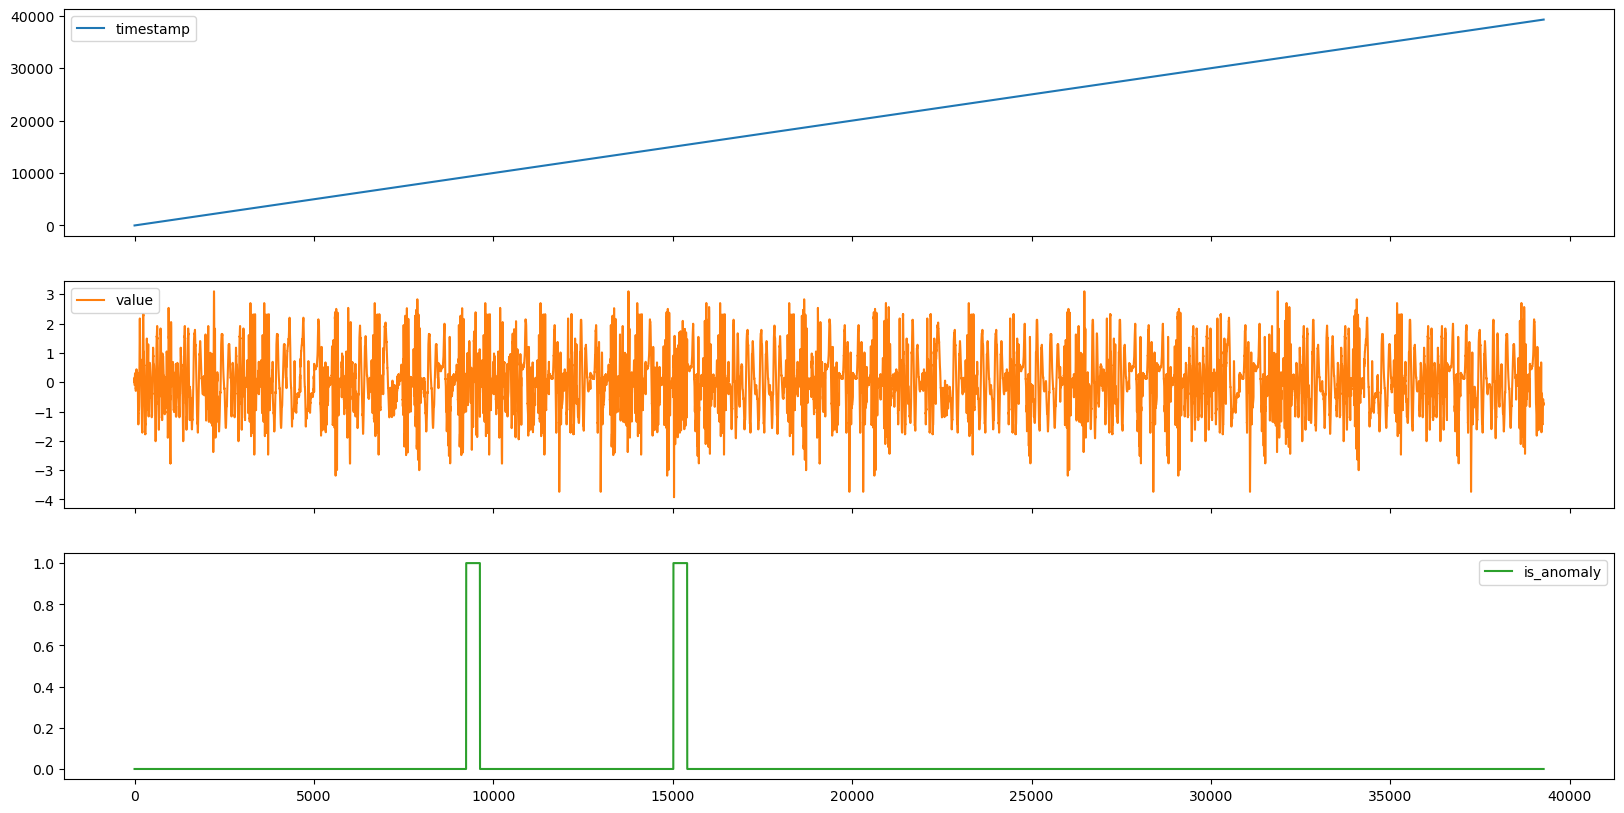

In [10]:
df.plot(subplots=True)
# plt.xlim(anomaly[0]-1500, anomaly[1]+1500)
plt.show()